<a href="https://colab.research.google.com/github/kev1092/Lab1-CV-course-HH/blob/main/Lab1_Color_and_Convolutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/kev1092/Lab1-CV-course-HH

fatal: destination path 'Lab1-CV-course-HH' already exists and is not an empty directory.


In [2]:
# Credits washington university

import matplotlib.pyplot as plt
import numpy as np
import cv2

# Libraries and images

We encode images as 3-dimensional tensors. In each image, we have spatial information, represented as row and column coordinates, and channel information that encodes the color information.

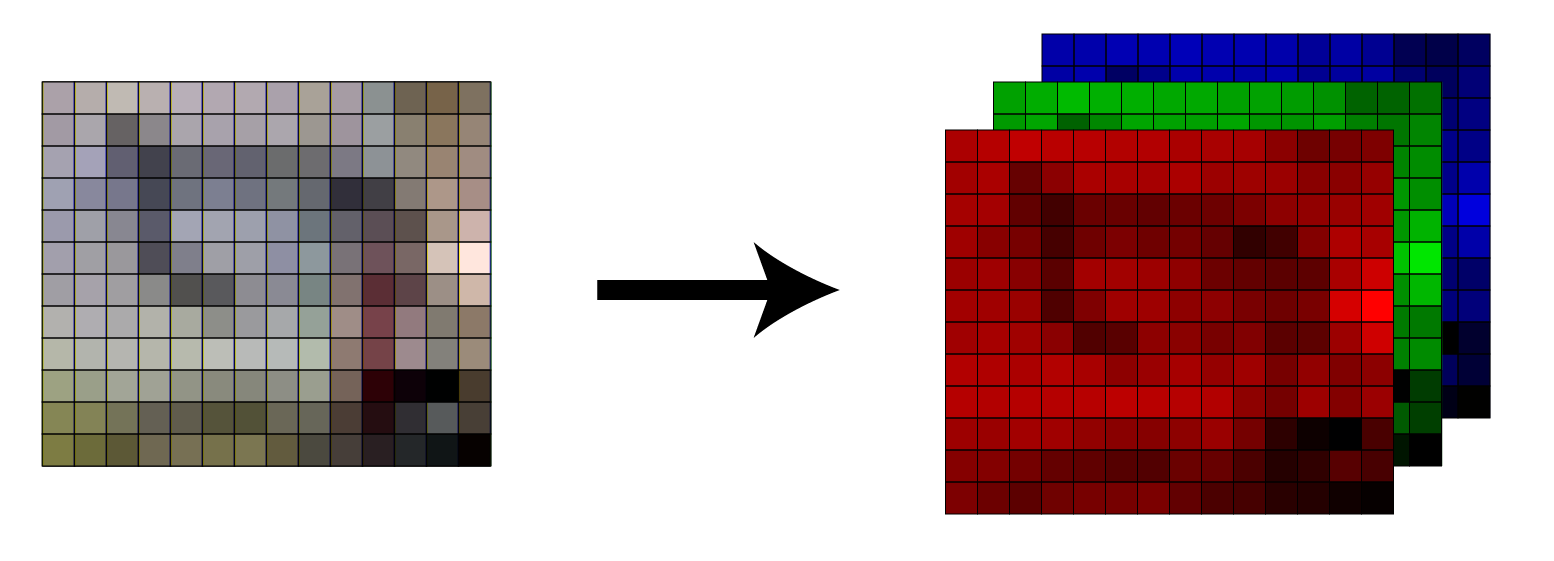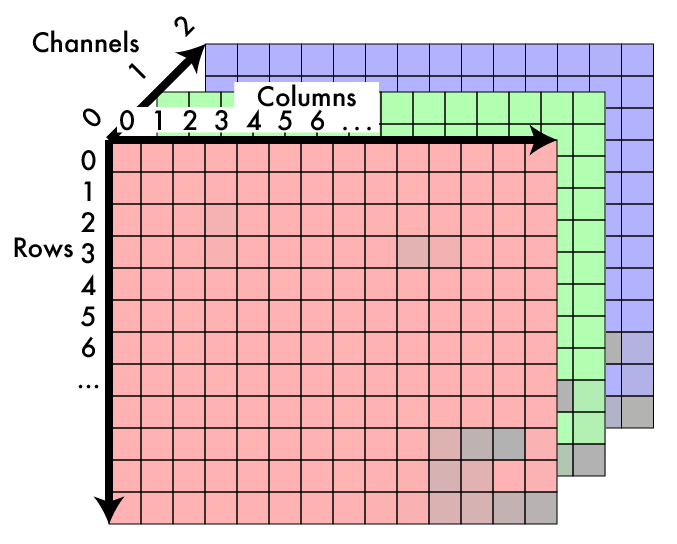

Since images are encoded as arrays/matrices/tensors, the coordinate system usually starts in the top-left corner.

There are several color systems, RGB, BGR, HSV, CMYK... depending on the field and purpose of the image, a specific one may be typically used. However, the most common system is RGB, with each image being an array of unsigned 8-bits integers. So each pixel is formed by three-channel information, representing the intensity of red, green, and blue, respectively, ranging from 0 to 255. However, each library has its own particularities. See the example below




Let's import our first image. First, open the file on your computer and check how it looks like

Let's import it with the OpenCV library. OpenCV is one of the most common and oldest libraries specializing in computer vision projects.


In [3]:
img = cv2.imread("Lab1-CV-course-HH/flowers.png")

perfect! let's check the image out! Let's use matplotlib for that

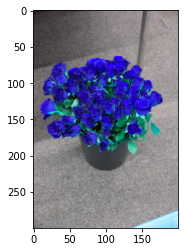

In [4]:
plt.imshow(img)

Hmm... something seems off... the image looks much bluer than it should. Let's try using a function from the OpenCV library

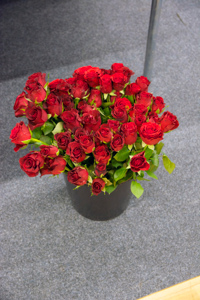

In [5]:
# We have to use this function because of the jupyter environment and the way that OpenCV imshow works. 
# The original function would be cv2.imshow
from google.colab.patches import cv2_imshow 
cv2_imshow(img)

Now it looks good! But why is that?

Well, even though, as we said earlier, the custom is to use RGB and uint8 type for images, OpenCV works on a Blue, Green, Red(BGR) system while matplotlib was expecting an RGB image. The reason for this seems to be backward-compatibility and historical reasons, from a time when BGR was popular among camera manufacturers and software providers.

Furthermore, let's check the following case.

In [6]:
img = plt.imread("Lab1-CV-course-HH/flowers.png")

Now let's check the actual image pixel values

In [7]:
print("maximum pixel value in the image: {}".format(np.max(img)))
print("minimum pixel value in the image: {}".format(np.min(img)))

maximum pixel value in the image: 1.0
minimum pixel value in the image: 0.0


It seems that the pixel values are float and in the range 0-1, but why is that? Well... matplotlib import "png" images like that! 
So, what is the moral of this story? Be careful! Even though the normal case is that images are in RGB (or grayscale) format and with pixel values in the range [0,255], each library and framework can have their particularities even for simple things such as reading/importing images! This can be a problem when using functions from different libraries

# Color

Humans do not see colors equally. The following image show the human eye's sensitivity to different colors
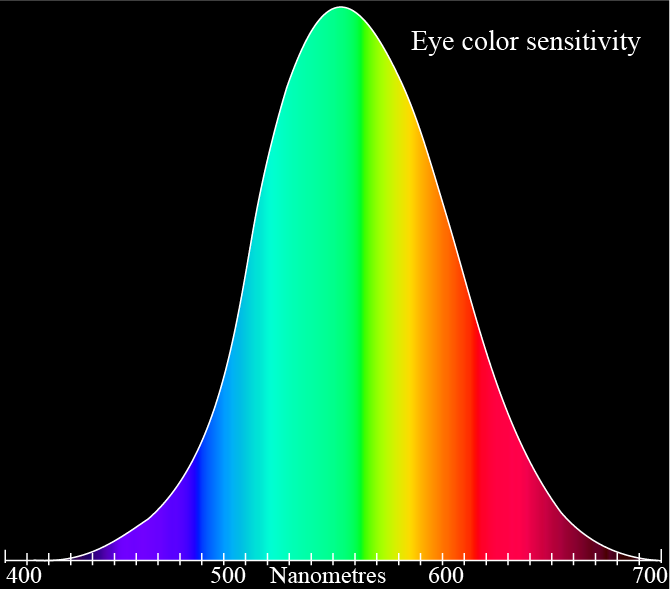

We can see that we are much more sensitive to shades of green than purple or dark red. Let's see how this affects some CV applications, for example, transforming color images to black and white.

Intuitively, if we would like to transform an RGB image into a gray one, we would try to do the average value of the RGB channels per pixel to create a gray one.

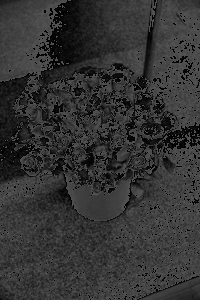

In [8]:
# TO DO: take the average pixel value of our image and display it, for example use the OpenCV library

img = cv2.imread("Lab1-CV-course-HH/flowers.png")

# take the average pixel value (you can use whatever library you want or just do normal python idexing) OBS! remember that the image format is (rows,columns,channels)
#img2 = ...
img2 = ((img[:,:,0]+img[:,:,1]+img[:,:,2])/3).astype("uint8")
cv2_imshow(img2)


Well... that seems complete off, not our typical black and white image... execute the following code to see how it should look like

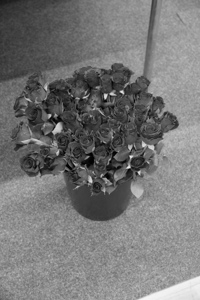

In [9]:
cv2_imshow(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY))

Now it looks much better, but why? 

As we saw earlier in the figure about color sensitivity, we do not perceive all colors in the same way. So instead of calculating the average pixel value, we will do a weighted sum. Video engineers use a calculation called luma to find an approximation of perceptual intensity when encoding video signals. We'll use that to convert our image to grayscale. It operates directly on the gamma compressed sRGB values that we already have! We simply perform a weighted sum:

Y' = 0.299 R' + 0.587 G' + .114 B'

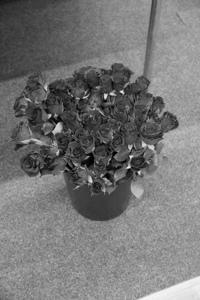

In [10]:
# TO DO: use the weighted sum from above to calculate your gray image


#img2 = ...



# Now let's try again!

cv2_imshow(img2)

Now it looks much better! 

Now let's talk about other color spaces, for example, HSV. HSV stands for Hue, Saturation, Value. Hue can be thought of as the base color of a pixel. Saturation is the intensity of the color compared to white (the least saturated color). The Value is the perception of the brightness of a pixel compared to black. You can try out this [demo](https://math.hws.edu/graphicsbook/demos/c2/rgb-hsv.html) to better understand the differences between these two colorspaces. For a geometric interpretation of this transformation:

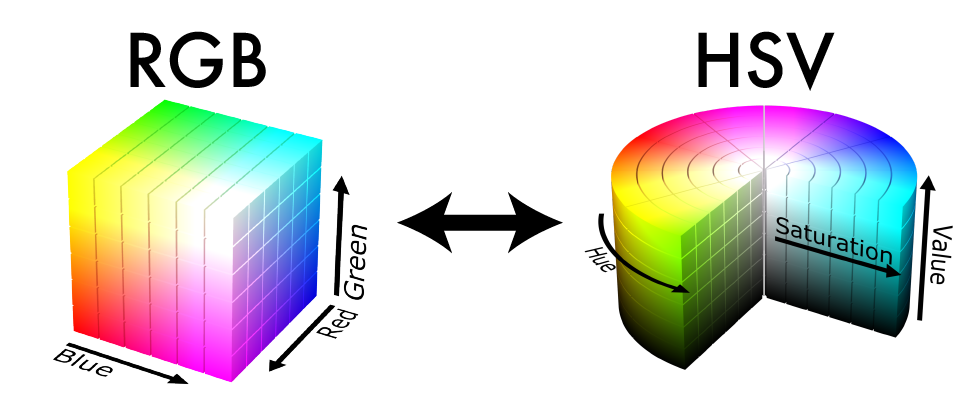

We can use these other representations to, for example, navigate through the colors/filter them/segment them more easily than in RGB. 

For example, let's see what the Hue value for red is



In [11]:
# let's get the reference for pure red

red_rgb = np.uint8([[[255,0,0 ]]]) #pure red in an RGB 
red_hsv = cv2.cvtColor(red_rgb,cv2.COLOR_RGB2HSV)

# let's see its value in HSV!

print("value for pure red color in HSV format: {}".format(red_hsv))

value for pure red color in HSV format: [[[  0 255 255]]]


We can see the actual color range in the Hue value in the following image. We can then select the range of color we want to segment out. Let's say we want to segment out the red content/roses in the image. We can do that as following




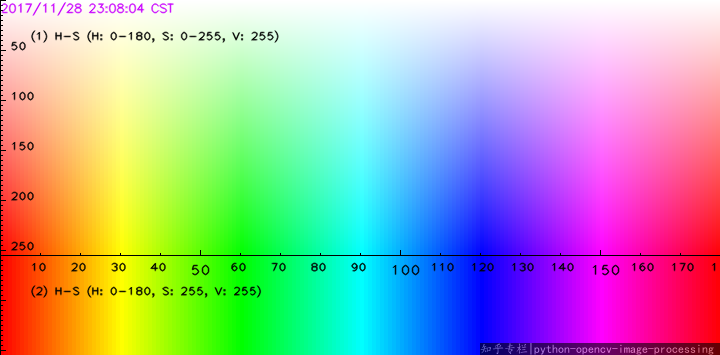

credtis:https://cvexplained.wordpress.com/2020/04/28/color-detection-hsv/

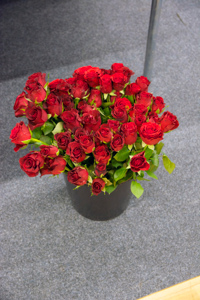

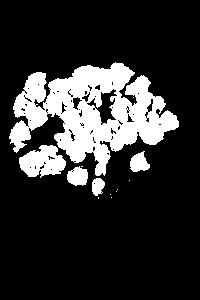

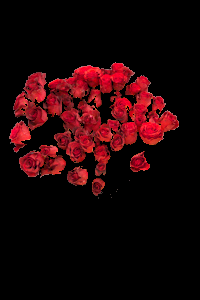

In [12]:

# We first transform our image to HSV

img3 = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

# We then get our boundary region based on the Hue image from before 
# We see that red should be in the range (0-10) and (170-180)

# lower boundary RED color range values; Hue (0 - 10)
lower1 = np.array([0, 50, 50]) 
upper1 = np.array([10, 255, 255])
 
# upper boundary RED color range values; Hue (160 - 180)
lower2 = np.array([169,50,50])
upper2 = np.array([179,255,255])

# notice in the code above the values for saturation and brightness
# we have to still set some lower and upper boundary for these based on how dark and intense the color of our images are
# these values will affect the noise from dark regions/colors and of course the accuracy of our filter
 
# we create a mask representing the pixel that falls in our especified range
lower_mask = cv2.inRange(img3, lower1, upper1)
upper_mask = cv2.inRange(img3, lower2, upper2)
 
# we combine the mask from both regions to create a unique mask
# notice that we have to do this because of the "cut" for the red color in HSV
full_mask = lower_mask + upper_mask;

# Here we filter the pixels in the image with our mask
img3 = cv2.bitwise_and(img3, img3, mask=full_mask)

# we show back our images
cv2_imshow(img)
cv2_imshow(full_mask)
img3 = cv2.cvtColor(img3,cv2.COLOR_HSV2BGR)
cv2_imshow(img3)


Done! We can see that even if not perfect, we have effectively segmented the red regions in the image! Furthermore, we can see here, how this can potentially be used for object detection in images.

# Image Filtering

One of the most common and powerful operations that we can do with an image is to use a filter on it. In this lab, we will be using a Gaussian filter to blur an image (low-pass filter), extract high-frequency components (high-pass filter), and how use them to enhance contrast!

So, how is the filtering process? Applying a filter to an image is doing a 2D convolution operation between an image and a filter. We know what an image is and how it is represented in our environment, basically an array/matrix where each pixel is a cell in the 3D array. But what is a filter, and how is it represented? A filter is nothing else than a (usually) smaller matrix encoding the linear transformation that we want to apply to the image.

So, we have two matrices of different sizes. How do we apply this filter? What is a 2D convolution? Well, what we do is place our filter at the very first pixel of the image (remember that since it is an array, we consider the first pixel the top left one), do a scalar product between the filter and the area of the same size of our filter, around said pixel. We will store that value in our output array at the same location that we are in. We repeat this operation for every pixel in the image, doing a sweep over every row in the image.

Notice that technically, this is not a convolution since, in a convolution, we need to flip our filter. In this case, we are doing 2D cross-correlation, but some people call it convolution, especially in the context of Deep Learning. In the end, this flip operation is just a trivial step. 

For a step-by-step, 2D convolution example, watch the gif below. In this case, the filter used is a sharpening filter different from the way we are going to do it later



![Picture 1.gif](-CV-course-HH0ob/TWdfvpEvaHlN9QBqW4dkI6ECNoA7YgdwxRdyIFod5ZEGV6pjnxLU1zQSB6EINikfPZUN40A9jJk/6tUnEDcXHL121P9IFE6Q+xlWkXKhEFkI1G+BAchnnTJads96gbelUs9BRWSaWAaaXcpAoxMFZhinM6l6WASaMlEYRoahDqaJKaag79mAJ0oJng5xC9RwMEkKa0mRDLZZIu0TFCRDZMUXwLIaqe+VTl8EpLmnVbB6atmhK+dqOxioEQlImRWp7+cAsvcAIAp2rhBwBPoKDZuoMQxG0zMTNts0VLgX4qOpom6lfEJAKOwnd+B3iJShJjOhGPR2C/OIDeKhCBUIu3eIAGuYA7ipQLIbDAWKwPNhBx4gXLoBQRiFpiR1n+wKykGkgGp1NFAAS9EJOgNxCj168gcXgWEf6CWKkMwYqkQpIFJrCNLUekTQmKprigDSGOSQCzMKEv0HCPs/ADhQOTwlV4AjEOlpAD9SpMu9AGMaAIpyZMnhADAsBkx+cPyaeyHAGrLWuh6jYZcyqzBnF2KfCPT4izKohFxiCFkNq2EQEJPNCwKaEviWAI5Bg50tKbLXFkWbiFwlAGydOswgQLyKANeRAEWNZK7DANAZB7A8F+hPF+XosR1woSiZiSK1mrCdGaIsmYBesPs9qo2QmsIPEt9dAKxmAIkMBkoAOvw9iFOcqABBELyGK4raQKi4YMBwYP7CAO0yAO2iAAvkAFKKBCFGiBM8oR/9oRiwkNTwAArja6B/4RcrAnumY7EGSGHExZtmdpN/5EF/UQC4CQCi34OvIiFJ8ogztrnNy0CVBwbMArvNPADoBUDgLQDd0wCjLwsyzmqhHBspqLuv5AACjgONubEEdnAtbHTmzbrb04sBIcvhKbEObQCKEnJP3yL0FBjG/LA8c4qtyEDJEABVAwDfcrTPrLv/x7CBdAtjsowA0BtgVskJYRUqfrEMOwf34Ajlc5jgS7wCwBNItAoQSxPA/jmzRMunQYQLp7SY87DXkABVXbSi3swt1ADW5gAW2EEHhpEDa6Ep5bU6zKow8xggS5mgohmzFrwS0xM73ArgnxMUwQDD5hld3LrbobvMOLv/7wIAZ5wE1ZrMXdcLwucGthyhDPexKeKxBLpTsOSzPlxA0JMFXEKrcLwbks+cgXzKeAQI4IgT7qoxNhPJM16Zl+vMJXjAwfwGOFbMj9CwKbdLkHEVNHBROeXCvHo6FvfBC/dQDfsK3fW8EKAZXZsctF/GCkQH8cYjMfKhPQ2Qdx2ws04AMRsMKXFASLBg8foAosvL+y7MLUAMOTWa0KYcMqocx6paOabBA0FypuBrFw+RByCSNs/MkFUQ19MJsLMUBEgxOzVmvuhA/z0A3Y4AgGELLdZMVp9ADgjMXiPM4unAxggGE8OMY1wc6URT4o9cuJpSb1FbM+C7ST7BCRef7O9VyseFMQi6DIEFFBeirNXUht1gYNB40N4DAPrToHI6AIraQNihAJYvDK4UzRsiwLR0ADvdBnjRwTN5bP8CM/mTZqe3bSkKABMvzOU2abuAnHgxY4BaEMhqCrE/GpNBFv8+YP8wAOTtAN89AP7AiVchbUsMBjaTTRSK3FmQACW+BzuMyoNWGdg5quwvo/yEJlVHnSwqGSX2zMcHme6Wm6isM4Cgx20jE2fpsREycA6IAN3YAOR4BxPhcLidbNDRXLe03OdSAA6kwTB5qgYA3G63oPBcAMsbbSBSG9iQzZ6ZqhPNsSH7U5Kq0RWvQ2xOdzBi0LAYAO+CAQO6eyi/4gAnlwxYQsztSw2uQcDRHwaz1BZUpqt0PMENYwBSyQAN4QR7PXCi5QyyBt2OHN2CpBU6vjzBvxLl5AJy+hXf2Q0zs9rV5rDnBwZaktzk7wB9mtxbLwBypQB90QDSocDQOwelhUp+/L1fvibrQAAERg0jusECA1mexs4WjsEkqFO5L8EL3QCI2QCrVgcoTT0isxDwEA2nGNfPsaeF851kmwA+Z21IfsBCqQCVrsC77wBWQwDdGQ3dQQABROEJwq3wJBlQewOVc02wcxf+D74QYR5Ucq3JYH3A7BCniAxGgpOZvtEPjw2dQwAM9NECcreqS3yMUzA2KA2rE8CjVgBP6+8ODNMA1kAAZa3ORPXhCli+HZInzrQmXS9djBvWW486tSbRDD+uWDtnuy4c4MAQiN0AsjjBCxKzojseYI7dz1QALYNooD0bU7fnKGIAIql796/cIuEOHdAAaCTs5OLhRNh17cOt54SJ5wBgMw7dsKkQoA8IPWq62SK6cBVomV9dF8igcwuw7wpxDBwJ7r6xH9jdA7TRCQYAHON7ntZ7mtjhBlOgIHFssQPg3NkOC3nuv8S+i8jn/0/JoumTbDxt7uXeJTBkGSptsy6Yut4ewdYV5efhB98CDQYObA3MG+kxFtbeNyXWEX5szLe4G2DD9AUG772+5LLsu4Pui7Hv4ULttsJl0A1sAs3xNuId6CFWqY0c7lDOGzBs8R79MKO1rpB2EJCmUI/nwQSqx3a27jb64QG5jiYNzElC4CCqDk0YDUI6/rhb4QY+sN4UAB1qDeJqflxj6SwMADsEjZCwEJkg5qc4cCoWhf63qPxgB8FRMR2XMdEkHq2ODcEeGOeTbDEkFtE4DgUi/vW1zyiMch1qAGFIAIBWDAj5f0403z0UhVZP/oiiNl8hAHlmABUzgQBGYBEYsjzXzWK+MQ3a7TPE0RmR7wftiwwCCIPXcNX+ABRD7OUz/vhP8Ts5fv0ku9k24Qep88yox7dPz4Al/5c+E5C0cAzFUQ1kmXYP6nO4tw4WcDzQox8XBd8Rcx881rG3Z6iqn4nNulCzLA5wp+CE4g+PRu8ia32AecwKlO+QBKPWfG0Rr59VKOEq8FDTwgJjaGY7qlYABRr5cmQNX8HUSYEGE9TeYU+iO358esh/jQYes2D99Djh09AuMBxJhCeQQQGiPCQ5jCNWgSlkxoaQKYZN1sUvvjhJrNbtQCeAQaVOhQoQccIrwXLxw3cvE6HhiXyMKcdUSNEv0WhkOnq0QRduWoC4YSZwrBej3rVe3QFtaAwojz8Oq6OBYWrUW4jlSiWPUeLvMi554/i92woduIV60mDmjGIYSZkBSJMH4PtnxpMuG6NRgO8f7slsxRzZ4/FZ9GLffoPXLcwsUb7PGquTUaIA1NGxQkAF14cytsZCFO1YO/gxpPjbetR6nEE4J19gRGLbzjoNWLlagXRxzZDINLnJyoPDwWDPmNnLCeIOeYIWtW6IyKilGgefoUn9+3t3PhwrWL7bij/FGGiBy2Awo5jwjQoIzH0BrQI7osaKS4CK26UL+1luPomwM64SitVlyoAhq1vjHIH3NWSmgecG7IZp5+NFSrmitQaCU9j9w7SEeFWgHBCV/sw49GIzm6p50EpDknQNwuTIWELa6RLcOivsFDgvMwJMoZJaZT8CkrjwyKw4e6SELMh/KRiiqiqmkEQYQswv5onh/OIVMtXWhIAr4dXXoPqHwQmcCNnW4yLU8ak1qKnALGTDDD9SToQ54QIa3SHxtRYOVJtVpBAYCR1gpT0YTMTEgXAsq6tKNx0NDAkqHWEcaSRdYp7LDEcMDTVKIaWWA4oHj0x0eOxvnCM0R9zY811wD0p1TVOspqq2lJHVCsJFjNVK16CGgAD0shZFYoVBGCAY9uO0LpwKHwKeUPbMBTiNdyZ62rwo6INZbdI2oYpch717qnv/+chMo3TIXhQaXnMFUzoeDgcO5atQ5wpgwNNCF34I5aYCEWhTrhwLJWg5qsCyo7chGjUkrhrlePgYoOht4SMqYWNADt0c+D6v7Bow8WEyolyAFmHirJpZrkiACbsRWKsTK+sVDhhybU12JyjQGCB2A8RVqhFiRx4QkTEaJ6XaAmBcRkwsCpc6N1+ngwIXvDBmrEK1I8CJoqtsjsITQA8ScWkRPqZ546EsU7IUaZckq2TqRcGeyg5OlDy3qkNWtML6fTmsuDSA4jbbXxbovNqSo+HahqO8kVMUv4NuTremVunCPVxU2oFk0s89EcAkaF5Gx84O4GHQFyR6q1g4sypx5DKB1XQK+u2YIEAiA+uSNQq+A7Wu61rgcQCQRxu3Pm/eGQtlihXwsYAWrwJTxzICFOENvtxn19hV7lAMcQkg/i+KgXACjgF/4ukryN9GtgBfMPtET3jTIEEH56AgARlAG1tSVCAnggDuce9pBrdIEEpIhY7lBVIHe1zhA8yEEZAHG2hAjgEBj4Qt0EIgxS0O0hd/Mfu1Kyv0AlJBYAIMw8umGEZISnWD67l9KY4iTRHYRhDmtdUaQCh/FVTSivep8IvzKmXuSACKMaIfPO5Y8oTSmFlwFAXDwigGRQww0TQITJ6gEN1h0EiEHsyGRKFzicDeA78yjDbQgZxXi0pimoyQ3JpvZGDE3oLpYTSru2ZzWPWEIDjkmjCt3ykElVKnQHyEEiEjFH0vjCCSDoVFD+CEiOrMcC6OvZnOCGgGwkJg5lIAkU8/7krOel5jeYO1/6xMfJmh0uUmshBQC2YLoqdmQdc7BAIvLhRVF65HXqQxsAUHgNOGzzIXQEzShUcARuxYyWQskKCVLxRDox8Ar7m4MSgukrCBZTPMjBnjzBebEIjahEzyRVltrWsaD4zQWtWKYaR+mRKw4tLQRAUCzkqBB02ueGa+ijH/v3zo6A5Ai0CICuENKLVR4EDmlapJGkSA4q/hNiZUzCBrnJ0IOozk3dg9A3usABFGIyKLGAwRPEmKc1ckRqVEsLESB6EA608yAdtU8y7pg1/pE0KInrxiE8MIC6IaQPCLlCGPa5qEZCLk/SgoQG1uCQpUb0f7CSVejABv4MM6Ixi0BZxCYlOp7MGSItBEFIFTaKEKzapxu+MIIMqNNVr3KkZRnpB3myac6DmGOV9bBALIvYLOdJ8K1dvKZd6oqcdslpp9X0JCj/itBuXm8LAACRQspgmS4Q4ZykcSxPMqECKvBtll6tJ2IUYqOHJuQbhtjCHB7iQLX007SmEiM0ngCAeXLQIymr3GovtI4saZOSRg3bGoWBhy3IkIYIcdq2ElINQxyEBlX4bXCJ9IcJgNAfxwUkPpSoUo/s6QlW5Qh1hTLTmmK3iwkhAAoOytOOsM0v4uVINaqAI6BWE3UTPQgkACDfp4wDEhbgIkLMYYgqHOBmNQTuTYTk2P5kgGEClgAw88A6r3l4Ja4/7YiCO5IUR8IGaauNyuo87E2tcOXBY/RILcZiVQwPNiEWCJczp2VJ9XSksaEBgwcM5VhZGMEEtKDlZWWEF7rYxiNCVggxrzszDIMxr9bzym5eTOGHBEdYr0Uv0lA1DgDcJjsprNlkWWkfX2TCjh74Q3Bv0IEuUDNsyXWiYqLTwrUGRWn+bFyV/dFaPKuFQQ4iqFDWAQcKAfqCtf0ZABDUiDuH8iAGfS9HY9wNWdTnsZ9x7AmYYb6Fzix2mU7OiNwY04cwGJCiPkiUVDZb2WBJc0vuiDOSYDNof1ghLrhZPjiQodz4NKRfHkUN/nCo4P6ewC1CJeq9dgyOHpNJdabMZbPb2pQG567b/rBwhz21KdHSdiisCJVfsT2zcwnikv5IgiD0ehA75xc0yTiEEWqwa564GyF8PaOp1DwjXwFQgD6Sc7/X9++DfHOgDNUWgl8+lG+Fq3qBZjiI/bGOLiAkDE+Y+EkM5Nov8+QPKuB4Nzwek0+WNT/11MjMUKKSyHx6ziRl+cdD4tduTyykrj5OxjbGZ6RB4ASPUIjvDpIEmNo6kCSYtj+KzhMwgKHdOt95eTmLmmPnTpAEaEejVP7OMOSAiDhPiCYa9KB/Y+288OOa1xA/sAMUogQ6+EVChGEIQRQ66Aqx8JfZnYwADP7JPkt/iIY5rJh515t5SbHDEPhdWY+QztIGf3OWzpP1zykayt61falDbY57nMEEUfBGqg4P9g5p5ctG8HU3PABs0KCeI1Imi1pG7r+U014o5Uvm5Jd7I8Gm2iPfCx+0wY/Lx9P5KNZAQgru8OqHpOL28vOBLEDji43bRFmnx7s+E46vm5MFirr1sbrB876HEKoTor+h0IUMkjncIyUP8i+74rMSEiiBO7IIOYUTOIFQoMCDMAQA0LKvaAQNoIn7+INDAIPSCzadqweF2zlW46oCNAzlQsDAm6IFPI0yCjlqewqp+DPxozi8wsCFA0IarKsjyY1ASAEhYIbH64NasP6AE7QQ8riAdeOJZBgF0wPA/1kA2UoIbaOBmxGw70C2sCEyyFFAHxSK2HK63yMoxzNCocuB8iM7hJBDtwub34iHLDCBLIgct6uHOBgJDcDCiLIREMgE/ao+nauGveCARJhDVjgAKkiGOiG51yutN4RDoiCvzfq8bum9BxSKaJom77ImbDKvJPxDSBkGHUiBQHi5ddiCs1FEoBILKgDDu1OInPGHV9GnhDgeBKiD/ro5vPk0pglFI/Gb1aNDngKVvRnB41AoZRLCvqmC5mpCIwmTUDiBFziFaTSHLTioXdSr4HCDpFM6neuFRrAM4ogdATCHcdAYAUIaZ3tGRZGyA/6bRg+Tng9axoB8EngrKlT0CKRSqic7remKMzpIASRwi9wABiLAgwZYxN+giwugvkhUiF7QAAkAkTScl8ToisgbGmZpw9nrR2ZZhAGERYXEx7ErxYgBORq8yYcILIckk7QwB5tMCHKIAhM4g0fpCE0gAML5PC+RgeizCev7OBCQF8yyteAzle57yYExB1aDhKwbta45PGjrw23cSWZJi2tgMZF4iFuwgRIoBI/QACVoO4P8ERTwxY7TuePBhmQAAZgJnfXTxuRoRlDcSjLRtgOYKvOrPQ4YJOY7HfKSgFc8y5mLRYVQBpFBqp57CAYoARu4BY5QxNsrlXrwoDrYif6lKwwG8gdW0ABl+o2A6i7x4MfDzB1WIAFr3EP1MB9cYjnVW0w/VEj3UwhgCLeV/ApvMD7kUwh1nLl8aIU9O8ILcAR3GzDwYD9/WIDZtMuDWMLUaKvXMEzbZJaBxLfhJCETIgWwxD4q88lvpJG0iAUCmLBWgb8UoIMASQWdTItEaIQ4IILKEboSeMQ18wdBAKaDIIH6skyFKEuv0ErypCUKsiD05IgykjVO8gg/cw6wpLwL2SNBkADppMNbeIEToAThSwhWcAFtbAFKo6ZFuAtnEKedTC3K9IjClFDvE4auQc7KhDALIEMjXLVWm0kVvUyOAAYLkLm0CITLG4bZIv6CGzyIFhg2CSg2TTGEJECDvYPMhHCo4HQcHqSpHQ1FrOTA47gGV/RSs/QHbeO29/RJJ4SUROABgYsHLRjE5Ps8ImBQsXm3oUrIa+yIWHABEjuI8DQyM31GZMpO4bSeML1DhEA4UdHQ4VOIF/sW1wI7ZhAC+Zu4TkiCOShI9pmonETSemiFRvDP2yMACZgDb/hERrVN2QRSOmTICexOj6g53tlNynO6LWgpf1jQUhRHchTOfNAEF7g9U3XQpjsdYVgADVgEY/iGgiwAZmADCkCE8aRV2gNCnfrSDotJILvV4hA7fbTQe3GaPZOHLtiOdTiAWhvXO5jIKTxSf4AEIP7giDWSTBwNSBcAADS4PaWhAGu4B2VIAk77VvL0pLkaV72iDQtQpHNdpshbvjT1mA+RkvBJBUOAARQgt/EJRKOMh7O4BkXLhwbwvSoNQE3ZMDHFwHUAgLbhC4RQVKSMNsppWAm90XzIOoVl2IgdKDRtv42Nnuk5T9yrhStQApn9BR0oAQaIEHlAATQCAnUBVKBoT1uj2cnCA2CYVQw0z1Lt2VDULhfQw4Xb2WUjWlsTTDd1sJarIHWlpK8ZhyT404R4hBJ4gdBECGcgAqrJBwtgylN5WYmRySS0gF5IEmZggTL1Qwq127Ptx1jQALNhxVpS2nH5Nw3kTkhFWs1rmP4fhdR1sADTLYAzmMiJWgdAEIQqIIHba6qrsUEMvAc2kIQpAgJ6PdKKstzDzIdyJcCzpNx8/avvbFDiHBnHbNZ83YKzUg2iTIEzCJB6CB/ETTunlVkzFKy2GgY2iI0uAJzlPYinCt6tdJ+KRVKKapi1nbwHRd57OabMeVSw6wUO4FQvcssSQLsy0Tm81VuOYAUAmAJmeJbBaATbqQJ+Nd8eKazBTF/aY6H9PVdNAIBK29yrYdO3VRSAyp7Q/Q1NgIG9tbW+xTygqF3URc4kSQA7qABfHZ1O6IUDkK6ZEwQatNUJ7sc2ElCLteFrY1sw7UaIgk8NCZNw7c56mNIOK/6+4+PTh6hdf4jeg5ipR6lJdYUG2IXNC0EBAhhS78yBnOLhZywlsxWvHV5XI0qqI9aP3CjIh6UrSKmGhGnQ+6SDfn3Z/O0FRR2MlPRR+luHRoiOBUgEZYIEHjBb2ruG4pVQCs2tB46YPSHj9gUs+O1AhQjKyr3Rs4CGJOAsGHi4XTVRFN3ahyBhREjgq3TeaxwRadxVklJVZ+iFlvUIQwCEXM7l0PUq4BVdtTmxFJPbWKbfC1HLBqZB7arRhJiDjcqBG/5lf4BCIYhSl40zHuwBKk3CuNXYfJBdi20cUiCOWNBJhViHTlCGdFYGQyhnkkJfD34tLjvaYX7IhMjMwv6BAc5UiAjTXIRIBPQRBu7ayZIlRGf1h8cp0zqew9gMYY1dhwagUjceGBNDm1HuCD5SMRNeQGTaEpZLNI2l55+8EOPsKdOFijZxjmpAUN9NwnXQBCz0VPlri/BkhikIZYvOV+XdVTTIAZCmpVhISKBxZIVIBQteQNkES1yTZJ8uF/mkz1wbofU1qjJgrxyAanFsgVMopmZGiGe+yQc1DmMgAJOe07DRhILDg/D5hk4YE3nYksPckwPIWEvuKam4wPllarQEUWgQURLlpgpW0ZtJBQvI3oNIgAahpn+uh4Dm5VL52SPlgTWYZ1qyhODsg/fSBTwwXX/QBZl9yROD2P5fPcL3wWtwBscxWdImhRKePVo8uFO5+Ab7NRmVLgOW5pww/Q1LaICvk+h76QTuxANqygeoRghDGGoflOdJbS0PLWbmeG3LPGONNYcMVR81JlSOMFQA+NGHrlxiBqSBULHDzaRINtNmmtSDmIxVuVS8SQtNxaigc7lfviWLwSlxbb9vGNqDeFVzbYVinGxAkodhNQbP7ohFeF7yVOrrriVwydLz/uBgHdZifWBfZj5jAIBhDci4Cm0OdAY0IICNrIY1oFjRpiVj2I566AQJXi6WNlNzC2mMGSrypuuBadeXgNedm9edfGfjSAUJ6IIu5mC7OC9gmIN8cM4RElqjXv5qWoKGWNCF4/ZO4qbVistr9eErtlxjtJycLfBYkBXZs+TozQFRS0ADA2+/tMXCtGAFpjxyOvThGS9jWiW1JR8oxQtj047PpKUeo2rapyWh7NFDc+AA6aW2BN+pauAAFmnznSrbkI7zwwSvaAYqyXzrKp9bfzheFRVgjebsDLLvMupnn3bxJPQSB1l0WMx0PMebephDUVRxMw240rZM4PxvvSZdLGo/Fg6RLYqQH1uH/ZWWivuNVuABAvBs46Bw76alerCEgiOKetCFdm7Yb8q6rqXzS08IoxXdKlaN5N65OJAA/w7ITnABHuBlTRqTleWUUnxneM6ddWCFs14LZ/4ghUW2XJAAAkyecQ6VdFufLtkOOj4+GfMOXBlPwjioB2cAgsVCiFQAgCv4YYTYGK2N5jB398ahElZw9qDoBRYvY01YAFRjTGu63Ys/bY+w7pkkYU7HQENP03qAAQz/isxp8IM4dWmx1d72GI33CmXAg1johQOfYPIQ4juE097QeWO6KTMSV+NgYm1Oi1H/vFo4gD4yivg+CCLYyAfDqaS/F55nQLZWCENI8XWwBCXnYYIbYoVAuCvw+tOQFjnOV4WeOCp/4AXw3a7Ad78KqaWCBH2nPbDPVM12Ljx4kHHoA6Hn4ZjL8oUwBMD/UFF0RU8GZXTBadYaugc+AEKfRv7FE/nzeqEYmiFVVxRIwIPTP32TEfyEGG7MpPgD9etHPwivU3BL/+AnU+ZB9QeuPgivluRIZ741IIDlSwuir/SZW4M4qv2wqQd5cH7nX9GN74hr4PxEsGXZz4t8efGyzvOHWK/2Gv19RoFQ9wfFZuydDLjfSIUnKAP7tku1P6VUkvl+p6XVFxRBSJvyKWzsL8MvuX7mBgh/AgcSLGjwIEJ/B8wVhAQgibOEB8YlsjBn3cBqgspYOriw4DpNsQx+C8Oh00eCjdawSqiQIUJdMJREJJhS4DcApPxdg5PPI0yXQocSLTowVSqjxjoJrLXTKNSoUqcabYWiSrWCN41upf7qdWBXCw3wjET40dwaDZCIdi2DZ0sOaAaB8QCgi+C6JDyEuexqsJGFOBgFdiXQS2CsOEC/Mpb6TVitWsYGD63Wq5exxpo3c/ZXL5EEPJT9DiXdmW1Qf+MArI2VyGxQZURyHO6b2t9df6ksZDVIQEOZcQRTkSjzzd9PrbcProtjoRHh20RaDeRQ0+by09q3c+++fRwaDR1fSjXt3eDWegBqNxqvvCDxLdckZheIh4fHb3gkGKo3sJ4gGgCi2HsE5dNKbgQ5owQMtXSlCSADVUEgdudZeCGGGSZkzGzAmEefhrAV5EJu+XCwnF8AStCHPIshZM566DFUzRUotDRQSf5XyFhQIo3EQcR8BVkFQGYFleGfP10QsWOIjF1DWVRQNjnlVKRwQMB1XNWnYVeCLDJQEoIwSZJJTBWIkAVinikTRAQhWeFBrLjw5n8EjNViRoYIREMVY1IJVT2tONNLLUVBAwiigCT4J6NG1QOIBIDQWdqWGU4EUhcDhfGEnwYJw8NecB5kDACvnSkQYHBIKapBRECHnjNlaKAJQeYYUsUBi0bXKFSkDBZLkUIZM448xfJ6rFHfdMHBU6jxSgAMutZCqz9JJNHpQZpwYNyuB6UiQReTkgeSc69iOxAReu5oDBA8AOOmiMgKNc5aOH05FF/y6lsUMDkQEaxtvB7QCf4J8hEkjCGCsHauQfL0wV89XdVjCRqLHOeiQQs2eG4nScyB55mdcBDGxSDui1AszdYj2lDAmKNMkCfLbJAlGqAhXMCNLlSPISuCjNu7DB90zRYkEJCaORz0IdSHVmHF6kD5aOJCyaw+KoEg4oJVqb6a3Ghfbzh1cpsugCzSRyI4z7y2P+vsl4jW3TKa0jdlcEBtzt5WLZAuABChDEG95PCEXPEm9Flog5kHCRAYD3RNFyQ0eyrbllA3UB+F841Hvjj6tw4kprLNdjVVoHC50Jam9mmoJhtkCABlaVURHKlBosFFtUGNEHjijSvQNYUKlE8Dwu8ukOD/pq5vJ0kNhP5H1flofpB+e48ucy0zZSn3n36JzK3jmNdigezYNWfBvQI1J4ESnXbiAg/OE8RhDkcTJA8KwQKBR+o133y8zHqBN3NECCrywIParsc2wAgGgFzKjsOwJi6JxSEzGijf1gTijCfAoHzOMBPU4lAPZwCBQgQhBQC2UDVnEOE4+bBAAR2ovjlYIBHJ+ZC+5CE6Y6DOUOpS4PXWAYfnZFBnWyIaCeTHvXVsoXAXdFwrXFCF6TGsHjAQnU32I6mBrAMQgqgCCawnMYAJBBpVcAF1cKgvYxymHp2Im5saIZd6QGJ7QGSbM5IQrd91j2uCSwLguGeOLUzRH0/sVD4qchHDGf7EQataiLKY5aawUW4cC/hfQWIBgyeoUV/QiIUuVoUQYXTiMly748lYgYIrdPI8XWnFzwRyuzUwxC/AIAIeGoBB7g2kd+6R4QJ+2a1+KY9pt6kGKRLBgbQZZBH2QyU0o0kVnvEgllPqCgpmZZB10HARptEEAWLoQPrpjpdaWdqp/JfAThmjUOBp3/KkKc957msr8oiDJSzQOoJA4wkAUGJBNKCEa1HOIKQgQRdiZp41ECBoUHObBGzISH/0ohFIEmUr5VWPddKzozJLD0bcRgDwEYQAV6GiQC4oxlOqaIukScUTyhDIgvqjdKcLXy80IAEQxlNfE/vaUAyRKEQB1P6jRj2NeaDBAxKghyIWkdIhKXcgXfmjJCfpykqAKrTs0YSmwEABFmW4r3WwwmtFWUcnlKFWZRiCjEd9q2Y+BAMT7sqXw3ErH/3Rox/FbCB0sQte9NK58P0lMKOpzzg40MMiKnA+rNBqQqBBGVvBtbKcMU9FHhkUchoTIXLS2m+CM5ziuDCeQiRiXgnCCg1M8JT7euxUUlFOy9J2Kqb5xsDCR5yEuq5V5rKJfiD2nwANCJEIypgeddGlNy2gqBlFFmxJMjaEyKM/tb2ubevTBYJiq6VaM0+6FkMjGxEkR53aK5AMokoiFWQjAyHBDxkLxOgWRBeci8lisavfzhpEF/5YmiiOysQxj1nzd2zKUms9OyeD1MNOePjZIr7kDJ30tEmQwAOGMfwm+hoIpQMxhCj3K2KawoB/ACYIXYAAMNJIjWrhS1WIU4uu34IlVtrMUxLQkByxUqkexfqxaiErLJ6OuMgFCUMOHCoQkcFRjZoADs4W1zhsnY/G8i1IeNfVLiX3VoEcJorFjCxmg4iMZOXNm0sOCLGtBC9qxWOYxox35SUTGGNlth5N2YYUqFRDmGMe89Wy5qyijPeZAsGf/kwsQ6dRksVTw3N6ICXoE8/sMZGZTFF64eE/i1lZkqNUVPpGhCyx0IUwXB7iWCZjWU65oJBLIqU5LevrJg+vc/42BA9yUAZAoPQAFWmg+rwIxpUSxa5sNh7x5GxO5PnLrc+dNbQ7qs6JrgEAdFVOlSc50VpcQQn5pZ+h/YHogeyvfzZL4LOR5WOprAOO0dav22q44ysfIAeJCCuc4gxqFKsmCfEdCApVqKAWIufUeeYiDSW6apmxIlF94KhL6qELW797xGa8KatyspOezFu+VrkCJRm2DgsMFixafFMXvxjGTtXDrWZE48JP1osfFzghziBFzStu5Ow94TqFqU1iwsez0NTcPFtAp3IiObl6hPzKlsQkQTTJSdcii8uZ9rPOZb0Iw+Z1OtWxI2nGISu8AbAXHJjtMJu974wkc5kcdf4m1Y/Vi2soI+7KIEsv8Jz1MZtjiJB4UAwnJDR2uYummoDBv+U77S63UzVogOfBT9YIQyQCD53o+DemSxBDvHEdlkD73v+cxwPk90gCUdLy7jxngdTDVeGDqMI7VdGLEnZtQboGILRq38HqB2fj6IPeQy9mVpAA5ASphrr4FM9A+8c81bgUTW2a37zmdKddBmIs/i29gtydIIKgqvD/PHQWDcRWuKJqV9bxtIK8mhRbgUYSdgyD9K2+KdrzKlhjzTZh4Nsg10C6Xilb+Mla3dwNvIRPSZDAgxmE4MQIQcwBheTAHCwPAx0W7yhW7V0PKxSVQeSDIFzMozTdAMqaMP60S8l1ijPAEh7A10EQgAVAnV5ljTD8k2kN0auYx2olmAI5gyVgxDcsQozNj5k4xQjunepNlDDURp95xDUk3I5pBEdkIHJFy3INRHNVGK/Ug1MAgzC4W0FYBmYUYehF0KRRTi3YW5MxxMtNHxb6w3qRkXsJBAtGnhjWYUchkXPdxjdAghLQgN7dhNTZUZ59A20wmINBmIRRGB3aISPKU/LM1Kolggtg1G1s3SKdmDOgAQHskkLYGNkhX451XMzJzDVYXVFQXCPKWs3Q0rIJxBqEAWGhhQXUC7YAwxzkQ1RVCOGZYhvySjVoQA4YRR8QADESACym4t5xk7ylH478V/6eKUMSFCLlNFxKceJNHOH1rY0ywAABBGNRxAEa3FsigB4yRls/uUC4+QMRGA8H0F8rCkR89NVWVAMH5EsuyhfzZePMfKAFeCNRoAEnluPexYIGEA4/AcHFNIA7juL44UlXLEhw3KM5vRoHjuLJ9KNRdAHldUIQCiS05YMlUsY6GEIjhIEzQk3LkYTd0ApptAIPEMD0mUat9SKvYORcbEHIVQEAHAAANAAbeuS7oYVa4EUsiGBXPB1HsU46uhl5Rd7iveOfmEMsTCVVEoRNFgQeAIAwaUJm1AIBHEDwAWW0yYY0ollNtR0zFYQmAEAX6N2sKFr9IZy8QSWVxAIA3P4lXr7JVd7PTyYJABCZWO5dPJpl472TR8yBcAWUNbrWGlpkk4zDY0UmUO2lUWSlkAWmzqkI+eGURakPUOAhli2mUUhdujUKZUbcQFwBAUAcZmZdAQIm9ekUbHaLLtAAIOGFFCIE3N0RMLifBqRCWPINAJSBPPjXQram8LFOyZHGV/UfH0GCBdSOWfoDrukar9Hkn1hCht2XUHzGFlxBBSEnI2oLSZlGYsXkbZzPcfJStV0bj4knfCpQBFkXDrLWuWzQxnRKvd2bPsanf94RHlahQFzhwUVRIWUchXFcbpJiRyZEu/1nHdbmAXBZHPrDHMpQIlmAquWVYSCGe5Zmj/4JCqFEhcShIoTuHXSy4kBEmD9M2OTQpeP5TtehjnVgJ5X4CmKYqILg3Ik2onoenyGEYoWRE+BJyLWB6GPS4g9eXY+WI34G5CKekNHYkeklyZJE6bGkzH9saELcXSzkXZMio4Fu2pwFSiP0yN40WANsUZ7sSZ9gKa+Y1fNQUubdBufVg+eRY5gOYIZeYvgIwwJowCIYwzdY0wE4w7LwlPnlio02ieUQROYQxO6VFwIJxO8F556Gnl2FjwsAABoE30f0i4odYKOGSPMQBPR0GPfB5fdlKjJy1qmsAwBISiIE5E08GQwuqLwIUPmJE0L8H0EkggC6ah0eFG/Jl6wKD/53xup+WJf+5dAO9eXwfCDrAYIIEqsYehcvWUBtrIMLiKJfSN+zrlEbvRFRLEVTvCi2NqJVMUVXxAHeAIGfmQZXgV3cHcsnhZJRgKGOrmsRplg6QkMZDEQXbEHqVOB7+qvC7osmLIBoqUTQVEGrxaX62CDFLizG7ouaOeuSldIBTCDlCIJb5dEeIWmPsea8ZKxYjhdQHUoZXhkKEECuuuEqmWyT/JRUyIMgiKLKpuKBrV3bNMIGLQDcFATPLOXakJWcQkUq4AHP9mwqwth0CkQUYVzCHotjXabNQYPTQm1gZlus5QMYleqUfJlQrMNkdK3XBqa+Cc06NICV2WyTmP5tVWle4LSN2q5tYDLawaGBP14tdAnZpM6PcLjN0+otMqaaBY4KAZygY1rYduLBhgnZ9uHF5/VCLOCBLkAi4gLlppoGD6zBuE6Jj9FckBXFNwCD6tYCHvSCIHauQNKPh2SHJTRAiMltiNDt2eYt7LamlZwkFzUA2cEpsuxZlPBu72Lm1bAp1UKersqLpUlGg96PlSUvZiqdlliv9rINMfUr7m4v+G7HU46uvjxJVHwDpoavQMJeGt6RPIgo+B2EPJBCJxjCInih+gqkuD4vsnQCnrQC58bE51hr/v5nvZJthnyDe1xD9TbMh+FvAXskwl4sd8TBeiZEK8jPAUGwQP4AA5lGMGaelrl8b1SgQeIJxaMOT6o+DkceRC8IgiG8Lgi3JsneBQlDhQlHBSSUDx5QUubiVYs0HAfPsECqEivda2MYggZowAEEqgZI60As7cokUD188AHJMBErL67l3HaYAzRAQxfgwRdzsaSC0DioiVHkA/BlMRsfRA5DxTqIjjBAKUI4wwW38Qy/MVQYA1/UgybgL//NR0ggMR4XskHkKxn7VSfEAjAMsSE/MiRHsiRPMiVDWxfoKfiiQRVsMid3sid/MiiHsih3Mi+Gbz4kwbCqLyloAiu3siu/MizHsizPsiv3VSXfMi5HhePWg+MmxBykby6HrzJ0wZcIQ/4OaIAylMEBJIF/dIIFAIEhAMECqAkgkMBhVANcCMQcAEAO5EAqB3P+WsIBqIsgEAAQQkNu+QNcYMRajkRO1EYfMBWAbGIsADMIt0IjNEJFRnAOqMuTDQQPmFgcQF4SZIo/OOAiMJUbHsAtG4NBwwEUg28/C8Q/C4THCMRADwQgeCNCKzQrMHQlG4KJkQIa4PFE+0NF+4MSCDTk3YpAdLRAfPQtQ6dwGMIJ87M/awC6FFBGC8QW3AgA3IghcADVgjQl4w8M9IIItXE1NMAWyEM9aGJENLUSCEccNEBaJYwVBgYeJAEA6Mk3EEAfoMG14jE0EGP8FnAtTKUzfNJU5oWDLkxlocRBDpwpJBqDIeCcMVyHMYTZJMsDyVQBAfQrHvc0OAsFHkBHPhDBm+KyYR92QvBAbmhSMD82ZLvxvWjCwOKyMtBAA+DoZTNHGHSCLnQByob2ZY9DWaM2a7e2a782bMe2bM82bde2bd82bue2bu82b/e2b/82cAe3cA83cRe3fwYEACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKK/tiuKrAk8vylIpDKn7EDdusJApDPXx8AcPCwWl3GWS0SSfyt64JCoDMJgvwBI5EDT5/R0DPeI/cDS7GpLloNXNOALgq7ymn++6sG4NrABa3DG/PXqLjAHMn9PcEcvf7Ee+fChWuHYxYTOeFA9Q0Af2UGADD+fCcQMOKRZ55A6A0kgV3tDQSfQPPZp2FD97QTDjfn3CMQDiFi8gMjIjZlDgC1DDQOAMIkCB6DtTl4Xnr+0MBZhe/Fl+GGQBZ0TzwfkhNPQSQKRM4eTMziFAxrDARMdwkmsqB41wBQzY0C1aMBZY2QYGF8VdAXJJDTcRNOPCkieQ5By3gxxjNM9dJALAJtkR4MKJCSyhYA9LFOPQRA0oku/iyAR214aCKQJQAAEoshC+SAYBw8CGPImfXhp187bR6UZEH+7UHOUtc4l8h6AsXyRBj+qTgjyDcCpVIFJBAm0QUcMQq0DhpPzCoIopWVgQatnObV4YchNjSqkIz8gEmoW0WY7LX+DEkON0ZC9KxB4cjBBC9eWYttkGnuR62zbypUDBZpSMOVued2mp+6FX2L0D2i/DBIaVhliUe90S0L4roS6ZtQO4P8IArCT9XTiSaaaEfwXdpye6RGCiskTRrWXSyyUOmC2lHHC/HyHzcjt5zTsvh+hPJC95jIyMYu5+ySweRAvNHMDJ3TsCg6F41Sxt2WBHRD0owRstFQf1SyzzK3e5F/AEat9UUwm6zS0g/dEy2KW5ftEM9UkwQ2ROEw6aTZcAsZz7ZJv4TDqR3FOWf+3HBPPVMLLODpUb+m8g1112mv1IIkLjwBjUfxRDut4S2jnVML1uSTiAVzrOMRN+KSS/m5SLO5E+YCmbOGBpZ89G68o3Pqd0+oD6QMETnI1RG//gIce8EexvxT7QSlQsIWD3LEsMOJ/26W5UMRP5cgEvSRWkcfP+08W3Nr3Pzl1iT0TRgccOaRynKwvP1Zsx8l/UHC8JCpRzWfiPP6XyHO1PsIacJBGcjiyJIchr+uQK8p74tFFQARQIHIow8SMARdOvIML2ivgFXpnpG+F73wDSQfC+hCPkjRK4JUgwwxwBFHsBYgDEalfVGRnjMAkJ5EFMgf9nBHOtzhgB0k4Yb+GxHbiTjowp7ozyrSkweLHMgDfejQHfQQiAO0EYkRwIEyHQlXk4p4lANe5X1EAA89oOCJKBJkivAoRx5EsAjXYUEOROSiTDRouq0kUAnsSAc9yHAFg6ARHvBABhdg0CKPrE2OMcGPmrzWFeLRQ4dvSM8aYOBHbQDykrDYQRUex5FDIpIlMGtWWDDnxB2a0RCOekIOKnnJVipiBJ37mdU+ORMvhiUFyGCHGQlyjTIAoAysbOUltdEGEbQuI56kJUnoGMep0COPKfCglIzRijUQoAHJG8gfhXlJZEAhdxhJpjKldo5FNlMqj9yhPvwBOMEZRxBlKIMhGqhNS3JTmKr+GEEXspmwWY7zJKE8Z1RyuEN7EGRxjeNkQ7Z5z0uWgxAiAMQE+/lPgBKJWwKNCj3SocuDYE5znPMcQxja0GEW03wREWdFJ9K9NWX0Kc/Uo0JqpzrWjdSeJeXmLhzAA1Y9RKUrPVs5hReWdLpjnQuR3u3AmRCS5vSSEWiEBsowjp/6M6hcC54oxUJQdxjUIfwzHvIQ4tSnwiMC5pAHHiI4UYUAFatCQsQvMEqWUnY0IvwjDPWsF0yzthKtAqnGFVAwmIW8Fa7Z2lYBKgAHkRY1HTKlSF4FMr7yFaSsTwXsQHQBAyUA0SCHXaki9xMPAqwjDhYAT1eMitSKTHYg8Zv+nxRx6ldAapYgjbBAYxESWmUG1IEEMI4SCKmVrn4VI68liP8A6A/M5vS2BDltakV1VcTKrUjUkkdwB9IKFFRhS1TRx0bvupHkEuSBEXRuSaFbEGcMt5AD6W0R01XHgmi3IPVIhATw4FinbDSyHjFvQa6xBQN4orZ/xWJCuvvd+FYXrqNl5EHua5BxoMGmTGGtSARsEALMAArIQPBZFZyQ/O7Xc/J13m8ZQuGDGAN3CDqKcUvC4YIcYByQGEEeaPtcEivEwqxLMeWGhF2ItBghpOBAF+jpE/FydJc0luZDDkCZ044gEn5l70Je3AJaYJW+zTwyQuoBCAlI9Cf/hfL+SWpMECoPxBlP2AEsMuvjhrSgA0seZ4QzKmbxdcGyOtEwS9g8EDcTpBUz4EKIG6plhrSAGWU+MxdXbJE+18M5JZRSDoDg05nM+CWEFoihCaI5HZfjno1Oavi+8WdSYJDIdNVIn9EQmli4kyCWOAAaqgoTJ5MXJqH2x6gLYuERbIKbqZ6pNIGRAyJ0enRg7oiYzUEAVkFCoQPR7lol2JI02yTYwzaIMZJQhF0kWCLvs4QGdj3ke0mYI2LuBQBEKg9g2je4giVsSgRtEwi8gBIRCfdBSCGCNtgz2Qnh3zrWmojalM1gWwWJmGMBAIIkgZ4trkVnP/uRT+fkAIFIgQ7+hjHlOh9ENiMgRDkQjpDJVqMKKLCY0WDdM5OI2RgAmGgZcHXe7Q4kt7v1SCmh6BMqxyMLKdDC/RIicPGh0AG8hkhyNe5ZnUX7JGKux6jjYO9s+3wg0lVtRrwNFEMzQwgl8ANDmp4QeuziAZzGq5QRkts49Jd07n5pRfp8hRj7Yw5KuDdC3Etci/C77CQOxQlecAqFsL0gxoXNVKPu6LkjZB1wmC62IK73i/S5F1YSCByC03OFMBi8EPH4UMJ9DzqkAAnMQMjj/TH0XVJZrWy1s+UT4owk0IBYaLpozWGiRI4/RyBXCIPgFWJi/jak9klpejyikIIzLF3YJvcH2dv+jMV8F1bZEWHFARpsn6vHRIkWsDtBzGGleljg+8BtCJCPiZDtRz/7/liGDkpQCBv7OKb00Fr+RxCcVXUJt3sLcQBlhgfXoyx5ZxPaFXYE8Q2GsAVzYBB9lhAvZikFAYACqBSz5w+PUAI24AqFhkWqdxACB3R3NxDgZg7jUAYa4ChvwXk5QWGEB18JkYEKkWRXcA0pyBQhmC2uFwXeIGzj8ERqxnQmJ4EG8YKIAQSylRY0d30Q+HXddQWoN2Ff5xDjoAAfQAhL6BRDqCRIkAJ+8ADaMIaOh385WBBQOBCdwAFhwGRhYX47kXWGsF8NuHyk0IdSggbH9F8KwGqAFhX+Zah97HAMOvAC/Rdw+CcQp+eCCNiG+FVmgtBWXuEpRNUTGRiDM8iFAtEHHECDA5EKi6AEb5BHAUhhzBZ3UBGCn8YAJaADvwARQ9h8nhOHA7YFJKBCWmGDQ8GDriGFfhd/iEEEU5hDbfAGx3VkmrBulLcUbAd9beYNZ5ACWXCEDZGI88eLBtELzfZsVFE6R0GMAjGHdeh1BUEKJEAGSggHaFB60bVtmogUAjdebOhm1nCGd9CNkShuRNACryARIahu7FaO29KJRIGOXYKJdCFmG0UI4rAd88iOBuF9QqhgAJiACnYLi9d4lohXeGaHTMgQ6zAHFtBwUMGJ73aOXZj+ENfQBSTwh9vlgQWxBheJjAdBdRxHFFRmVMc1kgMRciN3kngFaWZ2j7IXkAMBDVWQHUwhjE3hkAUhjkRgAE80lAShk/SYECx4FPoQAdpAdCVnEEeXdFaYiAe1aq0GkBARCy7wQ11ER1JhlQYBCQ7wBtOYkzvpD1bphEIxXlBnkNl3dmlnEGxJiZrmbB4pEQQgAbEUFEaykC/pFBTmcAdxDZQnDw+QByPAkgfhlRjJEG/oEx2JhIapEIrHeNyHbnOHkH15ggZZDWtgATz3Ez/QJJ33ExRWBaJ5imFgAVGSbQ8QSFwwAzKHGLWABn9paZhmEJOYE4dHADAAfA4Rgq3+93qxh32waRALJwHB+ZqQ6A/KkARM1RP9wQSwUxUUJlhS6ZfndZyAlElPAERQeRilORC05g+2ZhD1YAhEcBNdNYYH0AnHs4WPyRDkQH3Wt5gC4XIwt5yi5pSKqWBixU84QSL1MwhWWJVfpws0cJ9d+Zz0eUlVpH4DUQuaMEHTVm0CcW0YGJMuYVdsWKEBWj2A2JQPsQw2UAIMYKFwWIn+4JPkiYsklqN8pROjIjTMc5cxKVWORZoOdKLDBJq56Q/5QG9dKG/01nX76RL2h5TfUAaluHZCOhAjaAO2IHcMUXciBaHeWRBleqY58S1Nc0EgehCDYpHz2VDeNAPYyZP+rVJxA3Fxy9dtT/SBROkPsZVpFyoRBZCNRvgQHIZ50yWnbPeoG3pVLPQUVkmlgGml3KQKMTBWYYpzOpelgEmjJRGEaGoQ6miSmmoO/ZgCdKCZ4OcQvUcDBJCmtJkQy2WSLtExQkQ2TCEPAvCTJfqnOVUOr7SkWbd1YNqqKeFrNxqrGAhBmRip5ekPt/ACJwBwqhZ+APAECqqtOwhB3DYTM9M2W5QU+IAO2BAAF6Cio2mifkVMIuAofOd3gJeoJDGmE/F4BPaLA/itAhEItXiLB2iQC7ijSLkQBwuMxfpgAxEnXrAMRTGv3YAN6KAOApAMbqB5E+gPouqZ3IQMBqf+U0UABL0Qk6A3EKMnsCBxeBYRglipDMGKpEKSBSawjS1HpE0Jiqa4oA0hjknAszChL9Bwj7PwA4XzE/0wDx8LDvPgQALQDd3gC1RQeAIxDpaQA/oqTLvQBjGgCKcmTJ4QAwDAZMfnD8lnsxwBqzlroeo2GXPqswZxdinwj09ItCqIRcYghZA6uBEBCTwgsSmhL4lgCOQYOdLSmyMxD+CADd0wD/1wXlvLtd2QCSCghQQhDGWQPCorTLCADNqQB0GAZcKkDZHZrqnTfu9HtxiBrSCRiCm5krWaEK0pkoypsP4wq42ancAKEt9SD61gDIYACUwGOvFqE/OKufOADxP+1rmeSw1/cAEMSBCxgCyn20qqsGjIcGDCVA4EULETWIEXaLsVQbAdsZjQ8AQA4GrCexAhB3vBy7cDQWbIwZR7e5Z24090UQ+xAAip0IKvIy8y4bEga707iL2e2w3J8AWhiIGkCg+bAAXH1lDoCxg5sLQs5qoRgbO5e7z+QAAo4Dj8mxBHZwLWx06C6629iLA0LMAXmxDm0AihJyT98i8uUbVXC8ELoawTfMSy4AM8cIyjurKRAAVQwGOA9MEDAQnEGYl4mRB2e8IGaRkhZbwOMQz75wfgeJXjmLAtzBJAswgUShDL8zAqYbnUu7kOYcRHfMSOAALrWKUllQdQsLb+rUTFYKeSbYQQWVwQNroSvVtTrMqjDzGCBLmaCiGbPYvDLTEzvSC7CPExTBAMJjG9mUvED2HHdzzB1FAH/9vEJSUGecBNgkwQcOYCtxamDAG/J9G7ArFUujOxNFNO3JAAU0WsiLsQu8uSuJzDfAoI5IgQ6KM+H+HA6CDKEUHKpTzByUAFfRK+DtVNH8Bjr1wQreACm+S+BhFTRwUTx1wrx6OhlXwQv3UA38CtAHzDCgGV2ZHOavxgpEB/HGIzH0oRQowN4CDNE0HNXEsNblAHsnDHsiADRJDBQbBo8PABqnC+JKylmzOZ1qoQW6wS+KxXOjrMBkFzoeJm6quuDSH+lzAiychcENXQB7O5EANENBghx5lLxxhh0N0ABnXQDaMwCqV8CAbQst30x2n0ABUdyBcdthd2TDyYyDXx0ZRFPijVzomlJvXVs0rLtLzsEJGp0XBpN3hTEIswyxBRQXr6EKBcvdImwRQcAAvdDYfgC3dMDQEwByOgCK2kDYoQCWLQzRbtEBvYC31myzFxYywNP/KTaaO2Z10NCRqgt46Mi7aJm5Y8aIFTEMpgCLo6EZ/qENBM0LLm1qMQANRw0GBQ1wHgD1ApZ3sNC1L8zQshVj5nzoxaE9Y5qCjdP/+DLFRGlV0tHIQ82Wd5nulZvIrDOCwMdtIxNlSDD1Yr0KL+DW+kHQATbATJcMR2PRCxkGgS7cFLDaCAAAAdTRMHmqCXbcjseg8FwAyxFtYGMb+yTM/wnaFI2xIfldEtiBFa9DYFYdOaWxIGLQum7blgcAjavdoEsQgikAeA7Mrb1dkJ4UQP8Gs9QWVKyrhozBDWMAUskADeEEezF87jbNUoneHBrRI0tTr8vBHv4gV04g/4cLmhjBIGTQ0IkN1c6wapbcoKvn5wcGXgLRDA2dnGIAguMDD/JQ7hfROGVqdHS9z74m60AABEwNVgrBAgNZkfDeVSrjhSpssS0QuN0AipUAsmJwpMMAjE0A3RvBI67QRAveNGkOAIcZ47YG6BPR7+VxCfAgENzvAGbaBOGx0Uw8apKS4QVHkAm3NF6X0Q8xfAWW4QiH6k+G159u0QrIAHbTwQ0E3BfMAEkwPnbu3Tf2Dgde7jCpEKMyAG3/3KIkqiBPUGz9nkNiFwxCvSA0HSFypdhbzbCrGBv5rYBjGslj5ouycbIc0QgNAIvcDEAX3T/gC9opMS9QACdH3EPc21TtDj2fvjY2YIIqByUxylI1CWUZSyth7VJode3brheEiecAYDZk3fsw0AP3i/25p7kg7m4kPVxIwHPLsOhTXj1EvQwcCeDIwSjTABbnDanpsMp04NGJAJds4QZToCB/bKSz5R6r56+HfStOmSaTP+bCSObfaegBAkafCtEOorpwFGtJV+EH3wINBQClz75gnBO0CMEuPwBRiA4BH/B07gBqr9EMIABOUWXLZtEB8vFDrbbFxdANbALN8Tblu+3/2OppVV1cidEEoL8x3xPq2wo8Z+EJYADdH9B9zYEG9MuQ9hDEdQA3NezQcN7g2hCSKgAGXJlc1KyxeOt5HtDeFAAdYg4iYX6Sk/ksDAA7D49QoBCcMOanOHAhd8XuzaVlUrC6OAtf5QMRGRPdeREqUAAk6g49W83RFBbRagyfIJ+DxRhvdgDWpAAYhQACj8eIO94ZP++ZMH+cC/ZlImD3FgCRYwhQNBYBbQGgafuaX+MBD77NkrY+2AMAF1APFH7w9/eBDAIIg9J/KvT6g/MXskP7/1S+wG4Y77ZOL3DZj2+OXAruJSVg+es3AEwFwFIQAyYAS+oPProDsAsUiTP4IFDR48eA/TD0bxED6EGFGiv29fPDjqllFjN2oBCPbhMNBgqkVK0BiUR4BgrxxJlBk0pqnKyYIpJ97EmVMnwQPmHt5rF47buXsHCaB4Am1nz5v1BEkAVM8f051TfSKsdgUFq4dUl16tGnZiC2sRofEgURDfvG4IwDWyAAdsvV6aAFXDWU8T2ILk9vyYJVZwQWAyjMjayNEjQWNEeAg7uIYmQZsFIVlYAzZfoir5aqr+HBxatFd/9+IJJeew67hEFuasy0la4rcwHDrJxom7oC4YSpwd1D0xuOiqZCXCiNOPLTZw85iui2NhkeB1pBLFknpwmRc5RYlXLbUBTDKNHQ+SIhEmuz/JKEEXXDdHusFxmr5Rfv9df+6r98hxCyce7yBiypw1NICEv52A4QEAXcIajiC44oCNJ75iu3C/nYyDKJELwMGmm3nwsbAgZ56AoZawxoGmnlgS6eUhHM7RUCd58JjgD2oUQ8ipCtmbzJ/KDjrRhVgeGrJGJYHz5pxwwmlnQIm8UoaIHGKcMsObCNCgjHG+ugk6CxopsaoIl3yIw4PwoQYBR9Ah0SDZWnH+oQqldPoGL3/MgQyhGdHEqRoqVMjEvIna+ywiOu08KElANQQqAWmIAnMkEra4JqIzu/oGDwkMWU84LR9yRokUN0UI1Uf9UdOftbrBBowjCMxwM9d+nKiaRrCE6M9VJ9LFsAFuQhQ/iWx9LdFfvzMNtQJGzbLHp/qQpytoNfUpq60U1KkVFAAwBsJrl2W1LOVgbU4XAn6zFqJx0NDAEpzWEcaSRXA1yFdyH1rrEAQolKhYIfNzF155B953MP8AjNIqcSGizbZUx22XIN6SYBfbquohoAE8qtVJ1UdbYAZEEfshCAY8NI6osStz6iWRUAvSN2F/zmVuHjHJhEhgR1v+trKXn22W6B4noZTygC/NvFYYHh6Tk+KJD4ILDnyjhtCZMjQQiVuiDTIhhFLiJKgTDmbGeiL0usj0JlZIkZFGm+cxeR6UTUTxQZhqQSPIn+vBo48+Ld2C4K8RAkooShEiAAa9Q6ZYEw7KuM9hphHamdaHjQGCB2C8PpxVR1Sg4k6CKte8qaeiemi9dfpYOl+5l8UHnRDhVNSFK/QkCJoqtnAPITQA8SeWIw+qBxAAQkf8NG5Sm7KTS9sGPSJ5+vi0HpELCq7UFKe+vGwOwkA9deZbIIaaPzAA+CaRI+4EIUt4N+Tzg2pGs3ZYcb/J1o8NqoUmsuMocxAgXP6AhOn+lMW80vwHae4zRz0MIQFqVU8i19gCCQggNeBcy1tV4J3lKkWQ5ElAEGjjHgdHRoyMJAMMEzhYtBa0AB4ckCDmgESFBGE/2QEKZ81ZERpCYpB8VMhRvQCAEcuAkKHty2hPahiGTleGIYqqKroAABFeMkKI1CMREsBDhbZXJoNcowskgFvFzsdCjcjCCDLglRoLYgge5KAMgFAgTxrRpdjRRRikgJ2fZqchuoXIbqFpjOeYSLBYLK8gSSgfwoiWuOdJSYoFcRrUWLaU1sgFcjh5V7xE+MmHsIQINkwhA1nFxo1kwgNfoF4HIwOAOGTpRtkrSD2gcTV/4E80tTMk2Yj+gx7yBQ8mAFhPGRJkTHKZ5j/QEwxuzEY580FOTNOxINBysMGHRcQSGkBD7EZ5OPQlJiPqm0AFZSmnHCQiESzTFlcm4kux6A8b/KuRUyxwQmMZRHtgicMSmbmqhT0wNLq5ngnRNkbLnQgGx5OhTkgBgC1EEoITiY8FEuGZcX6tnOZsIRg2UIp1ng4AcLsGHDhaUn/wxjcSoadOfjiPX9GGBKmQpEGuwMM5KKFRhqvREw1KnOFg8KYsvSRBFpVHpObGU6xLqkR854JWdJRoHwVpRmRRAx8MTjYEwFIsagk+g1SNl70c5E4KebKEMYgIwjBczAoChyT8FE2UJIcliTr+Lpa4JJXhKwiyzsrQnnyjCxxI40VzEgsYPIGhSsJqVjPiCAx84T6yIUJVCcKBjP31IJkTZFWAKSJh2kxySkNIHwpyhTDYFVLxeKZqlIQqSGggM1a1IkJCGcO0VQoYOTilYnWyCG4yMLKS5UgdJoAI2dilIFUYa28R4j0V9RAn9sQn826k0ZXu6Z31sIA8F0icgkYRTarK6CIICy2XxRG3EfXHN8MJ36iSk5XI1YgvnDCA+B2kDNnpAhHICpEP8i6mBflhaVXpj6xQ1SDfMMQW5rBI8h7NvI/aHjSeAACcAhYia6Peej/rqY1Ws74eva9W3eAEMNTBF+ZEAAwwZpD+ahiCIDSowoC7+MUwojUiaz3kgiGiCxo8obMQaSJO8KpXDKuwIEdhFCkl4hSoSEXEWKkCCjTbVOGG7riHCIARXpxVBIzjMp68oSGqcIDHeZYg6wChbg3my9GOSMg4qW2yrAfUiTjzeQIiGmFZc6sTQ6w2t3EyGRFSi94c+cprTAwGMOCGUUgWAT65pj9NbNP/HaQxLaCFWtCxPwXfWSLQQdCed1JeJpNLxLvNZkQY5KBuRmRCP3q0l++bjAAcohuj+AOZweLQ6m6SIM5oxY1IYGOEtKADX8gGukptapyc6GUUvknihhq6R7c3tzvhkpe4CJF1wGFMii60zSLbkUr+d+MQvobxhZZqbH8IA0vV4G1BTOCLOmCgDyik9k7ohCnXQmTJd861P1JBArbROzedwmWsp5sExyUcxYlRQbup4QHyJObSCBGsHP1Ri3aiDZgnyAY+DIvYgIfGVurMqUH8nJpWczvRHaUyVLlsxXhK/CGs+BYq052w4/4B3t0wQh3iXTBRIvUbkFACDSqHXXyo6bfBbblg3lVFR7E66xY/3aF17LWLHXnsE+GYx0A29H0dNxlO0IgT4O7xa3nbzQZJhAuizRyytSq+4BRn1neSSGFURtsXbjnYCcMDIKAy4WZ1uPu0xjUphw4CNrhEYkaBEaQbYelqY3jbdEM3MID+IcgF8bs/1kHi7gpeoukhQFAq6XqDhCEHPGQ7QTTBR3RbELRntyLnFNnlwx2gECVAwn1l8Yc69PrzaF/dPw2Cj7p5Y13NLstDqpHlLdNeyfGwwxBo7v2DmK2YuaeMp0CleOoCP6Lmt+jOE9aTe5whBVroeEZGgZjn3yRi3LQnHwi1zcImg0g9AGo08isaB0I8BSQhQFAonzsIbSmucTuIApOuqCohfjKxr6EKa0CCEzAD/GoLaEkFiwIGAZABWeA7f4AGIKicBihA1Ms+ibg1ByyIw6s5HKSIM0qsyJMILCICs/u2HQMjMbo53DCjoxI5D+SLU3gBzEOuj3sIQwD+AIi6GbZAgEO4AHF7M0NohDC4voPwu3oQOtUzN57xvoPjQZwwpTPMwNxojfaRQIKANcV7Q/fbF9wIhBKIghTTCCo8iD6oBQs4HuozJAEwh1sCFfiIhRCiwYMYhwWYLyJJAhpoM2qbOUBrw52Qr8C7O/74vSKcCJepwMqTH8CLw0DTknjIghIwg/wLxAuphzgIFw0ohVHrBv6hip4bixokiGqwDg5IBFBkhQOIM1Pzuk4Ui9XjLj1MnfYjxZuYqIrysIfIqBJ7rz2ElmHQARGkO4NYhy2AhrXAgEwAh9IiDZciwkjcG394F59KFQjsNObRtsVhxtDwHS2TP2Pzlt3+oS+nqjJUhIipqqrHqpEzCYUT0IFPmEWDMIcvELNuuAAsDEXISxNg9IdeaITs4KWeGIet6RqbYcN81A9GM7JQJD4JAqO160daWbkfDMiIYCzHurnZyhCXLA06SIEoeDEqRMRuKAUiwIMGsMjeU73oUEMD1Mhe0AAJ6K+KEb7B+ZVN3EGTHIxFsACAAbuQpDxorJirg8OXRAjiusmEvBBz+EqDIIcogEUEUAfb2UWy0QQCIB73k0Z3PAhgQIF3kiP4IygGvEqsFA1zMDdIUDx/ED7c28Zq+sSZnEZWPIhrULPGQ4hbsAERTMeH0AAlqKuXxECCOEB45IDuu7sNBLj+0LjHwSRM/XCGJDgA05RAwERKUlw9CdBGsNTNVZENZTgSxuqCh2CAErCBW+DMWLCoTfGiIyyXiGAFDVgoLTGqDiMv2cur1iQaViABgCTIHoFAfgK77ePH3VxFm5ENYNCbfKBK7vGGMzCBKPCGg9CAoxynfGiFTIRHg/E7DvSHBaBOlVwJ4BrLnIAtAOFE7CQaloS5yHyIJSSFxGS0lypPyJy/C4kFAoiydgHBFKCDAUkFOJSNRGiEOCCCWGIMImiBVzgIQRAof1g2aHzMVRNMBFWlb6CikQRCiGAJAHAvCbzB2qRQbkQeaHgK/CSjW3iBE6AEBmUFF0AhZ+uC8ln+hOlwhpMCy2xsvZ8IinDARxpdMGHonPUkzyezgEpEv3I7t8ZsQsl8CGCwACKUjT7UgWHIUSJYStRjBgjUuRpLAjTIUlUxSIOzTtb00q+hzTUVjmuQj9xk0ImruCQ8Sw0ZjkTggSaMBy0wgSyIT/cjAmYjw7KIyTo0iFhwgRkriAINEEIt1MNJKP6cUI0JVOKbCKADl1qzuYN4HI7p0eBgBiFIgTs4u05IgjnQSdGsQbGcxnpohUYQUYsiAAmYA2+Y0VUlv+kcUzKqyXYE0IhIu3oUVd4MvC3wSxf11G31h4V8gVNYxXzQBBeIP7+LUZEThgXQgEUwhm8o1gJgBjb+oABEUFVqvTNT2iIgpTet1DNEnZLJw9EgJZfGaTN56IIYWYcDyDc1vYMUQAJmAFJIAIKMxBzWEzkXAAA0sKjEoQBruAdlSIJrA1gc/KbbUtOxMxALWKZrdZjF/FYMk54tCKFUMAQYQIEMQRVXNIEziAfSuIZiy4cGKDa9nEDuG7B1AICouI5TdaB4eJaCWDiCa1kHxFLFU1mWNVfzOdQOZEUFLVaRq4UrUALZ/AUdKAEG4At5QAEbAoKV+VSJiNDOIg2prS48AIZpJQ207VoH1DAXOEW229pYyjXUzFEhpYgbJb7PGYckKNeCeIQSeAHjNBEiuI98sIC7ZMqb+FH+2bCAXgAKZmCB64xDG62iwiW/WNCApLjGHpkgdbK4JfzPV3U1vsgkMS3PdbAA4C0A+0OCGlwHQBCEKiABixrNz0rDUboHNpCESgKCig2O34Vd8ssHgz0rhH0wycVDAbVZnESIsp3QLVCtiWnLFDiDAakHSHTakWNb2XxNGiiuAh0GNvCOLgCefpQcatpe2jOQVMvZTEpcn4vXmOVNLWnV6NRRDuhRy8HMEniEm/A7yrXcnwOAKWAGhimKRrCfKujYl0yoRhxg16sSsTVbidAEAIjS2v2sReUohJRUaLHWVdQEGLhcN8tcHfgFiRhN4V3PSLGDCvDWTuiEXjiACUP+KkE4wxxOYcFbXIbtijmIOFENVBvejzMRWACtBzsVufp7z03FvohQX4LAq2fxypGEBuWFYINAAQIw04Loq4Gd4oCjsgXlXWuR4kZFiJrkYv3AjWJ9WZ8YjmpALS7bUDrw2FKSYFQFNKqYyi5bh0Y4kQWQGYSABB5IW9e7hu/FSteNyj4GHyLzK0B+CLNUJdlQy4XNRtKAhiRYKRiYQSBFUiXNW4TYYUQAYelC352jk/E0ZSFTVmfohaaVCEMAhGZu5t1tOe0tZuk6s2tJTMgtCMok4TPUMCs1iDmIrhxwYt4NhBQQAjo11oSQvR64U3RzXITNB+Yt38MhhQqJhQH+hY9OUIZ9VgZDwGdTC2DUSbhMa2Er/pXe/E0YCE7GQQoFSoQTEgYOA0uizQKH4JBmmT1FBkXd+ONtXYcGaOdB3hczK4hvuOWH2KWCMIcedr0TtjJIJRUUUWaCLWhsJgj0JAj1XI3WONhqYNGKHad10ISj7NVfJQtUZYYpqOWTHo48nFA0yAHwNbVYSCzAEWWESIUJpr3pTMx5m+axXRbZuNAMnZoCrln6KgM82IIcYKqFbIFTMChwLghxhlFVrE1jIADgFWly0QTx8gc8CKFv6IRRkQcUbkMiOwDG9Dn/wTWYZiDZ0KUiNZ8V1uq705tUsAD59YcE6JLyeeh6iGj+aN4ULMUtHliDmjY1S+i+PlAgXcAD4G0p2eTBy4BZ9IM1Bv7q8xoVN4XTC6nigsaDSk2Vb8Ae/vTpMgBqQK0CqtINS2iAwYpUm+mE/8SD8skHppqjqyY/gv7W9rrm3o0ISm3CPU7b4TAHHp2ajkbtgyBVABDTj15YsBayulBp0b0JYyhlrHQo+hxT9BhDC2TT3cglsAI++NHDfSKrO2bQb2BhgnjWg/WHVpDH9RYyeRhXY5BtiFiE+DNJr37c1ukYnctZQFnkghDXgnjRfpRmIDUGABjXu6ut2j47Z0ADAqDPA6iGNaDZ7sw6Y4iReuiE1JxAoCbMkKNw4HCGw8r+b4NeFYdFiYhVPYoFy4CuzVSQgC6IY3GUj5PuPWCYg3yYz3YJ28rObQaChljQBe22Y+zGztu2Wab4LcuU1UDb2Z792aDVTZeGbEtAgw1v4cM9StlghbsMc7L67Q/P4060uzL3it2rY6kO6wi63U9GqrVtW4QwqlM0Bw5Y38f18FGqBg7ok0JnKcI98kTnQRBjdL64TcOe5xueotelNw1maSHEY5agXdQ2ctkoFS8h9daVXEintnoAxZxYByEnzJzLDosTzwzf69Hw3aeB7dok4q7oJL7Is3XYVam5Qy1pBR4gANnOXml/9a+pB0vw65yoB134Z+w0cMXb23In5Az+CWYgTeOJ4e6klIAJv7tOcAEegGZTHJWl3RYAnpzyefZlWQdW6OuqcAZSoPRVZRAgSOA5L4gfpelIR5LizvKD6AUJrpj9NghnWHLZiIN6cAYgiK6RAIArMNGC4Bq85V2Xzvg7yxRWSPeJ6AUiL1xNWAAv5HH4iN6ab+CI6Gjd2GGWHqVPB756gIEX5x7sEXGC+HX5ttaEJxec1wllwINY6AUO71pGRHZTfk3HwW0S5yvgGtjgCON2rk+ehu6IqIUDuJrCEjuDIIIbV6G+wvpl0XqEEOwLMYQgXwdLIPOW9UWL/zkUuIK+FwtUOeT30uizc/NXXQDsvYqJR6WPTDT+SKh41/t7XH3tB8ODpRmHPgD7wi07xW8dQ/j8CjX2RZVlWi4IW3a/RSfYA+h0N9s9oG9COrIjPJJ3NIEEPDB+41+P0CeiPOJ6gxAEI01hjDx1+S56nehmmZRrgqDrl1R1IF0DAlBs2RB7E1sDWmJym6kHeVB/9TcI5b+g3U+Emc7jUSTL4d8rhBAGtb4jpjqKXCeIzwYIYQBS+Sto8IA5gwoX1hMkAVA9fwgXFkz1pIwyihITUqx2BQUrjRMVHsiRKJHGgiNTsmzp8iVMViFh5hP0rWA9QNVg8uzp8yfQhc6UwKglkqPPlUGXUlTqDxKAJM5YHhiXyMKcdQarCSr+Y+nownWaYlH8FoZDJ6eN1sxM6VShLhhKppJE6u8bAFL+rsHJB5YpYKapCPI01qlgLb2BFzNuXLAViio76wJ967inUwsN8JB1m9DcGg2QYDotg2dLDmgUgfEAoEvhuiQ8hLW0rLCRhThaVdr1R6BXwVhx/l4urvCbsFq1jO1+Wa1XL2PGp1NvWS+RBDzNbdfuXb27wnEARsdCSVwZkRzAwcOtaGHyQgIayoxTmIpEmZt+F3I3uC6OBY3wthARrRjEAV2Ufbcggw066NI4aGjw1UaVeffgQXbVA8B6jVDIX2/3bXENVRcWhAcPIn2DhwSGRISTIBoAMhyIC+XTymv+QhFVi1OaAGJQFTQqiCGRRRrZmDHpAdOfZ0cOWZALOebDgXdvNSRBH/IQR5E5HDaVkEcgHRfGFV8ulEgjcRBB4kKQASDdQmW82AURZjoZ1DXN/aTnnX26RAoHBCSImYkYOiXIIgYlIYidZZ11WI0sWcBopP7EJZVCLz6pECsuaGpQPQRspuVWhhREQxWN+vlSPa0404tRMEEDCK2A5Lgqrinl9NCnLzHZYFVhdWFQGE+oSpEwPMy2qULGAGDeprjBwSezBhEhYFPOlKGBJgqZY0gVB9yaYa4vkbJbLHC6ZMw48rhbLrwafdMFB4qRVuiDBMAwrj+1dOtPEkkcq5H+JhzkN6BGqUjQRa8VhgUgtgNba6qZxgDBAzCZNhmvRuOMVtA3ib5EG8clr5YDEeqyd+cBnZAwokLCGCLIeBJTJE8fLdbjVD2WoLHITVsqNFRREneSxBykVtoJB2EEXaLJC8Vibz3avQSMOcqwGbXJlmiARn0rO4lQPYZgqbSlGdus0TVbkECAXeZw0IdL/UEmWbX5aOLC00/uKkjD5HJdkCZt+YMHfHd10psugCzSRyJhDx7vOiwmEjjCLHP0TRkc/Cv2Qqn0XZAuABCRkUG95PCEahuzdF12u3EHCRBC79UFCfZWyrUlBhrUR+uk40GyQd9EtA4k0E4ebzVVoOD++9oPKpXsslBrZAgAnfF3FRx2QaJBVutVS1GEEzpc0DWx+pNPA+oLTpHqKUdfbieEndh3PsHLi8foy5dbi1wGlbmxeYdpB7OdP/pQCwtory7/sYDICvIfCSjhWJ1wAQ/sZ5Ak5QBuCpEHCtQFBDxEz2tgG1+8evE5c/zIJ/LAg+T8xzHc6AaF0rsQziQAuGPVIw7S0UADBeeMJ8Cggc6A1KbiUA9nAEFICiEFALbQN2cQQT8WaKEN/bGOOVggEfv5Fa7kAS1jQI8n0KCYDE22DjgE6H0EZEnbSKDB82lxC60D4pZa4YIq6M9m9YCB8g7CIoj4BxCCqAIJ+sczlRX+BBpVcIGBwIgrYwCnHp3AXKYaoZp6QEKAaeSYM5KwLzoeiUmqSwLq6GiOLfDRH3g8Vj6ukhXXUYRH1ELIvOqVqcRtahwLOKHUYPAESeIKGrHQBbVSIoxOQAdfnywXK1BwBWJWxymtQFtBvreGhLwFGETAQwOCOECDlO9DNlyAOREGDJQxUmjVIEUiOBA5iizCg8+8Jz5dUjYeYNNITkEBtyiyRQjaRhMEwCIKOSi+cfKHbrszYQyPZQyjRKiC88snRjNaSrvIIw6WsED1FAKNJwyEJRpQgsB2pxFSkKALW+POGgigtk1VTgJepKU/etGIFyWTmquqR0Q1KtRVKaX+HlqpHAEOqBACRKaPBQGiIp3pjysR0jIWwQgCm/c8ofVCAxJA4kXL1TPDucQQtaLVHIeq1sBwBxo8IEFTrIIVPr1SpTfi110epRa2gE4hAJyLSgsCDBQE0o1cWwcrCseTdXRCGY5VhiHaudbJWqglMHDigMppH8k6BU1q2ppBWOMa2MiGeAi8TW62Y6JxcKCMho0aiWRixuZ8i7K2ZQp3rnJLpCi0bibqVODkQx/74Ec/F11jG0nJKQ00zKd+ki1QUrHQ21L3Xin5RsuEdh+XWk8j11IRi1wEqhjNCJY4okgo93UoTS0grc7tE3QX8o3FpUQe4q0ufn1loi6kdGD+VA0cd4iARsqEyXBmKZNKPbsmikTzTQvpikFIMGCGci2+cBleSnTh2vxyOLCWEhROi/cooyGtn+e71KCa+1tPUSRUo1LIIhLljLyEtUiQwAOOcawpCxskfywxRDI73GHLwICEIVYIa4CgMsvojW9Ck1aQlWutiJFEWwEtVRLQsJ8sHqke7voyp8j6EsMIucwLCUMOZloQpmHyV5qYT9hmV7uBPZDKKBQwWCyGMevKkMcvAZqZA73mpvWtf1z2xwt1ppT09bh9NiOa+yh8tKQRh2lO820aB+OTaqRT0EL+GyYPXZAw2bMgIBShkW14t8QxeW+GLiogdNhmqeYKOcr+YQ5PeuFUTwt5XrnT709KR4RBUdGKCKVwprBjNSlnc86BvQbu0opsXlN7rfGT7GsNwYMclAEQTj3AVWooQUMiMqow0eyi1ce+SDP72jWuNrzxCVGcrgEAmAVRnXeJ01pcQQkb5mCpER1Cg4ywhF+L4Xv95GWgrCPU8bZt5bq4ZcOW5CTWgzSwkeyPcSRhwgWBohSHVsX1XXF+A70psznGilr1IajW0QW2H45fR271SXjRC18m7kbIXIGXHtaiBUwrSF4V8pCJ5GE7HQnJlKfwyyZmiTNI8XSZcxiAT0iQU34TnHuTsmzZeTp3tuBQEOVSd/Xw+Th9CUyFxEKYCTf+kpp70otOUz3Qi0gtKQt0IE9aZhzb+tz4esGB6aqTnRnfCjzlGdR60hpXvbiGMhrvD2VwpheGrruQzcFGSPQIi0Fam57jbhlNwMDjA5x3dwsy0Y2jwaI/n6EhEoGHTuh8vr0xxCXXYQnCY77MoTzAhuVUEDrNz9JPs009vnusmqL8WDrl6Wk5xqZrAIKsusBw8WBYkHH04fK97zArSNBzhVSDYqi6KKhTXo1geVirGyZlV7+aev/FYsI+VgjlFSIIvH6/zF7PkkF8S7jglVOsA94sBLTljlJAQxJsGQxE0GsZxF8JkGUMVmFNW9QIwwUi4Nj5QyKwW/+ZGed4jsb+CI1ZkAAe9JPqeIlCzIGQ5MAczA8NqVZKsNb7vd2dsIK02YhN4IROhCC8CcPFCN2xOMM14YGEaQQBWMDaeSDgCIR7SRVyYQt3sAJzvVufOIMlaEXIRFmzQEpiAOHDGd/8CcN6cJpIXAMXNR9XeEX0CYUo6cJ6GUR7YeGd1ENiAIMwOBz5QUfMiWGg5dAOHUstmMSs+YPSvR8WNhgjQVhBJOHrAaIk3lMcRaF8QYIS0MDlrUTbXR2myYt6tJiopCCMyRiNReIkpmIaxU8qMVsiuEBP9cbdzdKROQMaEIA4SYSVAV75ZZnOMR3HANVSeKEqmpnXbNO0rUEY2A5oWMD+xwwMMMxBPtQVZYQeny3PWPXErNQK/xWjp51cPhRg8YDYzylDEoSiSq3cU+XiSpBhX6lRYokZS7ALmHkj1Y2UCwScPxCB+nAABGKgiICWUlQDB5AMNbpR+h1ZycSWPCqTPYZgLGgA64gUEARNA/wjMP4fqTjFUNDHQTJUAu4gDhqJn7EE1mjNQ/ZePsxic6yDITRCGJDjptRDO41gt1hGK/AAAdygibgbKsZLSdreQjTO48xTStYdaIgGbMQC2jmF2gUV9ehjo4lJJKIeBqqcPF6f0BmPFiXPUfYeeqAj6LxTPBmlQmgCAHTB5XFLqkUgbKzhF0kehtxYjuHBjsn+4/1dF/98Ze8FJOisXkWJxBzoDEV8JDA20iNFklw+iJc5XZgFxQu5HF/C25UAIFftlAQdRSUSCDtKXieOZJGU5Euc0WT23wiClWHFH2oqiC7QACrBxhtqBONl2g62mCZNVSeVZghSj9BVIGHREiRYQPf0lbZxm7fZ4Z3Y2nIQY0EsUzPpphgWjFLZhg0KzQNhpGHVG9e5JXR25+TkkHhV4RV62BAVzbFU3AYepneup/S5TSrMYUHU4evpUSvZHI3lXGzCSz30gicVhvexZ7y15gHEnSP6AyTaUCxZwLKRktb5g3DkZ64YAwoYQhIMi08MxRowJ4BWW3Aio0HEmD/+zJjuXCXrmU/eQQ+CIGeXkUAMrgMBpCdFAAIHdOOG1t11kh+FalmNKVTnAcm9gaaDoGWOEAEHwEQ9bEED9GeNfl955iIWspRMGoTw+QPx/SSudAEABE0ZAADaLcQcAAAMzIGTLmnv0eeuMUurNAKajI6LEVKpnEqqWOmq5AAAvEgcAEAZAcMWJE41EAAHGAMpEMAykikgJigtCo0wLIAGLIIxfEM/HYAz0AtYCaC4qKiRwECdFsSX6g4eAIA5WQIAONSXriahfp9mCY0LAAAaeN9ErJOSlaClFkkSAACpwAELmpprdSq2dAIAlEGpTmJv7c46AABEJIKTrsSbNSH+hK6KrU5GGGRpWQEAtrBCr/5qKrIUd7nRsMYK9glreB3i5AiEYqDMaNpbQWAP3Vlr//3XOFnAeqyDC/ziW7ifQnJMGeSAPMhh3KVEHyyAM3wDBxiLuqqiWaAFKcXB5wBBp9nGBMaqkfjMHPzhQnRCGJTBMw6sKiaZPkKDrw7fFkTPDIoaxo6sn2jCAgzXbahNFTgbd0oQG0UMkJKszH5Hot3XmjHTAcSgSglCO6XXa8QsY0omhMysPRaYSBmSii0EChCAsvpDNE3TYvZJNv6EPAjCLxKtJKLY4WlRIwzRAlwOQxiCVMKjYv1EKuDB1WKtJELZO/qDHtWcyPoJQ/7+hDNAA9qq7UPmW73mAyI5LEk2ZEqsA3PcLd4+JMatzTo0gJ2pJzTJo1AuBHBUTtoW7iSu2uuhQQ4sa66UpFYuBLtoEeFS7kPCzoLahjEQABEyLpHQZY7dpUbkpQTtXi/EAh7oQiuKrjeeqm3wwBrU6x06HdqIZlkAA/HWAh7wJ+5+JQctyYVYQgMEGdA6iPCyhOQm72QCSpRKUAMAnpzmiqbtSeha71Huips+hutprp8oJ671hDwsrvimZNkRyvvOb7ysk/xsLf3mr59Ype9Kn4Yex3/qrzcyH7h+p6v0Ao0uhDyQQicYwiLwoQCnIr2ib590Aqm0wu1m2PH8YAT+62bDdm+ffMOHXIP73oxB2GwHl2bItmx1xAF2tkQr2M8LQbBgnWkKH+UUsjB1oIHptUTv9NheGsQ1dEIy9YIgGIKS3vBR+qzqXgYP/wQkNBDisB0eSJaWrBwNK7EqPm30voQhaIAGHICiaoAiUkTZTpX2gYoNIxoeJLEWp+Q+Td10mAM0QEMX4EEdyzFcINE4UEpP5EP3vbEgG8QT+8Q6QIswjGlKOMMLD3IHF7JPGANt1IMm8KEGkohYRK0jbzIiHpMeh1YnxAIwZDEnl7IpnzIqp7Iq31YX8F7+okEVxLIszzIt17It3zIuz/K+6m8+JAEI5i8paIIwDzMxF7P+MR8zMiczMYPWKjezM7tE6tZD6rLEHATwM9OvMnRBoghDDmiAMpTBASRBRHSCBQCBIQDBAlAKIJAAcFQDamgqAORADvzyNdOvJRwAxQgCASzCOkBDdvkDamgFWpIFXqxHH8BVQ+BiLFjzDbdCIzRCbQpwDlDMmxkEDxhZHLhehRYECy4CXDntAaiyMVgoHJSx/k404WiAouhsRhsEIGSuP3T0R7NCSKeyIRgZKaCBIKO0P1R0QSgBRrseuHD0enh0QdC0KgdnfRhCD0s0Rat0QRBBC7V0QWzBTADATBhCkbptTaMyCMFALyjRG1dDA2yBPNTDLU4FWStBfcRBAzSp1szQYW7gwayayjcQQB+gQZcKMjQQAAEkcP7WQizEQt0Odizkgy4MtlHEQQ6oaSsagyFInTEkiDEA2inLg9NUAQFIrCNTdT2zBB4ISD4QQZyusmd/tkbwQI60nTOfNmovxM8QTseqsjLQQAOcy2sLVBh0gi50gdDm9jWPw14DN3EXt3EfN3Int3IvN3M3t3M/N3RHt3RPN3VXt3VfN3Znt3ZvN3d3t0YFBAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyiv7YriqwJPL8pSKQyp+xA3brCQKQz18fAHDwsFpdxlktEkn8reuCQqAzCYL8ASORA0+f0dAz3iP3A0uxqS5aDVzTgC4Ku8pp/vurBuDawAWtwxvz16i4wBzJ/T3BHL3+xHvnwoVrh2MWEznhQPUNAH9lBgAw/nwnEDDikWeeQOgNJIFd7Q0En0Dz2adhQ/e0Ew4359wjEA4hYvIDIyI2ZQ4AtQw0DgDCJAgeg7U5eF56/tDAWYXvxZfhhkAWdE88H5ITT0EkCkTOHkzM4hQMawwETHcJJrKgeNcAUM2NAtWjAWWNkGBhfFXQFySQ03ETTjwpInkOQct4McYzTPXSQCwCbZEeDCiQksoWAPSxTj0EQNKJLv4sgEdteGgikCUAABKLIQvkgGAcPAhjyJn14adfO20elGRB/u1BzlLXOJfIegLF8kQY/qk4I8g3AqVSBSQQJtEFHDEKtA4aT8wqCKKVlYEGrZzm1eGHITY0qpCM/IBJqFtFmOy1/gxJDjdGQvSsQeHIwQQvXlmLbZBp7kets28qVAwWaUjDlbnndpqfuhV9i9A9ovwwSGlYZYlHvdEtC+K6EumbUDuD/CAKwk/V04kmmmhH8F3acnukRgorJE0a1l0sslDpgtpRxwvx8h83I7ec07L4foTyQveYyMjGLufsksHkQLzRzAyd07AoOheNUsbdlgR0Q9KMEbLRUH9Uss8yt3uRfwBGrfVFMJus0tIP3RMtiluX7RDPVJMENkThMOmk2XALGc+2Sb+Ew6kdxTln/txwTz1TCyzg6VG/pvINdddpr9SCJC48AY1H8UQ7reEto51TC9bkk4gFc6zjETfikkv5uUizuRPmApmzhgaWfPRuvKNz6ndPqA+kDBE5yNURv/4CHHvBHsb8U+0EpULCFg9yxLDDif9uluVDET+XIBL0kVpHHz/tPFtza9z85dYk9E0YHHDmkcpysLz9WbMfJf1BwvCQqUc1n4jz+l8hztT7CGnCQRnI4siSHIa/rkCvKe+LRRUAEUCByKMPEjAEXTryDC9or4BV6Z6Rvhe98A0kHwvoQj5I0SuCVIMMMcARR7AWIAxGpX1RkZ4zAJCeRBTIH/ZwRzrc4YAdJOGG/hsR24k46MKe6M8q0pMHixzIA33o0B30EIgDtBGJEcCBMh0JV5OKeJQDXuV9RAAPPaDgiSgSZIrwKEceRLAI12FBDkTkokw0aLqtJFAJ7EgHPchwBYOgER7wQAYXYNAij6xNjjHBj5q81hXi0UOHb0jPGmDgR20A8pKw2EEVHseRQyKSJTBrVlgw58QdmtEQjnpCDip5yVYqYgSd+5nVPjkTL4YlBchghxkJco0yAKAMrGzlJbXRBhG0LiOepCVJ6BjHqdAjjynwoJSM0Yo1EKAByRvIH4V5SWRAIXcYSaYypXaORTZTKo/coT78ATjBGUcQZSiDIRqoTUtyU5iq/hhBF7KZsFmO8yShPGdUcrhDexBkcY3jZEO2ec9LloMQIgDEBPv5T4ASiVsCjQo90qHLg2BOc5zzHEMY2tBhFtN8ERFnRSfSvTVl9CnP1KNCaqc61o3UniXl5i4cwANWPUSlKz1bOYUXlnS6Y50Lkd7twJkQkub0khFohAbKMI6f+jOoXAueKMVCUHcY1CH8Mx7yEOLUp8IjAuaQBx4iOFGFABWrQkLELzBKllJ2NCL8Iwz1rBdMs7YSrQKpxhVQMJiFvBWu2dpWASoAB5EWNR0ypUheBTK+8hWkrE8F7EB0AQMlANEgh12pIvcTDwKsIw4WAE9XjIrUikx2IPGb/p8UcepXQGqWII2wQGMRElplBtSBBDCOEgipla5+FSOvJYj/AOgPzOb0tgQ5bWpFdVXEyq1I1JJHcAfSChRUYUtU0cdG77qR5BLkgRF0bkmhWxBnDLeQA+ltEdNVx4JotyD1SIQE8OBYp2w0sh4xb0GusQUDeKK2f8ViQrr73fhWF66jZeRB7muQcaDBpkxhrUgEbBACzAAKyEDwWRWckPzu13Pydd5vGULhgxgDdwg6inFLwuGCHGAckBhBHmj7XBIrxMKsSzHlhoRdiLQYIaTgQBfo6RPxcnSXNJbmQw5AmdOOIBJ+Ze9CXtwCWmCVvs08MkLqAQgJSPQn/4Xy/klqTBAqD8QZT9gBLDLr44a0oANLHmeEMypm8XXBsjrRMEvYPBA3E6QVM+BCiBuqZYa0gBllPjMXV2yRPtfDOSWUUg6A4NOZzPglhBaIoQmiOR2X456NTmr4vvFnUmCQyHTVSJ/REJpYuJMgljgAGqoKEyeTFyah9seoC2LhEWyCm6meqTSBkQMidHp0YO6ImM1BAFZBQqED0e5aJdiSNNsk2MM2iDGSUIRdJFgi77OEBnY95HtJmCNi7gUARCoPYNo3uIIlbEoEbRMIvIASEQn3QUghgjbYM9kJ4d861pqI2pTNYFsFiZhjAQCCJIGeLa5FZz/7kU/n5ACBSIEO/oYx5TofRDYjIEQ5EI6QyVajCiiwmNFg3TOTiNkYAJhoGXB13u0OJLe79UgpoegTKscjCynQwv0SInDxodABvIZIcjXuWZ1F+yRirseo42DvbPt8INJVbUa8DRRDM0MIJfADQ5qeEHrs4gGcxquUEZLbOPSXdO5+aUX6fIUY+2MOSrg3QtxLXIvwu+wkDsUJXnAKhbC9IMaFzVSj7ui5I2QdcJgutiCu94v0uRdWEggcgtNzhTAYvBDx+FDCfQ86pAAJzEDI4/0x9F1SWa1stbPlE+KMJNCAWGi6aM1hokSOP0cgVwiD4BViYv42pPZJaXo8opCCMyxd2Cb3B9nb/ozFfBdW2RFhxQEabJ+rx0SJFrA7QcxhpXpY4PvAbQiQj4mQ7Uc/+/5Yhg5KUAgb+zim9NBa/kcQnFV1Cbd7C3EAZYYH16MseWcT2hV2BPENhrAFc2AQfZYQL2YpBQGAAqgUs+cPj1ACNuAKhYZFqncQAgd0dzcQ4GYO41AGGuAob8F5OUFhhAdfCZGBCpFkV3ANKcgUIZgtrhcF3iBs4/BEasZ0JieBBvGCiAEEspUWNHd9EPh13XUFqDdhX+cQ46AAH0AIS+gUQ6gkSJACfvAA2jCGjod/OVgQUDgQncABYcBkYWF+O5F1hrBfDbh8pNCHUoIGx/RfCsBqgBYV/mWofexwDDrwAv0XcPgnEKfnggjYhvhVZoLQVl7hKUTVExkYgzPIhQLRBxxAgwORCougBG+QRwFIYcwWd1ARgp/GACWgA78AEUPYfJ4ThwO2BSSgQlphg0PBg64hhX4Xf4hBBFOYQ23wBsd1ZJqwbpS3FGwHfW3mDWeQAllwhA2RiPPHiwbRC832bFRROkdBjAIxh3XodQVBCiRABkoIB2hQetG1bZqIFAI3XmzoZtZwhnfQjZEobkTQAq8gESGobuxWjtvSiUSBjl2CiXQhZhtFCOKwHfPIjgbhfUKoYACYgAp2C4vXeJaIV3hmh0zIEOswBxbQcFDBie92jl2Y/hDX0AUk8Ifb5YEFsQYXiYwHQXUcRxRUZlTHNZIDEXIjd5J4BWlmdo+yF5ADAQ1VkB1MIYxN4ZAFIY5EYABPNJQEoZP0mBAseBT6EAHaQHQlZxBHl3RWmIgHtWqtBpAQEQsu8ENdREdSYZUGAQkO8AbTmJM76Q9W6YRCMV5QZ5DZd3ZpZxBsSYma5mweKREEIAGxFBRGspAv6RQU5nAHcQ2UJw8PkAcjwJIH4ZUYyRBv6BMdiYSGqRCKx3jch25zh5B9eYIGWQ1rYAE89xM/0CSd9xMUVgWieYphYAFRkm0PEEhcMAMyhxi1gAZ/aWmYZhCTmBOHRwAwAHwOEYKt/vd6sYd9sGkQCycBwfmakOgPypAETNUT/cEEsFMVFCZYUumX53WcgJRJTwBEUHkYpTkQtOYPtmYQ9WAIRHATXTWGB9AJx7OFj8kQ5EB91reYAuFyMLecouaUiqlgYsVPOEEi9TMIVliVX6cLNHCfXfmc9HlJVaR+A1ELmjBB01ZtAnFtGBiTLmFXbFihAVo9gNiUD7EMNlACDGChcFiJ/uCT5ImLJJajfKUToyI0zHOXMSlVjkWaDnSiwwSauekP+UBvXShv9NZ1++kS9oeU31AGpbh2QjoQI2gDtiB3DFF3IgWh3lkQZXqmOfEtTXNBIHoQg2KR89lQ3jQD2MmT/q1ScQNxccvXbU/0gUTpD7GVaRcqEQWQjUb4EByGedMlp2z3qBt6VSz0FFZJpYBppdykCjEwVmGKczqXpYBJoyURhGhqEOpokppqDv2YAnSgmeDnEL1HAwSQprSZEMtlki7RMUJENkxRfAshqp75VOXwSkuadVsHpq2aEr52o7GKgRCUiZFanv5wCy9wAgCnauEHAE+goNm6gxDEbTMxM22zRUuBfio6mibqV8QkAo7Cd34HeIlKEmM6EY9HYL84gN4qEIFQi7d4gAa5gDuKlAshsMBYrA82EHHiBcugFBGIWmJHWf7ArKQaSAanU0UABL0Qk6A3EKPXryBxeBYR/oJYqQzBiqRCkgUmsI0tR6RNCYqmuKANIY5JALMwoS/QcI+z8AOFA5PCVXgCMQ6WkAP1Kky70AYxoAinJkyeEAMAwGTH5w/Jp7IcAasta6HqNhlzKrMGcXYp8I9PiLMqiEXGIIWQ2rYRAQk80LApoS+JYAjkGDnS0pstcWRZuIXCUAbJ06zCBAvIoA15EARYJkzaEJnsmjrt935eixHXChKJmJIrWasJ0ZoiyZgF6w+z2qjZCawg8S310ArGYAiQwGSgA6/D2IU5yoAEEQvIYritpAqLhgwHJkzlQAAQO4EVeIGVWxH/2hGLCQ1PAACuFroHEXKwB7pmOxBkhhxM/lm2Z2k3/kQX9RALgJAKLfg68iIUnyiDO2uc3LQJUHBsDfW7gJEDP8tirhoRLIu5pusPBIACjjO9CXF0JmB97MS23dqLAzvA2SuxCWEOjRB6QtIv/xIUxPi2PHCMo8pNyBAJUAAFPAZI7jsQkECckYiXCQG29muQlhFSpesQw7B/fgCOVzmOBMu/LAE0i0ChBLE8D+Ob85uOdBhAuMtNeQAFVdtKHQx2KtlGCCHCBWGjK8G5NcWqPPoQI0iQq6kQshmzB9wSM9MLkYsQH8MEweATVlm93PrD3CQGecBNRUwQcOYCtxamDHG8J8G5ArFUuuOwNFNO3JAAU0WscrsQ/prLknSMwHwKCOSIEOijPjohwjNZk2acRt30ATy2xgXRCi6wScVrEDF1VDAxyLVyPBqKxQfxWwfwDdt6vQasEFCZHZ48ww9GCvTHITbzoTIBnX0Qt1j5sUGwaPDwAarguzsMUpNZrQpBwirRynqlo39sEDQXKm4WvOnaEHIJI1VMyAVRDX0wmwsxQESDE7NWa2/sD/2ACAIQst0kxGn0AL9MxDu8tBd2TDzIxDWBzJRFPiglyomlJvUVsz4LtHjsEJE5zHBpN3hTEIsQzg9RQXpay11IbdamUPgADthADQPgBiKgCK2kDYoQCWIgycDsEBvYC30mxzFxY9UMP/KT/mmjtmf/DAkaQLZRjIu2iZtZPGiBUxDKYAi6OhGfShPxNm8OVAb4gA7Y0A3ogA/yIADd4AtUIGcZDQsbTMkLIVY+t8mMWhPWOajR3D//gyxURpX/LBxHHNNneZ7pSbqKwzj7C3bSMTZ+mxETZ6j4MA9GkAxHnW1K3Q3dMAowoGjO2s4ACggAYMw0caAJWtNJvK73UADMEGsDbRDK68ap/NgZyrMt8VGbI9AaoUVvQ3xdiHPz0A3YAA5fwKpJrdeofQgikAdDrMbbtdMJ4UQP8Gs9QWVKarcxzBDWMAUskADeEEezZ8mYjM/RfNthrRI0tTqxvBHv4gV08hJHNg/g/oAA1DAP/eAPXGdfeY3a3ZAMbnBl7btdwLnTxiAILjAw/yUOgH0Thlan57vMCeGStAAARODPKawQwhyn9ytw7k3WgyZldiwRvdAIjZAKtWByhFPQK3FfQ13U6PAF+xp457Xd3L3UR7AD5vbR43EF8SkQ0OAMb9AG6kTMQTFsnHrcAkGVB7A5V4TYBzF/2HvfBnHiR3rZllfZDsEKeGDDaCk5bx0R6jAAon3X/nCyokd6eF3hFZ4JLiAGvJxGITqif0FQb/Cc620TAje68J3iwrcuVCZdSLzVCrGBv3rSBjGsNf7fJ7dXuE0QgNAIvUDBCPG6omMS/RDa2KAC2WAQ/lvbtROu5BVODX8gAirHwVE6AmUZRcx65fNscujFrbmNh+QJZzCA0LndEKkAAD/ovNqaezGuOJVYWffMp3gAs+sAfwoRDOw5viIh3UVt3R/sfAPBfoRBuX8O6BWeDF8wAge2xuk9UYu+evgHzbTpkmkzbMKNbZO9dhAkaY+tEMErpwGGszR+EH3wINDA46PswL7DEQ3eDfOADwQB4wNBgRaIgRSO66gtC0dQbsFl1QYR7ELhss3mzwVgDczyPeGW3/4NkKIu4wzhs9LeEe/TCjuK5gdhCQplCNp8EDjst0M95OKOECHNYumu7qjtCBygAGXJlSX6lYjXEGPrDeFA/gHWANwmR+6XPtDAwAOwiNYLAQllDmpzhwKhaF/reo/GAHwVExHZcx0VceeiDQ7z4BDumGc7ePEYr9fJMAAW0MXyCce1baH3YA1qQAGIUAD7jX8Vn+bPHo1UBfOWrebZFgeWYAFTOBAEZgERiyOwzNMrIxGuDu7XDRGysZRJnNeOQA2APgpgcAjcTQ0BQOxRT6g/MXvGrrzMa+YGcfTJ08q4B/XEPfagPhees3AEwFwFYZ10CXa6swjvfTaz3BDfHu4W8e/ortd14AGOsOSHYARgEPgB8L7xOxDGoAlVYOXCPsoecjCbr7/KTvkASj1nRs8auezCnxKvBQ08ICY2/oZjuqVg9dALmgAI6HpymlBnA9TZBhHx2EDkGdHyL+9A2y0LRlADslDhYBD7qC34BPHBMK2liVAFmqnEhU1iVSh7J6zZKG4Qok7PAOHPny4YSpwJRHjAHEKGDR0qdBhR4kSKEltYowgjzsOF6+JYWFRx4jpSiWLVc7jMi5x7DPvN64YNHD6RNSNq4oBmHEJ5Arr9/OnIAxhqQMGAAdqNWoCG6+aAZDhO0zeB8gjYxJpVa0OI/u6R4xYuXsuJEM2t0QCpZlebwHgA0LWVrcRGFuKsS7hQ69ytfSNenJjIAl6uev05ewKj1tZx0OrFStQrIo5zAueBw9ZtXj+/WOXh/rFgCGXPpD+p1UlmFCnQpRERu4gV0Wpn2rX9HfB2Lly4dmQrslVGJIdkinxrEtBQZidW4w49WmgksPlvw7Y7A4747UCniHxbuagCLeu3agLNCZt8Dl3meTSt26x2BUUr0qXtH03aWuL38A1nvwewonvaSUCac3xbqzp/UiFhi2vKUnCtb/CQQDSbpnPIGSUUwxDCAP3CzqEukpDIuHwEm4MwkapphDiH8EHnhmTQce9Dm3ShIQmf7CsNP9aYmuhEC1Lk6Sobj7wnnnC4IaeACEUyrh5BJOhDnu6epM6f+FBgJcGsWkEBAGPkwvLIiUJkSBcCDrpSonHQ0MCSmtYR/saSRVTEByaZfqjMzKwaEcCN1Hj8yUfTgKTozTirMtJP674Kq7fbyvQwuzA44K4wMhEiKAk2K8WqHgIawMNK5ih1lCE0EYIBD1AjMkY4FyvqJZF6LmOPM8pSxWqdNTA4hNBuDFUK0YpiHe4/Xvu6RzfeEDxguaw6FIYHHtDLa1OG6oJDRY7kcqYMDTQ5ddmKWmAhNoY64QClElH1hxQSuniwInxGcUSzGv3Z1dyanDlChVFKk2UUYvVjqB48+sCWIQa3aNRfkQZc8sCICIAhrmnhxakMqibVlqHnomtzr4WMAYIHYLyU+C9JXHhCPIQ+frcmKSUAxN2G1EEnJnDw/pAWoX5brqgVEJzwJSlfnHAiP2MFQgMQf2JRN2FAACB6oiSXJCee4jppsF6WK5Knjwrr6bBm1zZcTFOTEWI3DJrVzhqhi4QkEkp4Z740U3/y7OaQZNwzZOWGhq5bonwQmcCNooDC93GEzSNgTH8gkZkhZRP3Cqxn9a7HECpNzdKma7YggYC93d4PhSrKy/ZthOoBRAJBdP6Wc3+wO2vR0rECZgEefMFMM3MgIUwQwxlCXHeHxvnCg3xZG3Ryf3oBgDB5ynBoc6Kb3U3SC/X6pgwOyP39RgCIUEb2iepJRAI8CEu7ZIau6YIEUuhOHM3ghitOhAzBgxyUARCZEwg+/gJwCAx8wRuz64UwSNGHoAmkec5ziDGOUANZ2Md6scAaQpIwN394z1wUYxKCxseQal0rgHIRDBxWBzKRKEpO9cudQ3qRAyJYjiE4TNWqFhQ2/vljDQDYSENg9JMBqOMzZ5sdNLwltD5hkCKlONqgDtUQYwBAZ2VQi+YixqskgaVrnTEOuzxWxAQ9JyRjEwmyVBeyiFhCAzr54Qz9JER/3KxKOZRODhKRiATqaSY03FKXKnJBKzqEdhOog+SehjbDxIF7Yjyh58SHxieVzXa4k44eQykQxMCgaq+qCSkAsAUS6q0iTrFAIvIxSt3xUSDf6Bvr/PENAOzvGl+IiWY4/kNLgRDEIBRhZCMd8o3oZaJYDrnC8uagBP+M0Ubg+5x1MHQ6EqRClytECH8QCMgLUShn5RIJNKrgglbQkHO2REgLG8YXAtACM6Nww76IiRBuTZGKymyLDIwgi6ddj5ACgQOJMImkdnBNhbZJ2w6T0L59ghMhePNnRRP0jS5wYH9wrEgsYPAEIDoKngzpGFXYAiMjZIJG/uDAp2LXlI+Q7HBVBKhISuEBBFTQH31AyBXCUM0PlZFJXjsSDiGhgTUspKQzjQqc5EROlgGDhz5EpUgWMcdaYqQmnjSEQgAnE0tITSBVSGIeJ6Ihxdw0pyKBETao8RRZMsQchKyHBRRZ/iQAQSqbZgIiLBfxVI0iBFmzcic6BWJHPGbVlV3NyukE4AiZzAMhZXBXF4hA1YaA6XX/fGtEloiNl2rpCuxkyDcMsYU5dM+aW8HmJh31VGg8AQDedJ9E5EUvqFpUIOugUF3tp9j+eZWFeNiCAcfpDwHU4AgyrYYhBEKDKnC2IfCTH16SqcyX+MyyDsHRE2QqERNiBYXkeOhsRekPArhuuS+syM3OSdjEIqQaVZjPcH1bt1VBAgCemogAksHApiLEHIaowgE0plaRfbYhNtwuBnElzIosNW/kfa2A4mHGsRCNvtFCUUb1OxFcYurDZapFQcZ7YuetygKkOmVDBKwU/jdMABEJKyIuSVCqDBKhBbR4a1z11as4pGUi5dWaJtNrLhbbEKQVcQtc6BiRutylt08mGprGAQC1QEYiM/6JL4wggxiT0xn0wQMJpOuQFnSgC62s22hLuxXEANC1NaHYXxPHYoEcNn02QY5yNiaSdcABOoX9c9bQVA8AEKcRU5WxFn+SCRVQ4b0VFQZxqgFpVTGjduesW3dlok+/fMdBRNVaQ1PYSD4jhEG8ZSOUJgRFLLsmCRlrdXEb4gKN5YMDEQJzfv4wgQszGCG1ECQoVYURjnqUaBPeTICE9EdGRcSoXVvyntcbpSmB+pteSmStJcKKMGF1v4o2rkAE8UZ//iRBEA4JdmmSAYYJcLqi34CEEmgA590Z16o9XJaQ2+OnN52v2gzxq2yVmevU5vLbjx0IDAAM31CNisfE5W+6/bGOLiAkDE+At6TtI4sxz2o6iXBBRlfFWJ++R86kNlOsrvWfPCs8pwxviFuAgFWG99OxvwnXuDCeNQic4BENqQX6kqBQhsSbUJnwwBfqhaE1DJXNGt94cGfpckPCnFfyCgMBVI3e0DokDDlY3rkdoonkLAfnI4t1llCmMnH76wCFKIEOfsFCQwiCyyEXVn7qMIE+ULIpM1vT1SVy3/zWBtrDzFqS7DAEbJddInHj94hlQyHR4JyUbLMuxTGfaA+b/uMeZzBBFB7IqbQjxOmBn/cGBKAgIrQNpuy2G9YZkuJjbgUfxRt44hKebcsLhHafrHtDtsTVQU/Es7BDNMX7WLvb/VxiXbEGElJwB5G8HiiZEHk3CMoDrEIDCB9rAO4FclKBVFnEL+oZab1+wobqufgV4aj+IK4+Iox3/xHBrvmJvqzCn26Ku+urjlM4gRMIBYrwvm74gwAYGPtAgEZoO4RYB0NohLDzv1WpB3PbOEOzKdHqOs45L+K7v4nYIYCzvrIQDCtTu+eRqvqqtRUEQfqyEeMIhBQQAmb4svDrhjoYBQyYwNJAAHN4Igv5rViAvmV7sAVoLIZwhiSggQVD/ojHE74NOyoUTMGKYLkDhBC4Sz6GkKNto5QvvLLSi4h4yAITyAKkajqRowY36CAi5JEjFIhwOxeNq4aS4IBE8ClWOIDP+j32mL9lGb4utA7giqWtMzZ0Yivba8GIUCVWyq2IgCXhwsEPwZBh0IEUCIRIyw+k+Qk7pMDqMCb/c0IyXIw3oaaH6ANIkj8TrD+LUcQAUafGS8P0AZMraMLQKwtzUrZJFAh1Qq1NDJC0CYUTeIFTcD1JSwamSRpTNMII8bm/0LheaAR3maI8QYBkSIYvELrIGzsuvMXOSDHx2kXp6yPRuThgfJdm+6j/owiRIqn1ysEIIR2BuAc6SAEk/sCI1xsFI3ADakwKPHSOmsLGhugFDZAAv/EHUeuGAdCLuWsYMtLCyjvHVFkEu8ALzxsHcUGfhyudfwNBeHSIrcJHTlQQcxhHhiCHKDCBM3hAR0CAOrjDMonEhuAjYEABQirEIZuL0XOURNxIczEHQ4MEz+uzlGm9XENDMJTKZeGLa0CwnXOIW7CBEjADYcEAIzCCUywa14E+W/IGEHCmOauv46u+oqpFczxKG5nCA2inS3QIoqTB/wMuCRAulPTLVOELZYgNkeo4h2CAEhCCIkwKIgw/hKSIAMSLVRmrUbgAZWsObsIt2zjBuNQdViABX2y+x6Q+lPA8xqtLkmTH/qzhC2DotYtMCG84gxTQApEzSKBwTIHIh1awQoGwIezoLpz8rgXIzHW0QdrQQrGAS85MldAZnRh0iAIkBab0B95bMTN0Hr6IBQLoj5rJPq58nG7IhA4SS4ZIhEaIAyIQG8PysVcIynkQhEvyBzWDx6i0CaNUzkYqH4OjR4rYoUabModwv3UkRl7hi3qAhinZzZm6hRewgUsIvG64TYZgBRdQNnw4gRBwgsFBiEUICWfoJZTMREdMtd2wxft8K2FIGdf8S4YgAAuIwjEstEPLS9JrmekABgtQRb4IhBJAAvHMyYkgApsaqxPwNJzRmehKAjQQ0QFkCGM8zYbYTBO9/j+8XNGEuAa6WtIBPYxb0wXptLsySQQeGLF40IISmM0flQgiMARRAwfLAgx5HEOGiAUXmDiBOM4Ok9Iu9KS2RE0PcdI4RQhyE5P/VMM0mR0CQKwZZQYhOIGurMaI6IQkWAPgq5EQMclEq4dWaITybCUCkIA58AYly9OjxMwqJSZ7VMVHtBmL28f9rNEK2oKDis81U9WGWEYb+ISDjBAYcQQVoAZSW7k7ajlMWwANWARj+IZW9YcCYAY2oABESM5RDa0VpCgm1a+OLLY+LZGgG0lXlRiMsUJ56ALJWIcDsLcZZYg7KIEoIIafcMyxohFIAIKFbAqt0y8XAAA0aCWK/qEAa7gHZUgCO5NWzrSjAkPXrDoLCwgjUwWZuWu9qSRQsNmCJkwFQ4ABFIgQHGJD7zxCUUuGUrioBpDE9dM9LcGvJ92ndQCAnDEJhLhTJ3E1IhrYuAxRpgRYgRVQuqFSzatRc2BOavuzWrgCJUBZf/gFHTgBBqBUeUABHwICV+HJkhUI6nxElW0bPAAGUU2sn1XWme3C2nIB5hs6h5FZawUkthxGswVM8jGfbi2ilRmHJKBVhniEvHMFKSQCqsgHCzCrVaSIAK0vC+iFAWEGFiC7Ws1Pt/VaRYwFDYgZu7wu0aE2nCvA4azVQhUIeUrN37IAFV3W2ARIDAQEQagC/hJoJfb7LRFMrHtgA0lIISA41+nQ3MU9x3zA1vfzy8Q92LgrTm2lygjZ2XXcAqDiiJhMgTPwjXr4xdxDuqEt2imkAa7SwmFgA7Logi0AxpSi3XPsnYWl0YhoIbF1Tn+gT2QEkObYU8vEkl7ggESlIa0sgaPbw5zzh7id20AFgClghkhpiUYwnCqYV20Fq7Td3tD6H/f13YbQBAB4M8gVGSxVW/WaiFK9XE2AgfuFqrrVO4qwpXXoXCglEDuogHf0h07ohF44gNb6JkEAQQou4C58mPRk2BSmtTj9U/N9j4jioWqdjnoIUv06vdRbPcWTiOHlx7FzkpB8SX+AhtFV/t+GQAECeFGBkKhqfeHi86Ou3d0rceHvdQh7xGFt0keHKFinKpNqiBbOyr4UoAN61aH2vdOW6AqL3L91aATEWABbcQhI4AEtLrtrwF3lzE+IzNmSwZGJ8laJUMnrbMkl/i26mgtoSAJHhAH1Q9cFPQFKiNqbgAFE4N9HDN7L9Yfv0MVCbqRMdYZeGNmJMARAcGVXttwTtRbXzDVIsAAZ2lwvZjIFsUoABsHa+lCGmIO0ygEVFmWE2EEhGAbmRThV64ER7C20PcB8KF2GTRxSIIxYOMmm6ARl8GZlMIRtzintjeDeciMtPeYvbQjBnBoYKMyGaK/HRYhEuB1huC2U/mRDN/Qa7NiaVUNjn7pM1IlldF2HBoDmLbaicVjYb7Bkh5AiA8NgyxtghH64Ulplik7nXc651uyOcQgx+3rPc62vddCEMlvU7buI42SGKaBkS8aQ3l1HNMgBns2pWJhHhQnkhkgFBLY8zJROcUrgoJZgOdXOSwOZ7gWpMkCuHFiuZWyBU8imYUaIYp5PYd1FYyAAzw1jc9GEvfIHPGjCb+gELJEHJdxIHDmAh01kIRHAcnbrpFIQA0VQujngP9OYVLCA5fWHBEiOuaHnerDnWK6fEJ1RHlgDiMUgS3jSPkAgXcADzx2Ioj1HWzbY8eXNGcRoU15bibjRHFWQGLY+/jwQ04f4BrPh02oIaZpuCCdtDktoABHb6mXphOHEg7nJB6M2hJy+v3O2bPUcDi/VaIkI0xHLYpo2B//UlC5G56nBVxUtaMXVbOfphZE0h76NI0JWzlIqM9V2CHlJPAdGwIZYMFFJ1OkoMezuEAt4N9apYhr9BpxFCE8ttlZ4RcR2HnmQVWOQbEXOvLgE6lx+n1HxNkCdLViVVfns09mNvi6S1d5aqsrmLGdAAwLY7gOohjVQ2LENLWOQjHroBAJWPpE2UYxabulwho7C7hI/EnDVnHHdOHNFSXKejlSQgC544qZ4ioamQWCYg3zQgApfiJvl6YwGKGiIBV3QbSo2/moTdTLubhOrwspEZjKJpViLxVi/HOACtQQ0WAR+mw6wLTO+YAWz+nH7AW0Av+I89TOhnim2m2JrZkmuBSmhJdrnRB2xNQcOIN4W/O99qgYOwJYyP1vJ9ePYTnPL2630zLW9NGs4T0a21U92hFu5jQhdWB8r3iF55m4Sry8NUQ5B/zbddXKAqodhJTQQN1H5checM0379pO5UHCe9WCtjqHqsLB1KO+9cbLmaAUeIADJlt1ZdvSsqQdL8GqbqAddEGdpPe/MRjSqZXPAAl4OkJsDNGKO4O3figMJqO/e6gQX4IFYLkPFaQAuyV4OWKPodp51YIWu1gpnIAU/9lqd/hPfugPct85H2TDtG39j9+0K7ZZC9FaQOKgHZwCCtHIYALgCGUaIcYHajJ5oZ+ecB2GFY6cVEX9hTVgAQQtNiYhRmzJ0TppggX44C47oxOpznq0HGGjwhDCbARcIUCdyfyjVkF+WiscKZcCDWOiF/qbdJET1mZ/CjJH4fOfPHd5FHz7o+uL00KuFA/AnhWh2hiACIMcKibJ5XsH5ZRrrhjCED18HSxjy7dVDKZdQFLiCrCdUMmYqM56If+asJu/TBYhdvdA5rMoowoKEei++rRfvx04toOHNPvD57e2UVJ352TEEvu9Zm8jESJ5kVnHpMllzAT2APYcqtuN4Nhqg/gI6oGH3E0jAg9EffZ3xe4a47XV+eH8QhAQ99Pa7ZdwF7t/NCmCeR4GQaoGgam1N9HVcAwJ4WL4A+iI6IoQHfTOpB3lQfuWXUIuXiGvA/ES46NffOIV0dXxnSYcQBuRSLoeIZwT668BGSVXPy1R4gjKw4jQse1U9AEFq+cRvpNOniHwQhI+hHb2m/s9rqxleyUdvCP8CiCTO/BEsWPDAuEQW5qwrWE1QGUsGD5qbuE5TrIn+voXh0OlARYON1rDSaBCkSYK6YCgZeDIkwW8ASPm7BiefSZQpd/Ls6fOnv1SpgPoz1olgLZpElzJt6pRoKxRVqk3UudTq06wvJ1po/oAnY0qU5tZogPQTq78yeLbkgKYRGA8AugyuS8JDGE+0GhtZiNOQIFoCvQjGipMTptbERL8Jq1XL2F+f1Xr1Mqb4MubM/uolkoAnsl6foTWfRTwOgNlYicLCVEYkx+C8iP3NDWqBqkYCGsqMM5iKRJlv/nBWnW1yXRwLjQDPJtKqIAeXW0lTr279OnaC49BokOhvtOzspQ3WAxC7kffiE39vubYTPB4eOb/hkWCoXsF6gjQAMqzeYD6t1GaQM0rAUAtamgBSUBX+TScehBFKOCFBxrwGDHjvGUfhd7O5UFs+HBinl34S9CHPYTuZY55GKFVzBQolFcTRFS3Olkgj/nEQ4d5EUQFg2URl4OdPF0TYyGFi10TG1JJIOskUKRwQIB1RGUaIliCLFJSEIEeaxJFHXqZkQZf/0QaDQOSJORErLgxJHgFeoeiQIQTRUMWaTwJVTyvO9FILUNAAMiggA+p56E/1ACIBIG+OdyhCFnVRUBhP5DmRMDzc9aBGxgCwmpkE8QVHk5xORMRyLTpThgaaGGSOIVUcYChziBJFyl+xANmTMePI86utwf70TRccKPWongTAQGstrvqTRBKXaqQJB8HValIqEnTh6LV0JZeqtAQRUeeRxgDBAzBqpigsT+OYFZOWPuHFLr0+AZMDEbuGB2knJLRnkDCGCIJa/rgTydOHffWgVY8laCwi3LoaFXigtJ0kMcecZnbCQRgQa1hvSrEcW89n9pqjDI8gq2yQJRqg0du+eoJUjyEmZkxbugVrdM0WJBCAmDkc9NFThlFNZSpB+WjigsecKiqBINwirbImMhKEB24xdTKbLoAs0kciMK+88jr1JSI1RYjq9E0ZHDgbs0apNK0SAEQoY1AvOTzhFms9cebZX+BBAkTEBV3TBQnHhjq2Jc8V1AffKuEx74z4rQMJqGOPXU0VKDiu85WIZbrpxyYZAgBYVSkEB2KQaMBQbFNrtF13HRp0DaBJN5C77HnnC7qwnQxVEB5N5xP5l8VrvnwtLFHZ/u2Tem1sbeGP12JB6i8hZ0G8BCEngRJ5duICD8MbZGEOPxskDwq7AoGHzi2/LHu9vbxtzoJLyYOH2MuPzZdf6Ceh0BwMalJbWBwso4Hspc0fzngCDLLnjKMsLg71cAYQHGQQUgBgC01zBhGEkw8L5E+A/ljHHCyQCOJYSVjyyJwxPhcocvlveeuAg3IaKLMNEYRnJDAf9NaxBb4tsHCtcEEVkBeuesAgcyepT6MKsg5ACKIKJJib7cijL4JAowoueE4LhWWMwdSjE2ibSD0a4ZZ6QOJ5NRybM5KwrCzusCd5S8LdoGeOLSTRH0XMUz4UwpC+pQRBpQIJsYxFnqwt/m4cC5jfRGIBgyeEUVjQiIUuSpUSYXSCMjx848pYgYIrVBI7aGnFzQjiujVURC/AIAIeGsBA6BWEdukR4AJuea17/Y5os6kGKRLBgbBpZBHqAyUyk/kUmvEglUhCCwpapREUcm80miBACemHvtjRsipDC5X8+pcnYwBqO+EDnjLTqU52YUUecbCEBUhnEGg8AQBAnIgGlBCtxWmEFCToQsrAswYC5MxUZZPACglZkF40YkiaLGWw6iHOdVIUZFipR0PKRgDqGYQAUlEiQRaIxRaWKIqhScUTypBHfvqDc56rXi80IAEKVk9zDLOaTwxBqEHds6I+JQ14oMEDErQo/iELadIfFxcgWm2kIx+ZzUhwWrDmtYSlwECBE03IrnWwompAWUcnlCFWZRhiiz8962UyBAMN1sqWvjErHQmCIx2lrCBwkQtd7EK5mk4EgKDh4Tg4IEMdLs89rJDqTqARGVihtbGZAY9CDgmTbfoyJW1Cm2544xvgiBB4N8xhXNmkgQN+UmWHdUoquOnY1TplNN84AE1N9RuAls4kqJpPfe6Tn/30B5ACkpgcdYGlNy2gpxC11Wk18o2tpUQeumUtdJsymi7s81IlRRt4xpWiF8XIIDTK01x3pBFR/mgiECkICWhIWP8ldyK6mFxKdDHY6NK3shrRxZQUOhEwxbab/v6wGMYitpI05Sdcl9VIPeKEh5stQkvOmAk6OQQJPFCYwm9qL4BAWhBDaLK+HmYpDOCn37fwAAj6Co3SmFa9UXU4tAa5rapY9baWGiIJaCCOVpFUj1/x2CAY/olRPizknYQhBwUlyMbO6OJp7QZmgiPcpbYHLpaKS71pMxe6kFXDH/vkYUP+skY21jHvwm0n+0sYVnBXkHzsLlwT4916kXwxZ9JRzFik8sqEspRq6BLMYH5a1LTcE+4ekyDsc5+IBWg0RqJ4aXe+6KICPeKxMcYxkAFKLzTs5y8TK3GiKa1JdFE3KoFQhCQE3d9KtmRVQpmfh/vhpDcta/r6Dq5x/jYED3JQBkCA9AAKCaD3qGjFkYJaO9yRSJp5x2Y4+9cftY7wrKPt03COeA0AYGtxpLzIEdfiCkqYL/oK7Y9DF+R98XNZ/44bUTr3ZB1KljZ9y6ZCHK/3ADlIRFan8+ZPTyRd40iClQnCQQ8SKITDOTWevZfChK4aZKwgVB8mypN66MLW8P5wF1/KKZnQxCb0JmxUrsDIcK3DAns9CBTfNMUqXjFP9TBrF7/Y8PrxmN0pcQYpbH5xITfvCdIJTGwKUz2aeYbd4NnCN4uTSMXVY+TrdSQkDSJJShZbWEcmSi/6vHNZL6IvDUGLc6DjxtCMQ8Z8dTYHVLtLfFl8vcAU/iYxJ2LMqgerF9dQBt39oYyv9OLOWwezOXAIiQSVsEEFw/LVQ6MJGAQcetSubYXKiYZzJpxejTBEIvDQiY8vdzaGMOM6LKH2v/s5jgeYr5AIUiTQ2TnOBKkHjBd3UIbniaEOPTvIeHQNQEj1vXulD8zG0Qe/k/7LrCCByA1SDXLdCXiAxg94qhEplrp0vqGN6Uwh/8ZYWPl4E9m7QQTB1OL7megnKgisZMVUtKzjaBN5NSmwAo0k4BgG3XM9UpxnVazGennCyPfOJJ0/JAKzkZ+ssY3bqEuecAQJLJhG5A2LGMQcOEgOzAHo+BX+BZb1qRty9ZRG5IMgQIyiOJ0B/sqaMJzLyeWJM6ASHqSXSRCABUTdAEaNMNiTZ+FQqoAHK4wWtB2KM1hCQ3zDIrTY+VBQUpTg37XeiAlDbPBZTlzDwuHYQ0QE7k1EHC3LcBVEcfWgntRDUgCDMLzbRExGZSAh6RWQpC1OLdybkqFEzFlfD5LXFp0XQbhg5ZkhHq6TDxnXbHwDJCgBDfidVUydG1HZN8AGgikYgzkYhN1hHj6iMvnOSq1aIrjAQ81G1w1SrDkDGhDALH3HqkgTndjYx80cyEjUUxAhJG5ay7BSs/nDGoRBTY2FBbzLpQDDHORDUm0F4gmaTVkCYiXWTo3fKkYbNa0Q+81IflGZMiQB/iIuzsOF1CdahRJq39hwlVcBRa/0WDEWHz25gLj5AxHwDgfc3ysGhb/UFVZUAwfMyy4S1vNZ48oYVjBuUjfiYSxowN7MExBATAOYoyma35ygRYHwxjt206t5oCnWC5ftBDCcTF3dI+nlQyZGxjoYQiOEwTKaysspV9u4Smi0Ag8QwAby0LM5Irs0ZOe5l9eAjcRJ5MWNRVnQRSyQIFpA3USNTjiuWQN0V8I93jk6XDD63n5ZDubAZAm6xjOW2dsN00RpAgB0gd+1SqLhnxRFYVA6yYRVGB5cWDB6307QB/EhJbyxR0QuDjn5gznlxBwkjEYc5EL6wxvGJYfsWM35/lg99sT+vCRZXlyJnB9MNZT3HMYenso05t3UcaCeNKRPQEPj9eXfIWB/0RL2TWYD6QIN4BFdVKFJzB0y6VmiqNFmtBFk4uHonFxoXBUAxhUkWADrlJk/4Jqu8RoX6kmlPYYqEgQneVJpPiK1cNRoaGD1bA9Arpe1YVuO9aZyLk8B6ZYO8iBLPRDF5Im94Zs8Lid2gtIeZiFBbCGeHVEfbRyEeRxn1ouSpKIYZufFYeYBXB0d+oMdClAgWYCqhZZgEAZyKqaO9cmfMAXFtZ16/l1rumJBNJgDNaJWuVVohR1BREdtPgmuEAaAEkjOBSgkEqfy1diNRdg2ER6DYJt+/lKIu8xIcZpE1lloN0rnJ/agP21kQaQekRgJSiKKyORHfe7E3sVC36FoMYKnpsUZnzQCjsxNgjVAFNGJneDJjB5KNl4NI62kQXweRokej67ifGpi9QjDAmjAIhjDNzjTAThDscRW+s3KgyJJ4xgE5BgEUc4I/2jH8FXpKiponrgAAKAB8aHEvZiYAi6pngiPQSjPmikR+BWE+MlpMVJWqKwDADRKIqyoVWgCutnX8tgP+mVTSlyDABIgonajP9EWYTFq7sDXmhzUc5VnsLxQQcSQT4CgCAICCXaqGV4XLVlAbKyDC5SiXlRf/4HMGG2GGQGZESqOrK4if4VWHLwN/hD02WhQ1djlna1cUiYRBRlOaLEiIVwAQThCQxkURBdsgc5goFVeK7mujCYsgGaJRM5UQauN6wnhoLuWq7yyy5md6n910gFY4OIIglld4VyEKJJcw+j5RC/k5ryWIHfhlKCk4XqhAAHIIEGIEilBK6JcAwfAQFNw0MAe7CMOWCEuaiM80AKcDRoZwk6ujDPAgLIwhTlIQARyLEyyGGwSxBFpXHLaiiBcAwlg7FKEgQW8LMxKpLb1aj5Y0Zk+yc4uRSt0QRwAbdBK5L4VzDo0wJRlJb0krUYIwxBZRA6YQ9Nu7NOu4qLhGRrkAKpSyDrEgtquLY5h7UQAAgBULRoM/sXXhi1kptpfpYQxEEAK0uWEiBoABG7gRobbkkcr0FstEICmuOwk2S1kKuho8MAa9OqTmMNhXS4rvEnh8sQiEIHnagAA5AC4Oi5kog+GbIglNECHASyHbO5P1C3p9maUuKj3NMCM+ameCAMpNIAEpMJZ8gTsxm5pPs2R0izlna2taAJXXl1PaEIXxKrwwuTSVQnFRq/1UggvWSvrXi/3WgdQUm7uGax3jWX3wuTstWH1Pok88CcxaoQ8kEInGMIipGf5diOvIi+idMKctMIk7oQuWA6s1m92OuvRUsg3pMc1VG1zbRj9CvA9iqvVUkcclOhOtIL57E8D+wMw/KgD/vflZ4HL9jYFGjzmTqRp0ghqD3WCJvWCIBjCx3YwZPqr32rGCDMFJGQP1kgdHsAVijxcBsNwN0psCAOFIWiABhzAlmoAHE6L1ZBM/9QDB+/PCwNxXzKTzlGHOUADNHQBHmjxFReELtDUOJQJUeRDnFIxGmtEDS/FOmSOMKzoTjgDBacxDK/xUhgDXtSDJqTn/7nHRaQvHQfyPGHSFxMEMHRCLADDDwsyIzeyIz8yJEfyrHUB2F4vGlQBJmeyJm8yJ3eyJ3+yJjNv/eZDEhRg/ZKCJqSyKq8yK7eyK78yLK/y70oyLdcyUPRtPfTtTswB+dpy/SpDF2iJMOSABihD/hkcQBLgRydYABAYAhAsQJkAAgkMRjWwBUHMQejmgCn7sgBbwgGQiyAQwBBCA2wRBFs0BFRmhEzERh8QlX54Yiz0MhC3QiM0gkI6cA6Qi6QWBA+IWBxQXhJMij9E4CIQlT+wwgHQsjEINBwscf3mM0HsM0FcDEH8c0EAgtkOdGwUdMQmtCQbgoiRAhrQMUT7g0T7gxL4M+XFCkEQtEEjNC23Zm8YAgk/tD5rQEEQQf5YtDnLCADIiCFwAM16dCSzDwz0ggWlcTU0wBbIQz104kAstRL0Rhw0QFgJjBb2BR4kAQDUyTcQQB+gAfSmMTQQAAG0b/3Wgto6wyWpbT7ohILaAkoc5ICQTqIxGELOGYN0GIOXQbI8dEwVEIC10jFPc3NP4MFy5AMRKGktF7Zh7wQP1IYk+bJjP7ZJOExEd2stKwMNNECEWvZxhEEn6EIX8CVoW/Y4jPVprzZrt7ZrvzZsx7ZszzZt17Zt3zZu57Zu7zZv97Zv/zZwB7dwDzdxL2dAAAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyiv7YriqwJPL8pSKQyp+xA3brCQKQz18fAHDwsFpdxlktEkn8reuCQqAzCYL8ASORA0+f0dAz3iP3A0uxqS5aDVzTgC4Ku8pp/vurBuDawAWtwxvz16i4wBzJ/T3BHL3+xHvnwoVrh2MWEznhQPUNAH9lBgAw/nwnEDDikWeeQOgNJIFd7Q0En0Dz2adhQ/e0Ew4359wjEA4hYvIDIyI2ZQ4AtQw0DgDCJAgeg7U5eF56/tDAWYXvxZfhhkAWdE88H5ITT0EkCkTOHkzM4hQMawwETHcJJrKgeNcAUM2NAtWjAWWNkGBhfFXQFySQ03ETTjwpInkOQct4McYzTPXSQCwCbZEeDCiQksoWAPSxTj0EQNKJLv4sgEdteGgikCUAABKLIQvkgGAcPAhjyJn14adfO20elGRB/u1BzlLXOJfIegLF8kQY/qk4I8g3AqVSBSQQJtEFHDEKtA4aT8wqCKKVlYEGrZzm1eGHITY0qpCM/IBJqFtFmOy1/gxJDjdGQvSsQeHIwQQvXlmLbZBp7kets28qVAwWaUjDlbnndpqfuhV9i9A9ovwwSGlYZYlHvdEtC+K6EumbUDuD/CAKwk/V04kmmmhH8F3acnukRgorJE0a1l0sslDpgtpRxwvx8h83I7ec07L4foTyQveYyMjGLufsksHkQLzRzAyd07AoOheNUsbdlgR0Q9KMEbLRUH9Uss8yt3uRfwBGrfVFMJus0tIP3RMtiluX7RDPVJMENkThMOmk2XALGc+2Sb+Ew6kdxTln/txwTz1TCyzg6VG/pvINdddpr9SCJC48AY1H8UQ7reEto51TC9bkk4gFc6zjETfikkv5uUizuRPmApmzhgaWfPRuvKNz6ndPqA+kDBE5yNURv/4CHHvBHsb8U+0EpULCFg9yxLDDif9uluVDET+XIBL0kVpHHz/tPFtza9z85dYk9E0YHHDmkcpysLz9WbMfJf1BwvCQqUc1n4jz+l8hztT7CGnCQRnI4siSHIa/rkCvKe+LRRUAEUCByKMPEjAEXTryDC9or4BV6Z6Rvhe98A0kHwvoQj5I0SuCVIMMMcARR7AWIAxGpX1RkZ4zAJCeRBTIH/ZwRzrc4YAdJOGG/hsR24k46MKe6M8q0pMHixzIA33o0B30EIgDtBGJEcCBMh0JV5OKeJQDXuV9RAAPPaDgiSgSZIrwKEceRLAI12FBDkTkokw0aLqtJFAJ7EgHPchwBYOgER7wQAYXYNAij6xNjjHBj5q81hXi0UOHb0jPGmDgR20A8pKw2EEVHseRQyKSJTBrVlgw58QdmtEQjnpCDip5yVYqYgSd+5nVPjkTL4YlBchghxkJco0yAKAMrGzlJbXRBhG0LiOepCVJ6BjHqdAjjynwoJSM0Yo1EKAByRvIH4V5SWRAIXcYSaYypXaORTZTKo/coT78ATjBGUcQZSiDIRqoTUtyU5iq/hhBF7KZsFmO8yShPGdUcrhDexBkcY3jZEO2ec9LloMQIgDEBPv5T4ASiVsCjQo90qHLg2BOc5zzHEMY2tBhFtN8ERFnRSfSvTVl9CnP1KNCaqc61o3UniXl5i4cwANWPUSlKz1bOYUXlnS6Y50Lkd7twJkQkub0khFohAbKMI6f+jOoXAueKMVCUHcY1CH8Mx7yEOLUp8IjAuaQBx4iOFGFABWrQkLELzBKllJ2NCL8Iwz1rBdMs7YSrQKpxhVQMJiFvBWu2dpWASoAB5EWNR0ypUheBTK+8hWkrE8F7EB0AQMlANEgh12pIvcTDwKsIw4WAE9XjIrUikx2IPGb/p8UcepXQGqWII2wQGMRElplBtSBBDCOEgipla5+FSOvJYj/AOgPzOb0tgQ5bWpFdVXEyq1I1JJHcAfSChRUYUtU0cdG77qR5BLkgRF0bkmhWxBnDLeQA+ltEdNVx4JotyD1SIQE8OBYp2w0sh4xb0GusQUDeKK2f8ViQrr73fhWF66jZeRB7muQcaDBpkxhrUgEbBACzAAKyEDwWRWckPzu13Pydd5vGULhgxgDdwg6inFLwuGCHGAckBhBHmj7XBIrxMKsSzHlhoRdiLQYIaTgQBfo6RPxcnSXNJbmQw5AmdOOIBJ+Ze9CXtwCWmCVvs08MkLqAQgJSPQn/4Xy/klqTBAqD8QZT9gBLDLr44a0oANLHmeEMypm8XXBsjrRMEvYPBA3E6QVM+BCiBuqZYa0gBllPjMXV2yRPtfDOSWUUg6A4NOZzPglhBaIoQmiOR2X456NTmr4vvFnUmCQyHTVSJ/REJpYuJMgljgAGqoKEyeTFyah9seoC2LhEWyCm6meqTSBkQMidHp0YO6ImM1BAFZBQqED0e5aJdiSNNsk2MM2iDGSUIRdJFgi77OEBnY95HtJmCNi7gUARCoPYNo3uIIlbEoEbRMIvIASEQn3QUghgjbYM9kJ4d861pqI2pTNYFsFiZhjAQCCJIGeLa5FZz/7kU/n5ACBSIEO/oYx5TofRDYjIEQ5EI6QyVajCiiwmNFg3TOTiNkYAJhoGXB13u0OJLe79UgpoegTKscjCynQwv0SInDxodABvIZIcjXuWZ1F+yRirseo42DvbPt8INJVbUa8DRRDM0MIJfADQ5qeEHrs4gGcxquUEZLbOPSXdO5+aUX6fIUY+2MOSrg3QtxLXIvwu+wkDsUJXnAKhbC9IMaFzVSj7ui5I2QdcJgutiCu94v0uRdWEggcgtNzhTAYvBDx+FDCfQ86pAAJzEDI4/0x9F1SWa1stbPlE+KMJNCAWGi6aM1hokSOP0cgVwiD4BViYv42pPZJaXo8opCCMyxd2Cb3B9nb/ozFfBdW2RFhxQEabJ+rx0SJFrA7QcxhpXpY4PvAbQiQj4mQ7Uc/+/5Yhg5KUAgb+zim9NBa/kcQnFV1Cbd7C3EAZYYH16MseWcT2hV2BPENhrAFc2AQfZYQL2YpBQGAAqgUs+cPj1ACNuAKhYZFqncQAgd0dzcQ4GYO41AGGuAob8F5OUFhhAdfCZGBCpFkV3ANKcgUIZgtrhcF3iBs4/BEasZ0JieBBvGCiAEEspUWNHd9EPh13XUFqDdhX+cQ46AAH0AIS+gUQ6gkSJACfvAA2jCGjod/OVgQUDgQncABYcBkYWF+O5F1hrBfDbh8pNCHUoIGx/RfCsBqgBYV/mWofexwDDrwAv0XcPgnEKfnggjYhvhVZoLQVl7hKUTVExkYgzPIhQLRBxxAgwORCougBG+QRwFIYcwWd1ARgp/GACWgA78AEUPYfJ4ThwO2BSSgQlphg0PBg64hhX4Xf4hBBFOYQ23wBsd1ZJqwbpS3FGwHfW3mDWeQAllwhA2RiPPHiwbRC832bFRROkdBjAIxh3XodQVBCiRABkoIB2hQetG1bZqIFAI3XmzoZtZwhnfQjZEobkTQAq8gESGobuxWjtvSiUSBjl2CiXQhZhtFCOKwHfPIjgbhfUKoYACYgAp2C4vXeJaIV3hmh0zIEOswBxbQcFDBie92jl2Y/hDX0AUk8Ifb5YEFsQYXiYwHQXUcRxRUZlTHNZIDEXIjd5J4BWlmdo+yF5ADAQ1VkB1MIYxN4ZAFIY5EYABPNJQEoZP0mBAseBT6EAHaQHQlZxBHl3RWmIgHtWqtBpAQEQsu8ENdREdSYZUGAQkO8AbTmJM76Q9W6YRCMV5QZ5DZd3ZpZxBsSYma5mweKREEIAGxFBRGspAv6RQU5nAHcQ2UJw8PkAcjwJIH4ZUYyRBv6BMdiYSGqRCKx3jch25zh5B9eYIGWQ1rYAE89xM/0CSd9xMUVgWieYphYAFRkm0PEEhcMAMyhxi1gAZ/aWmYZhCTmBOHRwAwAHwOEYKt/vd6sYd9sGkQCycBwfmakOgPypAETNUT/cEEsFMVFCZYUumX53WcgJRJTwBEUHkYpTkQtOYPtmYQ9WAIRHATXTWGB9AJx7OFj8kQ5EB91reYAuFyMLecouaUiqlgYsVPOEEi9TMIVliVX6cLNHCfXfmc9HlJVaR+A1ELmjBB01ZtAnFtGBiTLmFXbFihAVo9gNiUD7EMNlACDGChcFiJ/uCT5ImLJJajfKUToyI0zHOXMSlVjkWaDnSiwwSauekP+UBvXShv9NZ1++kS9oeU31AGpbh2QjoQI2gDtiB3DFF3IgWh3lkQZXqmOfEtTXNBIHoQg2KR89lQ3jQD2MmT/q1ScQNxccvXbU/0gUTpD7GVaRcqEQWQjUb4EByGedMlp2z3qBt6VSz0FFZJpYBppdykCjEwVmGKczqXpYBJoyURhGhqEOpokppqDv2YAnSgmeDnEL1HAwSQprSZEMtlki7RMUJENkxRfAshqp75VOXwSkuadVsHpq2aEr52o7GKgRCUiZFanv5wCy9wAgCnauEHAE+goNm6gxDEbTMxM22zRUuBfio6mibqV8QkAo7Cd34HeIlKEmM6EY9HYL84gN4qEIFQi7d4gAa5gDuKlAshsMBYrA82EHHiBcugFBGIWmJHWf7ArKQaSAanU0UABL0Qk6A3EKPXryBxeBYR/oJYqQzBiqRCkgUmsI0tR6RNCYqmuKANIY5JALMwoS/QcI+z8AOFA5PCVXgCMQ6WkAP1Kky70AYxoAinJkyeEAMAwGTH5w/Jp7IcAasta6HqNhlzKrMGcXYp8I9PiLMqiEXGIIWQ2rYRAQk80LApoS+JYAjkGDnS0pstcWRZuIXCUAbJ06zCBAvIoA15EARYJkzaEJnsmjrt935eixHXChKJmJIrWasJ0ZoiyZgF6w+z2qjZCawg8S310ArGYAiQwGSgA6/D2IU5yoAEEQvIYritpAqLhgwHJkzlQAAQO4EVeIGVWxH/2hGLCQ1PAACuFroHEXKwB7pmOxBkhhxM/lm2Z2k3/kQX9RALgJAKLfg68iIUnyiDO2uc3LQJUHBsDfW7gJEDP8tirhoRLIu5pusPBIACjjO9CXF0JmB97MS23dqLAzvA2SuxCWEOjRB6QtIv/xIUxPi2PHCMo8pNyBAJUAAFPAZI7jsQkECckYiXCQG29muQlhFSpesQw7B/fgCOVzmOBMu/LAE0i0ChBLE8D+Ob85uOdBhAuMtNeQAFVdtKHQx2KtlGCCHCBWGjK8G5NcWqPPoQI0iQq6kQshmzB9wSM9MLkYsQH8MEweATVlm93PrD3CQGecBNRUwQcOYCtxamDHG8J8G5ArFUuuOwNFNO3JAAU0WscrsQ/prLknSMwHwKCOSIEOijPjohwjNZk2acRt30ATy2xgXRCi6wScVrEDF1VDAxyLVyPBqKxQfxWwfwDdt6vQasEFCZHZ48ww9GCvTHITbzoTIBnX0Qt1j5sUGwaPDwAarguzsMUpNZrQpBwirRynqlo39sEDQXKm4WvOnaEHIJI1VMyAVRDX0wmwsxQESDE7NWa28cowYQst0kxGn0AL9MxDu8tBd2TDzIxDWBzJRFPiglyomlJvUVsz4LtHjsEJE5zHBpN3hTEIsQzg9RQXpay11IbdaGbcA1ByOgCK2kDYoQCWIgycDsEBvYC30mxzFxY9UMP/KTaaO2Z/0MCRpA/rZRjIu2iZtZPGiBUxDKYAi6OhGfShPxNm8ORK3VCpVyNtGwsMGUvBBi5XObzKg1YZ2DGs398z/IQmVU2c/CccQrfZbnmZ6kqziMs79gJx1j47cZMXGGKhCI+pWxkGi83L7rDKCAAADGTBMHmqAvncTreg8FwAyxFtAGobxunMp6naE82xIftTkArRFa9DbE14WqOhA7p7KLIAJ5MMRqvF01nRBO9AC/1hNUpqR2G8MMYQ1TwAIJ4A1xNHuWjMn2HM2cLdUqQVOrE8sb8S5eQCcvIa0KxnVeaw5wcGVqLRDAWdPGIAguMDD/JQ5rfROGVqfnu8wJ4ZK0AABEwM8p/qwQwhyn9ytwyl3VgyZldiwRvdAIjZAKtWByhDPQK6GvA8GvXynTSbAD5pbR43EF8SkQ0OAMb9AG6kTMQTFsnMraAkGVB7A5VzTXBzF/2DvdBtHfRyrYlgfYDsEKeGDDaCk5YB0Rn8fAKbveBpEKMyAGab3GIkqiBPUGz3ncNiFwo8vc/y1860Jl0oXETK0QG/irIW0Qw7rg231ye9XZBAEIjdALFIwQrys6KVEPJODQtjEQXavhAGoIIqByHBylI1CWUcSsJh7PJode3OrZeEiecAYDBu3ZDZEKAPCDzqutuXfgilOJlVXPfIoHMLsO8KcQwcCe44sSH+x8A8F+/oRBuUx+EGU6Age2xsU9UVa+evgHzbTpkmkzbKeN5DjejRAkaXqtEMErpwGGswp+EH3wINAg4aPswL5jEgY+EBRogTP6EMIABOUWXEdtEIcuFC7bbPxcANbALN8TbtWt3QDZ5gjOED6L6R3xPq2wozd+EJagUIagzQeBwxXeEBstvxGhCSKgAGXJlSX65zxRhmPrDeFAAdZQ2iZX6mIe0MDAA7CY1QsBCTQOanOHAqFoX+t6j8YAfBUTEdlzHSnhjnm2g1fuD/gwD8kQABbQxfIJx5ptofdgDWpAAYhQANeNf9Ee6dEcjVSl7oGd49kWB5ZgAVM4EARmARGLI7Bs/tMrU+TUQ+l+2LDAIIjz0A3YAA7zIADJQAUoELECEev7HYmMrrzMW+MGwe/J08q4Z/CpnfFrPhees3AEwFwFYZ10CXa6swjLfTaznBK+nuq2YaeniAhGAAbdMA/4AJgC0A3dMAoyEL8DYQyaUAUljuij7CEH8/T6C+n+PT1LqeYxHt/65td7nxKvBQ08ICY2hmO6pWD10AuaAAjoenKaUGcDhNgnce7pzpMvNj/4gA7Y0A1fUJwOVPZm3w2HcAEqraWJUAWaqcRwTWJVKHsnXNh3T6f0LM8CUYCfRfsokVyfEakvThHrQAqJEAv3GCdwpBL+k5D6LRClAAJggA3o/jD2zAr6oU8NbmABMF4ZmnC7/z4ThtblA/jElc4Q5w4AS/33P5d+joX7a1aJm9OCo/blOuiFQxsLiXDHBCFkFo4HBR+R29UPLx/zAAFonT+Ca9AQJChPQDeGDbv5ouIiFkKK8ghQxJhR40aOHT1qPODtXLhw7e599HfAHEJlRHL08qgSJUYCGsqMm0lQpsd1cSw00rkyZ9ChRXO2sLbx24FOIIUibOWiCrSh36oRNCdMI45zRr1urHYFRSuL+MBh6zYPX0aDFRc6dDgKxFSMFr/exUvwXrsE0s6dzLkTYSoSW65xFBz4Gx4JhurNTNzRmRIYtSKjvJzXK9KNXZJs/rycL5GFOQNRVmsEkyNXzXl10fARoBu6tRvbIlQIFy61QxdK477YWnjHe/HCcSNX4Gng5QTrCZLQR55TozLDomCFubnHVigAGKu+ffjRpBl1EXAGWry/cWg0WEK5TpilRaYzsh4/FN+8btgOSYjDPo1uS+gt3RxKBoz3Egouv/zuIYebkk7KLKb1vgmDg6YwqrAjwXSBIYn0PFyPo3oIaACP6Zhz0CjOMoIBD8RK9McYl1T7qJdEHruvqxY76oc/bMCZh6CefuKIQH9yO1A3WXygoRe7ftTsnpEmpOgAnIrq0B9heOBBK4S6VA+jRiyAQ0AOaQTNmTI00IRFKmdq/oGFiSjqhAMeqfOIFBK6OOwjVkjZysc5KZrnrLT6yciZJ2DQBSNjakHjINwMbIgaN+qQRbdMQNiiwUOH2uu4vzQiAFIu2fRHEw7K+IaoVTM6Eig+h5LJGCB4AEa7UT9qQRIXnqAKoVhnROk5CQDZk6I91+ljS4rwOxQfdNCijTsXrrgKIWiq2MIt3cCoo5tRRtGNmjoE+HWm4o4jJx4POyksUF8/kqePxuoh81aMJqsso34FfirPMI5Ftl2OkBKNNDXLnAlDDTOypFt/DOkVI2pb3K+/bGdqWEWKatGERyYbSiaATrs5xJd0A1CYuAixtLAeQ6Jb0cKcrtmCBAJY/iW4o+6qsDgloNd0FhAJBGkW6Zg1etGcNRbUeShgFuABPITMgcQ0QTKe1tDxguyPyK/a4yBOhPIx7WSGRgmAGoaoAePlpzGykiST5PymjLQ/GpgiXQAgQplZO6onEQnwMC3wLLe7pgsSCPX3boJeJKill0jMyBAecigDkGKzbMQmaevpRRhSou0xv0TRmofRvGzkNSO3zZWtISOS2Q3mu0tFDjBcl/syTM65HA2Oo41Gqb0FHR9zvV5yIELrxy3HCPPB6oUYoTUAiINEeRhzDKF6oHnYn43xshbb2obz82BxHZIl7obAOKT3mIuLMN67LssTrLrHnCMtAjLLs1EO/n4Wno5YQgNokBbzsIcQ7ZkPOtIJWpZykIhEJOw62fHI+oxiLY+9z0HPsQDTCrQbBPCOIW6om0Oo4btRQUhCe8NLZvK1tKZJcHgEcRQM7nS8nJACAFtA2AF5MgcLJCIfspqgPypIEYltKHpUBAChrgGHJ2aQICBSwog2IsKZkG1IRfoVhkiQiiVhiiFOQNcLjaC/OeWNZprpEM/W6LQfQkUqo6scZhjDLDl55FsuaIUPJzhFjBRPTIr0BwFUE4vweREhZ0rTGMU2k9ct6m7A4AERhOFGc/3hfnOUIQ0f1A54CU84ZJpeEgwHxUISpGG/CSTgzPGNLnCAcrrMSSxg/vAE6P2IkRlxlQAjQ4REEoQDYrwirXxiK41tsiPtS4sJLecqAbjQIeV6YwwzpcrW8A858mrRwCChgTWspJiQJIjz4GNJJfoDGNSzXsJysogFRlGK5cGXvgwRGU0AAiFVqOT1NgKwWlTzIyTExsf8mRA8YOAPckOZKamBgUzQsZwzw+GPArcOJi7inR1KII5oWU+COBCCRKwl9o65EZ4BwIoIKQOPukAEemZkaBYjI0HMaLaJaqQaVFBBRzPqBDfYLS92DOmcoAeNJwCAjYfjiJ8AFc0+ImQdjHHiAFm6SIAiRBh42ELoAEmQVImIItUwBEFoUIWeZiRxixsIGTsZ/ruiekQXMjCCy5o0zrsAjxyuHNU7CYACusRUI8oi5EnFU40qjCWXVYtiBSEBALeCZhyQQNNTzGGIKhwgUnw0EtEyIs+NYVMtfc1JIybgBow2aYZGMWe8EPurk45jNLgEJkqqKFmO1AIGYUTtWGVaVn9YIEVDDFoBnSVWNYpMUkRoAS38AVGJwjYn61gDBvJnW3J6xIZ3vBtx5XmvmYASAKft6kbOFCCuOvZu2hsHACDhj1h08FZBbChM/eEMsuCBBHHNSAtA4IRkgEOb3i2KM45Qgzh6lDisRC/2iEuQlGI2JzW5SXw3sg44IAmewc1sWesBANU0Yp7JjUpjKycM/tVU48UESdQNfKEvQkIYL6VYsGAJyxHD7naCG97eVsWKmcXsS7kccUYSIIVksmLEBafNBwe2E5rfpi8ytdhgs1zLGV760sd4yQciJlCH2t42I7mNh5GjSGXnQKfHyfXVB9mLElZ4J59Pvi9zBWFAgiRBEHVlj3tuvNJvQEIJNPgGd2uDuXtW78x3GccXPOCIuZHzvFH1Lp2NlaGbrpS9IOqsPmdyohTlbM/Lxcg6uoCQMDwB0Ry+kUIxgg9EqKDB2qygSyN46aEYY8KycHOpMuxjUVMElEDIJ50xmT5TA85NcLLv0yBwgkdghGSF/gyeM6LVQEWmk18IA9SY64+v/kogrMQ2SilUAIYAsDJ48KZIGHIANkBjRBOmq7aHjTTNJQNTV7VD8ZELUQId/IIiwjCEIPR7a2fZmV9CMQs2qPHab6AnwesmCGUti++c4CMbdTCCbkmOEYMlUeAbGd++mj1gygRY14Vs+cvTa457nMEEUfCG4PhdX49IjADqQEcJiWBzDhCaIjP1h3GRu3KOtCMbxCBGNh5MdX/UQ2kqTLhHrtNPEWPkpzcfq9d5qGoNC8UaSEjBHcJOkVS43J4CqIEv3gcNIByrAU6nIMjNZAH6cp0gJse61g3fEV5Obu5+JRw0X21XxTEu4AL2R+T2eNmYJeYUJzhBKDBPEEMA/gC6CBHAITDwBWmtwxCNCIPHs8fcevyZ3SWmJr4Rn3V1LH4m07M02zEzmsJPXiPrnTnwbf9OB10mECkQAjMK3odaWOD0BOmmpiaAiGfFomiBx8g4FvDSfyWBBvD1scmTgfVT+X4owi64hWrVb40kkOzZbukDI8j8/GQmHlkwgSxAJ7SrhzgADw24Pn/oJobwBScAARDqiAqqBlJIBA5IhGHzB1Y4ANXyLqtLvK1zv/jAgybqIrS7F4Z6vI4wIiTCqhFjonfjv/HokGHQgRQIBNRahy0oFgTUiAVsiFFQgSOQvNmTlIZqDyUACaWxrijaPcULwbz4lpEjuj3rDm4Z/r2YGKQeEj6NOKREisHhIJNQOIEXOIX6MoctoAsezAgfdAjVWwNqq6BeaAQe8TJzGIc3UZu7acLee8LhMK4nECM6s5nFcTUT1KUy+yWd2whhIqbloZLLKMR7oIMUQIKkuAxgIAI8aIAEZEMEcYMJyD3wo4he0AAJKDWFOrhHGpXdS4b268P8WATCG4hmu0NsoziIqTTbu8WM4CdHFKnmMAdbpAhyiAITOAPl2AhNIACDWkNv0g1fMAIZsLnLATlgQAH/sqScmxN1uLqsA8FXFA5zKDFImLka2ZWhozL420JF7LzmuAbSgraMuAUbKIFC4AgNUIJwo4hOPJBMUAEq/rCYYxoHDmim5FI7sBuPJvxGcMyPKDuAgsQ/gtDGExO4dnu3XcTIQ4kMZZgIYZq1jGCAErCBW9AIBLQ7fjwQaviDCbC8mWIFDeihzNCjq9KMPWTIu2EFErDCiHSOr3uMZhM5iJzCFGxHjAAGLFPFMfEGnwM6jFBDjOBHasiECkMZMJgAS6gghFwAmhxKglC+u+iHbiQGV7zJpxlEDDI+jdA8UihHqZO8clSYyIgFApCxoHm7FKAD4UkFXeTHPzgEN9gdJzECE3gFjBCEMkCIA7tFdcwJbkw8OSvLmOmbvyFKjZgeFmOgjpgv+4DLdomM84EO9NO1W3iBE6AEj0BJ/obwx9pyiBvogC5IokUwIGfIol0kKRJ8qG50wsjsK2HYlaTMSIogAAsgP/rzKty7vHUsSo0ABgsYQkgKBIYbBo5ITYYwgvGCixNgBqW5M7hKAjQowa7MiC7cCJvkzTObyOAck2t4wfC8wkaRMl3oTN4qkUTggUCKBy0IwKBrxsEyAlPSjRNICkRMy0V0gVQLS6wbS8g8z6LaIYQ0RJ0hz8rMiD77jsycs+aArxNRqYBjBiGIu/7UDUcwAto6EAFFiFx8uXpohUZIhEawOwKQgDnwBt1k0Ab1rplUTyhixOeMUBNBkSUs0Lgcti3ARsUUN4QQQzLcR2fMFEfwtRNl/i7GpCdhWAANWARj+IZCVEBfAIMQQISFxNFLA75ZSk6xikXg2tGUuLY8pNBfSRX0k4cugIl1OIBFo0iKuANKlD4FdNI2rAEppRWwcs+VcgEAQAO7Q7wQGIZ2UIYk2JwxXTwHaqczDSSpsYD94jxkObihi7/Oo5ctKJpUMAQYQIEtA5r/M8Z46MRkqLCNokqGQFGjqiyhVKR1AABmSYQ7Ccv1G0tkJAjCMAxJNbzbdKKZe9RI/VF9Ss9N9UxzOEsurZxauAIlsNVf0IESYABnpAYPWJluqIGmyk7BIwi3vDlcDTA8oAUbpaVoJVauoyoXuD/jFFZ7yVNVO0gttNTE/hKKyXRTseqVcUgCBMOIR2A4qoRG3tkocHKIWdVMWVwpC+gFsyCGENhNU/PXd+W6WNAAYmnBx7oZtBQ1zePKZX3WhwMT4IzQdbAAlS2AMygBLRCyZKiDP3ACD/hTh+0IEkOSxMCHLziErGsHIMDTCnEkjV25fEhTanNWgsjY5MOnNW2+7WhW8dyCPnAKYiwBM2gzIRtXb6tWW40yGligBMW6LwCMLgiXJCWIZLI7pPUxqdEATX1TswKTeR1SKv3CVxKPB41J6eGADpWVeXyBSxishtBZe2KPgdUIVgAAKvCFx/SHRsiYKgCCW9yh8oFbeNMcwd1RTQAA2PxYWmnP/n3VyBLRUUPUBBggWNQyWCSI1a/VCJZNSrNAADeoACHthE7ohQOYA3oSBNtL3c0ltnp9T8SYAyczTm+pAkS615PtiDLtynogglBcqZ5LAS34U1kl16s9PN1Ujlp0U2gABAhdKRQggOJEiFgyU+L1MWVByzVVieFlx4xgxL1tDUikGHZypxKpBi2pq7fbWkG1zMDtxlakEKFIxYRbh0ZwlAXYkYyABB6QVni7BqZ9xck8xeflk9eQpbqliF6cqMgIxn9ltxdMDGhIghKEAcC7PNK0AcNtWJDTBBn4A8mtr6qN0KiQQvF831Zwhl6Yxo4wBEAwYiMu2TM7WpP1F9BS/p7j/dS4dEd4tD2qqk2KmIOEyoHfZVuCiE4kIAbEZS6KJYYeQITKyddPzYcqIAGpxR5SMI1Y0MVY6wRlsGNlMIQ59jG39WGxkq4oBmT6xAiO5C8Y+EiaQAGPRYhEYBphsKpd/L+Y5Z1ZbcJ28If/xUCZ7JkkztN1aADrxd92+SxjcWEutI/RMrzM/UlfPDEAa1o3lsHmOEpbUlkt6TKEqIbDxFNIWgdNuL4PPQEzEFCxHIYpYOFS7pCv/FE0yIFXLqpY+KV6sLycSAXPxbeZLMcYW6v55FeMmMu6RBq5pVsBKwO0yoG18gcxLIFPyDrAyGKE2OLF1L+uNAYCqGVW/sYeTYBAf8CDovmGTlgPedBc33uNA/DUygwZzmTlUM6Lz4SG0OyezhW400oFC/g+gkgAm0giRq4HR07ifjHWJ6oQHliDQO4rS4DIPgAkXcADlfUHXbDVxQOtSuXJRKMabj7djWjO54wM4/1UPLhPgfkGfUHIXC6DXQ6cLswMS2gAamPoUekErsSDJMoHdEYIQ8BgqvvjIaWIlMJpqarPoMYz+JXWDjEHzEQa+lVOjYiFQwVOTzbhPoatXshDc2BGlDCGDQ7BIEpA9fQT2Su7ncOIDZUkRKsiikshL2JfRfwGZRXOGRWQVkDCtfYuecBGY4jpjViEt+1Dba7fx0KR/jvjat4q0iNt3eRc4sszBgDARqJbJ5rOJWdAAwJIwAOohjXI1JqGLWOAiXroBH3NCBtr0Fti2pNyhl7Sa2eekzitCDpltzvdRT6myFSQgC74W9K1gFI2NWCYg3x4yutJVmvuYh+DhljQhaweRau+yfVS7iu6p3gEYakK1VEt1VPFSFX+TEtAg82Ov3i9vshgBWb8bq7yacp2X/frsPG+lX9T3/b+RXcNO2q11ozQo/szBw7A2uP17PqqBg4QkwFv15CtYA4+cPcjNya2pHYbaFgGw371m7hOroBlXPMgnPadHkV2VuJeqcm4CRCHp4x18ImqBwyciXUAboaELB4R/rWgNOmctlvjWUfaBYnkWY51Kg3BHRjkE49W4AECiGmjTVkWv5t6sIR9XjVd0OPIPOyZM1cF72aW4wD54TzvJZitZrc4kIDJRrtOcAEeSGL7W498aADsoDjpNt2iWgdW0OcII4URb9Bnw9vK3EwUd/K6IOrrLmDP3Qm+pghnOMXIiIN6cAYgSCi6A4ArsFeKgBMZGW9VPvSJOgxWMHOP6IVd1lhNWIAQC2yK4Flqeur/Qd1NFrfVPe362vD4qwcYaO0x4bEe8vGB0dFf/xVZzwllwINY6AXOJtaYW/HPBqL4JPFK3wjpDTjqtV5I0nHOs4yHUYnDpggiqO3liSVp/h8Vas+If24OQ/jtdbAE8SZWPRtthOizK6B3DG0g/s1TTK4r9u7iBShaoXi2fKrDooCESIc3ex/slqYiPNiScegDbX9XVPNRSncOQ7D45fwIY03hFUaIFr61BPfhA8jwm/s3XV8yzwEd0RHzH4EEPPB5n98TjKeIqh5kVicIQRBN9502KA7yqR0KK05Ef3hngojn8T7xy1sDAvDUyOB2fY2M7yn1nW+RepCHsi97ihD6jriGmfeHRBjiA5+/Jif5R9yOs0ornUdkHG/7Rn5kBU/yE0uFJyiD9h1KgE+uA9igZZ/7okp7jsgHQTgWr7voEkdB+cXn/muOzUo1gfEt/ofBZV2unF6+vuFqjkZYg1n/UTB6y+X4htrcokINd9hKBU7eiLwu16gvcYo4u8WPfbrHCOe6dmQR51cr5y0454xwL/RbhySAckCe9JUqbP4K+1f3p28QhlqoBWNA75DrhV5I89y/q2nufepPp+XIr/3qr4jONQGjaItGFYDbHgEqVJAmOEhiJoR4JrHP/fVWNPIv+BYEiHoAevnz18hSwYQFD5hT6C8ViS3XHCpkSDEhHh4XD3zDI8FQvYT1BGkAFIeiRYX5Wumi6EwJjFopE2oClLDKSYczL/Ls6fMn0KBChxItavQo0oLGiOQAtlPo06RSn7po6S8fh4Y6tSoc/imhj7yNXCmaG4iyYbUrKFgp/BbmylmHiRrFITLRYSsUAIxRLBPSXxcicaUSPnptHVLEhRczbuyQFAcCzoxGdQx1rD9BixImETSYolsOnT5ftOB5a0JdMJJMFklaISsXf7sSaIAnbMJqhgrSqPLasuV6rZz1qiUUGqDkgKwCb+5caD1AEgDNDlr5Oc8D4xyu65IwzJPfCoXx4CGsImaFxgAket3IAhzFYnsSabTRWRkNmhSaM1TlAHMJXYddUqQoFgtfQBkzjjwNEvgghG11wQEpQw0YoT8EwBCgP7Xs508SSYjnkCYclPHNQukVlIoEXVSXIkXrxGGBffPxRMRu/nEZAwQPwHSVnYoYEjUOJAl9sxlQ5wm55IPA5EBEgj9dGOEBnUR0V0HCGCIIAEWiBpQ8fXxUz1P1WILGIija6BJMxn3pUCdJzIHbm51wEIaaPU3JZE+xVFhQPXjI1xMw5iiDJZ+JNmaJBmhs59OeDzJUjyFf0emPLj6OeNE1W5BAwFjmcNCHlEEWlFcV1aB3UT6auJDnqiJJJ8iLsSo6lCZsYaSqkZ1gpgsgi/SRyKO3GpvUOh4lUquApmKY0jdlcPAhpKamAmtBugBAhDIK9ZLDE9Do6aw/9SQigaAw8gQJEGsmdE0XJPy56bEOWdKKQn2ImxoeShoZ0jqQtFcv/sFGVVMFCvi6m+hO5JlXLU+GABDLRonANxYkGsyxDkFv+jQOGhogtNM1bl7VgMnN8vQtlPQW7E8nqSiEB6z57MtTR9i+vHNPtcCgRGu2KhqVnScCeVEftVhA8VkyWoBkQTJKoMRrnbjAg8wOLZUDqArJg0KUQOBBL6OOCs2zt9SaYxNR8uBRLNpxX/ReHINGSmBlYUpA62v1xMGXBkx/6cwTMAjujzOjeexPHPU4A0ROjwGwBazOEIFiPhawfXaMc1iQSD7qyp2QPAP7Y4zCQ0GT4+itK7QOHDSqbOyAnZKQ9exRb7Fv4O624kIVNy8sEgymV+QRdQmtA4ggVZCg/nOZUSYETRUu4Ht3vcYQVE8nzDpUTyPi1gNJ0K6bj3gSG/qD/XNTfptEt6L7Y84WwfvT+2v5WLzx0TzJNGiKvjGheZWLV68ZxwLM5pBYwOAJ7DsWNGKhCwD2RBid6EUvyHU+tLECBVd4YHOe0opLFSRja2hIVIBBBDw04HC5UwjIRDY8hSwAIV9yUstK5ZBqkCIRHCAWRRbRtQ0SsYiEoRQPSMinp6BAP5172nU0QYDNcS4hW+vYC1FCKo+VDW6vMYZxQEY1lxmxjGaM207kEQdLWOBhDoHGEwCAO4poQAkiWhxFSEGCLmBpQGsggKbOliwJgK5/CelFI/5CwfVp/nBn9fDiGSMpt53UAzHJIoDRHEIAFNiPjrGAnga9krzKpOIJZYgfHv1xsIQtrBcakIDiZig3M+kqKIZQTnLmKMldOmdA0OABCVAyjv0BEH+LWwmH/BGaTjylEWuopSw79LPyMfIiwECB8aoYt3WwIldCWUcnlCFOZRhCerw8p2MuBIPIqSyGNlyROeXnj7nUBVEFAQYPABCgdSTBjYbkCd3kc51xcCB12kTbRFgBTZ9AQz79QSdELTMgi1FwJlfU4UViwywCaKAMcIOI0UKXSu7ErkYDYoUGagVCYyn0KKnAYkRjOpUgfaNKC4MIH8dFnxrppCNjEglJTJI/lrgk/n26eArfCrIAXVaTiC0Fja94Ig+QyLSqSblOF+74G1Eya0A4mk9a1tKWt7yGnnahSAf34hBBlCEhJGBdFl33VIfool880YVBrarXy1xEF5L551hFI544zWlNqmHNj0aqUYrUoza3UcgiNuMMABBQngSDBB4ym9nZzFUlwnOIIRa519HOEAZjA6xD8AkE6VWmVa9a2Hvio9Mb8bQi+HFibgyRBDSI9KC3qkeDggubhSoolqQ9Lk/C0BQ4ccB7TfWJJjr6qAGxa3hOq+1Bv6ojHgUSYk4l7k/ShNzx8sROeGqLd3/itjGRzGT5QNmIXhKTwcpJic81r85GKrdUMNUn/tV4J3kDLKu9Ode3O1TLEAvytbCd1reoMuBzVeKq/FJyVs5daaK+IYxa1MIYoqVILz4rYAELUF5AeaC2iFA+y2FOcy4zF7oUQ912/QZet0PtiHO8V5bFk3OG4EEOygAIER/AYnVTHvOcB8qguDPCJUvIe1Nm2YLwmIw6vjI6uwjYNQCAnU2bUW3rAeGz1eIKSsjr6ZiSYH8sOCFiI1uj4IZhYwHXKOsoMJb1mqzP9TaLB8hBIrIZK/lKeWE+GkcS4JoQUkyucpe7iov1GzXPFTLCrWOFcvoASZ/UQxc9zjNyqcdKoX2Dsv64Bhz6/MK8XGHMI12HBfx1vOnMZnnN/nte3+JJPetZenS9CK59e+IMUgQb1OP12ROC9hQCdCwWXpYnpdAV7AFtYYtbESCFuuJqeSJQgQphoAMbSbDuDqUXADb2lRdhgSM/hQip4wA1e+2PceSHWtrsBQdgOjscfvpsPPQhEB0iRHHXqxfXUAbBlYGHWPQiv+gOsDliB4mn1OQmzx7QjnqUSk3AQNEv1PJsrRhGNIxR0jtrhCESgYdOqPobUVWIIbq3Dkvo++EjdkYSDoBmvxQkMC7Db1wBVZ+FDbLSr0GkIqPJs7tcAxALrausO/KocfTB4TYnLytI0GqF6IY3vjF5uSws74JUQzviWSWaLe1KWIaciLFQ/rTNHKJwhQgimVcXcLTBkpD+/CeZT1lHqihiY1LsBBpJ6C0MoBb0gvgMaKm8pqCn7DphRN4h17D2PAt99xFHa1qJfY1bSPBYh3zLLAqZQ+RyMAeXBXTxBE37nG/Fiv46JB+CUFN0tr35EQuDR7JemDNGiIe3XoQAFvD2PGklDDmSEXayG7s/UKpSghvLGZZAzJE+rB7F1aKyu8cy0AErjI79dyPXoHRvq8HWc0u+qBtC6myWauV61aP7wBAGnrmOwX5/P8d6S+ri1AKgXVhD7FrazV9BpJU5sZVbeVzs9R8Eto7tMNVTfAMkKAENONxMgFu8jdQ35EDNNZZtXEpk/iGOqYFdBKZgGbEMKo1dIrjAIj2FuvEPjjkDGhCACy3EbdmbbuyWqkFf3DxSYqigzTHKCbXfGoTB8JjDGliAl/wGMMxBPhjTqmQcueHYLFkCePEEciiH3RHhla0D+v2dkfzVSClDEoDga2BaQVBh7oRf27UON3mTUCyIcIHh1cGRC6yZPxCByXCA4rXfQ1yJ0FQDByiJG8pPdBBYHI5OQm3hRfweHt5dLGhAuCgENACBmjRAIAJhuVSK3lnaS3hUIvaajdHeAzJJZ/1EoRzKJO5ePsygfKyDITRCGJjh2dRDPHXeflRGK/AAAcBekFQZCr7MKhaEy/1KsAzLpr0i/qgxoQY8oT+sQyxs21N0GyQ5DB9CWQOIlaSBnCByEHhBnUN8A8AIjDPunjIwRc29xr/9ECRpAgB0gcPpR4MtnvKgXzgmCmZpFh5wFnjFXU/kTDruHkRIRHopxciVXEXMwU85RClGigF6YqIAF7AN11G4TTMWJKh5RSgeXSJFjVhMoEMQQQ5SZEKAWyouyTEGxepwZP91nnFl0drNZKzoAg3Az+so3UUMXBHxF3SET7mQD0xCoMP8XmVA3j9BwsUkZEH8WJANGQIei4ZxmIcFhQVhEPUV5ZWVSCaN3esR3Yx0YhZx2bMZGFem5fnoDVWdVEqJB+HM12v8WaA1olre/mURTSD8JYT86dfvdNILlVqFoNoPouTLHEZi5B9e5hlOHgC5MWBBEJ+k6Y8FpIs8MVtBOBtPvoxwEIfmcZqnLWYKMuURJkQJTpb37UmTWZq7JQS8TaWxGEhm8p9DDFuxiebVOY3i9SBvzd8VUdzm4ARsKgqRGAlZXoS54SYexuVJTqUe4WJC8BxgCEYxHoufiIRl+oTCMZzVKefm/aWI4ZFwNMJcYIsIJk9ued1wJgodFgQeQFgygpbM0Zx3EiFl0uDCCMMCaMAiGMM3KNEBOMOEGBffAch68sm95IvwkKORvE1BUF131ufVreZruAAAoIHVWYSTrNbnVaexxMzM/tTMZ81dQtSdhILhRXnMOgAAdSRCc85EdCHfZhJML6gNFfHE5SlEInzmiX6fHuXUC62om9gVaQwSVWEhz5SOFR2gStweoACC7vXo93GVPFlAx6yDC/xgVKAdkvKM9pRL9wSFMXCf90lpCi6TpcUBtQAB+11H48XbSmJIBE3QUFTD/plpOqoWH0JDW/XcFtBL6+Ejng6q3GjCAniUQzSCplQBjRmY8/FUnBKqpELIeh1pQXTCBR3A6i2OIMQTzqlPpEaIEBrFRk5qBIYVNCEHAGYRChCAjEafB4Xqg9CSUciDIBSmqargYXWgijYC4SzAsnyPIWyj3MwhJPZEKuAB/q7mqgrGlvZdx++MGloWzCMWhTNAg7Iya0Fel10WRD44z4EqSkv2xDp4WLZqa0ESWjStQwNgl2EWTEvGJ+lN47mia0E+mH6hQQ7MqDGOI5Fa0XYky7LaKxHCWHZehzEQgCS+q5D0o2YBJKt81sxhUCzggS60IME642peBw+sQZcqikXeYQIea1sAg8nWAh70Aq9mLB5ujVOoiCU0gGjJ6oOMq08ILMumJWRAZ9Q0gL15aL0AZVHgbM5y5SKi56kwZLgySVV2mPZRhDy4a9FyJLaV6cdOLdYaC79Zx1ZmrddiCDheLWeqLFF0GjAM7Ne+YtER4AYZAwrolneIKQzk/gAAcECUpq0zcim/Hks9kMDqrQMBVF5XKAGK4AEAeBzewuSbLq2QyKNVEAEHgMm+NII+Je5iBuo+NkccHGdPdAEAqEkZAMDdvg4JCK7lcuSjCupzoAHi+gTd/kUcAIBBAcMWuJo8AAEASIDUnm5RfmpL0GxQsG5RwAAA/MUcnKB7AgD7fYN/WoBa8e5idtAHda1UGIIGaMAB7KcGMKlDJAEA4AYcmJ6CcW/4mi70FiQS3SZwmAM0QEMX4EH7qm9ChC+vhMHnEsXx/uz57m9BCC9RLN+fPAlQlKubScDT8m/i+i9RlEEOyMNRXSFFxK6jJEIDtCMCXzBRnMkc0OaD/vZBFVyBIJQqBo8wCZewCZ8wCqNbF1jw16JBFbwwDMewDM8wDdewDccwBKdtPiQBj3otKWgCEAexEA8xERexER+xENtTCi8xE//vRdTDwvbEHERoE+OtMnTBZghDDmiAMpTBASRBSHSCBQCBIQDBApwGIJAAQVTDFuyrPxxvDuRAD1fx11rCAeSIIBDAIqwDNNiUP7QxYsgjxZRax/RBMI0EDn4SCrdCIzQC7VluDuRIdCUED5xWHJRcEsSt6S1CMEXfASyxMcQtHHBv2kZyQUxyQchJQVxyQgCCG29yJ7PCJ6ewIZwWKaABApuyP6CyPyiBJZecfxQELCfgLKMw41NuhyG0buLqMi8TAduwckFsga4AgK4YQuT6QysU8wl/DQz0QuPwbzU0wBbIQz3c4GSEsxJsRxw0QDhtCV+uGx547258AwH0ARqM7vlCAwEQwBcmbi3EQixcK0DHQj7oAkAbRxzkAHm2oDEYArEZQ9AYg3htM55UAQFw8AVDMx3/BB7YRz4QwdcxsUZvdE/wgFUwUBWPNElfBJqccp8usTLQQAPI5kpfxDqEQSfoQheIcE1v9Djgc08HtVAPNVEXtVEfNVIntVIvNVM3tVM/NVRHtVRPNVVXtVVfNVZntVZzZUAAACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKK/tiuKrAk8vylIpDKn7EDdusJApDPXx8AcPCwWl3GWS0SSfyt64JCoDMJgvwBI5EDT5/R0DPeI/cDS7GpLloNXNOALgq7ymn++6sG4NrABa3DG/PXqLjAHMn9PcEcvf7Ee+fChWuHYxYTOeFA9Q0Af2UGADD+fCcQMOKRZ55A6A0kgV3tDQSfQPPZp2FD97QTDjfn3CMQDiFi8gMjIjZlDgC1DDQOAMIkCB6DtTl4Xnr+0MBZhe/Fl+GGQBZ0TzwfkhNPQSQKRM4eTMziFAxrDARMdwkmsqB41wBQzY0C1aMBZY2QYGF8VdAXJJDTcRNOPCkieQ5By3gxxjNM9dJALAJtkR4MKJCSyhYA9LFOPQRA0oku/iyAR214aCKQJQAAEoshC+SAYBw8CGPImfXhp187bR6UZEH+7UHOUtc4l8h6AsXyRBj+qTgjyDcCpVIFJBAm0QUcMQq0DhpPzCoIopWVgQatnObV4YchNjSqkIz8gEmoW0WY7LX+DEkON0ZC9KxB4cjBBC9eWYttkGnuR62zbypUDBZpSMOVued2mp+6FX2L0D2i/DBIaVhliUe90S0L4roS6ZtQO4P8IArCT9XTiSaaaEfwXdpye6RGCiskTRrWXSyyUOmC2lHHC/HyHzcjt5zTsvh+hPJC95jIyMYu5+ySweRAvNHMDJ3TsCg6F41Sxt2WBHRD0owRstFQf1SyzzK3e5F/AEat9UUwm6zS0g/dEy2KW5ftEM9UkwQ2ROEw6aTZcAsZz7ZJv4TDqR3FOWf+3HBPPVMLLODpUb+m8g1112mv1IIkLjwBjUfxRDut4S2jnVML1uSTiAVzrOMRN+KSS/m5SLO5E+YCmbOGBpZ89G68o3Pqd0+oD6QMETnI1RG//gIce8EexvxT7QSlQsIWD3LEsMOJ/26W5UMRP5cgEvSRWkcfP+08W3Nr3Pzl1iT0TRgccOaRynKwvP1Zsx8l/UHC8JCpRzWfiPP6XyHO1PsIacJBGcjiyJIchr+uQK8p74tFFQARQIHIow8SMARdOvIML2ivgFXpnpG+F73wDSQfC+hCPkjRK4JUgwwxwBFHsBYgDEalfVGRnjMAkJ5EFMgf9nBHOtzhgB0k4Yb+GxHbiTjowp7ozyrSkweLHMgDfejQHfQQiAO0EYkRwIEyHQlXk4p4lANe5X1EAA89oOCJKBJkivAoRx5EsAjXYUEOROSiTDRouq0kUAnsSAc9yHAFg6ARHvBABhdg0CKPrE2OMcGPmrzWFeLRQ4dvSM8aYOBHbQDykrDYQRUex5FDIpIlMGtWWDDnxB2a0RCOekIOKnnJVipiBJ37mdU+ORMvhiUFyGCHGQlyjTIAoAysbOUltdEGEbQuI56kJUnoGMep0COPKfCglIzRijUQoAHJG8gfhXlJZEAhdxhJpjKldo5FNlMqj9yhPvwBOMEZRxBlKIMhGqhNS3JTmKr+GEEXspmwWY7zJKE8Z1RyuEN7EGRxjeNkQ7Z5z0uWgxAiAMQE+/lPgBKJWwKNCj3SocuDYE5znPMcQxgKyDYQAhbcJKYIzBcRcVZ0It1bU0af8kw9KqR2qmPdSO3ZzSAE0hP33IUDeMCqh7j0pWcrp/DCkk53rHMh0rsdOBNCUm18oBzwUAVKuRmBRmigDOMwqj+RyrXgiVIsBHWHQR3CP+MhDyEkhQcUIpFGKNwzAuaQBx4iOFGFHJWsQkLELzBKllJ2NCL8Iwz1rBfMViLjA9ooxwfuisVqXAEFg1nIXwGbrW0VoAJwEClT02FTiiRWIOMrX0HiuosgBKENeaD+LEF0AQMlANEgm32pIvcTDwKsIw4WAE9XmvrUipx2IPGbnxR5CkhYxMCbhGgoXg3SCAuEFiG5VWZAHUgA4yiBkFpJ61oxclyC+A+A/iCpImL7WGTI1iC/Da6oxspZuRWJWvLo7kBagYIqbIkq+tjoYTdSXoI8MIIk3UUbAEkIMbz3IM74biEHkt0ipquOBclvQeqRCAngQbRO2WhpPVLgglxjCwYAqjDbgFXJYlWY01UIf/1LYfoCdreMPIiGDTIONOiUKcQVSYkNQoAZQMG9w6QrPD6A5FbGWCEc9rDnKuy87TJkxwcxBu4QdBTxlmTIBTnAOCAxgjzwtBybaIP+XbmKRYb0mHVUptyQ7gsRLCOEFBzoAj19EmCO7vLL0nzIASjz2xEouaGXfHJDtNwCWpD1ws20M0LqAQgJSPQnIv7zScBMkEEPxBlP2MFWEa1otnZAz+PEcUYlLb4uqFYnQWYJpwfiaYK0YgZcaDKbJdICZlT60ly0skVYXQ/nlFBKOQBCUWfi5ZfMWiC1JojmyvxiGLf5Iaj7hqtJgcE5E1YjrEZDaGLhToJY4gBoCCtM+jxgmDzbH9EuSI9HsIldI1aawMgBEZY9Okh3RNLmIACrIKHQgeR3rxJsSaZt8u54G8QYSSjCLpx8bbYG2h+W0EC65XyvHHNE0r0AgEj+5QHMDHfXsphNSaxtAoEXUCIiDj8IKUTQBnuWuiH8W8deE1GbshnsrCCRdCwAQJAk0BPLtajtbT/S7JwcIBAp0MEwBF3xSQtiBIQox80ZctpqVAEFFjOat3tmEkkbAwATLQOuDKzfgVT3uh4pJRR9Muh4ZCEFWrhfQmIuPhQ6QN0QKW/Sbaszf59E0vWIdhxKbvC2DyS+ws3IwoFSa2YIoQR+YAjfE0KPXTxA2fdmSHXjAGLSdXymFWH1FbjsjzkoweQIiTB4LbJyyl87FCd4wSkUsvmCiBc2XwU81y+OkHXAQb7Y+jnqL8LqXlhJIHAIDttl3N//QqTpQ3H4Pej+kAIkMAMhvfeH3Hc5aL3yFefET4gzkkADYqHpomSHiRKX/hyBXCEMsIdyhz/ckPEnhe/xEAUpcAZ6B29VJxCT12mVdVmZdVPppxCscAA0Zh+GFxNKZAGkRxDmYCX1YAENyF0N8WbHhBAJ+H8HKBDLoAMlUAhhVnE1RQ/F1YKzpXQOKBEHUGl4cD3Kcno2kV+QRxDfYAhbMAcGwWoJoWWWUhAvGINKEX7+8AglYAOuQGtYhH0HEXNvV3oD0XDmMA5loAGO8hbKlxM7JnsTlhBGqBB4dgXXYIVM4YTZwn1R4A3wNg5PpGl7d4A/aBBciBhAoFxpMXYF2IOOx19XYH3+OuZ4DjEOCvABhICHTgGHSoIEKeAHD6ANkMh7J+gPZlgQfTgQncABYbBnYVGBO4F4huBhOph/pLCKUoIGxyRiCqBtrxYVkugPz3QMOvACLAhzmygQM2Z9nzgQlIYcfeUVnrJUPWGEXgiGiSgQfcABYTgQqbAISvAGeQSDO5ZvoAcVTthsDFACOvALEAGHUcZ/w8hLW0ACKqQVYzgUaegaf8h6IIgYRACIOdQGbzBedqYJGid8S7F5/tdp3nAGKZAFdNgQtyiC6VgQvaBv/EYVpXMU8SgQoTiKjVcQpEACZHCHcIAG00cQOnd+b1h1ApaJnmYNlHgHCvmLD0cELfD+Cjbokhm3cRK5LcpIFBXZJZUmCHQhaRtFCOKwHSCZkQaBch+IFNH2ggsRbbeQe7unibx2aqSYhwyxDnNgATwHFcnocRSpiAlxDV1AAq2oX0tYEGtQlPV4EIO3dEQxaE01XlJJEFAndVaJWL5macd4lwwBDVWQHUzxjk2xkw6pbwbwRHJJEGkZkgmRhUehDxGgDXNHdQZhd3g3iLd4UOFDi9ymeS5ZELHgAj/URXQkFYRpEJDgAG8AkGiplv5AmHsoFAL2dzOJEJaHeQaRmVuIbxDZlJ9JZBIQS0FhJDjplU6xYz13ENcgfPLwAHkwAlt5EItplAzRiT7BlHVYmwn+gXu6p4C8dnE1yZpUaIPVsAYWsHY/8QNNsnw/sWNVEJ3UGAYWECUG9wCBxAUzEHaIUQto4JrEZmwGEYyw9kQxSAAw4H4O4YTb133fZ4DfCV87l5ze6Yv+oAxJMFU90R9MADtVsWOWBZitaWD22Vw78ARA5JeHQZ0DIW7+QG4GUQ+GQAQ3kVaQeACdcDyI6JsNQQ4CSIC6KRBd93X6CW2/KYO1cjz8hBMkUj+DMIiD6Xi6QAMmqpj+OaKXVEUZOBC1oAkTBHACJxAEV4Rg6RKGlYlECqPV44rgV6T+sAw2UAIMwKa7qRBtOaHleG1oylg6MSpCwzymCZZeJVrT6UD+VjpMz4me/pAPI6eIITdyjKeiLlGCd/kNZSCNnhkRUGgDthB6CzF6IvWjDloQlGqpOfEtTXNBT3oQg0KUItpQ3jQDCLqWrUJ0A2F0+adwBEqZyCU/x5abcioQBWCQc4htD1gQxidfoLp5ydWrM6EwLPQUhDmor1mo3KQKMfBWkHp2aYeorzmmJeGGl1oQF1mVyWoOKpkCdCChCcFp60cDBPCrodo//1OVLtExQkQ2TDF/CyGtzYlogFQOr6SniKd4j9qtKcFuZhquGQZBPumr2nkLL3ACLwdVxYoQrAAAT5CjCosQB5ZwzWpj/tA2W7QUF5il0lml/jpMxeQoqsf+eq53qyQhqRPReyfGjkZ6p3QpjuS4rhULfjiopnypEDXbjvUKsijoBV6wDErhg8AVeajlD/xKrYFUc9y0C0UABL0Als43ENEHsyBRexbhhA9JBMownhRKEPeQBSaAkAjBhc04jTrqEA+ZBGULE/oCDXs5Cz9QOF/pXbMnEONgCTmAssKkYDGgCNV2SZ4QAwCwZ/XnD/fntRwBrmH7mxk3GfGqqwVheSnAknzYs1eIRcbwh8zqsBABCTwAtCmhL4lgCBEZOdLCni1hZ4aIiMJQBsnTr8IEC8igDXkQBIc2TARAkqnDgR4ouRiBsCBxi1ipleW6nVDpiaBruhYpivT+mrkJCq+GNEv10ArGYAiQsGegM7LwqIhomoMEEQvIorutpApIhgwq1krlQABDC4RCSITIWxEy2xG6CQ1PAACdibMKAXXeN6dnS4w9uZdEqp1Fu2GEEQuAkApa+DryIhTM+IVwW5/ctAlQUG8NNb+AkQN0e2XeGhFgu7zwSgAo4DgCrBB2ZwIEyE7Te7PqaLPUq7ktMTPm0AjPJyT98i9BEY+jywP0OK3chAyRAAVQwFwO5XiQMJ+/eJoJQbkobIOWEVLZ6xDDoIJ+0JAEMbb89rx2Y7SLMKQEsTwP054lXL0YSaiIlgdQkLj/qojN20Ycu8YJUaYr8bw5xa1rChH+UBiTDIwQ4Wm2LZzDINsLHpsQH8MEweAThFmMDcu+9yQGsSVMIGwQoOYC5QapDLG/JyHGFYo7uhO0CqFI3JAAX3W9N1x8WbmVoozIxQcIEYkQ6KM+OiHFYkmWlPyv3QRZmFzCreACm5S/BlFTTgUTsawaSGrKBrFdB/ANDKvAoesQfpkdy7wSKEMKI8ghNuOkMvGffcCsYyu1QdBkH6AKwawQICWcBqsQVKwS2SwbaVrNBzF2oeJp9buxDBGaMDLILNEx1dAH4rkQA0Q0OBFu49bJYGoAVNtNcZxGD6DO8ovHleFjx5SGelwT2Yxa5MNShjwQprjAITzCcwkRw+v+zi1pt3hTEIvA0A9RQagazooYcANXcNw1ByOgCK2kDYoQCWIAzBXtEEjYC6wGyjEhZgBdEMtqp6pmypCgAZj7xzBXnueJw7IWOAWhDIagrhLxrDQBciLnQAVrsH4paj0NC0ycRhZdPMfTdsjMhDZhoLHKzwdxXsgyaILpzHVM1ThroRh60i2BUCz8eNIxNrKbEUJHqwJhq4wZC7ima/eUyQ9BaQAQzzRhoziK1RwLQYZwDwXADN+20gfhv5zcyqTNzNjqzCrxUZuj0hqhRW8jf4qorQOhdl67CCKQB3I81InqEE70AO3WE4OWp6pLwwthDVPAAgngDXEUfsNczCH+ncXEmIp6as8ugVOr080b8S5eQCcvMbBttniSaw5wYGgfrF/vqa7GIAguMDAiJg5tbRO1NqoZjN0J0ZW0AABke8AI0c6fCq8xZ99+PdiBJlWl/BC90AiNkAq1cICE09Ir0bID8bKMudVJsAMTt87jcQUgKhDQ4Axv0Abq9M5BEW9NzdoCIZgHsDlXxNkHIYLYm9pMzauo3drE51ZJmhCsgAdmXJmSk9gR0Xw93LUXbhCpMANioGuU7Q9ROqUE9Qb+Od8cXXXjWuArDn/rMmjxZcd2fYS4865LbV7zaqcGfhD0fN0KAQiN0AtFjBDjKzopUQ8kgNO2MRCRe+Qvagj+IpB1c0xdIyCZUcSvVJ7ZB3hgDUvDI222oAYDMI3cDJEKAMCG/q1jnj1BoEpixZpaIK2qeFC265CUCREMG1rBKPHE/DcQG0gYx6vnB0GpIwBUTR7fE0Xo2beJ+zyeXZk28Rbddm7mCQpBwEbjYbmOrZHpHVFgKY4QffAg0PDj9/zDvmMSMj4QQTiEYvoQwgAEEtddcW0Qti4UYqtvdesPBWANzPI9DgfgWN6SnE7dDTG3yM4R79MKaorXhKxQhlDQB4HGQr5opEzCEaEJIqAAkpmYVOrqPCGJl+sN4UAB1vDcB1jtkB6uwMAD3SjYDQEJYu5sF4cCzriwxDsQxuD+fhUTEdlzHSmxkaiGhoWeOgRgAYsM7lN+6xxiDWpAAYhQAAK+iUVd8XErEP4IVhpP7IoTaPIQB5ZgAYA4ECdmAUSLI9w8EViDyyZBz8POikALDLDIdrkeop5M3L+46/4LwGNOECyfPMtsfjMP7EaP43PhOTpHAOhVEAY6mo+nO4tw32fzzSnx7tluG6RKjdZY8/4wt+XuGppQBYZ/4ge41/6gwoUN7wmB9XTR0UiJ35Qva8UKDTwgJmE2ZtbVZvXQC5oACBqL5ppQdQM02ydx8Rm/llrW9FDb+P7wxFOdqIlQBckpxVWOtvDnpGL22lrY7gjB6R0tELRFeG7/5Sn+UV6f4bBdThHrQAqJEAt7GSdwpBL+Y5MmLhAbGQa1bvvCkZVeXhmasL4vLxO1tuje2cdvnxAXDwB17fxuh4GilfwocVybo4XR1ugAUcvfQIIFDRIcB61erES9DvrDce7hRIoVKcrDY8FQPX/yCBysJ2gdwTVoCnp86OyJi1gPUVqEGVPmTH8HvJ0LF67dvZgHzBFURiSHw4o+aQ4koKHMOJpGLa6LY6HRQKdNfx7FCrOFtYnfDnR6WHVgKxdVoNH8Vm2gOWEPI2aFe7DaFRStXlYsefLjRLJmDd6NGzjrvXYJpJ3jOVOsv1QktlyjuLjnNzwSNsqUPNGZEhi1Mlv+/Cz46NaJXZJMlJwvkYU5I2NWa0R04lvRgXXRSLIXr0mCgA+qZu26o+7axSfeixeOG7kCV62CFCShj7ywzhX/nIuCVU/rMFuhAGAMa2jjWrke1EXAGeruCNFosBRznTBLi4QbpF0+a6MFce4fzKs34iYa5734htMvQX/uIYcbnXgij72uwuAALIMirI4gXWBIYr2i2rOoHgIawIO66xQc7TyDYMAjMhAJMkYo2SzqJRGODsoPxZmgkoqiAAfyjaIYhwpSR6zuwenBgg5g6ijyhOGBh7YIwvCgxRqxAI7/lnyxKGfK0ECTE42MqQUWWiqoEw5uzNAiUkjoAjKYWCH+xS2JyKRJJRh0MciYWtDgDcgB/akHjz6mLKixLQbFEybClEPsIQL2dLJLgjThoIxvqLJUQoN4nKrN54wBggdguGvUohYkceGJswja1MWYQpIAEDYLYnOdPposKMdUvXPhCrUIgqaKLfQ6CA1A/IkFTVwBAeBXR5NbLp6iOnFMTlRhkqcPy+qp8sIXN+vMyk5FVTOMWGWV9qGtgGtt25i+odDCgiwZ1h9DTsXvznZhAq7EgmrR5EbfzCFAPH8geRXZfw9i0MGdYPKpHkOkMxG0cwm6ZgsSCNhY3Iq+qyLfmkLm8lkJBLlV5IcLIs0fc9aAj2KUBwJmAR4UXgsS1wT+4bdXf1+uqEAOxCQoH9d86wWApcs4qMhfkcxpYsyu+qaMo20+ShcAiFCm0hATkQAP18JN2aBruiChTlGJjnmgoIb68CBDeMihDEAaprIRpXitpxdhSNkVx6GJrihGU6MeMJZoCUpiXUEffnS5xJ4jCEop63ZyNThQrrLAmtGm8sVeciCC59IRHyhughTV1mWSAIjjQ4y+JageaLaE6HDWKXpTXYdhBIDNMiD5i1EdkWuQHGvhkkxNTT21isdFrp5pSJDHs9QSDdDg9eTfXc89uunMvTCHRBJhN7vtLPL1d4pCsoDlyXGtKg6ohyczYiUDy0y3VtYy8YnNH3pyFrv+ZkIKAGxBcvKayDrmYIFE5INT41PRQehVIdn54xsAqNM14GBB9GkIBkrw0Gx8Jz+K0IsEqUCQQa4QtDkoIXn9S5LVRBOajr2wg9gjSF/4VsKmVMZWY7JIsVzQigIijnwH0RyiFkMAosSidkQkCJa0pEIW0gQYPCCCMAZVI4LA4TT8K0/lyHG54kTodEkI2wUNmLTVxOttV/tGFzjgNq7JJBYweALpUPTEh2BqeoshAhMHwoEUru4goLJTF4+CKSYdpA8EuUIYbpjGeDTveQmqEiQ0sIafCLKJBRHdgX64LWCgTnXUk8kitsc6QrrEW4ZYjCaWNZAqXDFtKeGMQIT+JsmjYISCJFwL++phgfcJyDj+06GCwiVBCyzClKEZ0oxOCcSBeA98nMOcEzMIk44BwF4EKcONukAELD6EZPmKHzFhMpclFuQbhtjCHBgnGqr9j0ykg8YTAADDOU7kTXFyZDgHso7KVBCW3ITbOP0hDDxsQW9D9MekOlSQahhiIDSoQjsfUg+yma138szKbZ7QyIlILSZqZCOeTEkAFPgFifOLzhGvCaJqVKEud4Tgy8gHCQBsFDXjgESWnGMOQ1ThAHz64TpKdpBUxhOlMRGlHVuqvIowr1oxbdQ1x1FH3gF1QhXaKUVqcUKWppWW47QAiRIoMuvh6qEuFFifiND+AlpcFS5Q0QDytkoTaIL1V2lNZVAt8kUAQFWhD8GSfxJ6U6FmcBwAQB5DqKcnYSpwIM6wCx5I4NGDtKADXXigX2WiErrt01HtqJph2+VWf2RTY1hJylIe+5B1wKFH21Tsv1xXDwAQpRGq/OVYyoLRyU6UKNVALkFawAxA1IqAqgXWYzZ5HNharou0HUhjEPrQyVTmMsFNSRL2BN7KGsQFUM0HB9qTGrLesRbqu27ruJLHPWL3KMA53/0M4lXnyZZo7CVUTq+bVvehdyKsAM8rHfwr8gniegNJgiBEOpDE/vAbkFACDVKrX4K0MnX+pYnRkOabwl4VwQPZ4DnlGM7+DRnVs7MaUV4h2t6CrKMLBAnDEzYMIxkltyCJcAHvyOfN8KHYIooTxkse5U8X32zGD/kiEFTHXi2WFbgU+1KYKPswCJzgEQYhGIbPaOSHHFROoVmDJksrUYZKwKFOjknwCNDdNTo5DDkI2o4L+bcrCxqSZr0tqRbXR8QdoBAl0MEvCiIMQwgCs0M2CK1stRjhfEM9c55IT3+KZ4sgxw5DKDCp/ZGuEZPXJeYFl5W/fMBgYlqBrL4t63xyjzOYIAreKIguAt3cimxwlgQhQmc5cGGYSXRgbFU1xBpEZVXXo7r2Y/Q86XLsMRfknWzOtrUHeOOHOcUaSEjBHbJtkFT+pBYYANhZQaABhFg1gNnSdbZBIutlv045mtG2J9v4SG6LeI0ILF03SEp6NllLZm0+RLS0xHKKE5wgFOA0iCEAMFeq+E23CzVEI8LwaYOQrx4S7u1v/QtTgMPkdCcmOGhWI1lBPySxL/bHyyVsSlC2JxApEAIzXN2HWliA4ye73Xn9sY5YmAzfBhnHAr5pEGckgQaOlSeB42Hglh+Eya7W2KETLiShcLvmBPk6sf+VmXhkwQRZ+GRz6xEH8Wjg6E5psKrGWQ1SJIIDiWiyP1hxgKlKssVdPwpDj2lrT5GrszEHXgNbDfmFTvDOPNdPaIahgxQEooPr2MKr7P62DaH+sCLk85M/CmRDK1VXx0SbcqQQH5dijVrtuR4LCoSFccwYMb8Rl3cV6on58kQoFCd4wSkma44t+GX0Iu3yRMjXi0bciHc+GQeYkPYvls++Nmtd6e15b7GyZWyVNuPvwHlfkT8GUtY9j9qA6ZACJHBFMsAgAh4acHcQib3ZBukFDZAAGUsbRUMUPNE6rvO+rFgEC5CsF8s+MWO8NjExCZtAg5Cl98u87jAHCSwIcogCEziD5pgITSCAXTq/z6q1/zsIYEAB9nkbXDOSw1vABDEH34IEnKutUhk28Eo7sFu/teuOa2gqLTuIW7CBEigEitAAJVgz8cu9wvOHWhoHDlD+pB8SN2xLI9gKB9mrQSOpugO4wm5LEw4QnkILqjq7swtMQYnrDmVoiT/6sYNggBKwgVt4CLtLLQwhqbIZiVoSPA0goMzoIYLiJz5TwC/UD1Yggd0jQ5WxnxcTtTGEQiA8rO4ABvg6QCrxhl77NYN4vh/Kh1bAOg4zkApjkwUwRPHTucDoJAfZOkX8F/ILsLF7iIcjBR1cK9MDN9w7sO6IBQKwqQw5txSgg8tJBQtcjERohDgggtgZiBhpgVcwCEHYH38YLcb7QZmgQVl8mKzZGluciNMpLu6xiH2rROBLlcXQnegoxYS6hRc4AUrwxYJgBRe4LtNCrYJYhOtxBhD+mkBqWkOKiL1E9MZUEYZS2UQ2LAgCsICpO7se861Q0cFLnAhgsACE26ZAgLRhgDwiCJWSoy7rIoiOSgI0QKZ0HAglokSC6L6DlCQZVMewuAbLS8kgTK/1ajgNLL4uSQQeAKp40IK3AzZMIwLSKrn90iP1s8SDiAUXsDF/eMVwiEWYRCkB0sJerBuWnLCDgLDwMEdd6w7HEhFtmjVmEIJ027BOSII5ML+nwxlXqkdCaYVGYMbUIgAJmANvmLZ/s0qUKkSGTKj200itnAgRIZG3nMu1a7ItgEFsREooPL7kA7d80AQXGLEl+57Aay5hWAANWARj+AbFLABmYAMKQAT+g/zLLnq5OELDdWtArRJMqgiz7RPHX5kUrJOHLnCIdTiA6Jq1grgD+hO64IQEIHAXOmuomyw0FwAANEitR6EAa7gHZUiC1lpNJ/MeUnrNuZwZCxCs2RQfRRu2pgwrbNkCk0kFQ4ABFJivjWk7EYwHsbiGzsqHBng8EnuIScSidQAAW0kEZ5nKeCDB8MqW7HQygcwHnLNO7FRJ2ZFJ85Qpc6BFxbSvK1CClvwFHSgBBrAOeUABngGCFknKitjFRhIL/xQmPACGvkwMsahQBEWxgHIBs5sw2DFMWMrC3yM+43AKcLTNhzqVcUiCyCSIRyiBF8BDgnAGItiUfLAAFIT+y4pAx22ygF4gDGZggT5jMyCVURSLBQ1wlYIaqYsJMAR7uFXM0bCyjijCyXWwgIX0hwI4A/pTkXUABEGoAhJILUCUyB4Ri3tgA0mwHCAAzs9w0y9VrXyITX5rQ3vSGjHBuVZ81HVsjwjVyi24JHMBwRQ4g8upB6eb0oGoBQxtyaqjgVl6xWFgg8TogmN5VEOaPEWVn5kJrIiEoiix0dvcxh5tIxDBykE0HQ4wywJCwhI4M70ziCEt0odgBQCYAmaQGJ5oBH6pAuSsVAFSOlqVp7kp1ko9CE0AgH3crU+xye50Q4oITHDTBBgw0slC0kg7vXyD000kjASwgwp4vU7+6IReOAB9+iFBkLB15VaUwlHKQ405wB1cJRbhYyJfrQ03Qh3X/Ix6AMk74jVfK0pQmwhNHQg1ao4ItE1oyFNhNQgUIACIJIg3cs2ClSRaqUVwNReCXcyJaD+I3aH2UMztLKUuqYZKOr9ipIPkHEdiHVAIuQoDzLZ1aASVWAAbOQhI4AELVa1rcNSuA0cCDE52uQ04us2HyMDfWYwODNKlszyxgIYkQCYYuDd0jcd5LNFwhQFEmNbkwtQUJAvbe1D5qYdWcIZeyE+KMARAIFzCVVOUStS9nayk+hycdFyLLAgivFYJCyiALIg58KUcANgc/Tkh8Ej9dMnu6oGQNLL+HQXCfNhT8SQaUnCNWLDAT+kEZZBdZTCE15UnWVXcQqsrCZXZf3rDOISBOTQImhpTgkgElhGGgZrA+IS7KTwP5FCOPvvZwCNEjznc4FyHBiBddCUmpIKVtn2I3SEIpiI1beWIF+OsmVTdDVxWTQyLsQqOkrRG4NymddAEjkPLdNuKqWSGKVhb8A0NShU/NMgB9ZWfWOCjQrnaRPnWqrVeHRSi3l3TCTWIYBxG9LHV8OS9MqioHMCo42uBU/gfzCUIzdXGzbw9YyAAOcXZRtGEZvIHPDCZb+iEF5GHbSW12ziA8rzNgBGOirTUTIMGd6Qeb61HqEoFCxBVf0gApZD+nOOth+Q9XAxR0FnjgTXg3d+xhDHsA77RBTyQU3/QhZZUtaTizkd0j5rZ2izWkc/ASI1cjIONODwASiv5Bm/RwmqYXwNmycywhAYoqxbGk05YRTyQnHxgroEwhAXGrt3tSiIbCiBmU4r4SaCCWQsNDXMoR5GhWYStYOdcyOwt29wlml7YPnOQ0ifT2pZDoEcuiDchuXKdrbHMHSoashiztfohIpat2W9wUILIS9lsBdZjY8SRh8c0BjKeiEWYVYCL4McdqRE5IjRex8Z8zGx81MQNTmMAgMdsLlE6Y7NyBjQggLurhjUAT2qWJGNwiHrohN8zCOg6SHjxsmtyBj3+WmUDNpLcPAneXLrfnEDcnbVUkIAuMFlzrSbyAoY5yIdQTJkGbeAJ7iJoiAVdYOScS+QF7DDxNIpWMsKvPU/HUE/2dM8LNF92tAQ0YGawo1GOWwxW2CWHTig5LmaXxS7bkuCE0gQUhmY2jdF1K9UMPYge4jZz4IBNpbxnvrJq4IApkekr+2l9tmknczOJTq46w2GrbmOsidR1Y9Z3FeOvadnTKV51pOdC24yleGrg8lKp5lvOlA949j5NuxEE40+3lqY2jZIw7s56DQvPsY6sWgezDB0D+bJW4AECIGNE3ev1fZl6sAQYlol60AXbVURcxrkTdWwfvVQzbLXQ8Fj+c3HkpYsDCSDm5uoEF+CBw9WeF7lP7bA1geZeYloHVnjho3AGUqBamMyyXa3ZgajS2Z7kqMHjgz6IXiDWNmllJiXAxYiDenAGIPClRAGAK4BGgggTEs1R8xXuLoIMVpBsGqFfBNWEBfg4ak65kBTkuOAh6z2/dgXrU1JqRKsHGPBmKvGWaS6Ita6SwFzvRgHvmVAGPIiFXmhmmEw6uZ7gqqOU/84KiQWb27PY7S20s444z9gSn8DlgiAC/puJN3JwMglwDarhjHvndbCEiP7LvANpgoCwKwhxMp0Ing3O6d2wjTbMBTjUq8gy1bk+K4ME3/arETeILz5AymiScej+gwO3yhorTK22GCGHXJgQSLRVW4JgW0zDaSg8AKSerJ0+b6C6m7zZm83WEUjAgzRPczYh8oJAZIMY8IIQhHek1ejzZDOP2JupXPUj4YEw4UqtanRdAwIoz8VI8IdaA9rp6YepB3lwdEe3x/CeiGvw8kQIXG71v5zubt+Fooq6qIMgXr6BYimeQLr+slR4gjJoWbVjcSM7APW5b62WnzaviHwQhFixtiUuWMfD6xh/LKKKyguBX63S4zKgX067Xw2qlytZA0kXv9JrK+v4oBAaIbxmnVS43okwBgupBaacan/4Nllf4+EmiLgicFnJ4KDi4C3w4BbkgcbqsSTYHIT+De4pqqLpJmWi+QZhqIVaMAZGroZe6AXLtuk+NKlNF3f4Q4hL0yxRMWLeQ2IllhRCex0SmB7mpOKooMjuSCSCYCQ8/3aNNuxxB3nBgNFNPq47ouk2pOOwoIyFTTANAAR836ZRfEfHyyUU7KWSD3nvGxJgkGQKLoj3Goj4ek/owJiI02TCxg66gGF6uYJ2YkZnvO7vAEuDSKeBWCeeTxWr/auedxMOiGV1FnqCsDDI0bAU3HDD1GXZcXK7SsF7JCDEfL2O+qiQ0nTE6du/vfTwLVxAoHOwVxn9duV/ajIfAzIhy+bGFj9ujvUryZJ67pKLtZLaLAimcqp39PUEYd3+gXDdmDCGcXh0wZ+XpSR7MuHngUGaJHhC4RbozyBogxapTBe/o8wQ8oR7rjcS74Ux8H0IviZ9iqjAwjeSrzjQzKm0S5PZk+4OyFbpzx6XFQQ3tnRLdPHs3yYmBM6dg68IYDAHZbju4K+IbbT2DYxqMeZhtCFq6zBqLwe+cH9Ny8TMtzHdmn6Z2yYIGbanEg82QFiEPgCIROP8ESxo8CDChAoXMmzo8CHEhuvwSEhUb+EBcxE3csxI8FsZDpocelSY6htCXQCIKDPYK8cTaBg1MqyXSAKedQRLJoQEJCHPgte6kCClMCjHpEoNWmplsI/MgrrwCDv47eI6SImWcu3+6vWrwmpVUDgFShMs16DCePCoOlOhIQCxgCayAOesP0ga5qzrhRCpwnFoNFjyF/RarYL5GiQ+CJjgSyLG/uJFa/lgp1QG8aBUHFXhN86XR5Mu7a8WDCXOKJveCLgThzKdWSPsU8vCXMrr4lhYZHC3BCW0C3ZywUPzQWNEchDAKw/FZIJA8AxPaEkDmoEFH7fu2mskQXOAOMrDo707+vQQG1mIo3N7ZfXVC8rrI0HQRceV68WZrCG3fgQ58wQMAPrjTCfzxVGPM0DEkRApAGwx24FEoJSPBeMFyNA6c1iQSD47xSdfUvJsRZAxZUUEjSEkuvhiQevAYUEj8ME4n0H+12xBAnI2xrhFVP+ZZVArLlTx2ZAJ1QPDiY5RBEh+/qwDiCBVkEChiAfVE51B0FThglPc3eiQMX7V00mUC9XTiEz1QLLamHGi50wSMOhi2IgviglZDkm0lGVB5mxxpD9CzpdPXXwdledpB7xnUEbfdMGBUQXVU82iB42zQHYIxQLDE3vKqRA0sejyaEPCdNJLL4yO+upXrKBwhajqIdWKPAjptYZGgAFDBB4NGOijpoMVhqNBCxwLKU3A5CAZSZVVQ0oiHAiE0CLNwbott91CVI8hPOQ6KlIoaADebx4uwp0mBGi4YULK5eAXswwd0Ed113X6lkHGJCaYcMh6OzD+wQXfGJQ8cVhiQVsIQfMEAD0ipIESSQhcECkkdHENsQitQQAw801UUYhJFtRLI/mh2rHBBtVzXssxy5wWXvXoNBEBsiFEAAqEThwLlng6VI8gEkApNEKpPFHGn/AaJBZZJkOmgQQJZjozQfVYwkpEhgDy9dcSYz32tmJCwwMJf42T6MqGOu1PPq3caVUYHHSCVCNrcM1vQqip9jZBwKDQJOAGr8OKJns7tE4nyjiujCFckj05ua7C8GCAghFmUCqSs5xII3EQwfFBwPAAwNwErZNEw3wrxJ57LBc0Dgcq1os1x6wo3hA0j5rTIuXByylmXSsj7Y+89LpuECsupFn+EAEalAFzKiToXPLtHM5Y4/EIsaLB893PrLtSqSgvPPoucvfNAVa/Xf3GyxtEBPeOhSaBIVESrQEgmGdPUNxSVxA62Qkp+CnIAsQmPpmRDyHf6ESe5JG/9FGQRNzpgsWklrWiHe1iRABegKpxBRTs7hthuMJ8QCc60jEPBQDwnCDKUBASgFB2MWvgQabilpTYroI+NM1jdEEAOAnMhHZDVieSMIdxwUsXMEgCEf0RPu40L3z1IEAD8MBEfyzCN84AQKX+xy1I4KGMZYwSDg2SDyQdxBDG+yEc0fIYGFDnagoxHRAk95h8aMIFQRMfe+DwRkAlhH5AcUYZzvU0QyT+AQ3Ys+Gr6iGPSU6Sebt7iDHcF8dNoiUMOQiZQWATPkgaRBPS046YfKJBKfGmfoUjyAeHZAwg8ACUDamVt9L4kEX8kZO+VApswkChXhKSIeXBXz0O0xi4MUZgzlACDJZpwyQu0WTBJGYxZ5YKBTKkGsv6JTi5Ug9A3GeUF0OICFGgLfpApyDTOWcreoYpG/LRj1IbZznlZ7BvCKMWtTDGIBHSCzaGs6AckVRRosURlRAhis6wENwydE4p3iQn2TSIKnE0FB7Z0aAe/ehGIuM5wIUrB2UABEEPUJfYqY5KVgoaLjVXGGUqppmvFOlEQarTnfpDXzAT4xoA4D+z7Ib+Ri6b53xqcQUl9BB5y1knQZ7DpXe+kiA+FSPWJJmUdZiTpzydyIcemc0D5CARhNvQM6OpUIOEbBxJqCHGJEShh15IolVVnYdAdFGDsQJsffhpQ+qhi5F6tbAE8VLU/vcNMPrjGnAQazHjeQWkrlJ1FtghpJ4UpSlV6Urz2ZLDvhQmV3mrF5TcokOcQQrUGra1BEHNE4iIFALQKxZDZRm4cMLavRJkC/iijKQoddSO+mNT+zLIp0JF2m7ZMqTfdC10C7KI9ugEKURQEQeiuNdxJBJdWIUMB87nI2dB65bSopa1AJut5XKrF9dQBnsJogw8xKIX2IwuT80xI0ggRRP+76rCbRdYkFnWsnCagAFcO3bV5fmruGgI2F291QhDJAIPnRDrAytjCDStwxLixa9r6XSAppYhP10gwkSvCcl6GFJkFNGrBlGmssoWjHTXAMQldWiQ0GhnHH24L4h3ygoSTHaRBKFBFXKKzwOKqRoHAOxjoNZU8fWCapqMcMFiAdc1HmS+BhGEAIMM3dz2gYm/q8IBwiy+dVSBsgTZKCmCAo0kYA8Gvqmq37T7GMGdlZQtE0afEXKN3xIkEdIUc3RBIhKXEdeEJNCiQHMAAPHOwX85mMNEYfco7tBuyrgcGCu4eZB8CKIz43QzoqMrDFpiVoPOwBUeaJgQAljguP7+SAR+hBGxnMrIqAImyPemGN9XOcMSOvnGIgLaL6vVIoypFrOKiSsMenkTKNfIK/aqEcPn8hYhBNSFAaOUwJxuqx7NBoYwuopOVhH22fitTz6TWtauesRLYHrIp4HtQhjKkCCyxrK7Aw5HHXH0bd+AhBJo0EueJFe7RZwXQq6YxS128UCMBbjAM17ByDTt14lwwRuRMl1FEVdAaCDAsHaCSEUWpBqMdCS5u/WypShb4669Dq+6vYYwrNIca7AAJEoOjDnkw231InBz9WkwrV2SIdAAGyDUbHMQdyisSHnUN4YoMGUkAeJv6ytBjE6saCudYIdLXESMMQ5KTl3gD3P+AVRhuUwO3Pm7BaneFljYvWpwwC1iL+aS6T3sV+Wu6QtpddsFHgsNxKRLQOhMA+ruZykaQgJlzuYzp/f3BW5U1Pneli4ZAgxzKEPviXd3Pkb+qHUYohFh0PrbQGuVkIzkMa3gAQE8nSecYpxbofdHhnMIiEX04VqnF7jPNRD0GMUC1eIzLmDXgvs8LYaE51xwtwv2ex3vGCtaOb7GlbGcD89nWtUyfikB0IVenquOdo8RtrMfJzKaEQ9oNDyXFxIaIIM/ung3/ds0GMAAxRwg08/Q2EHY22gRjCSdliUpRXkAVv+lGtFY3m5RWcqojlkQnNgQQcr9WkIk1+fByu/+OQSLTODUKdqVZVOVVQ2/6AIN+MlvIKBCrNfkbNO3sIkUvQkKtp30tdqeDU5HQYJduApglNRJpdTgjQo/+RNAPYSqsMoS9mB0aUJszAan1Y4GFZXkvU1QBdj7UaEYpg+8TZCYBBuyDIhazQdZmVXZjSEcCg8HhhsCKZCYFInPdMxiGYVjQRYI1ljNLQRXxWHbweABJF0MzVCC7QmiWIBFZRNtEYRt0aC31EMrOEMvHNrQDBYhnh4R5px0edHFhSFByFQ2XVdBZFfMwQopvEcstFtCqNYFdqLAceEiNRJkfVry9Nd/BdgIxsk4LB/wdeFC9AK30WLbqeEHrqI/ZAz+7BlEiRHEiTGjnMRCGNXDIzLEfNUX/yHjs+EhQQGOJTYC6GCJxHUQQbjckSVZ740K2hUEHlBW8BnEhtmMh3kj+DUiyWmQMCyABiyCMXwDax2AM0yKJp1ZmlFjnDTFUyAJ932EeZTij+Ej+JmiBrkAAKABMXmEs+QRo1Eit2TGZlBI/hWElxUEmFFk/yVPdawDAEBJIiwjT5iSrYHktnxHoLzLQgyaQRiaSk5gxsRPx7hkY1CF1IzMBJVcwZjIgE3ZqJVa1gCC8/3k1FVgByGFBdDLOrhALsaHlCllwZSJFKEJJjGbs1El+BlRgiBFHKALEHAbd+SZQspJqZxKRFT+A7uhpRjiUdz5AzT0mz90wRack6aRol4e5sxowgJMz0E0AihVwU9EWK/Vzy8ipmVyyzElJUF0wqocAKa9jSCM1Lf9IQNKoEOY5mWeXjrtztMd0NuoU036g6zQyhTKCdOViCD4YWoenxNB0VqpTiMMyAJYhJYYQl+2zNkZXkOkAh7o5m4eXyApG3cUSWIZJrcUHkc4AzQ053OOYVG5UlXlg5XMpZyUoEKsA0BxZ3eOYVppIgiuQwOAJ2mCmuHNo0tIiXqu5xjGU5tVFRrkgE12y/YZZb8MxEQ4p36Cn03gxKbliTEQAOLN543QnxndX0KUpOp4WC/EAh7oQsclKBX+WiR38MAagOWoNCDbFYR5WgUwtGgt4EEvOByI9qC8AMNjWEIDDFJllqdyckh+zmgckgIHPGOMNIB3tSOs4CBHHCiQ0iI+oaM/tAKEBSisNOE/BaJByIN8NikcBtdZ2kttcqmYxgl5waJ1jimawgr2mSggHlQ3pmn/jQxxsqm3yMMl9oLUJYQ8kEInGMIiqBuc9uBXUumrdMK4tMKHKoQuYIVUBio+yiWSxsk3LMs1bClCMJFmOioyFubkmUYcEGNDtEKPlAegslU4aiohTmanlgYaJFhDMCQAiYZQdMIb9YIgGIKMoiohjuaOekWrcgQkGEg8IhceEFau9FWp6ir+Fc5mryqFIWiABhyAP2qAUyLEO0pRRFrKqUYVHuSqssYhuIiLi5gDNEBDF+BBuc5iDrnPOAgCR+TDRH6rvDrEr27EOjSJMCzjQjgDqM6rvxZEvW6EMVRFPWhCqQIax6yDJoTpvzZsQtSlurJVJ8QCMCSrw14sxmasxm4sx05dF5CfpqJBFYwsyZasyZ4syqasypZs0ulqPiSBe2oqKWgCzdaszd4szuaszu6szQJgx/4s0HJFhNZDhC7EHLxp0DqqMnSBbwhDDmiAMpTBASTBRXSCBQCBIQDBArirPwACCfhFNWwBgPrDHABADuRAzCatslrCAQCPIBBAskFD+/T+Vg7ohCbIBfBNGkH0QdoQDcoBzc9qQhmUgTD+aw4AjykVBA/UURxAWBJ0AUHoLReljWweQNCyAgF8gzkMp8MeLkEkLkEoEUE0bkEAwthK7iJQLitYLtCWwQLAEg90LuJqQEEoAeNCmCGwI+qqLuv+bBwwFgzAgex+Lu3CkoaQbm/tDQDsjSFwAEG0Qu92rNzeCwxgaZpWQwNsgTzUw8mtBvYqwUDEQQM0jiFwrT8sQHvgQRIAQItkXR+gwVQ67N0CQKApay3EQixoJ/7GQj7oAv4mRhzkADl2nDEYwmoZAxEZAy/9LDTgRAMAwAp2LPKq7UMkgQv4gzIQAOUm7QRYU3BDWAA7PgEBUHAHe/BCPAEKEESfqK0y0EADtKIJM8Q3AEEXzAENbGsM57AO7zAP97AP/zAQB7EQDzERF7ERHzESJ7ESLzETN7ETPzEUR7EUTzEVz2tAAAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyih7tD1gSef5SEUjlz9gBu/UEAcjnrw8AOHhYqS7jrBaJJP7WdUEh0JkEQaVJ5MDTh7Tzty5aDVzTgC4Ku6Vn+6sG4NrABayz/hvz14i4wBzI/T3B/Lz92m8A/mYGAMzfdYHAtHP3LhD8QAl2lTcQegKt596BaJkDQC0DjQOAMPZhlx9t+30Xnj80cCbgeekZiOCHZMGwxkDAVGdfIvhpdw0A1VgoUD0aUNYICQOmVwV7IOb4VS8NxCLQFuHBgAIpqWwBQB/r1EMAJJ3o4s8CeNCGhyYCWQIAILEYskAO9cXBgzCG6CgmV9cwl8h4AsXyRBipOCPINwKlUgUk/SXRBRwQCrQOGk+8KYiTlZWBBpxjFtqWf4Ym+iGiijb6HKOORorXinhIaulb9XSiiSbSXeppRPfsMcunpJZ1TzvhcIMDFl48U+qr/lzdE0+q5MTjDw73iPLDHuTA6itV95DDTTjx3DMQrv7Ew8gPmBj767NK3XNOOOG04yxByArEjRxM8ALtt0Odmuo51xqU7UDFYJGGNOC2q5OswtbK0LkD5frDIO24q69MwQ5rrUP0EtTOID+IUu6+CJckbTjMkHPwvA8TJE0aWBST8MUhicsNuRag4CNEAR80CxNycIPxyRjBy428Ah1AigtPQPNQyAfdg8kPjNiK8s4P9VvtwQeYk08iFsyxTkM0I0TOHgXz7DRC4v6MUNACmbOGBpZAHNEyXnixzNNPa+zwQlQPpAwROciVUNILjbxHOGBjrDLLDJVNUCokbMGf/rkRN3TPsoz0HbevPv/7kN1zCSJBH6gVxHZD4XA76uDPRm14RIgX9E0YHHCGreAPpTsGu5STKjbodVOmkDA8fHks6g7ZO8g5pUs6t84XZY6QJhyUAefjEcVDcLO1J1o47IerPlAsVQBC6EDy9CGBIcBLtG23xetoOfKYK+9PPgt0kQ8peRJ0zRYrkPJRMEysm717p4eEuDMAhJeIfAWtwEIS+G9k8735el9ebse9iiBOHgsSiDx4cJAVeAMSFoCD9zRyDoIZTIBuOZ5JMkcE7PiDCBcaiAODEwcLLOIjE6sYBtOyvZRkLhZEGEgZrmCQERbnCTBgkEdGJge4rVAs/vFbie7gEJ41wKCG3ihIK1xQBZl15H+B+6FX4hGvYrlEd/4wBJWekAMkGmRoRTtaR5bGhMlJ8SoahAkW/XGNMgCgDF48yDjQgLWPcM1rZ5xKC2dygHEUBBjGaMUaCNCAvYkwiQkxBtrU1pFZ7KpXeWRKEGtCAI8RxE1lKIMhnkcQGyqEFCTogiE18jdmFTCSOaHiyqyIE5fBzIkN8aRCYiMBQNClI5ErIyrDJSyp7SRoYDRaLBFJkC0AAlAE2VznPpIu9+2SJ3vsSdmsVseFyNIf0HDBdqhEEH24YxcfAAKaOCK7AD6zJpP8CeLOljaFXNMcJiLFx+iRDnbQwx8O/ojECNDgx44MrGCnPKdIVFmrgPJxgqnJ2ygPaRAlnLAeSmBHOu45EAdooxx5EIEhbsmRiTEhGAJtibT8ZdCaYJGWjIsjQYwhAnFoYwT2MIhF4QEPZIhhBoPxCC+wUNKQViRq5FLKGv2hTM8xdCDe3EURZtCFSslUGzSlKSx2oIT+aaR6Pk0ZqlbW05wMNTOtK58N6cmOWJDgGkRIz1OjGlV9wkGMV+1qVhlCUFY25asD4Z3v/LGCbUiUooZAw3YWoIyDzJStNMWoCDyIEazOFSIj9SVU8Ao9PIiAECkQhz4I0oswCEQQVTAsVBEbVWRAYQY6vIhjH7sQoMpVnQg9/og30yEOMqwgawUpA13WcYDGEeSwpI2qKmJwhRZZZLWsNYisaPXaoOCVrBTl6/76Zw4U+eMAxv3taIMb1XIoYgR4gKtEkJtcgaiSWM0Vyhrp8VckQlCCA1mHJcIQw7VyF7HaaIMIcDve9O4yspfTSubo4Y50uGOzDUziOkp4QoYA975sRUYR2hkR8vrUtWApmz0K7I6YupOYzsBhahHyYAiz1QEc6AIntVbems2Kq2PpI3Qdcs0lNjEhJTYxTSPwDUDUkqMLsXAk1+Ezu4aFHg/QRnRpTMyBBFO8Fd2ujqMaAcp8owscUB+LW3wPa1BgCMzwr1IIbGADxNaaTSbI/hyrqd0pI7bKJMoBEcaJECFjMGrWKEAiJBBesGzYwB7uo0SuWRBFUlggOdYxnAliCQ3wc21iDtuLx2aOA1SGjvzNymztWZBKfuwhhDYIKEWJaCm7edEEWQceJJAI2vAtq0W+VqUHYuj6XIWeE53ay2IG6jQjhJa2TLSJUV2QalQBBZ36nEAB/LBZE2TUK3YKmQ+sEGASTZgMCTVClKkAU0+Z2AapBQyqqmxUYhghzp6Lj23plD93uCHTvFqmEaLthACDAEVAhpupfGaCNMICcRCjnVG2XBgvJN2aw7KWkaKPGSePIOxkZIIl8hoRtMHb9wU3QtYBBwvYZeAXi7VD/hBuEGDkQJxGwfWSH14QvOmN3r5OnTzwMAJFlOPb/TaIM5JAA5Dra2GSHbmlF9LoRwNl2gieyEkV1wcgC6TeCSlbNa4QA1UoOucHYcUKppBdymksqBMh+cZXnQin38TdHrbIUIuav5iTzXu6mAEU9J1xrDdQenjwrdMKPjaLiL0ysByIsZGNk4bXc+VqxzrrgCBWt1cboY0QQR4wDg+NZ9sb4yiDBri5M5FjROytIIImEgFlf4gbCFZ9ico9Qll/6BVOUJ9abBc8gkgE1/JoRgwQXBfyaQX980MniAZ8VI8wGWQcBAB46VOCdJC03h8zn17sDzLUEO8AFm+2u0r9/tEJDoQh2pXbKtg7QnJhAEB1vZi3PyrNcY+vBO0jeb5Apv6CQFAc662YARfoXnntt70g9eBjgmB2pcJ3kWYQJMcKAEAQwFEQzrZzMIBMI2F4nFYS8jcQDFACL3ALEEFZ9ZAII5AHN4d7H3YQ50MCIWQ6vWRkIEFysUAABPEEtjYQCMcKKFBcIrF6KHGBLeMNdJACSGANDvF8czQCm0CCCVFvvSBndGY7vhdgI0Fy3EEQZaBWVRN8L2IIfKZ3GdF8KsGD10UZ1hAFKXAGsHOBxlAED/BpvUZ0jtZPjfJ1B9gQYscBzwMHXeCAWNggmsd5FgF/LQGGdnMLNlACj/B2/g4xW+6gACkGfknoePE1BxbQaoZigC0hdoCQU/6wBkqgh4m0e+UTEYqIeELkfwSROYVQAjrwC1Fndzp4AD32Y0zmENBQBdEhJp53iXu4fs0hEF1AQwTxdwTRfd8HETooE4KIUPdwBiYQBTE3VOw1UUkXhkSlcMMEEbHgAvyDIEAHhZcIAC/3bPKRA8ZHg7toEAF4HARIENFIbSZligOxRtaABClABwahO4BYEHZjcnOWexFBABKAbaMhhzVRaUwHZI3ACqxgARMkjAZxgikoEPloE4LWPQpxCi9wAqFwisozio9XEEUHh9s3hNWwBhZAJ3jBd7hTkJbGdrS2CAvl/pAHsYT96A8euRMEEIEWuRCBkAJCwAwtQxnH+JEFoWqs5mr/Z5HKkASHtha5eBPptniheBAyiRCNcABvoA255hMH0Al503WISFdZYAJZsA4WZWDTGJYGMXjJdlQdqDwut1Bj0Y1z+BEk93oJ4WxIuZZwSA/a8ABvIAKUyJXmUHyLw4Wy9xDDEAUvwADbcH8KIW7k5pYsl4WHSRYE+RNiF30bRZVD9wSMJRCkEAYA527bYGm16AJsqBNl8w1lwAF+mJgLMYqh8AIvcAo7qRD/FnBPB4mymUyvGZtbcTtDIYxTRwKaaI4CUYs5VBD68AZ54A4UlW7ZyGu/5D2sw3u//nkQDtcyPxiElakQ7WcX03ePZ5adU4lGveSNmnmOA6ELNLCNyrk8MHBjuPYGcRCMe7gIYcSaCEWMjohF0UiKQeMNUWACZghvprhzNFCe+phzeGkVdIkUVUkeESRGJJcPixAD0ugPZZCf8xmMV4OSN4FF0aOO5kkQ7paWHCkQv6ADJVAIqRMRWsd1uYkQJ9qZUZGZSVGhJOR+6eZu4kCFIHqFCLGUTXlQCQGRD2qTHEaKTToQj1ACNsCBrThoeIeYV8oQTNoUxNkUPlocSgADqXAAN5lbRbp+7hknCvWOC0GThdUf4nB44ekPy5gCUSCE1AePvZl5mzeEpriESRCn/kiRRk4RpgPRCiTgAMgApQLxofq5ECilpSzReo22BuLADg8wpDc6EPNYjw8DhjZkDKA4oxABCTxAqT4RTVCBqA3yAOC1fI+apj7qmssUE61HD+KQByOQCMmYEIR4AofYohEhSwBKlG9JFHuACQZHFc5GCgTYC2Xgh+bwAfm1XwYBJ5AaomoWeGClnYGYc/AHDU8AAAtXpwaRiqsYj3zKV2mWjgO4nYBKFDjgBVjwNVbhbHNAAkYlmouQBLT6ATRlWjwwg0RlCTlAq7sYeqNXerxjhaWIEN05EJVknfO6EPHAjFmQRKIac10apck6FLjiNj40FVEJBChHpMEosMIV/gMqRhDAsFdGWhDDRxjlmExrukETNKBRZxn9qaAOwQz0eAcdmxA02YS/KrLGUkpRJBUk131wJEMBi1jlQAgjwG6J2k/ld36AoX6u+hFl44VXSk0kiqwNgZEvQAmD5pshya6QqbQDkUtm9BRiF4Acta1Vw7L4JQYicK7c6g8KyIAImLMWuA0clnZqGXFq+RAZ4JNA2YYLsQ6SSIlJKxQBIzqkc6iE66FTy11KVZN/+4IxaLBq2hINZ62OKq9xuaUdaA1jmQUrWYINkZqtULlBETKyQztgurl4u356y12bsE9wKIULKEMQ+7UaoXIL0K66M6l7CpnDAKP2d3nY6AIP/vK2lts3wmNKTKEg4YgQvVutOoZRvUobdXiHeRipJ+GFtptMnNOvQYm9lHACG+iPEAGQAgm0L/ENewkwoHM93qIUBrk46xi+v0tT2sB/pcUFM9AKmKiJnOiJJDGR1yWSF4sQ6EmsISsQ9/CdejpxmFOSJ4muKtExq7llCcE+znQUs+aStKYLBkxa4CSCpDVVSrCL5tCL/vCLEgwSFAilOSmB+qsQEdq+/mCgCBoxDtqiSCpxrBuIu+atCoFV5cTCwSeVl7QmK1vDu0AIMbAJ3qYIAMCb4ngeN1u6HzGU1OeVWwCWZpsQOVoPRiwQhGiIIznEq/vGpfhkSFNA/3RB/kRxl73DSbGgCbckvoilCvpmU21AWtpwAB0Xmgm5kA25uREhto9nmCllqg1xggTAvDk3pVXaSb75vAOhyaoKhqynOtSkfq8GESlkMcW5i5zJUfWAoQcMD5tgdYnlyJbGoBJoDDA5uBpBwWFpq8KZohChCwBABIR6wVDDjM7Ym9g7EMgsrxFrNos0xQ/TC43QCKlQC7HFQyXbnghxnMmZt6TlCR8QA9gXXI88EDaIgwqBvM5ZYBV4oxn8xENINPAFzQnxqXRwD0vstgexzxocrgaRx68sz3jQllBzM03rEzIJn/KpzsEFC1UHz1homHmXl5YssemwlRShO8dqym+5/mAmBNAKcQsZWdDxmxARGtNXFFvO6zgHAwiN0AukqzR7oEsUvbn/9lYYHVzI8AEKjMC7eM2eKRGYXNKxdaLxCrIsF2IwcMLK7DftQAcQMAVyqccFEcc0rdDb9r44nWp4UFjrkM4JcUf4uhM+qtJ2gcjcFQlQ4MsYXKo9zBDGbED99rFjDc02JsUJDTVb5TAHID1YO8QKwaSq3BF4hdAB0wf8AQ0QrRCOxCtwfY7jIMXOMKapkMuE0F0PkNTxnBAnPbMKcaYbgVdwatAbLBB8jNIHUVfOEjQuvLhvmgNJ8NgckTmtgJh4GTCWAEuGYMEKUUrEgxOgJ3qkZxCKyqiI/tUGo01TD8DLUXXaCVEP0jPVMqnGv619l0oZc7xmroxFzBalwMADKQvWCgEJn6xGE4QCfxrW0kM9B2MMyMQpESG3zL2LNVt8ckQAkndzUUUIngAPsPAAu4BflsykfzegLArZ/ie5kzjHiLHNCX1uWe16GlAGyF3YjF2p3iMPcWAJFgCuAnE+6bPQA0EKrswQzZS5M7G16Oe1fYQGRhhhhAAFeYDXDkGTvYCFfQ228Eiu5lrNBzFqe0M16UTb0LdqOtrhLP2F3nPLwYEHBCCznTRdqaY2i5DMfqMr+EITCVi8AtGA6qtIRdDgJqbdDoHiMMjaFtiuFUvY/HwQwEYX/gfgDVWEPFg0dSjA1tTYqdl8ENDAAzTSdu+lPPXQC5oACG6s55qAUH9cl2G3h6I7EDK416QgAmJAeUotEdfgACOduiIhiD6bv+6drWGgAZKQAMzAnnn+nuNmVRi+gzn3GV6k0g0mEetACokQC2bnUSAFE8RLhce7hwF4WQYO5NA6k9MqEOylDQ4w4Sfxq2Q74oYdDq7QAwAgxNxeELsJV7me7f1GNKXnSVY9Yg7R2fUQC4ngxALBCyRjMi5xvgOBh3ttzV0wAgkO5PsKv6Twr3FwuPYc3tiruK1up5PmLATw4SFe60VZQthx7jq7bV0JwonKRHi+bcZlDunJwTcz/gixixIPPB2dqL4Hsd755uADIQwoO07e1AZ5EF0J39qg3HJtis3mtYLlAotSvo5UnhCfnUMYX+cI0QVqnpQEMdsMUQ073RAVBFArIXY5PBA8zPIIYQkWt11wzn29o3LhG9Lys/MAyHRamjnpnaKCTuhFrxCtgAIA0ITj7kKxpQsEkHrULEeY1hDrIAyWsAiyWhDPMAYqlBL1AATfK5rjeMYVqmo1N+rsyA6EoFmzyvWHTsJEZdZRyuEorQswcNE+P0uE9NGcv4MhDgNOxfEHYWj0jhC9UHYOQc6Kf5D+ppAM2e8JYWzXd9oUXPYvUZGxbRAIfV3e8PAjPtSFL4jO/tCHqX8SnlYQ3Uf008fkDcEKfpvcgIPpCZHbwhyTZm96crcATwq+CvsSQWzoBoGX95AA0oBe6CrXpf+RpFqwd7+DUZxMsiupirPYAOFPoL96A9f1GTdQ4UKF4fYwmcVQ4kSKFQUK4wFEmEVzByxKNGTgzbqKZeIo7PhR5cqJBzqR2HKN5QFzKuXhqWAnXAFvLAfSnOhMCYxaDIH69HfUXycOYb5ZVIpUakWa+RJZmEPy44qeK7+F4dCJoaVqAw0Bk7oMi5dnU90O1MShzNOJKf3lo1gt4cCOcCw0omgSpce3hX+aq2dIQh95KqNKvNcuXDhmV0gQqIn08cJWKKqU/j0sNWo9QBIEFWyZ2bDho+bWaLC0tStLYAt4GEMJSasgtFNF/dhDbjXSmxIMoV5o9wnghaTCWDjJ16OzJDR0LTSmS7D04YWPfivDQdPHzQLvxQvHjdy9gboAEFGmWfXEeokk4NFaHup8gde6kCAlte68m08ZInLopSKuGDKEhxzKAAQaoxrRoIy9COpFGFIQ8oqheBj5ARP2BlSpGstYYcguaKogiqHtBLLLH1ZQuAI0gZx5IozBSJwqKox42Iiize4hh5tw4hlRoQOugoM/qpyUaBw0YEsKyv0m6iUHInBbSD8er1woFZhkkmhBhdYAILrUijtuoHqg0eojeQBJ/qWxhbiRgwlevvxIFxqScGbHgWKBoQoJB3rRnxgJUgwPOwWKRRPUFuWTPCeZmktA884xsp0kjTJnnTgsWGQlLxky5kDMRLNSIEs0QOPCKiv1qbx6BFns0YHM/CmHRBIRMjMTUUBRKnOU6cWQXnQVqBgmPqWVoUYsgEMrSv1ZxALkEr0WPPEUqsdawqIFcyF5+jANucMim+wcaCU6CkcYYrEUKVIA2IKumVoVaJ05LEgEr1nJrXeir8JaiFd/vgEgwGvgELjL+XSBQYlAffqmLHlSiY0hHN4luN9RAbtWUYW4HXchYYAAMsWUQwaVomu2ICEVhe4pgBn1QNZUoFZc/jD0SdHwkAAQdcutaEUXWhkY5p4n+jFIfxT2h4AE/YlFTSWdnLZalq7pjSCJPnZaIqFgSOVliVCuiCmnBC1bYouyTEIZIrlJwBueg13IKqzilFu+b7rgIEDH+F2I0CdOhZlxgeLKlGoimBaIg4u3lkjUv1a6xhBBuBx7b6c7W8DGidiuqB50T4NR7bgdvwcRCtiw5h7HY2ZISipxrzUzYLQEnW+fFlk1bt4tOtc4qjUBZKAqtBbIy7OLUumaRK72WHSnrboP8IVQt2jmmhV1vWwv2Q3nHG/+XeT2wCVKFcH391Xo1ViFls/44z+aeYWOT0ZNF4iwP4Z05jM2McTl/hRCNv1FaUr/G8hTwKeQcRxKIVkiQi/K57QhoWdnCoHGEwBgs/xVhBQk6AKZmkY/hayDaAF7mqkQF7LNCAMPW4CQBXfFAkAppBqGEAgNqkBAhtSnex9xBhCz10CKxC9sC7NEDrR2rVYQQROJ8J4/LGEBAjAxevO525F4RgDP6LBgqcOV0VYoQ4lUowoooNz82OjFNUICAD2cCFcgQS3VmMMQVTjAdeS4jgMuRHcQbE/EBKFAgTCQjgwhBQe6oC9/ACNTrWOIBuiVGIlcY4ONq8k9zjEZT0FlHFfJyhw/crBOuA9zE6lFxRjpytDQ8TEWaAAe6JXHnmiuVG6K4VdI/uAoVBEBBtgTiC5I6I/rLfGREiFN0dTVir1QShgAyEwvEEk+OhbAGulxFxsPeTifAIMHABBk7ywyrTjEiZZffGRUxgEASGANWGWajbyoJ7yBOKMVNyGBEhdCAElSEhhoGUcf4rMQRz6TIYMrnEQoxQoAKCQJLmvgecJBgdqV0B/xQya8ZsgQAlRIVmekyDr8wpx3rlF/owHA1RqxzanNxmdAM+MrByKMq1WDpgf4RmnU2C9tLnOB2nvm77aUnJfFoosDecITuRm3MMajACOVo5hSyM+ZfINobSKnSqgDA120tKVfeowLBJkPDjiJandBZRbXWAtfHQ1zEDWcRRrq/tCJ2O9ClKpGRRElCKY6TZSkHJFZnXQraYqUVf4YVrGQ9pEZASB4qmTiYwTxS38kgbAJsykFH7i/b0BCCTSgpE6Velln8rUiLpQADK/FAX3BoQuFJRe7uBFOnbLwoWARixzD6g+K4ZGrKqkHAXLJrMm+9KTruK1AwvAEhrxVISDtrUIS4QK5PsavFNmrayfiRjheCxCSXYMScMsnjX7QsR6ViDmBEDzFLqRrcoWnZpxRBg2MB7MNJOMuB1IL/ybhoqD9yAm36tKBrEFHBIQtDFsrXovEMglqM0cfBtKFK6yXRFUVXRhyIFWUTkQTJs2vOheiOeYQ8UrGYBmJ3+vF/gOQwgVP0KEwPEfP6oaWPmmsx2Pi9A0CMJLBkH1jHAcSXgpTJBELaGdzLpYDgWJyQIcNRylV4rbU4g95Xw0yVrPbz6Hss5YqXkpTuixc41UlrgrRhYytazCwFG8gRNgnBzh7ZonE0mJHbTJLVLo5hTSCFaywAH9KJhXd8tYn0WRdiSsyLDv7ViIGNF193VSaSM84s5lxze4U5OOBpKLLwADAbUAIBLo0YM8ppgg7tcLkQFOEOta57iJUyJ23tJcc8TDM4AAkaYu4hwhGbu5CjIgfWP/XH/4Zn6cbGBUDyY8iczYEAASsJApZyCCGaEQYiry/erB20IChda0pMqMa/nHkkxUB8YAwyNoxk+cqUXa2A6mkaYbM28Xmc5KYYsJLifShFhbY9mHYhJx1xMJ0fPbHOBZwv4XcOt3qpk+jmMtrlmBZy1/6rrQPx+J8TyR+lS65q2Alq7PyyFa46oNdqVaPOOBGk++NbImrQYpEcCARJ5XRCqbwcIyvMjz+xahKGo3U1bgQYBGDeFinR2wT4mvNXp6Iv57e7Je2ipUINsgWDnXz41Hsz8c1RlGkpN7qoouYRWfJylrmYcjEo0i/jtuK4MhmpHWm3cd1DNGGOtykVWFpRwa4RTCikV3Z1BxbCBrZhXvfGPaiEaiRK1fGwV+kw33LaoYbQ8L4cePF/vIJl+O3QBJzn40jPlh4TTlDFNdyEm2GuZB7yluBQQQ8NCDhXPcHyffXCw1IILj4FAiM5+75j6guXVa+2SizzPSQZSvKqR/I5vsr8oKtluoUIZ6YafUYc2zfXF+dsyYI0Lx/T73ewEDBPXusEC4zv3o0s1mMlk5hc/gFEti/rhjjO6wLuRgivGnjj86pgvliCBN5gTugCA1QggOrN4XAtKgTiHHgACVrPGXjNLuyv37TEg06j7sDNnWjjgPgwANkiPoDvsmKMKirQKxDwIVQBnohlOhaCAY4gRe4BYnQpC5znGUjCS9hBQ2QOVITH6MKwb6ygAToFOp7JlYggb+L/j3V+0DXM0Ak27t/A7w24w9gWCupUZJxoIMUQAJrWAjJy658aIV0yr4H0izkWAAmrCmK8LcmFL1RYgZmkELXWj3GuMKBgDZSAMABk6UB/MLX4Q+nChoB8YYoMIEzSJJUoLfHSIRGiAMi2LXkIwJtWwhBKIOBCKj5q4gCDMH900OF8JbOW0QsyYGYeqyKkDUMTDZGVDZowBU41Klf0IESeIRbZAUXAEGCmiSFWIRScYaGMcXX+hcJg7sSVI8TXEWJkDsy5D6LIAALoLhBPLcXpMGumwhgsABke4xHKAEb+MEtFAgiaDElCarGEogfSgI0kME7VAmlWUEKG70/DEEX/sxGqriGZ7xHdmSIsSor8QNHDmqVROABkbuHM0iBKBCOfyOCKgsN2JMNn4gFFzAu10If0qtGOVkdEKwvfWTBiqgservFxIMzN7EaF7MGJEgBOoCW8uiEJJiDjVMK7xu1ImqFRsjELiMACUilZ9Kt9RhJt1hCL+wZxUG2GaQP5Xq7QSSYAzipLZC/UlTEW3gBYKy3fNAEF1gz71q5awstYVgADVgEY/gG5jqAalgDC6gnJpJGvFtKw8CghVrIGMqWowxIIdkv80vJuCEAslIIeeiCBFmHA9gmxymEEtCBXwBHSAACkYtB5FMIFwAANLi6WVGGJLC2sunHvByQV1mD/swAQNegS4PkG+WTMaekoZfYAtNJBUOAARRwktuJhzMwgSyIh6i4hn3KhwYwsxckrxVUmHUAAKNJhN9LMYHrxEoJSX80TZXQuoA5RH8IzdG0RS8DSNcEpUBsPTmqhStQghVkBprMgPmQBxQAHSDAAy/0MwVaTgCgHjzARlgjT+qUDPe6zkoJIRdAucIUCOmUyqeBNBDsSxrKjFYsMYRKAowUiFN4gRM4BYVwBiJ4inywAPZLUH+oRXwcCAu4mnVwgXvcDAi9MrubxgCFmVjQAByDL2hSDEHUQpGDNjts0Kucj6gJx36xgP1MijtIASFgBoMABEGoAhIQwpH6RqqJ/gOkA4LHtBIgNYzShNHt+Uv8CswIOrocdbE8DFEfbUHQC8gt0DBQ8YYs+E1qrAeia7bzTM+DrA6qgYZRFIgu2AIvxL2pqM4tbaBQq8vvY4gfKVBDRUXaG5DySJ5Os8Ve4ICQyq9h+MVAiNCIm1CJYAWhe7hG6I0FdMrkAauPSErrFNQvqTZKlc2F0AQAOEY0yzqC7FFy8ZKmrDdNgAEKhTVK6MF1ZMd1GNIycTtd6YRO0KA52J/PYQhcpQgX/TVUTdVKQdBXFJI5MA4G/VKBQElG7Q7G2UtbrAd3lLZ7OMM0NEg1xSft6zxoWFK7egwUIIBuHAi64cuB0NJpBUSY/ms9xXLWlpQ9GFgcheQT2xsLDUhNxKsGrCSiSJzEd9EPSWVVM1E+Ip2fdWgEHFmARLArSOABOwlUfa01bzm+Mg0cP6kbQ5WI8IsnRSNMg3jGqICGJIgYGHg1xLsFGwDLXN1VghuI8HSxn+lCJfGG/1RKkYU7LP1OrtqjJglSgAWlhVBABlyIEGJGhZgDNckBZVVEf4hMdRRXcm1GLHy+gMyHJl2IeEgAaYhWpA3BP63V7PIlaxVPB7VBHIQBHVQIMqLRgUiE07gmO4Qd36RIhWVYsJNa/AvIdWgA5ggjnnDbVSTVgjhEfdrWVrXVMBxDeDmlvxmIahDFn+KPddCE/t+byZq8KhCi2YGw2bFdCDIFRzTIgUD11sj1oiXcTn/4mUdc2ro1U4VwxJwKDUI9wDK4oRzIKQt9AUpYiKwdiK113YPtRv0YBgKwBQAVU9utNT85gNh8WoHwG2aL2961W3DRRQngxTNb1ckSpFSwADllgBJAUu0C3BGKXobITrzYDLsbAjZAEszV3lrbo4S1tIkYp+w12WjRD3I0R/6o1oDEg4c0ijZ9088NXc38CH1UClEyEkSQAPyq3QCmo7m1yo86EA0i2BBmjYaUYOFiLBwdQHOQRblhBiFIAUzdSJboSAAQBvRxF8Z1xQQW4VqTF+gEYH84oXGrUXF8SdWL/km++zpFtIDP0qlTOAEMtYg5+wbvNI8CoAA16CifYTvfHeKi213hFWKCUK7BM1AOysqtpNBTUVrEMwYAkD+IM1J09dmKQwMC2DYXTQBmmMtCVdky9jy/Acwjjh5nIJyShdqQOUw4VEzGdEzZhFv9SAUJ6AJ4dRKHpUQMHghgmIN8uDkOnj6g6E5WVWRDrrUDXmWg+B2qfeSrpE3bxE3dbNXJfYx6sAQ0WISr0w9fLIFCcF1WYD8NeIV2SRKleGAyZmW4w66unbETo9fLzdz+LDE6XUHxqTRz4IA1tdZHOAGw7cDP5QBhQA8KMAWInQ9stuZn9jwF27XUg61SXWW0/nrQMJ0sCeVVY7vXLOnbLzVXNFRDEvWHeBiG/vUGNow6Fr1neK41xhoqAExOZx6/H+WB5ctGYSXSJeEjhYAEDcgKSr0da4iCmryHBTFlT2kFHiCAfdSPOR5fiIa7r9vO+nzo2rsUNP03dQUVEhYZCRhjiOsEF+ABO8zZEliBb0qfTylOYvFTuaAkFaZp15KvRAXYEZ3pgoWSR+VkLJnU9ypiDXXkNYqDenAGIIAegSgECJiCgs4kTZjPrp3cra5quNOEBfA2Wc2clSLf3+0kxeVZXl2hM37aeoCBO/4JdGFjgWDoHm1Kqr5r11q4Ag6KJEBMyXYLcNUSvtSPcX1H/ohDZBBulVo4gCyiiSi+M+h0JbrR7Mnmq5xr44Vgt9eeRYtAzZrwkoUFuvJwZalcACsVCPkKnu5SSEjAatg2zeKKSiFOjORmyJXITpldXYFo3QGM5qU9AHDmsxPbawNskAeJkJxWbrijPLp954v2CavNK4FwXoGA3q6V5+9cAwIgsceobGlDk7VO4/IOQeFLb7t2OSexIRwa74FCgYBmpvoV3BmSaMqFklR4gjK4VwyUbTk6AF9R7P727xB0P2km72/lDzv6yC7pXMAE3TIQ3RUr3d8Ki8dohDWQrIA0u1maD4ZxGIgJ8A7Xwwvsb9uuUVzSJb4h3hIz3i1AXoYw/id0aqEk0Gin1OrHeOKs2XEeb0Ii/GsQz1wK4rFY2PAUW18abN/3lYiS+m5/EJNMUdEZEr7HmJyBsJwQt3LPO+DcjW43meGZkrZmHsAIhhevylY3EQQNAIS1fgw3TN/peQzmcR5DJ9g5X0UnsvOo3cy1aisCemGebBUZJumauPCFCYMOk6NM3MTp7AzLcpEAGiAth3TTjCQl5msmHojNGgjPcjHVXtop5h3mBhcXG0a7Sq7l8iElEiI5b3Xmi6bGnmVbfS4dnC4vnGMvqeMNh3Fq8VIvEdsuGczO8yNASl8gP/ZA08jZhmTEVAgCEwgDs2SpfsFM3mQIGxmDvEjH/oLNXq/ycB9Jn1x2BabNXdMxQeAxENdl/uBlXwZmK/lwDMzJnZwxoDV2fA9BVLx3nXZn4pIxV+Lm+fBm7g5MHwc+sSRLT1tQ9IZ4QY0wbQV3FnLoVzQ1hvDnC8oBBe9aLEc8y9TR/2hvDi/5vKzoiW9UjH5yvss21maS+QjpkW7VcRJO4jTOMQWeh9/5JsRpVlfvhcCUgy+4g2PtUBmVPRMVod6foj7qYsqBSnvP+JxrqVzUR4/669RqBK56cylJcqs5f3jsgRnrfirrxzjrtObve8kXDeXQu/hQp8xfAW970/xGxP95mRFsPlsHsXPsrbdAnDrsxIYXwWO4JW3S/idVNtbqVrZP/OtESLivFM5OWVh7vMijfIUYbYM0bdQ2h3EnCDldI4mrZqwR2JQffbirbdFvfAtkrpBO2M3Yvd5rfUMaLS8MbtzR9+PauZ77OYZg2d5/5sT42JZdCBR42X5hH/1QPxCdwexeyO0+HomXo7SLODQY6iy3/vfnKnmIgy0KeqvlUceeQKecb3Cs7/se3RcCiHz+BhIceMBcQX+9GtUbuC6hQYQQJ1KsaPEixowaN3Ls6PEjyJAiR0I8WLDew3V4CJT5BpEAiirQJmqI5TKhyYv1BEkA1DBnwlRPyiibCLRgtSooWhmVSLCXBgmdKh4lafUq1qxat3Lt/oqxakFoPEiUHJfIwpyHBWs2TZivlS6I38Jw6FS10RpWFsESrAVDiTOcTgsCQ5GIIl+vihczbuz4MdXBEGHEKYlwHBoNlgqmMta2YKJGcYhcgwiMB4C4BNcl4SFsr2SIjSzEUesv8TgOTC1D7u37N/DgGRP7O2ubIFBjRHL0upiYlYuGLzWUGceZREt/AgVjXAfHQqOIFVlpkF6QuPD06tez/5j424GpvK93KY04NkEi4Ut+wyPBkHk7aQBIZdwV9JZqBTmTBAy6VCWIeQukMl97FVp4IYa34edPF0ncB9FOPZl33ob+EGFIW9VcgYJeBM11BYUDhTaafQWxggIA/p4VJEgZBJGAooEZCjkkkYzxpQsBgX0mF13ykThRJ0nMIc+SusCQhJIDjSjeRNBt6U89BDSAB5UELbKIP84AQEqMRbr5Jpwe8QUDHpFZdBoQOnLpliYu3BTkQLPBcRygCelnlDNlaKAJUoYkgcZ2T8Y5KaWVJhRGDsAk1AkHXyJXIkGaUGedhhVBAsSSq8UB3ocUndiWMUDwoOlXoFp6K64VchrGn/702iZF8vgH4FHX1EJQPg0cWyhBzigBw7KSbiplmUHu+iuwuWq7rXr1ACIBhMPZitSKBAwmDwp6AlEnswW1ElM10h7YJ7alEuQtuJ7uyS2//QL3TRcksOnc/rgJ6QIAEVmmSYRL+VgASLYnJSIBHmoRd2qqA10T8IQZ+/sxyIv1kgMRenpsCA85lAHITDidVdtqgAhSBQnYokcQZprZq3G0yUb7KUUjlxxxyEUbbZUlGqBBaptrAFDgfeusup+W8WZcyxVK7FaQcjmYWxC66rIrL0RJL0320WmrDZJKFiQSKdDn5ZDIYa06C22tCWk6ThJAJkQKAFv06gzD2j1MtENzuL3dzWs7/vhE0Ci19b7frOnPNXDAHfdA715hdasQrWPBayX551PMM9fcZj0mDyS5C0w1DjnttPv1RJZVEdCcP7FATXY9hlBcbbsDbdFHUwBzMHDVoQ80/s4CZycUCwxPzF479o4vQttDVRGxNQcK74uzooxG3AsHvBsIDMmuZ1wNKYlwkAjTZn6dPf75+2POd5BUpQnEBlKF342Pa7KiFecKogkY+A1QZqtfm4xxLMwowWP6u6DjFnQAyg2kDNLpAhEQ549rJfAkh2qTSiTwNucphCEOsSAGY5g2VpDgc40aCA2qIEIwfStcxKnGASC4M6RMLmNQkYqdZKhExwVPAn2oljkMUYUDJKiE66gC6AiyMYEdBRpJiBQM0FQ8f/gFMO0qTN12uMQ1cusbZeCA+bTEwrmQgEwQGRkA1DeQOUAtB3MQ4WxgVsDn6QaGbDxkv4Qhq9Il/rFZrRDWjyZCAAtIT0YQEgYAOoY20X1nP8Qhz5euh8hRWoqELBQG76qxmZJcQ3ErHEg1eLTKMSZkQQ16UIQ0WUJS8pJb8uhDvq42N32VCnYcZOFFbpSjhPDIRw0cZC+jiatrbIEEuhzfNyChBBrUa2fUwx3BKPIN5oBITHY0E5rUxLxdSrOdtxJaUdhZHBcQanzbS0sjFYQGAsQCUeVr1KM2N0R3EvRWSVuDRIizhjB4zBxrsAAkkAmMOeSDLbyJ1azEVdCN4modrsxHVWzzjSRFTBlJIGehWBFAi1qLA7wKJ0djWiloPMEF98tPtDggxk0SJBUk2EKNhlgNDpSO/qXywle4kCnTpRYpFhp4QsteB4SbNGCn8ryX8J44PmdVx6i73OI1r8rUsV4oH/e0zToM0YgwkLRQrZPLGxnFl1bwgADHHOhT2qdGsvJVPQ7VQERXE4sslhB6lSSIMHhQ1w0li0WIeyBP+yrZ9ihjOXpkIfzkRz+IaAIAXejmosYmVn94dHHQnCxq1+NToMImIRL0BwWNMof/fMmrpw1LFWKH19Tytls80aoRXUjaplDTmobq5157Vz1R9ra5jXFjXYwYFSfNRxc0SEI8X5jcgSzips79bnoS65ozGsZ5kLAAHEAFFpSpjGXbBS98u6IJDmQHmrm5a0hXZdVCOY2A/rSML4AX80va7nYgoMyWM56AtzYdYG5pfG+AI3yV4qYClwSRENFa4QKZAMpybMqcQAss4RF7xboHQOBAmjmQSNIyH2epWAl3NxDfGZLENt7KeRFakDOl6XL/hW1mVuk98IlPxDc+MlakZgGrVsNRkNpr13rxvwD6Y4AQRjKWOZJgGCAXphohBQnaWhAPDgSEV84ymjOiYQ63NiH1aEUjQvOrMDUAdQRpMg51+OM087kjLkZLPUsojAVoYBHG+AbxDOKMLkSXIFGcYhVv2+dJdyRnsyyUCwCAhm6Win15OolSKS1qj0Q5RusAgE8S0eUgieqwNR41rDMC5vrI69TL/sIDI2s9LGIyN9a+PglP7FwVC/BuHS4QKFiSspRQ/7rZFplLdKsShzgC4dLQLGORe+1sZ+PJu/6ARo/KvAXEBfI42t62szWxgOokpBG0qgKq/usdVkka3fYG264L0olOSPmPhRKE+2wZl3Pfu9kqcixBoCGzUEoGBQRwtT9udAWCF7zZVsJS3lbTiAQvIBFbCp63Ky5yiggq0PLU8LL3PPKKK5lqRMsHzc68cmff7WdXXUcDXF7vma/8XVgcIxpy8Gqez7weE4MxNI1BgFyPlug8tzQ0ebAGZju96l0DBl8s0QCTU7zq9iYFB8S8mgbEUeZetze+7Ny5Cubz7G4v/ojy1unlt9OdIOwbWsbrrveBQLbNe997Cj3e9r/XXdl3NTLhz45tsye+4OWObOPfPm+qdT3yFRc44i3/dolXXvMVDx4PEu350ZO+9KY/PepTr/rVs771qO/CZV1P9Hwkweayvz3u+8x0Le3eInPgdO7hq4wuoEkYOdCAMspwgCQ0pBMWAIIhgLAAQQwEECRoTjW2IHR/zAEAOciB7YMPX0scAEiCIMAi1gGN+BgvBw/pbD8tx7s+kGUn/LSJ+EecAyCJiiA8YFccsJ0/JEEXDEQecRdZRNwB5J+N7d9A9N9ASMlABCBBAML2HaA/LEICssICMqD+8Z8GEIQSAKAAuEqRAfKOBhpYB3pghDmgP0CgiQQQBRpPiwBAixgCB3TOCrJgfFVDA2yBPNTDPgWGDyqBdcRBA3SCMhgC9Q3EAtAGHiQBAKDISPUBGhAWD/ZWLcRCLDgDNHBhLOSDLnDhscRBDsRZdvmDMRgCKciDMWSJMSwC8GVhhM0gHdqbHd7htuWhHv6aMtBAA5CCyfUhIRaiIR4iIiaiIi4iIzaiIz4iJEaiJE4iJVaiJV4iJmaiJm4iJy5RQAAAIfkECTwA/wAsAAAAAIYBWQEACP4A/QkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7atW6/CehGsB7HR27t4G1YTNAeOM4G94rDyV8/SFoHGJISJUwsSik6Jrqwx529cIjgChc3pRDgMjDiA8ooe7Q9YEnn+UhFI5c/YAbv1BAHI568PADh4WKku46wWiST+1nVBIdCZBEGlSeTA04e087cuWg1c04AuCrulZ/urBuDawAWss/4b89eIuMAcyP09wfy8/dpvAP5mBgDM33WBwLRz9y4Q/EAJdpU3EHoCrefegWiZA0AtA40DgDD2YZcfbft9F54/NHAm4HnpGYjgh2TBsMZAwFRnXyL4aXcNANVYKFA9GlDWCAkDplcFeyDm+FUvDcQi0BbhwYACKalsAUAf69RDACSd6OLPAnjQhocmAlkCACCxGLJADvXFwYMwhugoJlfXMJfIeALF8kQYqTgjyDcCpVIFJP0l0QUcEAq0DhpPvCmIk5WVgQacYxbaln+GJvohooo2+hyjjkaK14p4SGrpW/V0ookm0l3q6aeghirqqKSWauqpqKaq6qqsturqq/6wxiorW9/QNuutQFmAgo+49rrTAaS48AQ0vhZr0wHm5JOIBXOsE9I9xkbrELICmbOGBpZ4dM85TIwhjbTgIkTtQMoQkYNcGN3TTjjhnIODKEwM0k649Ao0LkGpkLAFfxLdE0843JADrT84nBMPIz+IMnC90d47lyAS9IHaQ/eQw0048SxM8DkCcSMHE8Ew3DBlCH0TBgecLbTtxe1oPFDBBBWDhRzciOyrwwcJw8OXB6nL7jkuFwQzQfeI8sMg8dh8K84IacJBGYT6C7DADQ1dUDuDJBy00qviHEsVgBA6kDx9HGcxxlsjZLVB0qSBRTFcv+pwPgt0kQ8peQq07f4vU3RAikRrH8QLE3KEEzerDjsDQHiJOONzu9ASAEMS8jkUeM+Y/MBI2oeH6rA8C/pzjzdDBKzxAeNAYgEcJDN0OULk7MHELJ2fijMRi5w9xIUDUbtOHBYsUjXHDy3jhRfL1E7qvduaMkTL/pRxhUH3OvMEDAwq9PpCszCxBznKe26Oz9wADUd4a8BAfesCteJCFcSqTXxE9yCMCefhF3pPAcyYTpAhVHpCDtZnEGUxy1kG2V5DwvEx2uWvURXjRgK8sbVrlAEAZSDgQcaBBmwlcH4UkVkavvVAMW2LXS1DXUGAYYxWrIEADeBX79hnEGOYC10CUSDFjCavEiKIfP5AGwgBdkUQN5WhDIYQG0GYZhBSkKAL/NEhROKRNYX5kDRS819BgCWs+DWEiQaJjQQAUQ8pRsRjILsiXiKINnEla1nN+iIN/bEFQACKICbjgBklEgzC1UyNajlhOKCnkHFZy4MLwRk0XLAdKhkEGC3oAZo4co/MIQ2QZQEi/pbIvnKdq5A0NIeJSMGrgrQAERoowzg8gjWtYfIrWaQaRJiWr3250SBKEF49gGOQFlhDHniQgCHo0pG2ve2VW2FjxibCRDFKTIMEMUYDvrEOCxzElwKpxhVQMBiPdK9wyKyKIAlJETD6I48pm6FBhJGDHHShUr20BkF0AQMlVG4jlf7U3CbDSRRNZsScmdlZ3nBWCw5cgwjpiadBGrE6BHIkdrPjp1JimbSNAHQgToOaP3BmCDRsZwHKuKY8DfI7C2CnI8ZDnkSLosx9SuSiYyubIXDWizAIRBBVEGlCnKEE7H2ke99b6U/G6dJyzlEh1zBSOgdSBrqs4wATIwg2FdIKFFShRR2p3w/uJ9Sc+HMkMDWI5ChHEHOgaKNYlepIFVKPREgADw7dCAMj2tWZ+Mti5KhoScK6xdStrnXrsEQYiKDThnAQkR0RIQnr2hI2ktMkfOVkcIAnPIZM1SE23AEO8cnDeTEWJURlSWTVWZzrZS8hlx1IPVrRiEQ0glD2cP5HOtzxgBF0QYkaaaUVPyuSr7ZktPaiofvgh9q1ZmYBGliEMahJj3Swgx4CcYA2CCECMnqkbWnkbVbjgVe9vgS4G52jAeOoUIK4AABouEZz0wFdgkgXHtoQgwj+5pHBDaKo2lXZ2R4LE/CC8bDZMqVx1wEAQbhDEbDQx0HeCw947KIIRJgkPveYX4Q8jr8yUWFEAGrDTw7ksrF9ACygi4e8uVcbDU6xJ0aAhlVyhMIVHgj5ZImTIZZyWkctiBOhKBBf6qO5z7UAutbhAludOMUpLkceRJAII2MExvm9a8C8mxMuDushYRUjIOSRAmSwdyBxcKQ/gBDgIyM5xcjgwv4MOvVkEMa4Z/vFb3/feEA5PkQcYohBCozrD2hkUCBdOExBGHzmFMNiB0+4J0Wg3NULyznDJDtkmRMC09jO1h6QlGRBGlEff1QBCAYhdKFTHIkRxCGugHNzjGf8aJo4zJObhaZBfuzc9vYYlaokSCc60YsDzCHUKB71mbWx5JOm+s2i4+6UkUJLfclQsgZZr63VCkxhErPPgBDEtQciamGjGQo5uCNEGA1Ix7YaJ82EWB+2HVyC0EO27lAwQqaqTW4ypNveTrEqHHDViJC7hI5uijnRuUXKWNod9rCscelpT4XgO98NjgAg3hpV16man6yGykV1BoS8LUActX5Iav4FwlA4oJrbwYb4mSNgjnGUQQNiXsi/O2eJ/uX13D8Ja0ZB/gBxSGTkegKesVGu8kKzHDFA4JnML67GCBagAs+cSljfnYcRzDTHCgH6QHjqUzMXPcVHH0gnOBAG3AqN6Q+8cDwIQHCpAPTgCdcmAJbqEK0TpKr9jm7Kvw6PsKt24tqWX7nXpUV5ECCgSn8KE/Uh2+eKdXKKXojd5+JWuPrj4RD3O0GSSgLevQzth1P2zQlieIJk1OxJwZm0KT2Okp983nxOCIAxn2/NF6QXOYjw2dMe54OUnvQyZTezSUYPdsxW3pSmTEmHDnuI2NAAsOA72LFeJQ20+PPKC3hCfv5fEM53UykH2Aa8E27n4vT0tM2PCAFEIIa9q9z2B1nHHCzQ5I0dLuMM4b5BcE/WozD+A9owbeU3EHiXVuU1S98ACCNACOXwdfCHENBQBdExc7AiesvkEPp3EJCgAaxDFNK2ANR3SwXRVm/1epOXfOfUBTGgCkX3gAkRCy6wAsMgMiszSK2WgfE3f5XlE8V3fO22YTkGYAeIZa0DDDwABciQeSF4TRVAXtHyOEFEETgIgaa1E3DXVy9FfR3WaT0WewyBM5YwAm3gfkjmglnHDGtgAXTiK/hnEThYD8xhYmnyPl40E4w3WwIoRDAgbgOYEKTAAbfVhVlIUngwAoogbP5mWFz+oAxJ4GGyYoE4ZxA4iAahEQs3JhDKcgCWFxOrV0idoC8GmEhLSBgTR0YnKIIGoU07EH0rN4oCNhC19GyqUoMYdhEZaA4EgCaQUIcCYXjXMmkq0YP0gHygVA+GEDEVh4IO8Q1dQAKneBAAVQszwAVJOH0/Z1zGiIyzuC6QAxIZ2AsAgEDy8Gekd3iexIUmcYVEKBDfUAYcEHOo6BDAAAE2cAtAyBCNMAJ50IB954pqZRDt+I6m0obeeHgEEQsAQBBJgFvcly+BOBJ36A552Ic6k3jQ6I8DUQB0kAJR4A3ryBDrAAcjEAn9eI0IUZFyeCmQWBIZaAwAcG1lsP6GY2OQLyIIFmBdH9GJRmUQY1d28Yhj5BAFKUAHLhVZPLUDDuBiEHGCp3cptBiJE5GB9XAvcUCOvUiTA2EyJEBfGiGMxLiTklg2gVdwg+gPt2ADJ0AJX4iR9KAKD5B3IueFwGdtEMSNUZgSOHgFXDgHSlAQU+gPOqN7FqGO/4R1nOd5/sU+j1ACOvALoNQQEUkPBzBxeJCMWSeX3bcFnac//6JFLIGDvXBW/gAHvDSTCuE01xcRkekRF4V7RBBSPzhLNHQPZ8CRHnmRCwFktoYsLgdzdYeZ+5cDSQCbH6JsbfQSoCOLzSEQV2BT5bgQZEN/wocQOsmao2gJGjAZ4f5VlgVhDUiQAneAmwchjBpkDEmXkkPYEJDAA5Y5Gk85E6CjjQNhVoRhAd93lQ2RVCjAZuNpfPEGVq4of/SXmAlxCy/wAqdAlu4Gb19JWgLRk6j3YcD5k3kBhVBZkG3HjoawBb/ml1i5ELjXcARBmAAKEdDwBADAlR+ZEIFQAkIwgz9IouL5d8cxnf7wjLJ2F7F0oSLxeyiZfx/KEBtocquJEuA1RFe2ogkRD1mQAlmQNKjTeBM5o5unmZ4niPe4RmdzgTmhf025fUHKEN+gADEQCVNKEv5lGXXWhwrBDEJQAn7wAAGYpQfhmhJ2oxNKpWvxnj2RgWRDl75nkKTQnv6Zgi496ADWQwN8CFkY2W6HJJOP2RDvhgs2gKDciRDYmZp4eqloYaFBMYXaRAL3aZq1IZD4UgY08Abj93sweAWhiKaNup0CAWuiuBDqmAEpgATMIJsgOX/1h6MKehY7ShR/6Q+6QAP9R6qtQQSJx3ht8Aa2xn0GVJknQaD44mzKOGu6uUXW0KRnUFR8FYHRAazQlklbyqMuUawCoTodiJ8E4URkoJtw4FHKWi1rYKqwyqmEoW7tyTTVKVm/oAMlUAhsuhAw2AK0oK9ewadHoa5BFzzuOhDFRwg+JxBrQK8RSxDlYpEgYa0AeTJ0J6v+8G4+mK2LWY+1GhEt0ISvl/6tLVErL+GpS+GwW3d+v0ey/0kQF/ucCJEvPhkSGsarCfGjMySj8XgPG9mRLlt3aKiGSsoSunKJJjGsTkGzd4cCT0AA44cQO1uvYWSTY+kRkrOoKXuaTwMn+hAB2uB4T+sP3jmUWwNe2MSIjhipLmFlvNhb5xoVVksQ+WAIDvAGLWuxGOsPNKuVV/pPn7gFr7q0CEE2C5gOSamwZomWahmscQmL2Gq3v0VnTshKoTUVv+dk3aeUhvsAbSACwKizhdu3gXmnGIEs2Rh1ZZsQJCsOmkkAsQpQhcCYjumgmatax0i7OboShvSLIMEEWBAM6OoTv1cF9YcvYWABIzI2D/4AD8gABTyAjq0xDl2bsQTYCCfnNNqpEeMSkPCopyO6tQKhCwDwmnRqYWdgAllwm3Ibe+hLoSrxajfkEe/iPYZTFb+nTdFhEN97uvoWAw8ZJzlglTiYCFvwDY0QecBUmrHLPkRLoXfItlu0LO1asAfxtuF5vycpUMW7v3MUiy8GNAizOVShf8eaaKxLetebZIQwAjhpuIZwWlK5AOhiCCfXtwULofH4rwVXUjtYuwtxCifwAgwQq0x5tuXauQfhTO05EUMzVw7Et0HaCBrgUAcsDzWMZNqQuipaDYSSgcIAACTzDfDEs4Xpe2IpfNSCsw2qQdYDA1J7wgoRCCkgBP67upQT+qfDFJtUXDIgmxFrIzNj8AxcHH/XFsZjfGYPJphw3D4JORBEkIxCvJYJcZgFoQAgh3BKOlx5O8UOUQBZQL9Udpn5aaUie8hDa8IWEThF8wN7AHpFQbOSnG+bwGKmm4H5QRBhoKKGG6ZgmRCuqQx32HOcOl4tm5huCqe/+RD8B17WWRCtYJlfisUXR0Vb1bzw2R0L0cv5pmQjkAjElIEE5lBwEAcealFLmA+QEANt4HMeSxBCyMeRGgpNbI+Sl6cFAQm6O2cFgQK+6ZfB580JgUa8wBTxSbwFYc4QhwxisGbHbBBAUDlz8ATxbL7U14PuIKCJkM8F0WGx5v6xSJurwEmuwCta7CMPcWAJFsCx/pBUFpC4S7cQfTRCSmF4GZqV/kDRaDaGhXZoT2AMQaoJZRYHhHXJF8FEJHqiKUq5A7Fj/GLS3iCU35p+Qnu37FMPzrIOeEAAGlUQYxV52qPLotNZSOGjtCwQ42AJOdC6k9xgu9AGMaAI/IhkpRaOBvHGYTA9UG0RDlOkB4Gkp+y4XztGdGHSAnGWA1tYXy3LBgENPEAjfcWurhg49aAJc6Rb4rwSXirFAyEMZcAvYnzUyEBsQUCSwwYAJnXS4eECQ9fJKWvE1KOmn8u5CoFOkD0QJwvQEmrV1Up9n0FASDw8BbEOpJAIsSB8xv4EN8T6oYS8bbGQxncND6pQjcjgCYVWDgTgDEmwh/NkCHjAA+yG24UkDv55x7j5qCCcEEYIAGSrxAVBmyagtFha2TCdEMtyctVThWtdEOMADfUQC4kQawLxTQH8qWEaqqPai9u9CVCwCd4m3gLBCijgqgORD85AuhmNEbH1AeJAfitKq77dEASQSqbryQvxtkS5qfH73wfxDQcQsrHsD6acEIHzDVhlDugpOpnjwkBRrMearBReaMgQCVAABWQIDxr+IsdIrWBqEZFp0iqsv4nkxoAK4wxhoGnp0oZs4wbRBRaMyv4AzQcRONXQCAx+ELHzA1vcp8g8EJxtvd6WB/5Q0NdJ9qG9mb5e+xA6CdlWrL6eXG8TjugsWgItAKP+bbxHpQvjzeX7TBCBsw7CYAmLMLgEkVLJY+cgSVlL7m1ikAfhHabmadMjTujGN4yYi2OIjDL8nK30pOSMbhA+Iw0M0ABWLuvf9eICAQNvXOsojelMF5o2ahBABT470bdcVwurfWZ9jQwASO13TsSFjRBGay/CDuY5E9c7zqaux9hEQ3hUcwDO8HKCzuUoYWMFMXbLDlNYnUNoxwrGrBBaxVVdGqRw2AcpWVVPsN1BUI3w8AEsiGRTjhD1AHjX5rCIjRBjW+MH8aWQvXzuvpLtturc6+7VGixJyo4rXsUQQ/5Gnj0Q69AH354QWtzvBkGJ/mCJBWQIBrCPSJa9DVgOD5Dwf84QoNzq0ZYOX/ZFiyuL5q7Q1hbc/hDtxcuwDqrtR3/cbA7uC5FHgWMJaWUIHc8QinUTt5iL65q3hocGI4DhKaYNihAJYnDtCn/nt5d7xoCDXimbs3vFsY5Uubu71FeA5SqzVNrwNRr1jGqviCX4jxRJEmYOkIBAgrD1DHHLPUQT3wjYhmuV+GlDRbALZAwLZLjwDZGpNImzKC60+YvfC+G+8BvpI1h5CIQsBEmh19CM+V7mkq6x/eu4hsADDQwIeXtKLq5avSAMpKDyy2gQog2fH4qQCsmQNEkK7P4X5W0fEb8DABF/qRmc65Tmwf4YVkJYANYwZeCaY3Za64NfEFueo2sAAPBcXNVWyC8CDZ5OeoCQCpaJXSETEy35kkwFqUDf8Avo5wABT6DAcgT8+ct3UOFChv7EPUhHr+FEigsPmGvYiUOZbxQvVqx4cV0cC4tAWsR4UuGwIUMSWLunkuHHipY0oBmHUuZOng1pMqwnSEIfeT5TKjyQI1Giii2sHax2BQWrngrNKetlqFdRhryYyOFWVaxMeQYX1vsZpwzDsg2/dRnhaeBceAUPVkmUcKExQS7w+KPHLp04s2ONTpTXR4Kgeoer0nT2BEYslT8r3msXLty5TgC2dP7saXniujkW8h4UbVg16qNuw3DoNLP1NwCk/F2Do5eh04W6YChxVvVbNX/yUlmaeA/Tj0HxVj8vXljhFWAK5yhhK30hMB5FkNGtazaqi1YLoTl78yadO3vRoSNtzfDaFhKpZIu13MpFFWggUyvELBxuyIkJNTwkAKSxnf5rCJoqyPOHwfd4kvAgYXjgQRj4GCKgl4NiiWMi3hhqxAI41uHpmuoOUnCicwb5QZQCJ+ypLYZ6YeogOJLIDiRLRGhDm7nsUkgXGp4Izh530mnjjYVsfK9Cf3rJIQllNnwsvnwSsWAOFCf6Lx5yuAknnhlZe4sD22SScqFYYHiiTRpDiv6PIk026kg0Iso7iIPgdnuqoZEsaGSnawwRxBiZpBkDi2Lm5KkeC0BbqI/pwugRpHXwGEGRcgjSzp9GRtAmIn/WQOPJUFWTExIN1sBIzvsaGgcNDZBz7KB7ziGznTN18geYHIhQ9CRZFVqEgDohZXNZxBQzRDRNAFGoihABrcgZJWCoxdBEPJRplq/CYValRBZr0R9zmJKUKlVliioGWMJbiJ501tNHIVTfnVBW0ko6FsuJjCEiB3A3DHCzX3P1xyac/HMW4nKz7Gk+AGJjqAwFuyCioREragWFKohTSR5D/lTpHkZ+YGThiRWar76FvjFkizkaglKlWmbgAhmD6P5Zkr2G9lUo5+cChuYJAOyjGCRSSOjiGoUKsEZAAheMb1MJTgMzYjpfprBOYfDYogxA+uMQhiRQ9qcaQw6ioQqPAwWpnnPx+BIkZ97mKZw9mJgFbIqoJOLKk4xWqRERFNDGHYkoIvogxFn1miICREYba5WCQlBMCpgxM7Rlq6kCBT5nFV3wZhmCBIC1QxoHEhOPMseQKg7QZW6G1hmZVltxZUgX3QRhW6ZlsPBiGdUbsglWkCY/6RsCNCi0osjd67dyMMfh0kvNU2ZGjQ4kKUB7hhmq5bfiA2ZteWPjs6ABPCjzCKNBTVIo3YU+PuibMEjAA1f2QgQYHOwgumCaP/6+NRZR/GAP5HCfQv7FNZyZhRQCPEsnDFgWZyQBBrmbyPWgNxb2RQgjtbrV6i6TGYVxBwAgTB1IShSHvJWwhMyyzDgAAAl/xCJHuYoMt07CP384oxXywAMJ+MYhDnSBUsGqzjj6YDixxGNlmHAZ2BzkAvplqg8c0ARDUlEGGKSqaGZhBQquQLKDGEMTVTCj5FZlGBsehWAGe19y4mG1X02vDDkJm0rWAQdCta9pEezaWQAArkYAD1gK0Q9/mkI3C4GrGo5EyjcAgaAWraMXlkigYbghBybwApEfcsETMidHhRAsQwwRYWHqYQgJBFAhW6qCbkaIH/Oh7iCpgJrU6v7HEDGRKXQ++caBDKG/r8mkgx+s4ykTuRAXgDAfHKhTarbUpbztj5L+qIVSmLmhNK0JUsXAwh6yCLZFcPOMDHlaGFoUS4aMowwaCKNCxqEJ0OzykIEEilASNM1d9WqdJmybVNyVR56kEQDFiqE0H3kQQeDPH0kQxPn0+TvdzQwSSqDBEx8pLGIZBhrA6IUwuumPe+DgHBI1xxpSiL2zCCJv9GyIMYDwygrSKJoT8R9sfOINFp7joALzzesk1pN6EEB+GKxML8F2AEBKsAsKCcMTNDpAPCqEiApJhAtWakiFOKyqMvmGIAwBjG+sg5kulehBlJEEg/nzVHGkaUY4EP4GkdoVoBGdCHeAUKx7xCMB0rjaXw9SohM1MzTOuGc+VRjXg1yuiwepRT6TwCNfUuRpUTvIV/WFKY1qjYInSQQeWDFWhcCVsv4A5hbmuBCcUqQem2TMOycUhhysSLF20kAZmEGmAniDl4IiSfW2mked8sC3S33tAUiRylUKA1E7XG5AOUnEvEmveAidCOlMtzk85A4Yq1yIa18blAP0YZz6wqtdY8Y0v/JEI3z9bUMKaocKIAItUhUYQ7QlxM5O9r4izW4EL7JN7xXpuQGO3muISIRu9cmiEEaf+uqGB5LFAsH+UO9r/fGNMggVcvGd7Y2GZYz6Rgq37y2wrooak/6ooEBZxwWZyNgIXsDeFl2OpSxNYjpT6DYkFQgGRgt6AFF/QAMIoGnAhclakRmy9iCGEKbdJhJiEfvjQkDQ0F7GUduFtKIRY3VYilXzFhKYE8gs3eOAFqYLABDhuwytiN1q+aWfLuQaXZDZNKPbGmUUzIDLNQQALutVRAS3quswRCPCQIDviqYeTD7IIAs5kVZAFBKYBvFLu8wQjXBkIanIwVp0u5BEfKYR3x0JAF5GOFA/8h5jKtM6D8AlGuZ3IihETp9VXNIYnzI1sRXmVvtQCwssOrTWQKIElinBWOwYwuNYwMMEnAQawNAqCSQFxtIr6lE/qQ8WmLbkDFHhvP76ox4LAJchxtpiw5i1fgUNh6+iOijl4lkld7zxP5l3k7PeEFL/4Zx7z1ePOChKA872x4hqvNA3V4MUieBAIs56EFYcoHfbEaYmeMgQLpf7IPOZykKq0U/tCAMAKUlmTwW3KdPoRlcFGK5RATpgdr9ZJaTwzIeLPJrScM3gc5JQUMU95XVsAW0PFxElfQOcoRujW7XCjk82aUuFKMMY1wCEs0tu8oNQSan8gqSsFUIEqNJ7NQ4ab2EFlADj/jNkaxw6mw400O+dZIvlObpPK/flMPNYXVuQJNQ7uhDGWlk0vWiEglh7EXvicyHmqIW3W0tusg+8sas+CDDUfpAwuP653YKrBQuG8ItcC9vdtOR6gutXzr6r5E1xAvDEUgNVf9zJ1KkBBhHw0ACIi5bfgi67BiSw9Fk1t/AVGXvnM10a5RptHQDIGxyuBXqw4RsRFui16w9SeclO9HskrXWxK5Ks3JdLNOawPFuUySBNEIBai28Iz2MMDBT80JcHBonok76DcBAhQhwgQJk50Cq0m5gA4QadUxdCggTxa6WdejBhszefi6ouE41DqYLBaoiouJiK0AAl4CxvOomQ+TjDW4hx4IDTMT8fy60t47wBnIg3qQJnCBVNAJ446BgGnBO5k7OJ6KADgMHamwgAnDIkNC2bM7/JCrL4UAbKeJOrav4IAlCbO3s4BBMtoLgbFJEQVtAAZvqP+aJBG1SJdiKAsfoL0ruCTAlCXDumimAFEsA7XwOKF2NBKFQI8TrCJeRDiRINYLCm50OKcWg8hlA8bFmIfGgFzfMHYBONGfSHBQglQFQIWiO5GkTDiYgpDsAkY2AaF+i301ONXdEMfduJWRoK3hsmmfizNqNAzNKwJ9xAERONWCAASRqm41OIVKg1IkqERvDBZGslIlA0hhAEVfMHJZK9DAy1TpSJueqt3jAEPOAB/XG75MiMBzyqiiAxMApEkKCSRcIxKgO/Gmq/wMseoIAGoYBEstI/kOhCVnCBcSKAJnqiRTAJZ6gN2f7zhwlKCAGURjGCGkrJB2dwQlPcCSEkB+eADmHYKUMEyCu0AG1DwtEgpOqZRURiEGCwgDsTDRW0NhSkCCIoRdTQJE7qQ0NIAjRYSFn5O4IsyLMwBAvgO4rYRpaSw2+sCiVEvgW5hqJbyFdUiWfShY5UsIhJBB4ISnf7wqirCCJYIp2gvVvciVhwgRUYhprkCRJrs4qgN1TMN580jMT4sYq8j78bRzpEgYc6xygMnvzpkOUCNvxTiE5IgjlwxZ9AP39jETMbRi6sgAbzSpW4EGKDQ5BwQAhUHTNUP8e6vTuzxbpxqthrS4/cuC34IWeMzDt6LtHKB01wgQ8TDWg8H/5hWAANWARj+AbeawFmWAMLGLnDVAmNwEhWuow4e0iJIhwq2kOsPIh2Mky1tAjIir/MjCAs9DZ56AIPWYcDwKTghCd9fLaKgAQgeMomDEoXAAA0ELqIewpqPDTbfJaa4z4AwTVVpKzmSQnxiynaNMpAaq4Hm8+4OoBOIIEt2LFUMAQYQIFsMh8fSxD+uQZ2y4cG6DlMbJvS+UPLuL4ESQSIE89f3E9jNM+JmA8IaTeyZM8uE8hZJE/jFBigvE9BNAdWJAo+rIUrUII/ZDP+kQcUgCggaMPKpEWqC7DrqzA8oMgKzR9aWtEMrQgqAQ4baUyzlKakcYGAAywju1AcBf4yGYQxdowSmCux8rvPKEqCqlQIYICAFziFhXAGIuiIfMBJgKyyJbQAcFkHF1jIrwpHLSVShrAJOCAA3oRIaYwFDVAlgWsIFeUK8YvFS8QwabKMC+GpE800C/jRA6CDFEACulkHQBCEKiABBJMTTSsU0YgDyQKC6exCRf3ROvUHb2CDIShL28wH4rSypwSqLKXOvCu7FSNR3asTE8XRLbAUo/CGKDCBM5iReijJJWzRF80/bnNSAmTGLtgCvGQI3wtPr/RQJZW+IatNwAQJRV3WjFwI1LRS6PgPtKTEQ50SDihP8PoFHSiBQhDOYInELp0IVgCAJ7C2RliRD4RWtv6AFhhDwyQ1VYYotK6iVZDQBABwIkDdHaJkUI+MGMg8VE2AAS8NsEcoARu4hYJdB0cFk63DoE7QoAO4GUZUiERpCIiVRofc04CF0i3A0Mj0iDmQNn+FWQJ8EMBrPxyqnN8013pAyaC8hzNIgSj4JnP1B17tGvIzD0tlJiKysdysVSvpxFszKJY9iYRzxVmlE5Qt2BuEk3A9mjrhPfec1Wqgqq2yBiQwATpYGAbpBXSdJudTCf5Zh1d7ggVIBGaCBB7I2teqVqv9yhJjvoZtJiORWm09CfbjwPiAPzqdIMuAhiTQDRiQslm9BRsogUeIMYml2CnTVZJlCP0Yr5qNIP4HTCzArQpSJV1fkh048BqldJ8OtB0QZIik+ceFmIPty4GRlVJ/KIQS0IFf6NmfXTg9lEqKyAdMvdVyUVnUfQ5pNdo3ux8NRFxjk0IqhAEr5BAU+FOwYgyXM9Q2iYczMIEsMC4JMduNC06uvU6KWIcGSEmwNQyqXVXnhQ60nDYKDKIFJVxGtV6GIMSDyIdH5R53goplnE4WXAdNcDZmQIIUuAPIlVyFoNzs0kSTnAg0yAFYVZ2/td85ma+OjCT0gt3lycVdRC+dwFY+LAOyyYEUPoUXeAFKYIjcVYjdfUaC86qibSMCeNScPcVuPN0PZhYjOQD7fFeG2Ca8iV7/df5Yd4RHoxzYdDU/EEoFCyjWDEgBIWAGVvvepQFIgQTShuCBNXDiINRTIl4e2XEePGxBjtLaM45dZwFJkYwPZKNef8BGMLGGLCjfPa0GBObgBrlZ0bKEBnA8IOYJ+v1QNZ45kqjcPGaIO+qFElYdCWnKp8TaQTYHc7yPYRCCFAgE5WwIrWwBWhCUBqDTJj7Fc0hFa3VkGgkiCl3dg3gaSotL/IwPGGqq8mQQpUswC8go1KGEE3iBjC3YbyDY/SnMbmqFrJNjsTBdWI5lZhnh6s0zp8pJUjbhzexMiq0Q1TVaYwAA/5uye4jUSdVAZ0ADAig+2ZRPbx2LwhqTh6Tmav4uFwZ7VRtyhi4wMW5WHeZ8kucMSOkESOilzlSQgC4gwzr51WB1GeCbg3xYRBQc0SSW5vW8Z3wGm7sc5K8RFtrFZgXTT/48tf8M0IrE3/8CCktAg0UQOga53Mw9H1a4v4reYQt12ZE+CQ/m6AGk5OX9CU3Q4a5dSkFlURf9w5hZVnPggF6VZIvF2ImqBg4IM5xuXxYR0r4toWn+6Zr8LGMUNq1Jt4+e4/6RVcDk0s6ls8JZCCrpXrMOWhOIgroTDW35I6weY4WY02gGkGKy568+TM7hO/HzQ78WnETFkFJl0I19VC5x3YVwFS/xZfNJ2xRg2/9oBR4ggD/c64UQ5/7e1RWNFmwiBeZZTB8dFe1LztW9iumIQVqjmF4JigMJgGYI6wQX4AFDvYUXOAEGcJYETTnQbQiEJlyfLu06FaxuVc41ZWXWfpa0rMy3TVfIkIzLcobB9dR6cAYg2L6FCIQU0IGunAh8utGcfp5+xUSvTm7U1YQF+COFXQhOfe7Eflj6uMT/4Nz5vGbqrQcYMOeDKAA/zoKVPQi97kL5wG/Do+cBmcP2Rt1oK2uMTtYPimMT3tlhoSIG8dmUZEF9duJaOICxughmCOU7YAgiKD4eHpwqoQlG3mgIr8mJk+d5VSP5pRyZIFv0PdsY8+jIXIDppIlTOIETGFMJOl6egP4EAiAqzXBMGa/mpKLM1Q5S5kbUXnrc1ojcya1cCQlqKW0vhrkDSe3iSWoIQ+CBVDubhcCMwxpiKP/pRJRkxJ4qALNd07Phg8BhmA1ro10DArBP0fAGP9YCA0dvfQGA74azei4uOIdwXzTrSIduhhibslnz7Y1rBfri8NUewm6M/0iFJygD4DzUYWBXd8XLpFiK0a5aHHd025zHWq7vOmcd15lyquqevAnkMkhg0VhgZ1M60WiENaC47CrmYwZd2rANa2ADJz8TV3912yRJWe9fDGeI+Jmfr1nhd23hLXjhhnAhb1uHJFjUj0ZnSaUbIiIAWhCQV2ADSY92R9YzJv6u9uXV2RbELh+SYkMDTCvG4onwo7MCJlOLSe2xBmAVViCl5yEwhdDxE3uPd+f1aEu2b0VipF6/4yh14j1GJmVqkaDQAEBQ9A9/xIaY6UdwCka2hPvzB2uB+Ih3XtCkeFqnJmvCJo3a5Ozq5MpOqOHunzB4w84axmJsiN9tgVtQGIXQmIPgmJeHeeclBQ7AZfl+4oWoKIXAqOUC5sgU5lyR8rNYLntkpntIgFrCILeBG7mh9qdXYwKl2bXHoY1bB+3NqgQL7Vkl5wAXdhPZ54gh3plAzvKrnduBRGhne9P2Z9MzavcR6IXIrIPYrIPGEwZVaIYureRyYqpMpPoEe/54P3yO/ksK98iSNkbrEgTsIt2VtjSXhmn/jfVD1Uu+FLTPhfvPd2TU9PyXuQikdjDPZ+rWcGqoPuNpP9TRLE3ko9I5t/3SNq0qVWTBQ2txxOYja4i2Bk64TuEmnnc+i5jsfMpYVPx6X37BPuzcx1XQXuyCTTSI27XZkWwNoOyKvEvLONBbUtDlumAqH3/BTu1Ke/52BAh/AgV24lDm28CE/g6YUyiwTy0LsRwuNLcujoVFCS9KUOKQocJOLnikcmiMSA4CDQfKQ2FsIBA8H1dS9GdJA5pxCUHW7OnzJ9CgQocSLWr0KNKkDhtZiLNuJ02lUnkqlNdHgqB6MxXWi/7zUsPErf6cPYERVqCzTmIHxqnnDEgciqQAbEE40BkRhPksAFpbc90cC4nyCaQq9TDixIoXM068Do6FRgMNNxZKOeG1LSRKQt24BZpAsBQNt3JRBXTPywLrwUg0Go8EQFoFrgMkqAoJu50T1nupEFoVF60qVi5u/Djy5ECdJYGhi7hyn6oT9sqRRNnkqOa2nPYn2q+/fIkszHk6OqrCWgfMQ/3WhQMp3tVqUh63IKfDWDCeTI/u/z+AAVLECgpX9OcfZa3I4xAkGqzR0GXAEIFHA2ftptA4aGhgyXk+LcChQjwBkwMRvkmHXjWkJMJBIjoptIhKAso4I43R1WMID/4L1kgZChpo4hBgGU2nCQF9gZfQSTn0EiJ6Ifbh1034pYaeMbX4k6FHR9a4JZddelmUYfLEYYkFPAjjEDRPAMAZRRookYSWCZFCQhfXZNfTGgQAA946sA1GH3q9NDIbexd+eSiiiXppWD1P9UnAQQ4RgEJ3DoGl250/1SNIbFqplsoTZWCnZTVVoDAceL1oIIFagCr6KqyxRtcfNDyQ8NE445Wn0HdMKpRPK88p9E0YHHRCWSNrsHJiT7XAoIQzvjoEDAqudSgrttlqm9SBMMTla4YbJpSKiYb6k0gjcRBhp0LA8ACAsLQlYSazPjHlVKYOjcMBqtJu+y/AAZub0P54hRZGU5JL1usQKy7MphABGpThokCpkBApYf729FhkB/fEigYP5yswySXDOt03B7SqsT8W1zllT0RI9tE3sBny8KYaAPKtucDGe1dzulCW1UALsDmyyUkrveV0XcB5LW+cyga1Q0QY0mE1V6Cw7EDEXgEeuuqymxCBAJTrjyBlDETC1Swv/Tbcszbpjy4EREt1QsQaq2UnScyho7+6wJDE3avF2bDIqxHQAB6A+7OIRs4AEJ/bcVt++WKqwSCTqz25C0S5quWjiQuYIs0UHAYPPJDMozlTho8JVWNIEmhkvDrmuetuVBg57JlQQYnjnpAmErvYHyRA4O3PRR0vz/56274aAwQPv/904O7Za09RQWFganrlDsljcz2GXWOlQPk0gD7uzigBA/tIE+S34/l2D3742+u/vz/1AIKV8J5Xk6yhIEYscQlMODc8f7SCUvORX3hIhz9G/Y9oneMfBjPoHhJQbmFC0QUAiFC4seQlPHyJ00DqkQgJ4ME8yFPeka7Rhc1cMIM23F91SuRBgeAoB2UABGp2Mh580cY2uAEf9gQSLg6Zj33qi5/HKJLDs0HnhlbUX5QoxrI1AIBn52nezFbzQPDU4gpK6NdAkmRAgbTERDFBoU1wosUkXrGOS+uTYG6HtAPkIBHWupb74AcUyuxpHEmInpzogim86P7lhPmjTWD+VEU7UjJ3wDmVxr4xOX9cAw56HFkDrzBGAa7DAmf6CGymVsTb5AY8vUFTcIZDx0rSkmTOekLhKEMAhcXCi0i7EQvrB0GBbOFJM3EPfORTwyvdR4sC0Q9/5lbLaSptEU15CmWI0C8OjDCKGILdj+LUCw4oTFoj0uH1UKQiFjnzcWukJjyXZg7IQIIymjCSP6rgy0kqZHrVq5wmYIBIQ2Vxh1W6Ehqy9Mh4MvRfzDkAGgVShtl0gQhw9Mf9hlmP1vHJT59EmqAIJcCGkvRfrCCBKGXXNhpU4aL9q6CnpOmPahygnaopFSZTtaqVubSkPoUVMPsAOHMYov4KB/iZN2lThVEKRIYcNAw0knA7GGgkf86CVuWo9ceF/rSrr/pGGTgQTsPhjVgkaJxDqgOAcgpkDjzLwRwuei/2TGdfEU2qV/OaLWFQ75QwS4gzFIQHtlGEABaQkkASkRVhrMmlHJtZf0AmvFnqtbJdyugyhaGwaoAoRNeI5O2qkbbOLhCwQRvaw4zWU8uydktWASDeatHHAHoMOMIJCmX9UbazpW1tA+Vna4OLqMzQkGXfgIQSaIC/KkKzm3H6hpIcUo/FoXUgkBvLJrkq3O3OKIejwutAEuEC1fHTmrtaJlrQQAALTeZ1sRvI7Gr30dxyt77+ucmDwDuQNYRhef7mWIMFIIFeYMwhH73qjD+tt0P7MrhGQRoMZdjzDbvFSRlJiC7LWGGkA9uPA95LZ4ND3KU0ueCd/iAC+zhQ1QVabAtjm2Q1OHBKDifVf7BFr4hzHKBYaOAJQfQHNIBglwaseJgpNIQEhIpX902MxsB16tFKq+MpHycf5mXPOgzRiDBQmGWvHFZYf6SaVvCAAHcFrkCmuFoqs5kx/9WAgAeyjlgwFa/2QexAhMGDMktTfVuDY0GN3OZBF0cZKGHrMlO0ohY5RBMA6MJyfaRAQTMPtPolNKaL0+IXg+egWBrNHCRwM0ux99K/iSWaM61qxmwqycLEa0hpcx7iRpkIpf5ONUWgSd9V87ooYN2bTln1V13Q4DobGWlNYCTTXjNbKnqm1+q0WkNIWAAOy75MD3/4Y1M3u9tJ0YRBdFNXfuGteUXeYhcX7O11J+W1o45syLREFkGCh49+/Cu78y0VWqO2aFHGdWkqNTJNxqeTH8W1vhP+QRocQMFoU5tACPtI8VighUjb5TP3iXCFc/wn1M6vdSOXXSkvEa/aHAg319zxlcsZI0WOr+1WmzB74lOfKmc5zud9a5XPqcsJmahAKnpznOM84Ns+Uj1a0Qh0mW66DVClQGYnEJYOnegsp/h58SaMBWhgEcb4hjAP4Iz38JSoRkXqxq2u9oSUHG8uAP4AGpZLnBGBjjc4XjveTXJov6wDALJJxM6pUjw8IzvvhvfHnF42sr6jDw9+NVSfRE3btB8e761WJWUsoLB1uGC+TcLpmSlfebzrTS2UicNYgUDaS1/VubsePdE/Z2JoQNwfXdgCHOcqZdgfXhMLmJhCGvG7KsCwtI+lNO8rPz7JA68TvThAXFkmCCoyxzmiT77hCcg1gUDDNpNFTwEJr9sCvR77ahcc4QYZlXU0giwLSETibmRi89NfIKgj7zBLk9Pd17/yYMS3Q+QDblRd/61dIEGRqa1DA4QR8hUg7zXQUuUPGuRA4Tlg8qkQC9GVNBkDATxeA1og77XddPDAGv7cHQj2X5IAg2pYQgPgX/mdoOGRAgf4nJw1wFgRIAwano1BHQMpVAXmIP0hUwepHxAWoUCcExX9oBHSX6AB4BLmYOTBnxM+YQ6CnglSIQi2Hg5iIezp3gdyYf8dH7eB4QlW33O8IBkmH4EYyLKlIQzeSI64oRzOIR3WoR3eIR7moR7uIR+SYRcgWh/WXz4kAQIGoiEeYr554Goook/Mgdwh4qApQxdohDDkgAYoQxkcQBJoRSdYABAYAhAsgCAIBCCQwJJUwxZQoD/MAQDkQA4UIiS2mSUcQNsIAgEswjpAg8oQUw48haNNhCYpTB/cyqasVyw8YixOWQ60TfEMBPIPcE4cKFQSdIFArJVALMKt6NYBJCOzLaNANKNA+I1ARONAAIIqWuPjZCMrbCM38po3+gM4+oMSQKNCFVU1Kgw2CsQ6tqM7MqMGsI6RkCMxcQ0AcI0hcIBAtAI78iOmVUMDbIE81IN6RYtDKoFOxEEDdIIyGMIoCsQCNAUeJAEAXM2E9QEa1BlD5lgtxEIsOAM0sGQs5IMusKSVxEEOLN13+YMxGAIpyIMxFI4xLAIypmSmCSRRHp5RHmXeJaVSqp0y0EADkAL+NSVVVqVVXiVWZqVWbiVXdqVXfiVYhqVYjiVZlqVZniVapqVariVbwk1AAAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyih7tD1gSef5SEUjlz9gBu/UEAcjnrw8AOHhYqS7jrBaJJP7WdUEh0JkEQaVJ5MDTh7Tzty5aDVzTgC4Ku6Vn+6sG4NrABayz/hvz14i4wBzI/T3B/Lz92m8A/mYGAMzfdYHAtHP3LhD8QAl2lTcQegKt596BaJkDQC0DjQOAMPZhlx9t+30Xnj80cCbgeekZiOCHZMGwxkDAVGdfIvhpdw0A1VgoUD0aUNYICQOmVwV7IOb4VS8NxCLQFuHBgAIpqWwBQB/r1EMAJJ3o4s8CeNCGhyYCWQIAILEYskAO9cXBgzCG6CgmV9cwl8h4AsXyRBipOCPINwKlUgUk/SXRBRwQCrQOGk+8KYiTlZWBBpxjFtqWf4Ym+iGiijb6HKOORorXinhIaulb9XSiiSbSXerpp6CGKuqopJZq6qmopqrqqqy26uqr/rDGKitb39A2661AWYCCj7j2utMBpLjwBDS+FmvTAebkk4gFc6xj7LMwISuQOWtoYAm02K4k7UDKEJGDXNmGS9K2BKVCwhb8iatuR+TOJYgEfaC27rwYtVvQN2FwwBm9/E5kr0HC8PBlvwQ79O9BmnBQBqEFN2yQvbFUAQjDAsnThwSG0OXwxv60m88CXeRDSp4EXbOFBRdyTHC7zgAQXiLyFUQADEnErDK97cqzYMU8HHTAOJBYAAdlN89rLxHY+UNEygJJu04cFiwC0j2iLFO0pxATMVAZVzxMtD/OPAEDgxvFQw43OPywBzlXS/ovHOGtAYPXBbXiQhXEWnTP/jnchNPOPTiEw8gPmNzTdqMHG0LlEznQXZCyzDob0T3thBPOOYYLhMM5/oQjBxOzHJ7owf5cUwYAZThu0DhoWOsQ5eFwQ07mBG0+UDFYpCGN6GP+XBAwxrSyBgENpDsQ6Yh5Cy5CZsseD+0F2T4Q1T8M0g7vORKwK0FullGGIRQf/3VCpJDQhfH+7N333wtJT1A7g/wgCvTYPwessHk3hLy7EgBSD+yXo19C3FcQaaSBCcGon3uQBblm6W98PwIEoAjiDTZ0QBKziwgBDcILJsiBGwp0zrao5bqF2AsaLtgOlQTSvHDQYgE8QNNDNmiQe2CievEIoWja1a1vKcRe/uYwESlewTe/Ze41GijDOGbIOYacYw/yE6AO1fIvc6ELIf9SAiIqNwTMFQRZ8sADxjTWviY25BljwEIxpuiWg8UGXvIiSLvuEY9fUIAZ3rCAz4hWjSugYDBljMgsPBgONq4FefjS1xeJdo+zhaMXNMhBFyqlOn/oAgZKsJlBaMiQewyOEVI0ZFj254+ADaxp3iji32rBgWsQIT2VFEgjhCa5TZoxIuHYA+hEaRZSCiRhZfBGOxIgDS8KxBBo2M4ClLHHgzzNAkmr3S0lsgwseOEZvByLL9PnDTtQwA4FgGAvwiAQQVShmQhxhhLGFr1pTkQUamNbNr9Cykb2LR7W/jDSvghSBrqs4wBxFN9CWoGCKrRIc+6cSDwGV7h5doV06jMiQWZWM4KYA0UdO6gcIXiQeiRCAnhwFicpwo3P8cKhW7EXAI35RaAJ7WvrsEQYtBbLhLDOWiOtCO50h1KsbIuOsctgQpwGNakxZJsDMQYRWkALj1DPej2tCrLsGY7nHfVrYWPnDzlaj1Y0IhGNCJ8/WtCBLogVI/CLYlSjcg9iStRgELQb3oYKQWEsQAOLMMY3AiqQFjADEP0j40YMqMa1MgV23EiANyTyrwbWcqMFcQEABpWQFljDH9/oAgdI8ZEOftCwRgGq7AyHVMge5KbXWiRB1nElj/LKIJYl/lEOiCDDjdjwB4zIIWiBQlWrNm2JEdmfUn0o0IGwlmx4IBlBYksQS2gADcDlCDmgKIrd8mRvlmOfzLYHEV+W73xNg6AFwLUOF9hquZctyDrEmIjzbmQZXsCC1axbE8Sy9GHBGtZDtvlG/9krDiv0BxBSi16EVKMKKOhURwa5h0LS9yWiFepWHfvAhySSABCERuoE0oXDFIS5CKkFJjWZEU/iNpQPHklvUaxaf5CQwHSNSH5iWJBG1McfVQACbNOrkFnG4bEa8dwuU1wS7L51v+Pr4fLQ2d1GJDG6/uhEJ3pxgDnsuCHrgAM0P4K7MWCTyB+xL4u3ahAroq+43TVH/hjHOBBoAEIQgu0rjxnijCTQYIK2hecgEgrmiUR4zFft6Lv6EOeOcTTQ2/EjIBUCYoew4gAG9Ug84tfQPlNkxRlBZL72GV7Gju+SmWT0nI/JgxyUARD5Ox5g8cDXjJSUCSe19EOMrF2NkDJgQCBZadE8kFnCAcgDabQ/1gCAOGx1HGXQQIA5Egwm8FTWCRHzR7YJTDjtutMGeWY0gz3qA+QgERhFpzGAcEqOUM0LgH5whHULEqSu2RDXNnRC1KlVbhMEPpy9Bhzcy+tOcCAMZ71ITlOM6ZHsuo8A4DRcB1pQjQqbAOCKhbFjWQ/AwpkjA98trdNt60MvhKIkJvNC/jwKUmcJmwgK5gCJD2YyEjDNIhmPqrRTEu+f+RrYWPT46lpnCWFrIjQCqcLETXuQXsy2thWJ+TzpeDZysFslNaeMtiv8EKW24BUG6SeHaUp0hDgXugLnM0qpWmuWRH0g9CZbjCNCVrMSpBphwtA5W6yQdczBAu1Nuth5uXGZnJ0gBI10ziXiV8D6byDmMEQVDoBnbBPEGEsWCDSqEB2KKF2BM5/J3+fy0ZAy+SGxzexm5zL41VogFprQ6EBi4YKKanDvmG+e03Gy+YKgtqYMATEwjm7CDJvHEDgngAQcyMRskp3jZofywhMy3Bs7HvSj/rryuy4QCzATGlZ+WDXW/mABOjnk8jcDYNlzMrPGI1ohpOCA2+XN9lEHh738fv4xlSAQ86hWGUkgbiBDiFgJ9+QAnXAuqtd7DVFxgRVvwjYQB5ZgNVUPLgAJBMVkZrZ/vMN0zjMUyFIPhgBHVNcQmUUCGEZ47kcQIhZqvOZiTxAHB7AGqcZrGsiBCAF+/HJ8RbEt31AGHLBspfcQ+QEESJd7I1hjFvBj8pcIT0AeNBB/7HdvOKiDAyGD6iJ+yJcT7WJKyoV7JuRkYOcQCehMWmYX9mIJEwcE4UZ9A2GFthR+lTNaS/Ev/gZwO4hk6yUBeQeED1FnNBCCBDEOc9cLHPB5BlFt0rQxFjh7TXEw/hZzHIX2d5PHgAvRhQrBCgDwBAM4Zf0hVqSUiBmDUA1Dg0+BPC3HNLUnYk8QcvYWXKsWUKzQC8ZAAMC2TaHoD1B4K1I4FaRkdETATPLXgQOxCEOIc2MVhMeWbMvmDIbwWmaYEEaXBLMIK/03hUaxTc41GUuIZAdhDlrmfR8mjGs3buW2dg8BCS0gT9lSiL5lFUhld3hXewWBh40HiSInEG8YcLtoh9jiiVmxa9DwBADAWcGlcwLBCueSLvAIji9icYVWj4/Ijc5YOUeWUgCJENqjX9Y4chsYL8HoaQcRi1goar7yjKMUkT5jGZGzfAxxgzlYkHFYELiIdAjIkKoi/nvnCBZnR0LaGI8NETApQAkaqRDSd4INoZKngo/aJJKqo2QEGBEMkAJIwAxpxhDqmHcv+Sq1iBbsOIErqT/WEAUmcAYch1STFx1TuSogeUhGSXcD8UYY2ZExtgw2UAKFwIsMwXoPIoIx2XQzSUVnmYyYtWlsuYOPUAI2cAtJCRHCR3xcCJMkUStjQZRt4Tv/qBBoCJTnlz5nYAJRIIw1t33dB30woSvIuBVVmRflF5kLIYjVaJIDYQ1IkAJ0IEVnh3/655EvcT8UiRVlSRoAKIAVuRCaWA/sOBC38AInwJNoaZJYWVmKaXDJsiyIORUyCY1WaQ4vuJaFyRAtp4dP/pkQgVACOvALfImT1dlqp+gSI1QtMOYUETV+9kM0KOmEf2kQugAAuWia0aYFJpAFi5WacolZTYgQQjkuSaY8TbFS0vmY4zOZWXlUyzI0vakQzNCad8CflUkQClqeLVFFA4kUuakjbvhvARd1z2RUFaoQp3ACL8AAe0mZA4GachYth6aW5NkT0Tk6h5aIF3ecVJdVoQmIDBEIKSAETrmdCfGbL1qbOpdICrcT63mgowGKW+ByOlqZctWCU7oQBZAFJqAFT3edCRGLAcqcC3GhN2GglnKLs6WLFOqlFOajVzUMOlACfqCaC7GMYSoS9tIKreaiM/FnnyKNGkCNwVkZ/jznpklJCShKmF7KEOK4nHgKQSigbAZhpDHRQnl5pmcZlYOaPLO5pvF4D3TAlNw4luY5PvIQB5ZgAd8oECaDMi7RpKSij/zoj0SKEN+VLuxIDlGQAl65oAsJo3PhLOtFAAtjECCXEmZqKvE2kVaKkwjRX3QxqLfwlo9gqLRZqgkBDTxAIy0VNA6qYvEQVE5qo4xFks/prAmhpJvqD4E5mFd6rRkKkJ9BNyMaEpgwC/c0ropSk9VykwbJEMDAAwBgfiVKEPdwmVGwn56qnMCKEMvyilglNmqHcT8gBw7GKpuHlOjKEATwZLWKEKzpmgoJr2bncd8AgIBYpR0ROJ+k/q/kap9xsqG++kPfIEab2J8IMZzFSarxihBdABw+2qYZYTu5NGSpEpwyaq0x1kd/hLPcmQIQYAt2iaQHoQsEYIqkc3tDa0bV5AXzdSqbqqTxqTqX5Hr/yhDxkAH52aW/WpvT5w8wQElKO1yRNxEbBE9rA7Zvu6gWKjDKxY43d7ZH9QtCkAITmpgwoT2h6W8JObIDcasw504LRTgu+yGl+bEIozCEEpxTp7SDFwooegpB6aghYZupRo8Lm5bvcnh2y2evFmuisptXRKcI8ZubmnZjS3d3wJRDyrBIKrQbixBiKxEDt1O7EyoZeJEz+q4GkZ0r6riBp3q1Fw9aegZs/ouhJTst6FmwCgEMMPSDFIgQT3U9f+qe/8m3CjGf9Ym5BUFynpe6PvoLcRqXB3GnpTugnaqjhlBqp2alSKRExXcvBpFW84M1Ceq3wftDDbqX23R7m9quilpgVFsQyXmcxDZ0e/RujdtOBSEPgJAKrUZYa4SpBuFvxeq5e1SvTnsQw6WdD1oQoJoCmSnB2GoQSXuc3gZua8e0izZA02QOytALhtALreZZIBQpiHgxORqea8ej3Es+ALAFqOu55NCavZqRE3wQw8tr+FY6+/Z5oGaKnHhvLSIPqZCeAnFbueUoUCqlTByHKiu4JiRGrLvCBDGtJVCt9ttuEamg9gJx/mmCwUAZuAexQdfgfBs8XfKDOBG5jGrKjsD7xnskerSKvgdRCN65x9NmlIJ4NCm3cofWuRxcMoYgCOBrEM8QXyNcKNsECYFKGYOqtcxbertHW09cQ+2QBS+gsD3bEJpoLz83EELXkbg7iM2bCHWLEINksaycqXe3COtKt7P8eT8pxzDsSO0QTg3rECaTcFmnMV3AdSw6ENH7hHwmD4YgxjDcsmIiqy7Tk+RjPrj6vKk5h3XIllUZbx7xL8KAB1vQv8ZKMzYDdwJBA3Mnye4rUmJnjBAhZKGTI8taUM1qzaobWPCLewuoYMnYoRctpgQBCQBgtg/jUt/qYorHeLG0/g6Ct4c8t0G6cF6CoM4H0WVfhiA1Z67AmLvqSs/IU4KaZC81mruPWhAW0AB40KMCpcIvspL4QgKsZhBW11QEoQsXgswSQT17AHt3cXaynMAHEbADC88I4WO19FPYzGL6zC7j4yB0EgtlSHRZNbGA6Ax6igckEHcfVlYUAwz1MQ59oKYRMbmV1p7wLM1eLZEe+8JeuGUdI0zZlW5pzRHtUg8AAC6NgMapGceAGBcCUQ2YXXgWrSe9YAkvFxGv2x5XKc8UjUU1y2Z2zD1JAAOvQEz+d8smYS8uACj5wAEc1VjOiXP2UgvftsGhp1mVvBHN9mxPytNctboJeXY8/NoD/mE2ksACBNC7ig11ECQIJJoEsMSiXS1/3wAJSkADAad7vDcR0AAMvSAMQDa+yy3W9+aX00y2Am3JaXzWSmLUy4vC46J8wjEQYXCEzGvYCpkILoBzwlbNDvENgmAIwPANSXIQBFy5WrGupcEDPijJsUTIhjqaHeMMxJjdKaG4BVELK5QEQCvJkOupa0BOV6Ze8OcQiZAbOT0QIowXYcAlMIsQmpDYnAs123aCHN1p3uh8h10SpmuhpQwA/nrR0GovtfQNVxvjBpHRDFEPeOAkwDDRBbHMF9sW80jiHWyzwMnc6bROcr2EQc1kY57kAgq8uoDk42wQFwZBRKB2HECi/th74iOmEFp+ULEwxWl8Q6CEKQgp3QroRy5Mu4DXcBsFq9dpgEss1PervSWUwKkgVjNWW9AABITSAHx+pD32iwlhCPzhUQ+hyA/tFh943P491fQp03+Z0OlTAMwQQIp9DV3gxpbOxwShsb5qCACA1P8bXetgCI0QBlW+je37g1nG2AbRCjIECaeMEPDltXfRknD+RctChI6+OmVwQYnFy+HO7fXt0eUis7jXB7Vwehls5sYVCwNI6gIxDguwhbB9ZwZhDhdCCkvKEAxGjm3B4Om+UaKM3yx0Nr/QAznQ6HZs8JG9EW40aIsIQfUQB+OhAcbOR4pmjwpIConAAYkw/n2PttL4wR+a8OQNYWKDzRbrhXfx93fFnMCSTgpRTOizHJW2MvEdl670zWvrsAV5w/Fg/Oe+m1QMwjr09zCpGOzGcA1Y0hC6IFYOfReNqNEd3XUEdQX1bobJKkd0vMFjG5bS4fOZ1scarmvjYw5bMFdGX1Me7uwE0QuNoDHAbQ7IJqmIVwsEexCJ0AcgbBDGexekGDPs+IJPzWRFLj6UHO4HEQsw8ARoXy8ctaeay5/AQAR40CNumvDY2wsaIAEBj23eeIUFCAzj8HN1e27Xqxa+SISxPOJ0Y6ljti21fO11fhCLAPHaXRDmwPcE8W6kowkEAHTvWvP2TiIo8Nb9/gaiFAEN4GalzfgV2Nh90UxudF4A1rA+Xzk+Bv/rW3/ppJxjP4hwpe8PGqAEK7775bz8DcIBWi9/lE72CqEJzl/9YFFnBzD/tj2PAHGvXbgE1u75Q5hQ4UKEB8wtXIdHQqJ8DBs+tJjxokaOHT0ydLhQWSx/sWB0sUgARhJnFjXE+gYSI8d6iSTgWeevhTWNrDTUk2nx2hYSqT4urCdIGEMc544+hRpV6tSprEhcqQY1ZMd4dijYIXdvq9aZCqtVQdHK4tinbKm+TegWmC6E+ZaCHNfIApycCl+uLesvXyu6C8eh0WBp50JBQBEuMLrQrcJeOYgYg8qqkcWmcD1//gYNup4hCX3kHZ2s8B45buGsdSFBKnXH2f5qwVDSUmFtjbxDe3Qbi0AVaL0frotjYXPCVJiDKkzUKA6RawyNEWnxinGZhCQMPddoSQOacR+/9YnJ1Olv9u3dM/xWhoOmj6nvnWvd7iDCygB6SfVNrzj68sc3wN6Lyq16oBFEgsLAc0YJGGqhLbCEWHHBsYVa6KCL9BBaZBF/nAGAFPA0WmcOCyjqqBFWMuoMQRln9EwYIHi4yzjVBgrnnP0YIsAC8sjyaB04lNsoQQtpPNAiYCzQTbLAWkGhiqwyqo2I5TZkBhAJANGwGkOSQKMiKY+CpgoX1MpImMZgXI9JOef0/qgTDsL4MKh74gmHm7Bou0ZFFutb0iJnkoBBFwNPpPPMjBLhoUmFarqJwN0K9YeI7xha7JsuODAROEwtisUFlhhKyjnO4my0VVfl6UOCN0HyhrVw4vmRo5DSXJPQzFAAQNW2Rp3TrQfrIeA/Rxk6LDFGEeokiTlO45QnhICxTFhJE6qnlUaiyxMhAiSYw1JnLOEoRlfXbXWoolQ7JwFm9CMSIZOeiBJLYlEloAE8qEVtXyYPKE+hLRLpbtNLObouB2AWZigfTVwIF6HFFBJvSH0XEmYBDRYx5huA46pmDQsgeUpddleeszIi5g2nxwIEXhZEC8rVMUFnytCAvoBZ/hY3UYXk6eK/dQ5At+aMSOHAwyQtggQIiy5WKKKJzFTaBQDQqDiuh5RJIgdlO1IZaLPf2xMRCtjw5ulhGTLHZJS3/dmYGx8W1ewDOiFhiysRSsUQGFCwcNF6vASTrWsorKsBxhWieqGz0jpxHQDATIQkSVPpu7p0WT07dNBWay2eeATNZ1GlEwJb7GfzhvbOriFm2aHRShs554RquUIJNhXylAQCypIHBVWBwKNajm7LjXZ/LGccjxydv900jcoWPfuo7ssvV2iecGF4AEflfAvP3f6ZWy9npXvdreKbD/aEHh4nCYUVAgYAIIR1hoiY8rEAIJTXIgsMCH0WUNY6/lyANa/BRz4+U4/2JPgUgcTMRxqJhQaeUJx6aaR61FKd8xByDdhE5nWtYosweIAjXRVqHRaYXlwaMZ6CPQ8QgqgCCSoWORQdaTNuiQMEgZA0ESZEhSxcCPYmuESE7KlPf/JIPhZxM0tVyDwPLBDNisifbJ2wUZOxE542lpEt9AEwVhuUP+rxtw1Za3e9+11CDkUD8SkEGtxBSBe24EV/aIIDZciTEpmoPdLdKlcfiZsG5iY/jxyxjh20SMZqmEW9LQlWstJQAy3SCw6MDWJpolxHeEg/+1mEFQB4Ahv90Qi8VUFqq1vIJQ3hGEEO0mz3iRm93qIMIrjOilDRBACc/gZJi6RoRWYKoYxq4y4Tog8hmoDB/Zx3G3xxhIcJeWEMG+KlfymkE53oxQHmwChBaMsfzPRHLW25rgpy44KhKd/52gecOUhglm/zCK/UkkwE+cZlytAkqrTUvikacGpuZEgZATMOnkHQH9C4YSbRhwICaIwyOUiCOtc5Jyf66ZChSQruxkgWdPrqKPfi53smkzt/iGcND6lNNQj2OnMcaZGQQyhlOtkkuyGxhVVrhDOesIBESNQfkGgBOTa6skLiikbw68Q8f6kLGiQBoL98yiIeuTK3mKNnDDFmItgCjSRgDQYigiVC5vggi+X0mdEcqT/CODtnIqQVLgglTpfa/ipchkOXczpiDFPKFkjsZVSD1aIyA3MNQ7jSnN8r0ULmEIeE5GCcab1Q5xJyTYTUY6CMOhwm47qQfORwgHulUTvfuS4/AjKg+MRmctAq1Z8CzS0jKclJUoKCDUKnMcIAQDPrihTSWI+zCJHpJOtaUsyuowFb2qxbUfubjkIRaLIECmIN9YQJ0VZ3XA3MXOqizQKNIxFUTEg1BFEGIopwHZrQHPAeGDmymnW2r12Iy7RVGzTk4KDTdU9TPwo0Zmo3I3clDma/y67gDIeDB0rkTRdcBjxsIQcPNiIPSvAIyVIWIZblY0tpiN+EGIMA5D0ugKXS179OkKoHwBsxSXte/pyQmJEMDsyCGsRW2vHSlwsuTCosoEqEMCAFSGCGb+sBXOFSsiNhrchseLCGjKRYxR9R7YCXWNiXyphZiEmagWtXqCflC7/xXLBC8BApkFgjCybQQjzSu9722tgi+kyNJRpQxeheecV88qiKkWOB+2K1Iw0LZ2KH+0VMQap9IbWeF83hn6AMQwclKIRJT6o1bTrXoW30MwVt5dRQCxUG8a3tUUghPDNrGrwLOVayTviNMHAgqgq2gCDAQ4kTvOAWhgbejxUyLpwlpBVKsKZ0Qw2vXGr5ygjGsHctgqwGgMnLKFTuwRLGx8BuESHGAADCanYPOhxZ2U5eiDPQQABU/pNMbk+x8pWzvGyN5OO8xZb2WpzxqVu7ml0qYSvRjIa0EPfxj+mZTSok0AWjTsYbUTDBGQY8GWDMIR9/CUrrPKmReKO2unKmt0eaVWc7/xRb+/O3+/jmN4UEbnCFExh2FWQJNCxidrO5hQ02zChWCNAfGF8WmpMdcgGHHCqILjh4NDHiVIP3g/7mne8Y4q6tmoMDZmw6QwpRAh38wnnV4MBdgE694rK0z35msbON3pFVd0GeYn6eRO45WvdhBH6fphsppYkQXQCACFflYm/pvpB7nMEEUVAqutWqhDKMY+wkvnuVzz3Iea8dLiG1tuLTZxa0xNHbjFZIt9OMkGyu/uW8cCgLJDRQro1rPiPWQEIK6CCWJbWCBwTw/HBFr9e97ok15AC55UFDa1u7/sa7w02rU+oeMMpu8AhRqEwGfV/kSADZSuuEC3jQ5FO84AQMKFQ+GoCCFym4tXnqeOgK2WLhhwYYPADCVjdvEQFZavntSc0l2WdnTrbeyaZGNWfoN/yKg3pwBiDwsIUIhBQQgmHIiJ5JHgXzB+xqK1tKu/abEU1YgMZTkifzoZKjk2UiCuFKDWjaO7eBtqzjFhgQt4UogDfLguBLiMdbNIVAp/Rjp4FwJ7XDwN+QB7kzqtFjiEMRmvtjD3+yDMCbDc+CLvyyN/SirVo4AD5zCGYQ/oIUuIOFIIJ2q8H8wigcpBPf8xMZ7EE5qYYrIL/56whWQIErMMLfWBSXgilMSa7XGTnvWgCS24pQ6LVTqJp8Wwikmjy+shX2K0M60YWVaLWk4xZDkL+6O4qwGquySoiz8iKk+7wCwTrnuYMjS7I0MwQeyIEyAIRo04lBlJMK8isePEQ50Qu+UMHjc5VkgqxQSYjJqqzLykR/aLvzqY01IIAYwy9veDOJG601AIAE/C92aSfrakWzGbQm3EVApJHJEIYKI0VTJADewrBE+K3gKjjMy64lSYUnKAPA26JfuLRMY5QDyIFEaMHTCsN4+D0yfMbQiZDuYsRpHJjAgAQA/jgVLDEvKPQH9WIvunkvLiS+TnCLRliD8ns+f3iEErCBX3Oeb4isa4ADBjo7jipEVrxHlqESK5FAapwRt7AAf+HCBoowf6MwCzPF9wMAtlqHJPAp7yq8FIgCN3ILWSsJZezIGVFFQwzJCaKUGutCk1QshRgHAECZWIjHHusl/xOhIBuylNAADmQOEnAtjjS+hbCGKEgBY3QLIvgdDmg1MJyKZgTJosyeO/zKWEShsqgHSlslktM8oaOtNVuLbwBCbhEEDQAEoNS8weAxf8i5DXMLTfA5f6gCwlRLCqLHMXRLP2sYYIA7HFsIFyiMfOAAmEOVBok0zJq01guJM0zD/oSgtStglOiYDnlCiK2DAFtgiDJwjC4gAnkcnY+sTHpjGgJYRGCDRIUQhNlKAl1Lq4Xko1wDj0QMyM46IQwxqnvIABPIgrZJr02hgSrQzbcYyrbszY0KrcxTQ/dRrnVACYQIgyfgthWantoAt6jUvFfks5L7LMkYhtijA4Uwh8Y6gMOMTIZgy/DEQE8BFdhaGYBbiFrwmSRIgoI7v+FSOIZ7lmiMSE05kO47gVCYFMl7i8kEPvAkUBXDlstIuVlcOXkSBkMQBKdMOpnLMZqzuefLx8exsWiZFknpRCH4RI5DRQHlzRG9R0kSzlk0h6dLCF0QRhBcCKorC6vbxIj0/oeRZKPUkBiK2ZZ4gEF7DMqO+E4hrUw0CsKk7EeEiLwiBZyK6bu/uyjBk7aj7IvaiJr2GQYhKIFA8FAv1UFnBNPKnJzcI9NqLIvdkypDAICVPIDTS73VWwfTFJg7VJzHET8bHS5eewE/BDWNAFFS61MhZR7lUzSVshA7ca156oNasABENYfpq5o4sD5Gyb7ts45e2qriOZ4I/DxyMzfeI7wg7dRfrT9+FFSL0L+Gy7E4wAwa/D/uCsABRJ8CPEDC5EUA2II86Z//CaAQIweIM8ZT3JFm+9VwrZoPDNSTxBTmcpt12AIOUla2SEEhrAcWXAuJIM91uKEcqhgFMSd1/sQ0bx1QcQVYhSBCunjD0EBCq3otc9iCBGvXwHhCfMMsKaRCczBQW1QjIkOfcVgAi0qIibSBFmCGehTRgCVQNnTDUGW+KWEp1esyiiMCPGgAVbUIuFSwPHyOEjUnRqkGUkgEDkgE5Sq8F5AGoiTZoh0NHjC7uVwIFPgqiFCRRZgNTSCAxvw8TATBA4hStyHSBTMGCjmM6yvJohVb2yKeOLAEC7hJhICsJptBJXhQCezFkgPGJdU8NPJK9OmFRnCM+izYsfXbfqLLnIgIAijVYasSU/w5mAjHBrG21CjHc5ynP6WbXtAACXBWYf3bzJWT2oAGHiABvLi3KmpY0iIM/vioNYYMDIeEyChMPlgCBhSQz3LV3NkFXI6AAcIMCZr1h+agG9ekDoaQSZq0SfJi0mAdrnHgAEDtW9pl3qmojfOa2BKbSjSVTqzUSsDhyv8pOCNBkrj0CWNt3vANwUL5hr2hG85xOyHMFGksEL+0Jw1JCsHEXYct3XRDFEUJDPaBjH0U3/6litnogrd9FnGkLQwNCtRc3dVsTen43YVgw2DZjm0LW/+l4PGxCF0AzudTTljCUbMbC+fMF/A1pQzhF38ZmRAZkcia4Apm4ROFAVzlo/dDORu70q5pyL2oz0W7z93YmaZFrjEpE/5t4SG2iDBwmIWwkzGNy4RYOq2U/tNXWh0LLeATDImeolulJOIs9ibnU025jCUgjNSEmNQTqtHX6WBJmSs01eI19qD1UWLMRc1aNZ6EQB4+otItquFtCa39W2E29uPgsVgpvWC/y5drFYxslUA4XbQ5fRYSehcs9mM21i8VDMVRLEWQOC+DsiEc0qGkg9SyWBwxdpwTmuQ+juRI3lpGQUZp9Rop7iyM1byoy72GkeNb5aNUXuJT1uWqwYNjasd3jN0kKWNg0zuLIAVqtVb/OWSq7UIok91djmRQ8jy2wEgT0ci7ddc2hOXhKj2QoFcNsVdOztcceyw12SeUhWY2pqYo6UlliQVpVRDS6Cbaij4pqdhJ/oFlt9BYjrUXGHiC5U3nIS6onCjLswTVmW0oqeq/JsHZG9vZnv1ZhtAqdA5oNq6pk1nMxnzMS7wbWDLBuMJlRulaf/haSK7oUz6UA8g928yj3JTANB4uJkRIiUgjpcnbvTXpkz5lq8AKs9BO7izJPR5HjahDWJJcRqFcy1VfnWZqNSq7hOjPKvhPRlkHkmxS2JCNsqivSiy0uPxU14VdQW5qnT5T6KQbWiOBeb4ou7zFBAQxCTTer0Re5aXosY5kG0lbRnGGVvhB70gJIZkkb1wycCxJ7l2O2vheIbbrdIZpuhEGZakGvDyAQPFl5KIzahxYt9DfJgPoxdbiYqWb/lp4RyXeFXM+0Z4AFm1ZLwnGXM8+aXRFn2+ABCWggZubiXsJTjv7BmHrrH5Ra39AYRIJ5Fx2bbv+J29LBBfg28CYIoiFJXVjN31L6OwkE6/s7OJmYzlctDUIg/aJm5Ohu4q7OJm14tPG7uKGMrcgkG/I4LTSOJ7zudGNHTHy4vMu7u8Jn8AggsfhgK7mDb1UPLATO5lVH9ESa/v27Axy04cCgvRoAP8mFiR1iwhpPPm2wRI6cARfbCkiyHUwhEYIg/YWoXowp8hLDdvDPYXuIlPW8KZuSWyKBYzV541VLn9wpPAbv9WtQVy+7hY/ZR+jShF6aJ+t8WAaJoaAwBBz/mbi9nHsBnCR9lo0ANvdqKe58wsC7wh9YvImL25IS1q3uGnSAwzY3kKTRKm65nKylo/L1bykZvMkoSqExSYsnug0t/PQc0+wDmbCMixKFsVsVOw7X+wIPd7kRUjZWrBVrm9B13AKROyfeB1To1T0cUd4XGpGb/ECy18N2V/MetfXquZz2sicxvTFfrElXW2E8GsFe0Kk1DyffGdSL/XF5rKyCG4Vnka4LOiEQMtAn3XXZlXqDuIJRrSMToiNZvFfx24ANG9jZrXavE2Xbm1lR/BPp7tu+ZZGCBdqI8+C/Glfp/biftgc1ryO+ZiQYakD2Lfig2r/PMweD3ed1l0R/tIartGRkxOWMYX3eNdpq30ty8GclUS3peNncOf3847bfweA6CEvtrAaKzf4g8duAtY8BCK9BXqWo454icdu5QQiIdLDQvnqZOf4Fpdh+bujhNAjPorrLS/5O9fA60UIVkIIV1JycnX5l7fzH3xfbwIncSIncxrYnNd5O0dgO4ooRqGogjfZfS96U1dERlqHoBqqoiKuR3x6fqdPubyrvGLSrP91V/ai0vpckgf7NB/m5nqujT97H7/jz+svWW97Llfk4TKxhkfzuedyXS+UKctwvVf2y8yzPft7wFf232w1T7t0w+f38cykY1t0xj/4ey5PyS/6hpZFyy/6kGZ7/s2/czFdfM/neI03e9H/9ZGfdtPX+gKyv7xX/VI37K9/fZ0feqef/TRvete//Vk/2qTd/d8H/uAX/uEn/uI3/uNH/uQ/76JR/qLPhySY9OaX/ulvavJaMqiYA7qi/l1Whi4QEWHIAQ1QhjI4gCQAik6wACAwBCBYAOQEBBL4j2qwMISYAwDIgRyI/u3XZUs4gE0RBAIAiEXroB3o5M/flhzr/GkCEMvfNwC9DvYh4a+eIAKxYn076PEjyJAiR5IsafIkypQqV7Js6fIlzJgyZ9KsCTKHoYOaNHjkgedgHCUek3Q5KPHgIov+WB2w6fQp1KhSp1KtavVqSJw6eR5M/jIHqNCDgHIYnegv6UGmWNeybev2Ldy4NbUy5OpPyU9/QT0aqlIWqVK1cgcTLmz4MOKUdHd6JAIIrMctrIxO9meIw8FWTRNz7uz5M2iZ1RpskVcPDQFn/kYrGae3QSdlhgR5XGAhDp4kAHJ+I9AHTbXQwocTL1641kZn0DbGyqdrYy29ORolUvbRmCFS8oypPmhsUUfj4seTL491r/n06tezl4q+Pfz48ueHfE//Pv78xJXRaEBqoX4BCjgggQUaeCCCCSq4IIMNOvgghBFKOCGFFVp4IYYZarghhx16+CGIIYo4IoklmngiiimquCKLLbr4IowxyjgjjTXaeGNLAgEBACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKKHu0PWBJ5/lIRSOXP2AG79QQByOevDwA4eFipLuOsFokk/tZ1QSHQmQRBpUnkwNOHtPO3LloNXNOALgq7pWf7qwbg2sAFrLP+G/PXiLjAHMj9PcH8vP3abwD+ZgYAzN91gcC0c/cuEPxACXaVNxB6Aq3n3oFomQNALQONA4Aw9mGXH237fReePzRwJuB56RmI4IdkwbDGQMBUZ18i+Gl3DQDVWChQPRpQ1ggJA6ZXBXsg5vhVLw3EItAW4cGAAimpbAFAH+vUQwAknejizwJ40IaHJgJZAgAgsRiyQA71xcGDMIboKCZX1zCXyHgCxfJEGKk4I8g3AqVSBST9JdEFHBAKtA4aT7wpiJOVlYEGnGMW2pZ/hib6IaKKNvoco45GiteKeEhq6Vv1dKKJJtJd6umnoIYq6qiklmrqqaimquqqrLbq6qv+sMYqK1vf0DbrrUBZgIKPuPa60wGkuPAENL4Wa9MB5uSTiAVzrGPsszAhK5A5a2hgCbTYriTtQMoQkYNc2YZL0rYEpULCFvyJq25H5M4liAR9oLbuvBi1W9A3YXDAGb38TmSvQcLw8GW/BDv070GacFAGoQU3bJC9sVQBCMMCydOHBIbQ5fDG/rSbzwJd5ENKngRds4UFF3JMcLvOABBeIvIVRAAMScSsMr3tyrNgxTwcdMA4kFgAB2U3z2svEdj5Q0TKAkm7ThwWLFL0uhATMVAZVzxMtD/OPAEDg1Nn+y8c4a0Bg9YFteJCFcSG/ezBhlD5RA5oF6Qss8667ev+wf5cUwYAZdRt0DhoWKt3rz8XBIwxraxBQAPpDsQ3Yt6Ce3isBOxKkJtllGEIxZJvnRApJHQR+eWsAits2w1N7q4EgGiM+qrI3t1s66L/CAigBOGr7+y0E02t4QvZC40L21FpEDAL8IAm8Ka22+23Ctlrjomk8FrQaxqUMQ70pf5rLroI/auE1PUAp7U8eGAsu0f3gO/WwbHBKy9B/xrTwDfrWOAz0dW4AgoG05F7tIMJcgiH/NYyOd/tK3QAy0EOulApwflDFzBQgs0qco94hIMb5MABI37AiPgt8Cyu80fABta03NWCA9cgQnosKJBGCC1vE7kHObgRjnjEDwf+5yDHHn4wixOaJYUCSdjCOpY7Q6BhOwtQxv8O8jQLJM0h9zgHD9thQoEAUSDL8IIXlmHEsSCxYhczhL16EQaBCKIKU0SIM5TwNYYYMBzhOEcXCfLFgcyCCXsgRxnBcsaBmAwAD7waXdZxgPtBUCGtQEEVWmSQDn6QHHs0SB8Hco8RYiKTg8RKIQkys5oRxBwo6hgl8Ze7g9QjERLAAw51yEMfMmSTBAmHHJhQxFBqZZSSA5rQtrYOS4TBajRMCOGspcVwcPEhuCxIMbCQBmn4UpStZIjToCY1bWbzIAa0xRBYQAuJRLMg9xDFDwZxjmtWBZgtHEjX6li9VtajFY3+SEQjvOFBEMaPABzoAugWck6DtGMQP/ikO6UCTyambW2so6EwFqCBRQiDGbXs4gG+AQjYvU8hBT2INNLAhGAsFCoN/ZftcMjKgrgAAGz4hTNBKa1vdIEDpGhISBHCCwRy46RNSek3l3mt7W1NhwWwAzkQoT2jkigHRHgeQnaKkHtgYp3xAKpSEhcR1xmjcqy0JDessTN/4IFkLSWIJTSAhu9NtZ0SOQdCRQFKrQYlc03FHUNIZzqBFMAaGfWHBcC1DhfYKq0EWUf7EnFYPsJ1ItIYAxaKYdeiqG5YDzlj/ezAjQRYY49xUJ4/gFBUxBakGlVAQacce5E/JrCyQqn+3bJu5007tiMcw5iCBgiQO2gETiBdOIxTE1KLDNqMqlgcYQlh+5NtDa+0CZmcWDGZIucVpBH18UcVgJBMg9gwDnlD7kPCsQdeMrcn0gNrdLNJyx5mknveI0gnOtGLA8yhuwZZBxys6A/xQiSMYzyvTsR3rtM9UiBZxOMz/8c+9w0EGoAQxEcd6hBnJIEG/o2IOgMp4JvQ7119mLC07sgNPRYPgAIkYD0jwooWTGGVG4mHJ+va4ZY0MF+J9EcBvHHJrOp1IBjU4IoLYgge5KAMgIioQFpgh1g6UiPc2GUvaxytbw4kYECAkA4pwAxbZraVNoQDS03rjzUAIA4KaYH+NcZRBg2IliPTrCaVX3JGS3SADcxoRwGsvF4qQu2KB25aDhKRyoOoGTFAYCFH0rnOdsyZJa4jsTXap0Y+l8/Kc6RnoOGT02vAobEDOfRAOsGBMAwUIwf9AV0fnZKDdXCH5PDxdq6ASImkMJKTDLQ/CACuWKDZIKIeSD06KmGPjHSyrD6Jvdq7YJnRbIMnZsgrY+mso62WA9AOdsm2QAKmaaSncvhpskeyrQTPtHrjCPOY+9wQotpLE6ERSBV+TRBtF6QXUJWqRqxKQlmP2yMH8MZtS0xjp1YR0JeGyFcBkFd/lEFjXUBmva2xkLW21SNCVPW/CxiPBEgj1hAhV6b+wcZuiABUoASpRpgwBMeC2JuKc7AAYz3yDC8ge+MXae+ObZ07XMN4uCHnqEcHYg5DVOEAvAs1xQtiDMs9uArR+YhrFYjziJj7mUI1yLRlGceQU8amOJ0LQuzdv1ho4uf+iIULTFlA5Ra86pwcuIl1/ePBFQ668ezq1oCR74XYGxrmMcS6dy0B2nJEl+aFeyXjAWt/B5PnCvkql8hc9yqx1a2GXjpBLCBFaNz3YdVYgwXo5JFpjuEZikfwDs+NkJklvfIIIUVACZX1gihWAjMHtuYHYgglCMQ8TlVGEqjnEXUyoup3ZH31OnEutJdcIcP2aO0NglrV6l7rLoBEJLv+Pj4DYyQeP3B0sklMXYOZox6GsB/sFWJTEvAW8sQ17sQLYo4nxOEAa1By3l+U/nh1JMML9Wog5Hg/9g1lwAFvlnAQkR9AoG+1tRDflTf2lghPQB40AGr7NxAGiIAcAYC+xGxvN2SZITBohV/V0wiX92UNoV/8ZW+W8GtAUGiUN4KKdhEeaETJ12wU8S+kZmoK6HW3l3vRVmEXZm/j0HK9wAFdhzAKc2oRcYPgQ34hqIIGYTHHIWKWFkfQkFqr9XwN0WIvVhD01R8DlUJWmDEWAYWoI4CxNoVelxAm021AR4UCUVxPAG0z6HdNhgeOxAq9YAwEsG5nFIfeBk2PdU3+IPgRKYRvRCBFGWh+BrEIFgBeP/gQasZmbrY5htBwFMZ78OJ0gJEDSeCIT3iIZZSDblgRdaYBk9GJdHhK+0V6c+gQomYMiVaCS6gzzWEMOSYQkMADT6ZTpig/UlgShbQOMZcI02cQFkYDr9dQ2taDTpiB0MBwAkEkS+gQargxjDeAqZgRwAQNTwAAOaV3C8EKBUZ3DGFv0VdsS5gPBLBaMCCIWahJw3g5idhq9SgzKIBZr4gQ6Kd+0Lh7hsRthWgvYTBDT9BNeQhS9xg2qGhj+4g/loE3kNgQG6gJA5kQjKhv9uIMOWAraOB7syiM+Dhw5ecSWTc8siiCDREwZQX+ES9XEBaHef9iCfGGBsCnjgT1kNzYeN9IbhN5YNMDiiaYEATQPdOYeQyBjDJHGweTJcbAA9xVkrfkkwSTjzOxjKmRjpVoMN9wMe64jgSZEFsYHZNjJBXUkAmxjcUSkR42lI9IGCAWjK4IiYTYEDOZEGr3IGKYCHMAAwBABFhoTlgpLsU4YHJ5lxqIY0f5g/g2in5XlgxBAIXHUr2wKbg4l1fJEbWSKt3YhuiFef9YECuEVlwJCaxoZXtZPaE3eqXZmRuhK5zoKVm0RUEJE65njguhRLS3mP/ilAzpcpQZbcJHfEMIEW7pM8Hij7Z5W3mUmzJxAMy3Bc73lQhxhvX+wJUP9gQu0HCtWXLdl5yGyBGyZZGRkphEgSwB6X8P2BBx+H68iRBqwzbzN5+E0X92yZk9aZ7CUy14Nyah6WVGsS0Z+Z4OoQuDSYoXmRArtWTF6ZICcaDZaJIbkV7ImSO3qXxI0S6nKaGtsyxDE5t2ZzjhiZ00iIsNtZzJNJ4IknxzxxQ8WGpOKFRVNJwgmhCSd6IVShC+yZZv5Z+uVJfPMV3S2VzZZIVjyZNDNk+1CaQGkQovIATDgJ8HoZ386ZBCihAONBrd6F5TMTl5CaUWVJ/6R6YFUQBZYAJZQIBeiBB5uaKHaaUAQ4JvsaE6yFCWxoikyJUP2qMnxgxCkAL+gdCgDBGZcrqlA9EKwfijaQGjR1qg9bhWrcidlXF3gDpkoXACL3AKCNoQkCCfyjmnb0gQKJCJBYGlZGGkXHGMyWiplJOhjPme90AHKYAEETqr5KmNpPqK8hAHlmABNSgQJoMyYtFeBLoV4TiO5Viqo1M66cKV3hAFJnAGNAarWnqholMPzqJYBLBEzsZ2W4GnkRpUi5k5zrl+WvcusaOrOXoLNlAChZCpbyqbGjE50MADNLI9wjSiVwGpZJFSFWl4u5oQDoStj1ACNnALVlmw9gqOfPYZaHOjVMGqRwSclMGS6poQwMADAPB6G4tgZ2ACUaB52NqWvWqoBbEs9Cj+T15Dck2BrOVKFdNXlA67EEkZXyRKENaABClAB/FzskGqrVxKndlopktBrmzBlS5Kr+XzDZQ2YSh6ELfwAidACUJ7ECzasF2gPsn0p0QBsPODseuqfo85RQE0QCF7EIVQAhBgC/A3qopKELpAAHioq0QlFBZ7F7DapQ0rghgkrlObEPGQAWzqDc5anhdKmgMBA2t5lJJnlDghs6PBVYlbpzXIlepWr8UzDD57BzuLshyBV2LIAVKbpQPBV94nE0rrHLt5uUwIrtx5cIPbZ6dwAifgqZ9qoffanBG1lJrFrqfLEmLbHtTplWs7ENoJqyN3toJzBykgBMxws9l6r8n+MluD57wT6pgvsbcHwp76mbzb5n5kmxA+h6amFQ9rqgVuirpDa73TAqC7uxDMY10rQbk5YqAHmIBOaxAK2oh0WhBblzfcOQw6IK+1+74QSxA2+6ZFdmRJ9jAoqLMlcXUzu7Si86GcWz0iOpFnlLewSgmcyrB/K7pEWxBNO4tmRm8MFrUhcQ8kFqOFMqPgqr2sRLHiOxCSJ6o7W6u3unuJesICTKSzeACDJoPDlbYq1hFMMAbLcMF4cTBKWpi86aTzqxCkAABbsJROO63VakJBDL9cyr2bRo5982lLGGR3m4ZXNQjtqyNiapAlXIlIu8HR1T7tqrIIAa8l8AjuasL+YpwQGnyXvJYmLEx3m7sRQCRXqgbFbbGIotin5TsQYDvH/wN2zUq9BpGwNpAAi7m1ZPqj1jYQ2NZdtKsRfRRZNzfD9aialTrJBJG3NvxIfBdVV1xVZ5ACblyKc6sQZ/hu8aZdh+yuzYsRuDR1rOwQwomtkWvJFlSTOboQCTBEq8arvbwQh9SLDwdcEsekAnG+aWiKnURCjoxCQymOLhO3sQet3vyVQYiB7vs/zyBZlMW7C2yaeLAFSKZ/pWQzKicQNNByUDrAFVFQ5JV4INJQmWOfofsiwvvHKFp9XdjOcYTM/SnEvggAgsuvQeOv/lB0Rwey9rIOuVYQsmyYCQH+YGT0IQKLvXo8xvqCrcUlZOh7YOO8XIB8zwNhAQ2AB0+6TVEjdtmILyTAhwbxVTAguRedELPwAxz2vWR70tGMEB37sep8EBFI0TR00FNmj3PrIHQSC0h8YPMEs9noDIyKBySwcjIze3K7EDKWUOX8FdPXzFONlN3DuJqsJ/uFHZa6DFjgBajn1RhdDwAALo0QoHdZx9kYFwJRDYq9UR2Vxw+rEFGG0KTBtOycwD4DtQ6Ww1yTBDCgC9i6YYLEWhjtDy4AKPnAAa2kUi5NQ7UwaMNbUzeVyTnNEHFmTZkNyw49dLMcT0oM2gLBCigAAA54y/4Q1wrlRSkLe4LAkEn+MEM8KdWP+A2QoAQ0UKN713fVSxDQAAy9IAxjxmiDIH550bdkrNVAF7hrHM8C/DhG3dD+cNm84NzmybjCMRBhUIElbNf8mQguMHj2As0K7A/fIAiGAAz8I7WpVs1869uKQ5VSpbk3ZMfl4wxtxr8YPhC7DcoDQboEUQvKkwReS9Gqm6Vr0EbJ9M5aa4qJkBvZSxAjVVJ4EQaTB7sGoQl5Dd8lecrB7VC2yAPZtdcEwWgg3jS+SxBgIhstCd/1EzsjrYF2i18STdgvggdOAgxnahDgJm5uIY307Q8NljHMS0dmDdFdJ+Z3feS3JQ337Z+VrAtFjr6+w8NKQ3IcgKP+fzzTx3WI9YAHlBQLXIxgV8UIb2wW7Ti86Ju2eL624OzjprXoGM6Gia6K/0k8U50KA5Uf9isQ0AAEhNIAfI5EWd1fpmgI/PFKD5FxonAX7Yfb/VsQ//veTkvQap5M19AFcpipWglwotPAU2sI1ijBPa4nhtAIYVDls1gPDsiCdhFNrfA8kJDcCVFzq9wWHdnmPrMslPjSJXotsLrtJQmXIkFg5NOjfVALFsCJyFLmsrMOseB89jIOC3BxBdGM0WQOF0IKvcgQFu0WBh7kyALkRq7D3vLoyj3wnaie45JN9RNiNFQPcTAeGuDuKKa2u1oNpJAIHJAIeg2GPwcM/KH+CU+eXOT8For1lARPNMXM7QWRxVscwImVjLaCLJauEjf2O6a1DlvQNhefxvLnhcbAIIRDki63h46kDMZwDVjSELowUIjX1WyxhdZX0xkYSVdwnZIuOXjM6M58ltLxV7gJaZaGZSTTLuawBfYZ9MmUyDTUC42gMYN3iRt+SrUAsgiRCH2QCsE4TYJ9F3YYM1wZkPPd8pgM7gfxCiwwBJ411zvYSo3ahIwJDESABz3Sowava72gARLw7xCKaMPaEPUADOMAb5Jr2nchiZRoqZjI4bVXy9YOpeSHCAqvj/SHqgRR5nyjCQQQzA358pwJDCgw1qE/ajRKEdBAaPrH3JD+PxXmEIvMnGh1nutzyPAmmPNdDxL2cg1G14DUR2ug7w8aoAQn7r6RzjfjwAETffzCRmxgnxCaYPz1vUtx7hYWdgDtr9z+wObWT2YAsQ6PhET5/B1EePCAuYQI75HjFq7dvYYLG17EmFHjRoQWEyqL5S8WjC4YCcBI4gyjhljfLnrcWC+RBDzr/MG8yEpDvYstrGG8toVEKo4Y6wkStjEYkzTSij6FGlXqVKoYWZG4Uk0qzoz1AEkQxJPr07H+qlVB0QojznvtwkmkuJZhVboZuQLTdTBf0pfjGlmAYzMhS7kN87XK23AcGg2WuIZFuIBoQ58ae+UgYkwqq0ZF74n++jGoXV3SpU3XrWdIQh95UMsC7UKC1OuNtGvBUKIyocW24biRi6uR9mnXcxHGIlAFmnCG6+JY6IwwleaXxg8mahSHyLWLxogACJlQUBmEJAz1/LnRkgY0455+6+PyabtBP0QFJ55ff/5vZThoIsu6oi4DoBeqhvPnrzgEu8kbiMiJBz/m9quKq3qgEUSCxKpDyBklYKiFo9dYcYGniwjgoAv5DlpkEX+cAYAU9IpaZw4LCuKoEVamkiYNLIqhMEghqxIGCB74mnAqAixobysBMVoHDugeooCZiZwcMqrXgLFAt4oEbAWFKrSy60mEiIiuom++AsREswxJAg2DKEv+ryhoqnBBrYyEgYyqWZiQg5ssByUUo044CGNFDqc64BobcQzwqXuGGYKFVwowU8RMC+1o00R4KKwhmWhicLdNiTiPw2+64EDGoiqLKhYXUrroKOqqugeTHxiJh1Nfs5SnD7DcNPVAhu7MM1KNevvtHlZQAOBWLTf1lasN6yHAwC8zWqyxRRvqJIk5WvsWGMykxQjWhOpppRHsFD2IAAnmKNUZS0wjZ48fZvm13yCDGurbaY+D4Qkvy8wongcjRAjbBvAgtzh/+2poi0TKS7VYjbzLARiNDdPEBXgVEnC9JjNS9yBhFtBgEWO+ibijatawABLSOvH4omW88GKZiX/+Pu0yIpT5eOCEFrGA3iQdggiutZwpQwMAJQY6Xhg29EeeLgxc54B7t+WIlBTlow0SIEJNSCCC5qSzIRcAQGPkTv1RJokctKXK3USWu+jPQaoGnK711pgLQbQRModmm0PtzekJjTEyZ00DP6ATErYg86BUDIEBhScN98crCdrE6ZoQ9Wrg9KITOiutGRFaB4A2Ewnv21Qu506qC/3pBRBNnrwHh3MCJ16qGm/MB3SwL6r77pe8catZZf05NNHJAV8otdViXvqgWq5QQs+EViWBAOvkQeFWIPAQ+KLbckso5dhPxwPJorVnrSp5UulDdYSEL14AoQKNJ7jAfMbayO3+tpA7f8QjAdKAkIRqYx3R9elwP/NIf/5TlLv4YxxJyFhCgAEAIEjLGURwST4sAIj2YURBgkmZPyygrXW4gG1za4gGp0YVUqTpf8MTYBA5EgsNPIFvRtOI9vDQtAJ4A4ENuUZsJtNCf+FEGDw40gQzsg4L2K8jjWCPew6yDkAIogokGBnoogQdf8QwDjsEwtdWh5ArZlEq4+hD5n4oRD5qJB9IUxrVltUOZqihA/dS3hwPIjR03YRanBpL9eTmSI1soQ9yURukQqfH1X0vfBdxRhJoEENokOcgXdgCFRGiCQ6UYZIYsUQnMALAPtbyIonTwOI4mClmAccfdTwgo6j+ZTIxkoxyZgrWsFTZCw7gTWN3ct31EOKxD4YQIaxowRQ42YicVeFsy8tIMg1BrIwoAxCl2qMt1fkRIjhPmghR2G8YlhBNAEBFwuTI8SCVyCHRBmBTNOZFNAEDa+LQewU7mCq56MWDtMAONIlZJzrRiwPMoX2CaOQ/Y2IIyTWElusEqT8UyEC03eMcEbmSXeYggXEicSPIUgs/hYQgoREtoLVC0wX9gbQFISwjlkyXNcYRtR36AxplJCclE4ICApwsIZdJgk0v0goXZeSjIV3nUbZXpsadQ4LV0ej0ijKSJ8g0SGPhnj8GxxDaVOMAxTRoQswhJV0qknfNDOpBIGf+Ry3CrhHOeMICEpFUSPAgrXgkqUeBiNWQalCWDblHAZghParpggZR3eVUFhHMqnHFHFK7iD5xAo0ksA0GVbXri0SJNaU2ZKAFbWidqIeoV7a2Ia1wQTTn+A3WKpaxv60jX+KZAG98ta8HgQRgqGVWs1KIK9cwhDcbScAYNWQOcUBIDiwKTqvgLq7ryunrGvYVC3I3Ifk4oyo3ctXfhlQTGmDDMODCXAE5xwKoVW/3MCggkIiEJCZBgRETkoiwCAMAAL1pElWTv7a+VbwJCat5YdcAHyYYKuxtry0bZwcLtJS+GAEsiHSaWewJCC96YehNxpGIpDGoGuOR4+rWoYn+2iFEh6MtLUJO++CGMFLCB0FDDkbMEQxnOIj3iIdvfOmPf344I7hVzo+PCzSuICfKCMNlXfVbBjxsIQdHpCMPAOA/f1w3u9uNn2xhGcbvIsQYBEixWYtsZOLFMxzzTIhlD9BRQWIkHyyuSZtJ3FkBXShDvb2pMtrpzAsmJhUW4GS8NODKARf4wDyG0qMM8hoerMGnUpkznX9mUpQaFyHJJRyWONKtrzmZ0BnhUkItPFL9JgQPoHoJfJR5kBeXIcYIiaFGYFoWSzQAnYIm8mJFDbSumjq0z8HvOzfCMYo+csi/os2ndKrV/KnXHAXiUIQ3EuyNyAoADF1HA4oqZY3+hHrZg0Kykp29kRDXuNYbIUX5ZD1oKgvoWtlS5TfCwIHHplaGgvgWVKWKMjXb2J0NkVcgD9IKJUz5wsp+d6EeEhE81wXKYL52VwjQgDapurNw9YfFMJbf4KbWGAC4GHchoYFUMxzEaCCAvRUys5q5lHp8voi7M54fUjuOOH9u8b1F5AxWFZzfPzsJ1rTGNa/l9yCspLRtE5IKCXQhqWM5XrSB3XBgzCEfhOFQ8xj96YPoDeQJEfrQSdPsIbGa7RIzVwnFikHLYW7rnPOc1Q8iznpYyBJoWMQkX0NAF+g8hqxgoT/QvjxaT3l3vfvdLDEud9PEm7KEorbgv/Vep97+fWLZW3BaL+hJ8SEEYJz1hzk4cEmL39YFV44t6zjAl8nfL/VK31//gr55ztNl43eed5Dy3QWSutofamup6as4Fx0+nZogxIguADC0p+ZAwNI/L4sDGUMPlWEcvW9z9UPew+EXf+4nNfrEtFpyre/dLGhpvcEhaZ2WK32ha2ExOLCOmaOXtQMduyO3VuABAsg/CwszvkI2D8qj9nO/qaC74hE4gqu/p0OI95G15tqPSKIt8Es52vsS+8Iv55CAiuOuTnABHkAwf+AYcvOHfGgAFNgRdsM6RaGNWNK8CoQKz1syIQIGHgAC2Ouzi3gh/SuUskim8nLARcKrRam3hHD+BqezsDioB2cAAuy6iFR4AR0YhoyQGvZht6wRluh7DXM6Nn+Iuwo8vo7rI01YAPPDp41YozQBQf3wJ6FAsLJ4Lbb7uNo7iHqAgZhriALIAhPIgl5pCPSLwovQqLJIDaA7iDeUO5N6i5QKKXkYiOizPxBLgqvZwH6hKcyQqteoh/DiLqSTOCmrhQM4toVgBiFIgTtoCCLQuVLECKgqC6pqN+JzP2bxKjqrhivAwSTciGe5gj3MD9BZK150K5TbQLvLrwX4NaU6hRc4gVNIm5DDCEhAQglMLLgTxqETwuQLKV1AiX07Q1ExhHGcPqgQLesgLdMSO9oIPYM7ABOMqzv+SAEkYIbaMwQeyIEyAIS3GwveWq9zXLY4VMff+ovAIERpOz1rSwjqchWEMLOD0C6rWz4Goo01IACg4wpvWEQtcMT2WQMA8EISDMbi08T4cz/7qjAmFL1BGQth6DKEfDsCCDAwI7B6MLAYNJz5EwszSYUnKIOFE7Rh0IESCIQLOoAcSAREzElzRMfoKUYgBKUPIbNIrEhsExBIAABasYsVSzpeg7ELmjGdy8BO4IpGWIMcJEFKOIEXuAVw+obqugY4uKEIjElRS0ev5IgwGZN3zMp+EhALeJhdNKYs2zsu87K3K0IAwJp1SAIIzK97oIOArBOuADiReEmc9C0jg0j+w3yKUQk0sVQ6skyIcQAAm4kFrPwYRXu4u3M0SDOJSYOr26G0wORFhLCGKDCBM6AIriAC8eGAD8TI02SsmeRE1YQKa3S+/VoXcEuQbNS6yru2W1uLb/hENzkKDQCE0rSww+itW7CBEngErtCEyPOHKkDP4bQqhzwyroxI6sQIjgGG67xIt0mMfOCAz3kSblM92vg2A2SIY0xGGwuDK2gf7NCOciyEEtDLiygDE+kCIljMS8RP4ilM/jQNsSEAdxzLahEQQUCtJEC4H4vL/LKAF/0YdkTLQlQlEkmqe8gAE4gCJ0KIakgVGqiCD3XDEK2a1CRR4hAd+lPGKkK5dSj+iYMIgydgOSyyH32EufaZyDYUS1bcjWFAghSgg+Awh+g6gN6SMyT1F+nczyWVilVpFZ+bmKhriFqYmiRIAsHbwUjkOq9rIZskQVQpjG08gVBYF5i8TwEixjeF06owl8wIRVPsO5ISBkMQhNkUPcIzPMRTvEzxEBGTsHAZF7QJhBIQgjEkxHoYh2+gxiMV0SSTp0f1FWKyyOnDn5jRBUtMpNezDtnzx5BDTD0qi3wIGbnBiXhYxEbUL3mIz4kyhmPDxCFRUlr1lUxKKsHcv4NQv7FMhZHRPu5DiMv4PnBkTcEom28yr2Gwxam8IEvAgwbUyolxU2sFmtaRV/tsQv7+w9KKNATwAEDlSggCXAcGfQq7Kx3VscGwfI1QyEtv5K4+6ATT8dJpJY5GtVfi8UAjda4nOZSso6L+sYBdXAgUTJs4WMH2cUEY7I52gj30UR8zNDiARALZwglP1I1UaEOLnbt4gpCMDaIl1NZ9xYgn/LpCiwPNgESlqsIOwUKt00IurE9/IAUA2AJFOaEUWiGr8wbjRE4LA4TcMQfu5FlcaZrpBNoAysOhJZQ+DJiiWYct4JulxYlBVDpDtE2FGAgnJSMzQqP2qYdG+oWoLASt6wQvWYRIK9uoqNe0taVQIkVnJI5TxKwEM4ctiDK6FRBX9FLbkMXqkNON3KS7G4f+BSi9g3iEErABChCQahCfTojBxeUIjHXckGJGyT0NrmiFtJq5VBsLYCACPGgAkjUTa2Q3bFyUSG2k9qkGUkgEDkgElLuHM0gB0bgtwegELYPVi/XZlaxdrEoNwzqmhkAB0GqIsHsNTSAA+XS5RWO3fhQYW9UvYwiRxWDBRKyP+2iYXliH1BBdED2N40Pb7yVgl5KHOLAEC+BMo3qCSyNDJdjTMwzJCCRJk6yvgdAk7uqFRjCRNlyIHvmRhDCGTrAEaWXTjGicAS7gFRarerAJgSAAkEUIoMS9wWgJwUPKDVzKphwxfL2gXtAACXhaHOIFQBGUZMOV6BlCFmZiOkX+CGjgARLoC/FDJ801DMS4iLicy7ocy41VJGBAgby9qVzZFe+lwCDs3iZW4zvMCBioT4swXpFaXq6g0O24iMvMzM1MMW0V2lIcBw6QV67IF/sYTM84W0ddYzXONguYRePYR6XT0d60Q+kggeAUvLXlRZ04Wox4Bi8I4TNGYbegyUQm5Vv1h2+onAu6HeZ7TTDtCPFkKfIUBPN8483F4oaAXF14DDeRDPX6EzkIB+iELCVG5FJO5NfogghuoRxWL0LlEAe1y1OO0AnNDjtuiGeJloYYj5Vjt3tghF0JDvZCsoUx5nI2uTw7UfCL0VEVlwQ1Dhs9mE22ihKplZGDmKP+cREY+V99DQc5YAJ+2V5/EOBiNmdSLgsYkNn8KkK9EzRjFZkL6tJWvsmbgBrz5TU4kZOcLAYsGINnEJ4UJuiCLuUw6Bhw4YBsdc2r802xNBudEtRrc+Zt2StLXEzQwAFp+DyR1mmokKTxSVGE8MRYTliEWFhVClWGNRNSdWeE6Omfvoh4WIZ7COmdNucKQmnF5DVkfNn0QYj1ya9hVSSHRlYKIq+rxl2qRuv3iI19/tBwPZisrcGtPcNzZWl1naMoeluOTeu9lgofq7WCPMiEfAkW66kxKqMzSiOMRFjrMB2iTp1lOhe95uvJfgr5ZUmXnKCXLsRIszDWa9kc2Or+mM0vy9ZXyjZtqhAI5GmfqrzKJDlq6/Mg7LuIqr1aK0ShuGbflNanOTnr0/btJ8Y/vvRLwDycMMmKivy/l9hbN+lbxAbc6cKTmHrO36buorgNg/mu0YyFqbUQ1bjnawMq0GUV0a0Hzta60j1d/yqr6a7u9tYInrIJ5WRO58SIobJou2KmtVMq5X265n3e6L2IzWJv9ybwhpirmoFP+aRP9ZppCQvEwyHt9qFfD0KD+zXNAsdwXE6CA2jADT0lDz3Dpi7FVZxorsgk4bSwDe5gcMzwFs8JrNAjIT0IIsXhspZGB5MwH24fIBbi13TxH4fHrTqIM62CNG2fdUhMKFr+axzDR/XyYkEDYzEubSAH8m4NnbsTOBL47u7TTo58yY88wz5+jT8O5AGn8hYvkgXmLmfYXTwwD5NgErgayqK8ZCmJDtrQZMk+8wIX8fYRBm2pBu5sFE0L0rbMyVze5cgwSjPf8xY32tWzSrM+luie1IzAZnTZ5oN4c6xu9DMXNwv7BkhQAhr4VILB7or8htwsRHuOmRZ5keri9E4/85qyq0RwAQ8WEEDy0g10Bpwj2YouKiGNE+HsbVl372jkxTUIA51KnJ7TqbI7O+KVwcipdGO39ufTNBO3sXT+MbVrH8g7CCs+iD5n8WuXdcZDQiJQHQ7IR2rxTtuqht0Ld2n+H69dK3dzl3UiKlejAgL5aIB254hctbDyOz96hzApUlR8t/Y/WsvnM4RGCANuX53AzWL/AJBfXMAyzwi/vnCF73TJhJ1Y4GyuQG9qBKZMscEHNTjSLnaPL3Dc1G/u8m/opcZ6uqeV0ISE1m1Cn3KXt/Z3l/D6rfC1WClQRAhx5wiY6nmfN3YEvTsVHyO5+HRdvHf1bnmmx3DH+uEgHuKAsqzKjfoPFXCsJ/uL6D8oD2O2Sy4BJEiD9Ek9L/sz79NIJHO3hDb9asmpZdu4x3fCy+SdoKIQC0utY20pX3q+v/YmW1FeXnSNsNu46ksZ+UsUv3rEb3E947NM94dNNzj+pGtNrdNu7mZ0y7d2VLMOV9dnwbNOAVlOhGhOuCf9RjfZIMVoYn9OaktwhFjwWI99hW9aU86IfJN4hPBwf+hQ2O/9Tn9802MXd2kEeHEYJ32TGS9S3k9+hedc/VqZlnmZtDoAptNAxEFTNR396zf3OF6dt4mbCck7aUHpyjd/Kn/kuIqd2YFMmCC9V+34+Gf6Cab/MQMIf/7wCBNoUOABcwfX4ZFgqN7BiAkjUqxo8SLGjBo3cuzo8SPIkCJHkixp8iTKeoIkAILob+JBC70ErnORjyLMg9WqoGhlMSfKoEKHEi1q9CjSpEm/heHQ6aXCg3E0GQRiCWdUirVgKHH+hlUp2LBix5Ita3YoMB5ACGQVCK2MwS5bvl5sZCHOuoNAz/Lt6/cv4MAcNS0oMy5iI2ACqwChe3EdHAuNDO4VbPky5syaScpr+PBgp069DsxxLFCQMYrOksDQBXUz7NiyZ2eudgUFq4PQAAlyqbetPxQE0ByOyArFlcq0lzNv7hylLhhJvGYEuq6RsycLEvkWWM8Q2+fix5MvX9cCnLwXlftr5aKnafPy59PfvC6O5PXAD+arQiJ+fQEKOGBZzigBQy0VsefPOg1MJtF+BEo4IYVBtYJCFdVAeBEaOSgYYYUhijhiRvUkIgEe6r1WkTEEFAQgiTHKGOM4aGhw1Yr+FPGwxk8gzvgjkAQaQ0QOwChnSQMqbhgkk00SSAoHBFC3UANU9egkllnKVw8gLHXXihIYLaglmWVu9k0XHJDS0ZhmuvkmYMDkQERqGrUJJ555kmWJBsRV56OegQqaFEMScKffoIkqCtZO8H24KKSRErVVVzBKeimmHtmF12+ZevppR5DlhxCgoJoK6mqt5Xgqq636c1xypbo6K6Tf8SAPrbnquiuvvfr6K7DBCjssscUaeyyyyZLYxUzKOjtiPkkk+Cy11Vp77UcvRlSPthvN8Q224ZqlTBeL+CNMDhooU8YBSUDUiQVAGALEAoIIBAgJM1WzhYf+zAFADjlMKy7+wUlZcoAhpxGwyDrQHPCUP/zmpQkAsfjzDQDN9vGfSgTEEgu4BYt8VA4J+6OJBgbxgIdAcYQpUBJdCJSxQIv89+oBI+tMsskoG5REaf64bBAg/dLsj80CsZLzzk0LVbJAPgukBMtCv+yPIVXM3GzSODv99UlQn5yyQEQA0vLVW+TmDwBrG8KBQK0wDTbdIFXTwBby1IOGlP7crcRhcTTQiTKG2CvQAnfhkQQACX9DQB9oaFg35RrV8rEz0HwcSz66fJxgHDk0kogyBxljCCnyGDOlMYuEXDnsJA0dO+1hzV477kfdnjvvQSlDQwOkKNk78cUbfzzyySu/PPPNO/8aPPTRSz899dVbfz322Wu/Pffde/89+OGLGxAAIfkECTwA/wAsAAAAAIYBWQEACP4A/QkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7atW6/CehGsB7HR27t4G1YTNAeOM4G94rDyV8/SFoHGJISJUwsSik6Jrqwx529cIjgChc3pRDgMjDiA8ooe7Q9YEnn+UhFI5c/YAbv1BAHI568PADh4WKku46wWiST+1nVBIdCZBEGlSeTA04e087cuWg1c04AuCrulZ/urBuDawAWss/4b89eIuMAcyP09wfy8/dpvAP5mBgDM33WBwLRz9y4Q/EAJdpU3EHoCrefegWiZA0AtA40DgDD2YZcfbft9F54/NHAm4HnpGYjgh2TBsMZAwFRnXyL4aXcNANVYKFA9GlDWCAkDplcFeyDm+FUvDcQi0BbhwYACKalsAUAf69RDACSd6OLPAnjQhocmAlkCACCxGLJADvXFwYMwhugoJlfXMJfIeALF8kQYqTgjyDcCpVIFJP0l0QUcEAq0DhpPvCmIk5WVgQacYxbaln+GJvohoooieM8eotyTI6ONOndPO+GEg4MXWBTz4Yp4VErapeFwQ46kOJwzCxNyhONePf6daKKJdKLeFQ853IQTj6QCperPPYz8wAivtRbb1T3n5NoOsQP5KlA4ezAxi7HUXkUqN+cwW5CzAy3jhRfLVCuuU9eeyhC3BInywx7kjOuuUbfmuqtD6BIUT7CYaPvuvjghq6y+C9VbEDdyMMELvwjXdG22FAlsUDFYpCFNwhSzdE88pZprkcMG3aPuIO1ULDJJ8eoKsEQcH9TOID/kO/LLG/kbzrIcpYyQNC+U8AjMPE+08MkX2YzQAYWUoMMvPSet0MUZA52R0AcdYM49Z5gQhTdKZy3QPbiaTBLUBkktkDVIpECH1jzLTLNJYBck9kCnvHACJWhT/LNKbRP0Nv5BgaQgxDB1u8u0qU6PlPdAe9ubhQlZxBO4sVzLW/jX50iUeEHMCJHCHY83qvbkbFce0eUGhXLCC6d0LubdNB0uEOkH0ZECEtaofuDg5Dh+k+v+XB5LFYAQOpA3UZhwhu62ixa51znxnng+C3SRDyl5ErSMDiUUkvxdn/fkPGUDOQNAeInIVxADJdhwy/Zqse7T9wTJs6BA8vAQtTeyR1E7+2PhjjxQ8CMIEbDjDyJcCHGUIZvZQMc/qSxvbUMJ4EBiQYSBlOEKYQOfP25hgxPsrIFZQVamIFgUCQ4EDuFZAwwyWJCiHQ2EVHEfUkw4EENQ6Qk5YGFBqGY1rMGwKf7+cwoNB3KNMgCgDDo0iAI598OkPJCBQnHeOAoCDGO0Yg0EaAB/9KbBg5ziBCdIXROHIsKZQZEovCMACnwUPkGUoQyGEB4XGdI3ITBjjD6RoVScRwoXPAEaD4GdQeKxuMbhsV8YM9X/qvK9fCTCAnNYR0NItwVAAIogwxBCCfxwSJo8cSsBNMcaNGAJhlwOGi7YDpVKV4IeoKmTFjvHCM8oRNFBJHHKIEIO5JKQy5nDRKRgY0FagAgNlGGKsDxJuWgJlSGmggRb2KLbuigQJSyCMMAxSAusIQ88SMAQdElmSII4liESRhAS6ANqpmkQYzTgG+uwwEG2KZBqXAEFg/4RZ0c+WRZzCuQbYeAAZ+ZYEGHkIAddCJU29ycQXcBACebTZ0XKSMJ+2jKQ1DSIMHjwJQQWpBYcuAYR0rNQgzTCAnCQpEQjsky2+LMgmuBAGeB0OUOgYTsLUMY8GUqQdcTBAgRc6dLilbu3DLERgpCmP+TRh29erhdhEIggqrDThDhDCTBgkFAPwk+jXtQhl/sGB+pRC14S5BpGGihBykCXdRxgnQShp0JagYIqtGirv5KlGUdDw2toQCCNiOhACACDJETUHCjq3V3jylOE1CMREsCDSsXZUucMEQbSGUcXojYOSKBUg+uwRBgqWNKGjAMNpITlxXBVVPc4EwX1yP7HX1noUwtckyFydYgxiAADs8Kwq6796iQzmg8elAEQ2WRncZ6Q1YXkdiD1aEUjEtEIOQqEABzognVtR1FmtoWGzuCAJTgQmqhRsxUuqAIgEfJcfwhjARpYhDG+AVfEfQMQEgBEODtXWTHR0BBR1YUEMto74j4yklUliAsAMKheUuYbXeAAKQK3WkV6Fy80TMWI/FEGHBHUIKdN7TB5uo4rPVaYyi1NDojwyp4B11BSLEg9MIhT2qT4ILvdJWN7Oj9/4KF6H66SBtCAzJGRaq+1SuMaC2KMgS5gsR5dCClI0AX+tNcCvFyHC2wcZD15MxFc5ld/i8VHP64XMZaA7P5+o7yQ2OS3Hu2Nwyr9AYRS3pgg1agCCmglOKLOS1yNPPBk3bvdAj8EoBxoLzSQKJAuHObOH32oYGv14mqFcpR2VoggEwKMFriyII2ojz+qAIQkJuSkcRi0oo5cUXeZMJc6drBEiGnMIvujE53oxQHmYOqErAMOQF01pggnMmdCU6lsfsg2u/nN/UIDEIJY8+sIjBBnJIEGlwRRhXN34UaZ0819kLahIyJXe+LTlNROCCsOYNcPVbpiL0W0Wqc9a546FKKazqgheJCD454ZcfjFQ32VhykkJ80LorBcujPDAyBUb9MJaS95UKrqZPtjDQCIQ77HUQYNzJl7w9aY1v68Ba5bLnwgMZ3puCEi8eD8NKgWP0AOEpFY8yIGCB11i5+7va9ZrKtdw3UIsw0BcfY2liBXbW6Q4TPha8AhzMnuBAfCUOj+da3VjwNWyyZX9ILYEwDzdkjLCULXdtObIATgZSw03ut64DfaZWE1z18WjoJNK98SIaxhWX50gzw2spK8HBH4zIFJww6tJDjgsUI+96RBTGKyHt04TppSsff9ICG2xOU0Ud5Rs73LBOnFiluclZ1T9mMh63XQawtzo0NktwBAsUDY2mjSgr4glhiyrWN49cY/bmU/iBSk0R0+rGo14pdXCHa1i+cwYYiqwy/IOuZgATBP5cgMw+tApP6RBiYE4/YLuVzZoTxiy933zQMxhyGqcIBsn50gxvCtQKBRheg8ZczaJwgvWMWN92PU75AlWQlmcv4AYRI2F0NDTfEUC5pAfv4QCy6wd0phevmXEPeACT8wCPHQdaonEJlXWgSIH6MXftQEDeZhCBXnDwQgAQhWFN1TgQ1xDiyTAT4UggiRY6ImEGOHdwSRe0QWeQRhAToFDbwWNtWwBhZAJ0GBfb63Us8gN3RjgwlBCtlFKDsIhAOxDl8Gdf4nEIagBAJhHuykDEkQazuBfzA4OnfgN4ADVif3IvilX1eYgAiRZ3umevXgApBAVzYXJ8eWExSYhhUhNYTEOItEh/4OAWEkMId9iBC1IGldZg5PEAcHsAb/lmz1YAjpNHAv8YKCeBFvkzmbQ3wQ0WmfJoUIgWoqdTmJ8ATkQQNcuHID8Q1lwAEfZzEFl32fmBGJYzqow4MsV0w/6IYN8WvBdjmWwHZAUHPgt1E5lxK404S7aHH+sIZIcEeNqGzWoIUSYH2k2BDWRgMEQE3jAH29wAHZaBApV3UfUTJ/No0cATvesDjH04HOtT/0d4ckGBGsAABPQH651h/bVXRM1Wwi4Ynw2BGb9gvYoz3gpxDP9YhPMGkP2UsBV1+s0AvGQAAVx4GIp3gaIQeMgC3SmJDpaBCPkD7r04UNIXGLYAGphv6IJsdxHod0hiB7XaiJfSB//iB6SaBTNTMG3meSItF19yA7tCOLlncQ5gBsShh9PGgMOAdkMrlUR9IaYScQkMADnLgx57B/ctB/ROkRHOgP5FA2Z1AAbwiCBhGO7leWQSZ1VAeM/gANsScQRHKSXvkrGMgIhziWFgGXG2QD2VNvC8EKf8iS3wiHxyFu/pcPBMBnMNCRa/kQ3EIOexB8gKkRgikQ6PNC2sgQmbiJShl0BvGR6RgGJPUEt1WRKPNVz8ApnrKZgVmZeuMNVXM1S9kQtGiLnVmaAyF6LHZnzpADNoYGYAiVE+Ewq9IqtEkRvyk2CnQ2uJV8B7FRPYaKBv7hg0VGOpZQXmgghtS4l1wVLMPynKNjm2wWN3Nzj3lnTOyol9JHfdYHO1liDA1njw0jXARRd9KCnv+XngVRR204gIH0DU0Fd6bJEPQXHZtmJArlmhEBNRDjBc8AoItJjAVRiIbElsSImhm6EBD4IAUBGXMAAwBABOL2mwpRL52Qg+nycxiKhRpqEKLIRDsmoICRAz+5jxGxgi0IGLJCleNZEfUyXYlwif5wL1s3o2Gzewt6EL4oRjponVXpD5CgAZNBo5N0hEkYoBqBLvUASL0ACJqQUdxAmA7ppNcFA+4XojuElPvDiKo3fbZ1pUFHhmZIlxjBMfKQCn1wfIhTNP7qw6a90wnQ5IBcehDEYzzxQKfRBw1P4AI4GZ0a9EzR5KNhyp8DQQqtJzVUkwJRAHQYKjWjqU5RuhDXUwIrYKXyKRDopV4Samqn2pWKaaScWhl94IBvM50lmUxv05u3+Kod0w6BAAFEAJRgihCOBEmrqJ4sKax4Sp4HYQlZKYu3AIUAmjjOSKQSukwH8EhwYJsc+IGWihDdqp/LyanKAAgpSDouhDS0STpyWXWbtm3IIzW11ZqayhA5No4KpxDrOKuWyZ+ZCKO3Fw9VkwU1SJSwU5AKensv9jbOwFw4qa4HkQoAcAXI1q8HUZDgdKv7eRCtwK9QyQxlg6MmuWkgmv5scleVsaqkBKs3TaVfy5oQqMmiCSEw49AHHSuyAsGeVAqPRSecyio2aHhnzRqkypmA8lajDOGTOosQAvMNb9plrcCJa2hHCcmBubelB+ANrPWOfOqBqJVpMxtlwNBwpEesBwEJALsRNIQCNbmhi6MFf5l/ZWmniEABzIB1i4oYuiR/54pytVa2cIqrATsQ8hAHlmABzzgQw4A9gbCLHEgqvzAFADBhOjqFVLZFhcu43hSyblu6EGFC9SBJWkgAKnc+p7OSMAhxlaVGf6SdfodONhu6eHZP+dS0pluwi3sQ0MADNOI2+DM7rgpLghSIvWMZzgq1CiFvulsQ9yZY0/4bNLkauALxGSzUqGfwq3VzOe8mNqKkAU+JuJzGAwBwtR5rUjA5WddLrTdLEI9EmQPBQTqjfW/zskAIazzpuwZBAIc7vwbBekA7rYrbuQXxDQdwrZdDqLArUWHLeKmKqT8LnOH3DaPrmL+bdLUQvwlsu/7QBckFaTw0qhIVDwkgDdw2v+DWledqbr2LvghBVwDQtok7sgo8ELpAABSJwb7aSctTAA0LvbMYUFkZug4lgdrrWFkkcCKsw7cEpf4AAxGqrtnanj/0sgdAxe1LEOlapHxKeSl4wFHjDB03rE38mgdRD+PwDVSsRrIndRyMwXxTAn/DP2NGWOy7xv4wsP52zKUG/LtzJJU8gLAILMX0w3m5Zgwd2Ue1O4s0rDiGaDvM+zqImqlG/LFNBU4g7MEY24j1+sUhXCV4wGfmtbRlDMACIYqVWzcIOU21mqoKgXhxG8X+MH5p639u15h+fLpf1QedcA21UMZvU75om8gIcQqthMMiw4SkKK2knBC6kKLKuslzEYDPGrxE1AUkwLmhDMzxgwfykQrv2kX+W7b71m+AoKS0dkwvk7RVGcbKPDTiSq5raa7QisHC2bZTexD1Agj8YQ7JzJIWfKUY93k7NXR1XC2XHKJS17rhPE37is04pku3TMADwZ27HDBf1Qnmswi8SmAv3GsyR3PIV/5PvLsvsUzAELui+0yxFpvDCEEKALAF8em2duqN/2wQ9VINfNYJILlpT7t0m+sPTheLz1W91QLNtYmzW5B4rBxkMTvJQ+NNNmvRBNGg0tHT2yJcraBSnXC+B0zPl5N2aaLQAyFxZCwq0ciZJ+eTRxvT1KTK9WxeBgjO02wQsQADT+DVBCEw9dALSWIIem3GfyxTNEVNgzcQheehevJyiuKOJcmBWQq2dI15Z0vIajuCe30Qi5DRfcqpTWYJ9tsQILt5nVcFau0POwjKOtLSvFiZdroIINwagzvVycbRv6zb55K9d31WaWUQtDfCtrfWVqrLt5OL4Ju2kjo+3HwQU/5WZWJMo9zojRPd0S0K3CcpDHiwBf4WwIUVUdXgfDQAfTmqEH8ngKOSSCJXlPusRrKq0XOBu3QRv3aIytUd3MC7w5AAAEz8pJ41rum3fu3noetgdgTxgXmxPGQ7EtHpvExr1UcsULf9iPjW0YDdLNzdaxbQAHhwsfRW0dDlegQBUCQAxUzGW/97FrIN4ZnN4J9NRerbx2usivvN2b/NzQ5CJ7HAjB9WsUqX0kiXtXhAAs5XEMuX017h1CsRujnW4jkewAOs1XoCbNhx2+vKzfUAALzUCAWtlFVt4gMRF/UU5gdwflktFm/9EtP7TNTN33qjwQZJy9WWBG6q5Wy8w/4uACj5wAEZRTp27aG1MHN1LDZ5HRYO3twTcb1utuYaThkybOfqhgI3HN3YWxD5gMh3JgitmQQkVaQyjtwLDAlKQAP2qkHA4Nla8eItAcJFHek8PN4zLmNPbKty3hD1sg6NsAgy+zq7JxwDEQauqJxRnt4FkQgucM64p3vWwtw4oeVrCwQtNr1tneuvg8Z1S+mKXBnO8A2QoAkyK8cftUpJUMJmPN1WlnxrEFV1uoUO5N6MvhFhwCU7fBCaMMDXO8jZ7VGGzOn9vuMnflfGMMOIA8n/BiayQdaBDF323V6T9Q0+bI/5fX9d8+A5McpWTj8b/MnGF/Arp/G9TS9fVf4NqRCfUjPoDcXpcIlo7UUEx8cBJhvIGP7DQuHqOdHLEUvhA2Fuos3tuVxXUKa7On/o+7zdBTEOpCAIBk9QyJzDJ28Qpthi0AAEhNIAM991OE4UTk4UinjYOl7NRGDz9bze23zv1+DNIInY/S1juFaV6Ry4hnCX2lRM8KwnhtAIYTDxd1YPbWuMrXeG8s4U/czzbvNIMbnxlbHZIFz4vu3RCWEJ/0s6B62XgWoBF7tsG5yFsaColzMOCzCMSHdtNj4Tiw4VvA3y+irZQL/iOfDzNJ36DT+huXpfnAg74AbTMhYH46EBmb8/k+6x1UAKicABiQCl66bgCqNXgMsUWv5YfVxYuLBt+J1600zetDttYxveKx89WYbgz+kW6/63DluwXr5voExNo8bAIKeVnG5zkaY/bLpoFfmo37pLV1egqFPuNljd0ADM1QDh74A5fwUNHkSYUKEXUfcOOoNk0FCvhAMVHhTGA4gwgxYNmttSBZo/DbEUtrCWsJEFOOsuejTYq1G9gi4rmhtXRoOmiz19/ux5L144buQcAkWaVOlSpglrwXjirCNBpjAL1jMkAY+8l1SXDvzWhQOppFZ/xoJqtilCaWOwFDv4rdY3Y3iq3UzIFaEmDmW+CfRqEBgRPA1MJkSpcF0cC40Umu2lQUKnnh6NAeHBce1mg/fIcf4LF+8oZ9KlTSdcZCGOS7VAW+fc+ThwWarAchAx5no20EUEdpuexUROuIexcuM9aC42Qnl4JBhq7U8TAUAnU150pgRGLYStgaFI1PVgJw5h/p4Geu9cuHDtRqOHH7+pOTgWIEX3if8yD2Ddf/+0yhIN0Bgnv/8MlK+gexj5gZH3xDvoGkOqAOK4g6q5AgDKLtJAiSQQu66nVlCo4q6CohuHg1ZkQ6geQCQQhKYEFWyHqHMenDFHHRNyJokDVqzqwILIM2+qpsxax7lE8oHwKyFLC2cPJmYBcDZlTEKrC4UIgCEJqRIq6byDEvupnkS0Yu1AVjSQ8aDWrtmChFTkE/6KKKN2xDNPhVgh4QoTaQPKRRhpwq+y36qpAgUg/TvySdOW8cKLZQxFCBhdCspHs+7GWaklhEqyDqF8WrkUoXHQ0MASs2I0aIE5Gb2ol9ssJM0z0ETTM1dd/cFKgj700i2pa7oggZRCm3QKBiW+NDJIPUX5YQ9yWDwoFgJEonSxxg5KhVaDyDQokUbiIOKahIwhAoDDDBKkDINIMAS5ngQkcDP12HNvV311/aYMDngKVilZAaDIWZ9WWq1ZJ3ONh0FMHjSrHmgEkaBUebPb7idwEWLFhTYPIoCDLsT0Z5FF/HEGALJg9WmdOSxYUql7auTmxn1v3lUYzDRFNikCLP6oV6lj/VmnPscAa3RXbuRgghc3/wPGAmafRmjEEnvaGCEiju7umxcBabMaQ5JAg0mWf4KmChcWvajOouLBOW59iST57LKueTlmpIYuqEcYdOHbbj2LwSINaU48MBEeqD3ITDRDvYiIePEKa6y9Ha3WBS8VsjU0HOUGfUd5+hiUcaEJSnvty5diBQUAvF1933ugHaQdsyyuh4CCqVbo1FRBVKiTJOYAlnd/bMOtyoTqaaURcev2hwAJ5rDp3vY+Dz37HeGUU97TDUIrKuWXyr2BrRbGuZ1BfsjAG4S2CK8geL0/l4gc+vs2xIPy0cQF6JE+CL0K1DNhLEADizDGN/6Kd6JqrMECiLAR9rQ3wR3JigjKMN73DpIa6lGqKs7QCcBiFzdpvKAEjziIPLpAkXUcwBL0UwgpRHaerB0EEkAwXU2UZDa7uQAAaPhfQQrgDXLYYgg02B0FlagrAa2BKoHLYEHM4cCI5HB1+8Hf+OR2gEKUQAe/4JYhYICC3fBNUGDb2DW4g6kGrDGKBkGUory3DgCALRHr6gw5KMCMfKWCBFsw1xIFmSeXwSwfUFQYQpSRhBwkEXFJG1J5gphInA3kHmcwQRbcFzCD1OIKSmBbQcJCgo3JAwUWAgIeYHiQpywrg3RcIx40Y712FCAwvfrVIHWpI2g8wQW+geRF/P4IyDdyklcvYlXPbuYRZiAhBXQw5vH8MY4kTK5SLegBrZxBhL/kwwLVEZxKVGMTs1igYOuAwXpqdhS19Otfu4RngmKhgSeMBH09waVeEPlIhAyre1bcl1VO8YIThAJBirEAz76FiAENkGiAEEQVSAA9vhVtW2aJgyaEQo4hSAJuxfRHRjITT5KeJh8ctMkIfeJOnuwTgAmxIOxcmiC13CEFQmCGMg2yhT5YJ0kS0Buv/mQ3T4KSR0mgATAPwgw2gKYdXdjCKg3CF7+U1KqcmaIGqhhNn4hUqfdUiABBuqvWxCMLmfwoSHvBAUcWhExpk6MWC9IfalrzIKwAwBPuMv4z9iCiYBSSqkFG95yPXdWwSFGG/doa2ItoAgAjM1hPCqm3mcoHP8MQQgoCEU5NwMCuY9LfU8TnwYSsI6GPAUQF7FCUo3SiE704wBzoJwjYce9Vh8UtUIYZSJ0CaA6E1SDa1LaiysbnWJQ4wQtuQUmD1GNrkNvgOHvrD54iRCgJkAZTl1MQaEC0sC8tCAoIELSDyCoJGMxtei9SD4rlEqBVsi2gkhK+4sJHLQv0Bx1SgISU4KcaB3Bo/hRCH/u8d62769wQC7IfhZpuHY1wxhMWkIjvQoIH+FVvht25oXCOTxc0OC9Xf9IbzOHJLMoRoUG8EQUTnMGWB4FGEngIg/6TIaSGBukRDSzGz7141h98vR546XbQhLTCBXEda4bTK1KFutQqkGCJkJxc4h2ZRUIUgt0tdFCCQiBkDnEwSA5ka2P97emPvI1OPHqACNZGUVDJDGw+JMpYJaeXqmKaMkK0VeP3EjluZrmSP7KkEAaUwAbLDVeMhAGA2wq4TFnJpVk2yo1hFCDAPI5QnBrNXIOsowFc43SdlTxYQxCKypyOcMbo3GddmcVSmGqwQLxxhhREYVoFqUa7Xgi8g6xDE3gUpb80AZN7DGMIQaZxYGPaYX+gIQesFrV6bZvnixgZW0mebqtnY61rs8gazqSDBB1tkDLgYQs5sCdGeACAWv4AuR1fDvOYsS1WTB/EGASIdX2jDc8PHyCLwVVIPhJhATyklNpbnI3EKLZj492CoJTQWJlLlQoLDFVBBaCAGpgxmkQomtGrniyTosODNWR730qGshPBehHf7frgf4aa1HLYRR0MA2tlPggeFqegeHwmAdYgHZxzXYZdMxshqWtFayzRgJQa/eRK3jPAfYKuRr68konbueDigckspBW0PTEHwTrnHovEV8Q9iYUPG+zpFDv96UpONbBNjhBSkIAAU5MvwhGCO91JtZkpuAOvOafaIPPYvOglLUK+0cgtTa/prVCCn98+eWune+4tIkADwLbyZV4afu/6LHgTMtATnP7i69atkS0KgAj6QUIDKtepM9BAALkLpIEFzvvkdS9wC3Tw8t1xhlg4fPZdcWnHKmShC1dtU5y6VX89L0onJNCF76qlkHwWHDDmkA9Q4WWRjCe+7vfd8t9TzTYVUmklO/HHoaZCjGRctT/MagItxCMxnTuHJdCwiCBGp5cukDuzYAVw6j6W2S25Ej/xo7q2OjhNaCgEXCZzyKf0K6pQ8odh2LIVkAZ8uQdz4ICekryqcYFuA69q4ADNKMAMmsDyS0Alq7su4C3RU6mfKrXEu7pgeycEpKtqUghKgIAhyKmYyIF6ssGE4D3fM4vsKINxSEHmYikWbMEMYy8J2DwZ5P6qOLLAeotAdRupIqyJ06qIgYODwHA96mFAzCG/1mgFHiCALIwOJou/KIy2bwgDDqAMq+skZcE7K9QXtRiyPquum4i6TosDCYg8u+kEF+CBTfMHqvsqUWkAFGAFxrozbJPDpwMGjXjE3BOnhAk1svqNwYKzUDswaom7hxi+eouDenAGIACzhEgFALiCGDyInVAlpyM1GdG3S8QtTViAJYysi7AortlF08APs+O0zgo9TKu8ELwKGIif7iCdKqzF2uOb+CpGXjSs5gAuTsSOJPgbPgTFn7AgxIsO5wI1SjrCphurWjgAdgQMOrRDrbFGKjOvbNRGw8IQSfTGnmidK/7AR87gmyYiCP8CsFUiP8ZagKJrlkxEv06DtoSAhE3Mx0vUhS7Zwzi8CkOgyIAqscmyihibMezTQoNYQKM7ABDMIAcExiI0BB7IgTIABMsryYqUw06BR0vUSB1BpF5SGS97RX8QMzp7QTQ7kDUggH+rN26swRxaAwAIyoi0Sd3TlnTUSbfLE7UQBnOTSZqMHhQgwkSrh0VjxKGZws1rjVR4gjJAvGLax0mknwPIgUSIxp2cyqfDGDe6yr3kydmABADYnJcYh4HzPX8YOoakJF+TO3nsBLNohDWAy+m6SFfKoG/4yWuAAx7iy7t8O6uxODz0SISwAPOpvUfKqq2SvP5yOzevzEQA2LF1SIIuNDmEMbjZ6DtBi8pP5Ew5dJyC000onBGrGAcAiIhYqEvjSSzws8GJq7gt0YCWLAg/qirNrMleY4yjMQsiWBQO2MOA3M3cSkjQ7MNbIpiCaATErLcDnC6de4xvcI6m5BVB0ABAyE3RGxWGQxntcMfZ0ARw8ocqqE/v/M7cojpgEM9xPAgXKJV84IAy2o0pdC9mC7szNMwr4EeDoMMroB9xIRda9IcReZ2EKAMZ6QIisMsB1T0ZurtggjmEEAQ+SwJBkCrGZCwLkFGWucjAvAqp6pjvKp/zgaPJoYEqOFEUnbwz+i5n7MNLWwctKYgweALGgv7DTzQGADhO0cNJLyyI56oIENoufzCHCTkA/BRQI02vylmZ9LsZ40OIWgCYJPgQt6tEPkyF6au+3ajK6ZIcFsGixgFOMxU/5IEdqTSx9SMmgxAGQxAE4oy/XIwY/eO/3srLVRIe4mGcP9RSQJ1KestUbVvBgtAFpazOhOCeR/RAlcw2zywm/vEf03mzJB1VTa3In6KwTs0Vj3hCCDSIVIAeXQCACyqvIfTK3+xNcjqQG7Iif0pTrJRVbcTCP7WswJjS3jIEdXkMMSRDDTDD+EvDwFAjg8iHNpKqZWPWZtXGVurOU8sRP+yL/vuNPqgFC6jHQayJQjzEKErERayfHP54RFNCpVtMMk4VR3PlTNrczOAMxaC70xaJg9xoQn46RRxLRdFbxVasT38gBQDYApLZpm76JjoLuVgl2Kkcxt/Uk2PUtLNZhy2wp4cFr2bU0nqAxsdwDmpcB4iSKIpKONhBuoEdWc70m0sp02BUiMNLJJDAFpc1i3WcLneER7AQi2WtB4ujpHFYAPICn7RQ15/Vxn8c2pVrBfxyPZVTi8EojHrsHVRBz4FdSOQQ1GiqBlJIBA5IhEsrmY7kWhTFigsLHbNAgS+tiZdZhOiYDv8cq5NMspT0HoGlH2PgjlO514PN28m1r8CQhziwBAuQTYPwSUY0iA6JU2wryk9ESv5RRZId6hmZkJGc/FrKdV1kqQeXSBICqCqEIAASGdYwWbWzNDWFUEu2BKhnpZ/ImAxbfd3jRQ/8gAYeIIGKGMzeY0elnY37TAjGdEzIVFJ/QNdw+o4rFVnkBV+BFBIYCFCCSMjoHFSz4NBySYjWfM3YjLXfNNiaTBE33NrwxV9dLYiBe1qvQFwt7VHnhE5/kM5uAjmjqc41Wdj8ZWBj/I9vOICJFT0/gsFM5dKuec82Ya/5LF9RIZWj+ptVaRNXKdIGNuGa7ILQFRze7bM9xYu3jIsw0FC7WV8PbZ0QPYh2Ab0SPuEGbg1dWNH3otFwqlQMg4kcnZoFTogAxjzzKf4ek0GZnyzXHqbi1oABgGUsh6SV1mDV/3FMlsjJ6rxgN/HSFBMbsqFOn6XiNX7S+0EI8oBVNWbJAcIPZIWhPG3hZbSIPg0/NvZjTPWHSVJjf2DKerCKb2UjvazJSSXi4TFirwBkQvXjHn5VNe2JfezXUzKIVGIsVeW0LnZVZIrj1p1kgh2lZYVCXyWCqelYf/Amw43VYq1OOxYcf/LcQS5lNiZXZXrJmJzJMJSumsDZieJWtQUvRHZlce2wXTbZXJ5kxqWkp7zYqcDjq6DaeqvAfc3kf2UsgSVlZx7ZJDGkuJxL74VY/YymHVzGjN3Yh+AmV/5YpwtZXAZnP4arUP6yCsskC8xM45dFAT9RUtPKt5ptk5uNKGK2m3rg2eGi53r2Y9FiFrO4zVi42IjJCiANrED0DzRtnGsWPavF2oKgr/t1aCpOjYTJzu1M194JIQNjK2p5WwSM27mtW9TA25IuaQK7D/70TwANLD5ORh8zHWiOIsedJjSI3GbGaWfukR8RURI1UafD1HMc48RE3RxS3ZqQ5KXOZT4B6CAtiCHdXVEWx/+y29YQXrshXgn+Xq4G508N0yoYU/pZh6vpJ2IxlsAQSYNINmbb3mLqXmh1azbO1R3NITokAYwWwvI8CHgriKF0uvnlw/rd6sF2Zp3Z3BxyhrDFg/lJiJ/B2v6OG8uPc7uSFUcF5mHL/mNJskFhKJhqWNsDwJtxxjVdI9SgFeFWKUuSVu1JFsUkNYtamMtRRh2G7mOOcR1v0WH5Cb1v7u3jRUZK+gZIUAIacNesHS0tXby2+tEnPpmUQeWGfm6HLkeQSgQXYN3ZQCkvlD3ae4wyvpCxKZvUHu9SJsjqXIMwsKIpwj0Y0j7uQ1ugzt76Vu2QQxIMDWKQ+j4KvSsCRNtIKpIBJ3DV/r9NJAI34gCSHFj1xDQTRMEHvwqyFuwJB+d5CkvuAoLzaAANP5YVTEIlWELpJVViuWXnJvHwPSno7TRDaIQwSHBKUujqFTYrXMM2NLBZoe8bd/7m0+y1WLhmswBpu/Wq/wjXCw3YB1RqJbfs5Fwsu5lpurVbx4IshbBFkM0bs7FxLc9fDs8ho4bcx/gt+PxcEPeJnk1zNcdfCMUw0ctqopGN6PYHIqDzs9BaPDd0HJRgyJAMtgagDwsxiLRLEjv0SZ/Wkgxs04GyMQzBXu7KJJ90h57TyVaRHKJX+pFmCf90As/F02aTVUo1Ra43uaRL4011Ap+22YAzEmY2mE0kffYHfq7sWu/tflPK5fYHz04y3vPNepvoiuZtYR/slAsMKAbvVQvP2dBOg+BOT4d2nC71M55vZl1As+hPg/DpKe72+o5Y/b2IuvvxghjRgihRbv5P96XmdWViHudphLopH2o0TCElUnSv9/pmWgIyIARSoC4VvuQQUzJ99oFX7fPtoR+aJIs4P1qB1TuH+DX+30SiIzsqTZhwwJCm941369H1eHYrCFlysAymdZNXcxYWPXOqCRdIY7VIa4GHeRKnUYwSISBAz+j4a8ndeRJ3yE2EBneR96gyOskW76LXcl8cYH9oBPwBLHlG4LaGekMv5PF4rdiaLdgJ2qffei2HYc71LvoRL5L32ocv+wlHYmN6sAibsMLCipt++27PUi01MiTL8ryf9GqOsznTecDHc0ZmNk+zSo03/Hr25E90tmBv/EOX5Zq8t3xz+8lX8mu/CP6SG3HNx/MCVTqm+3zQx3MV3UO2e3nT73YkPQjIQ3XWH3iO7kfZL/qYZnfb33miJnrdr3VaJW7fn/yc733hF/ah/3vjh3inZ3zlt2zTJnvnr/exb37pV+22t37W39s9z/7u9/7vB//wF//xJ//yN//zd+gVQn+oz4ckgPX1h//4L+lYG8ulmANBlv9JVoYuOBlhyAENAAhlZQ4kqeevkwUghoAsEOTPHyASvfxV25Lj4RwAOXLUeujxI8iQIkeSLGnyJMqUKleybOnyJcyYMmfSrPnR0gFDDwURWLQO2oFODy2u86cJQCx/3wBM9NeHhL96PGPF+mbzKtasWrdy7f7q9StYjzl0GtXgkQeeh3GUeEzS5SHTh4ug+mN1ICzevHr38u3rt+bYh5rMPkwyRy3bh4Au+ovrb+5Du38nU65s+TJmlYHLelSS1t9aj4aqwG0Kue7dzKpXs27teubmwR6JAELscQsruLn9GeLwsFXq18KHEy9uuVqDLfLqoSHgjGIDJeNAN+ikzJDDhwssxMGTBIDObwT6oKlm/Dz69Opn1qLqDBrVWPl0Ue0YJ0ejRMo+GjNESp4xzz1kzCJWrXcgggkqiFJoCzr4IIQRitSghBVaeKFxFGK4IYcd/qUMDQ2QUpSHJZp4Ioopqrgiiy26+CKMMco4I4012ngjjiw56rgjjz36+COQQQo5JJFFGnkkkkkquSSTTTr5JJRRSjkllVVaeSWWWUIYEAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyih7tD1gSef5SEUjlz9gBu/UEAcjnrw8AOHhYqS7jrBaJJP7WdUEh0JkEQaVJ5MDTh7Tzty5aDVzTgC4Ku6Vn+6sG4NrABayz/hvz14i4wBzI/T3B/Lz92m8A/mYGAMzfdYHAtHP3LhD8QAl2lTcQegKt596BaJkDQC0DjQOAMPZhlx9t+30Xnj80cCbgeekZiOCHZMGwxkDAVGdfIvhpdw0A1VgoUD0aUNYICQOmVwV7IOb4VS8NxCLQFuHBgAIpqWwBQB/r1EMAJJ3o4s8CeNCGhyYCWQIAILEYskAO9cXBgzCG6CgmV9cwl8h4AsXyRBipOCPINwKlUgUk/SXRBRwQCrQOGk+8KYiTlZWBBpxjFtqWf4Ym+iGiijb6HKOORorXinhIaulb9XSiiSbSXerpp6CGKuqopJZq6qmopqrqqqy26uqr/rDGKitbzNwz660/xUOOCSU8guuvN91zDjfhtLNCICXo8AuwzLp0TzvhhHOOrf6s4M09Z5gQhTfNdlvSs+FwQw61A1krkDVIpECHt+x6pKu48ZBLkLkDnfLCCZS0q29FwhLbjrwG0UtQICkIMcy+CDMErrQAIyQwQfFkYUIW8SRs8UD3xBPuuBA9XBAzQqRwx8UIvxtOvBJ5bFAoJ7xwCsnd9ltsww+pfBAdKSBhDcy3LjwtRh7HUgUghA7kTRQmnEEzz6dmvPHSEz2czwJd5ENKngQto0MJhTCt6j3kEIsyRw87A0B4ichXEAMl2HCL16TK/C9ID8uzoEDy8HDQ/gHe0KHtznBf6jPUGnlMBHb+EHHhQAdQhq66hAf+odPiRr5R0EQMVMYVBjU+0C33+ir5mGCLbTnZ3BYER3hrwNA5ZQQVkuyyoyMo9+ke2WwIlU/k8LpB2Gqbeu2jDe6Szf5cUwYAZfx+0OMjE38X5RzD5DEwxrSyBgEN8EeQ5wmdcsIJL0u/Vukn417SCij4OJCbZZRhSNHfw64QwUIwY75ZwkY7d00r6IQLngCNh4BvIRGbWMX29xVwceNnOLFWPhJhgTmsoyEHHMgWAAEoggxja35g4Faop76W0Msca9CAJRiSQX9AwwXbodLKSuAyEVoFfWPjycOUQYQcyCUh/i00h4lI4b6CFABnOrMhVPo3s6CoLBUk2IL3CtJCfyhhEYQBzuvIgTSlKVEpDoSgUGwWGwn0ATVUtN9AjNGAb6zDAnuD3S1swLUvFoWER0GeP74RBg5wpn4GEUYOctCFSjlPII9o29vs+BMcljAneswMD77EODX6oxYcuAYR0nNIgQRvW4zUCRP/p5RIDkQTHCgDnFpoCDRsZwHKiOPz0kWHR4ZyJGG0ZU9U1ghBTNEf8uiDBAzRwl6EQSCCqIIsEQI6fN3yJXiMise+wYF61OKHBLmGkf5IkDLQZR0HQCMg75esgz0zJY6kiseuoQGBNEJtBCEADJIAT3OgyB8H/mhRGhkSDy1MbHjnDMkodUkUlcFAOuPowt7GAQkLwMF+67BEGDLXSYWATGQB/UgutfJEFNQjH+383TriYAEsstCSC2GZDbCZUYtQb4FbUVk+eFAGQGhxn8V5AgwYpJAq1qMVjUhEI+gnkBVooAtEbelD0ukVjzmDA5bgQGiWOZBWuKAKBURIC4WxAA0swhjfEGe5rAEICQCCLkptyEDF4jFDHFMXEkApPlE6wQpesKIuAMCgEmKub3SBA6RIa0I2ShaPpWJE/igDjsZpkHGgQYWdXMeV6pGIIhZEYMDIARHQJFh/ZCxs5IBpWTxWD869kjY4RYgxesjSDEqWp3jA/tq8AOoPS2gADeNIK/pIeRb2WbY1f1yAPhmbEFKQoAv8aaEFfrgOF6B2tgZZBx4kkIjnhnKtbAngALOKGEskQgJoJW5CynjWFsZBhv4AwgovS9uBVKMKKOjUFwnrFglS0IIEEUZS51oQAfJgcQLhIwcIYEloNE8gXTgMexVSCxgoAZ7S+yy8RHPCFK63p5aMQz2cAYQ4HCQ/POCsO+vjjyoAIWDtNUgjLBCHu9ZutwQNyw5Zi2GE1AMG96RiIzRQhtwOpBOd6MUB5oDihqwDDhZAnNcWxtvRPDGKv6xkQmpxABdXUh7TNUR4oQEIQYS3XClGiDOSQIMOXsyB1XMP/hkFYcYvC6SKBFnAhaW8nSugYDALMaVBWHGAKgxXXxIObY70KGBuvlmujGtOav2hCwdDeMEFMQQPclBT7jKurHgQa7NgLCZTCoMHQMAanAWyPRKLlzwOtTJ0CbIGAHgYiOYYRxk0gN5fMTnG9Q1zQVCpSv4aJBVPKEMsK6onkioZzFTMQSJy7DxjAIGSs0Izru+iZ7xluYWNWAOetYpofzhDCTuFdIABENhrwMG6dBZIJzgQhv2iKtCiVVS13XsFABh6HUmANrcX0goU+BnZ8fxhLF69aMKU1cur4rSl5h3PecITir1Gt68VQlkJ4OGChpMvBx4NZ22SAMCiujWo/hjOuHGsGA4ujo0GAEHwdC/EsSr0mCamWuKWHzohvdCsiD0l7VGR/OYjTTJB+GjaUytktSt4hUG8iWCKGp0gtsWt4N4V2ml/6OcT/3a4B+LmidfsqPSrRpgwpMyCH2Qdc7BAdR2lcFNhvYX9/ve+I7ICspo1vOYwRBUOYOabF8QYLBUINKoQHUOJXFVvR2nFL07VmnHLr4Cdy9wH8sZYaOLPaXIBPXPU81YlHiEwn7PfOza8zG52IS2EhnkMoWqBEEAC+HUP1XPoeV3D+ug9NLXXHeKxqPu48QKxQCyhQeTOVWMNFqATadoOKwg4EyKjJggpOIDU0Ts+utNdO7EN/qEEgZhnn8pIgg/xcvhbHeAOBTMnBrs9l7KWl/0OC/N740vsergAEv2mKhSlyJbOA6txCUQx6/cQfkUCBJYyttdgDyZe5vAEcXAAa2BpLlcPhmBGmjYWs2d1owI+FxU9NQYR+QEEO8cQerZiLWZ9/pAIT0AeNCBxu7dHZcABtQYWzNctGcQyNXR7EfEat/V7JGh7lIdkdtFClvBqQMBsLpdfkyRbIwQtTYQwVYR+SKA/wLd+0kVdLlhkDjFmNHCABDEOZdcLHFCFBMFr7iYV/pcwcOYNEnMG8faCJyV48CVffAWEewYAT4B5QdYfSRV9eCNMWmYVGcgz0fcLW9M1/k/3gQLRYE/waKsGfZgmVqzQC8ZAAK3nhwPhcSDHFLcDN5iYSG6ThANYEIvAYq1XVHb4OrJGawThDIbwWyhYgX0QeP6Qc0kwbEthPJKDiZ6FRDvDi8TmD+aAZMonbgYEO86mbzqIN0cCXAcBCTxwgUORhrsIfwNBDulyBgVgjcFYHGTWd5/3Y+x2hl4HDQDgPkRChkAxiOYDjJ9DR4gIffDHClAGcPJYEPVwcF1nfflAAPIFA5fIjcEyLE/IQO5IEGyjLPe4EBRogdWSimaXPFvwccAXBpz0BCaViDihi0p0kIzjDdkCSqPIEN8Qg5oQjgeRc6cnXs6QA6iFBt0X/pHBojGVc0seeXOPsy5x+BCflnQSgYm+J4qWMFVo8H2iaBMmQ3uMdJMTZy/Pt4w10wG9dowMgXZqRxtwliXGAGrdGBOdmFFM2UL4o35dyVfWIEwIN5ILMXjREX1GYkgayRIc2VJhiVIB+IZwmGfcoolqyRCxkFdMCBlzAAMAQARdx5QCRZNpJlh1iRAdWJbxNxC2iIuT9xCvF3uAsSlMeJQpwQztEDbp01nf44MO4Yc4WD4o2BAeAwkaMBlQWZrHl3xU+RK8EggauD/y1Hc7OVi+mJo/GF1pl5EyWWPhN367aUKyE4qi+T2dEEWYp4gKcTRJcw9MiTzQ8AQuAIuN/hkn9QidLGEt2JICUUAOy3loDXlGfakQWlMCDCCQj3gQVoVVcdl45ymNvpkS9JKTt1mNAWaSx9kQoLhI16cQdRV72zl0/qmOKPEwzZQvnZVBn6aMkHkQBRCSgKOaqRh6eemdAxGhm4mYHaEysqOQaVVF69ZulVma5qCfGPoQq5UDXriQCGGG80kSNhMP2ZIFEGmQchVMx3GY7klnzSQ6CvFzqQAAVxBlqAd/PhqIG3oSesQM6eKB5xR9fFmjizaitBOZOyhMZzWbC8GXIIo6C+GUqGmT8KeSuHignuRPIqmF8lhoKvoQtjiml0NbrXCB6Jc/zwSMtuWabDoQUopR/nA6m8AAaiM4oQUBCTFqQrSFAqxYEAmkBXjJow5hlYkQqAQhPjloj2DqD5rAY6Q5nK+5EnUTB5ZgARLqDx9UAoGwlEF6neT2k/CHP1T4kLRaEFg2TPv4pClqqgBVDxckXQQwlQjZMgIqQkxJAChAQDKaEHeJqzsoV9VgZ9uGpdgaEnoEDTxAI1TUNzlzofsTlpZhV3PaEK3qByhpEI22gNl6nwtqe5/xO9LpReMapDeHQhpQjByqEJRwAi1AC7mqECboYpqqEnpEQQH5jr1yrwPrDzxknKWKEOiTAKL6rAgRdNhxsPgZZt9wAIaWhMmZrPw5rQWxf0oKr550Dv5j/isH8A1Z1quK6m3gRmX46qvrE2ZdcFNm90nkOTqaWkbo2Y30xV/VemfpqRD9BgCJuqTWk2K6QACOmJcsGjgcK6cF91JU1Wib168Uxz2ZhrHAehAwAJdl2aBWO6r/WRAeylhMBXwnd4oqq1XOMGsz6LUL2j79VU0TWxDIYjBek5smuxA0OlfYxaEa+6txmIy617cLKkDOOhDkCIzRCjMg251JaxBNeg8FwAwPpD6jpnU89a4Td6LkiLM26g0FKrek+jEhQ6VqaA71mbnAwwxTwAIJsKOcKRBx92dsmo8/6rhQmjr6KnoKihD20qlQCDslKYNrCzyg2Q60UJiUSbsv/vJdjIe6ZncNXUACgXW8JjFjEluFkkZpgCCB+CSFt6ovELqEeHu4B0BBD/WpCaGhHKuSI2inhdNeKJuirWZzacSG07kvJppK7lZFRXtoQSeceGsQL9qo54oQQbm7w3sQQnuBLXQAyoaE42SIddQucOajaem2s6eDzqBTsDizA0EKALAFpwuZmIpa+psRhNZHIZtB8FFu59Z4AcouVjqRAOY5NdhJ8Ym+pHsA0/WlEawQbCkdMww0QNi2KEgAAgfAu3cPvdksmDiZA1EA1tCyS+wPq6u4Swp53/u8CBELMPAET3wR1UajLUQEGsdxcmUNUZAC9vorwMiabPDFFGAN/o8EZxqqwnRmek37rosAwWPbEE3aQjM3EFUAwNE3Rw2rx9aYMdagBhSACBzbGjR2xGo0wWTcwOGru9pkb0uHVl3gdBTsD1qKK34IY7K6iU6rEMaFXK0MfFeofYQ8tzkbSHiwBZVmEPLUtQIhdgJBA2U3n8Gjo7MCZ+Xnev5mxML7Imz2pQc7f3SYy738EasJAMbcOQzlUPaTd3unmy20DnJHEDkpKxlEjSV3X6zbupJrw52sgBDWyRVMEBbQAHiQwkBHUsLZqy3ERyQQtgVhLysFK0JcwjU2yLXsEIcKALqJxgNRsNxMz6n7hQBAJ7HAwaN3wlv3ms6Qp3hAAmN3/llg5yp8E72nc0AvSosaXRAEcLH0e3ZC6MvdnDvBCgA/1AjGu3tF/JpxccxBXXfuJ7Oh8iwJ4Jkl1EJQhMujDEQwy6thnBBjBgO6oM+lXBAuACj5wAEoVUVjXFG1oGwy21d/dcajgmbb+LBcd8372JhHe63VXBCsgAJMC9ffSVuCkJFJwEmcCdFJ+A2QoAQ04G6YpXNL7dBXa8PdfEBcO7UZzXVga59T3dUEIRwDEQYrSKox/XSJ4AKn2Hs9KDguDcoKcagiqNoEEbd33Tl1G6nWG756SxC1IENJwLO+fMvJ1W1rcEyFqifZl4Wc54RNJhBhwCWDqxCh2mM6bXaJ/gu+ssS4tb0+kGtpYCIb/KrT5FUP6Sy5Ujvc7jWHhQLPe4uiV30Qu6plHCu6kW0/phvRjlrWAqELjRvde9RHEEwEo8sBDCytCIHPOcKODAG8I0zKBHG0imzR/tC7rv0i+hjbI1FhkEXfJ5tUICZi0AAEhNIAAV6CpugeQ9wQBcjWmc2uhUnZmb14d6Wp3EuR1L3RAxGxMs2ZhnCOe7Nj0K0nhtAIYTDexkgYI3hkQlc8yG11+KvgnUNBJ7jejfVYK3S/jD3TIvFk/EeGfVALFpDCjdPe4bUOsfCcAi4Q47AAUlcQXFjRaYHeFiHKVl5J0+3gf9dDDY7hBQHnbWwR/mvWZhVVD3EwHhrg5bBT17+54KSQCByQCKPKZ+ucFgbeEdJ1lfFdHDVL5wbBwi7c3Bmbdtq35xVRw360aOuwBVk16I3XrizuMcbAII4Vk1QUiWdR4h4xePQX4Q+OAldA5pXNOEms1BrdxNp75VEMaqKmRuawBfKJ6sQG2wfhMb3QCGh1io2zinfbFdFsEoyoNoHakAgd32YM5Qehxmx8szytuQYBxygFDESABz1ChnP+nrWoARIQsuOUjJuJFW5+EqV4ggdr7TOOU4aM6aR45/FaEOZA2wPR3qOmCQRAc4kI3/KOHygA0l4331kR6S4xjMnXydaN63Be6S+xTnrX/toFUa2ojBAaoAS87asQjoqgxwHbjIIIDuxgRJDJHRNjdgAzT+cYP+xJuMtZyNW/TBDK4CNqrFDE7HAHMeh9aI0uXuZ4rQFAehBX+hRziRP0uOtiaxA1D/S+qc0BT7rnThDAANb5fgAml2oFwewFlw+toJuh5zEjDCnwuuS5CC01+ROze90CEeOkcM+OFuf6ra20FQsEIJ/7Fu+pkKgtJFRxQARRhnRKRxCCcGD+gNKQGfJDofE/0bzXTsg559N8rWIjXvio7820VQ/QwGZsfkAS37es4AL7aFTVNxCLgEVmg+I4G8PTiPP76RLC8Gz5TroEYAFpLu5BeORET+MG/gEMFuCIcOdvvL6hh/PsdqfE22EISYAGEueOwu4TWZ8UPx/Z1+Dpxj3TWb3VNwvqFJGwelN/2Evt3UYEKQ1d4U7wA/GX4WwT0QQVACGvjwRB9fwdROjvgLmEDR0iXOgPWhUXrR46jHjxISsUAIxp1JgR5EiSJVd4a6gLYT0CvTAyfDgOjQZLLx92SjJH3sOTCIHlIPIRpMiVrRolavTNIQEJc9aVhBqVZDxy3MLFuydV61auUq9tIZHKplaRsWA8cTaSaEmWDfDsjLq269yDPRNuSYSQhKGxF40RyQEsoVx/+TS5UOrQLkJLGtCMCwkTobAFGhYZ+wZ3cLU1FiDR/gXd8N45q+2yhkadOmovoMoGS44L298iC04jbz3grIwGTbFVz4VQ4lFCeV1crjtQsyHhhqQ4dEnM3B8kIDxRNlyHR0KifA/XugCAJrF3hsqS5HD5W+q9duHCnTutXv78hI3XwJR+u6G5zp/J42bIGCB4EIyk/OjDqJASdPgloVQMgQEF2RSa8KF6AJEAkHqIuqYWhPJpwMOGFmuomipQsGg52NYBQMNEYrlIpFRI2OIaBB+6J55wuCEnvht//G2dOSzg7sD/HjIPvb58O6gTDsIYL8YKgVTxnjNMyOI6tWSr5QolUkzomy5IIAA2eVAQyh8g8FBMy4dqgUGJtCBa/hEAEfEQ5siD6jFEgj40Q/Ceqq7ykUpDUYPmCRfKBBCkGWt8rdGVMCxIv0OPZAaJFOgwUDbBxkmCL4eAAQCINP1xhgil8rEAkDZJasSCOJ6isCEL0lvHhe5UdOibMjjobb7RSiv0UmNBi0WDJ6Aha8qV+vzzICOXPOiaMcXS81g6EzrlhRNCGWrKdSzIE6NGHIPsoHUAEaQKEqKsy02N1oHDgkZqTSiOYNVULtKHhOGBh3JRY889+LRFOLV8aLMNqml9BRZfqZhjLShqtZXrjhSEYEZKjbbog7zsttvVn3qquYhEf7r80iFnkqCB0YSgKQOhLra4OCFNOCgDXq1y/tyxx4SHVo0/DfzrNCqAeZB5Ymf9aewxf4cmLJ4ssIwnZ3964SA9XiU6EUyNVP401I0AeALlhBopsIrqvtZIIAkMMejnQbEiOm/VlAHMa0uh0gQA6JodSUgid532R+mGESKFQODWGQZRl4QTLZBURmjcgQfD8K2EOumklwPmoFaQU6sFC1uShg3HNL1f/+1RG/92eI656y5p2okqkjjhAyk54YVbtrWQiHsvpm3WlOW9K+SXxtltX4nYxZ14hFAgQOqGWEvCtYsKfq9Y2Menqx5B/AR06ti+Csvhpxsy64nEb5QrfX/oSAEJa3ov8YB01UeIOeqFtIRg7iBc8xvx/gQksKRlrhHOeMICElG9g0CCB+kDGo/ERz4O0gVinciW+w6iCxp0r4FRWUTTfCcbc/DGId6IggnOUADYQCMJJYPBIrSGKpippIDM84cmJOcxhDgJSuG6SCtcgKK+CMoqeOtgFH+ztM3xL3ewgYQF4PC0+VlvhQ25hiHcdjp/3EIHJShEQ+YQB4TkgHSQ2wiNZucPA5rMeCG8EEEo6MWG5MNdL2Gd66Q4SPXsrGd8vCJ24mABHRLRaXlbizJgZJYuPIQBJbDB8BCSiIIIAwCqQ6RD+IQ+OgLxINXwX87YB8pQqqsBx0PIPQrAjPAR0pbykRvdrHjChEAQBiKCYyKJ/rYWYPgwH1WUljfOkIIoaKkagihDvwC4Dk3AqCEQ0wSJbIjDRgIwIRU7nXTQkINY6ogbCTDlLdUJmlV2UVrOUmIVmOVNXiJsLbEggDxvYw1N0WGDACwDHraQg3kmBGAreIUa2XgQN+7wIFH7H3OMQYA8OZFQ7lxnRklCwgMU6JEayUciLIAHWu1yS5CUTT2gcT4f9uUW3qLESRPiw1RYQG0j6sAhN9nJTzpUXUPijkl5wIZzuEeQJtVoUrmSxft8FCQyock7JUW1KQHDAnOCo4J0MAzaJQQPPOCJNQZSqVNCU5qtdMjuWiGXeyCCAtI4WDCVOtetrGOR3aynRv6C/h6MYlQ+0kkEWC8WjytlIWs7NAcAElhKf6xSmFCJBXgGBjRpUOCs9KRrZqPiS2vKFCqkIBNWmUTVlKykJVrLVAru4FALCOJVB8yBCZH4kG8oaSlN8cbdXqGE2WrWt1uJZ0EdCZW2aMipvvvfQfCil8mh1R/dOsEpMOsPYwAgLyOSFyQ00NThIsQZaCBAZxMySzZQABH/lOtv1QuSkNampD71jjO6wAEQipBoBIBBS/1RnOMkB74a45hUH5IKCXRhj5gzHF69CYw55EMD4i1YAqxxjyQtNoTrxfBTZ3JZAT/yJ6Z6rO86QaOb+uNBEZrQtKxmAi3EYy31sAQaFuGz/nhdJFEuEG+HD8IKV/njwf7IYI9kJEfPZtjIINnrYvsqGU2gq8j2NMcoo1VPlontIMM4IwNgYw4OOG9s6fRHcNVXDQ6USwOvuNtpiCJl+zn3yG/2B2i7MEek/m1kuuwuxmCCzXqWrbkIocQLhPfNHCzryyNpb8PW4gwllMEaFDDFUXV8ED5fGM6X3tP5jFvnPJuIiZY2FlGo2FvskOshBcCf/hKiXacsto4NgWpNiFIwSfSAAFae9GQChky/Ylqz3wgDfTkNajjJCb5AkosRaYxUkJEHhjKMj10lwFvsNqQTLuABK6kLGEYFOWsgQgErHGrIKPXa15oFBg+AoEL7/l4kVspzM5UIIzeyYhaBR7qFDYTTy/r+sCFxqIczgLDQhqQCAFNgxhN9xBs2pRchuaybuc+tWU0soAzJDfFD6GWveCPbWY6lpxD/7MVHYFKTy7tIPWBw3VieIwF2qEAf9vjjYztW4hPPrDy0g+eMX+Rl+R22x0dSMe+ZtB53pJaVTBAFcqD8IrU4wFMKxo1z0BDYwk4IEXKca41w7+Y4z2w1rhDudpOEI1f4emimZR+GSAeVGN8lPzdVrFf7YwGNqAo5DpuRdIM4c6DWCCTYDXbC6wIGSRBtnkHCp8EfK3GGSwRRtomQHO4QujH1N47IQQE7SJooTb44qQ9iCB7k/qAMgBAu1wkP9ljB4b3HdvihupgoAJBCoW1843QPEogSCIGrNU7IaNzDBgJ4lI86v1131wAAggN+9RO3K8cV/2Q9O0QYAj196v1BABQYeqf18KS2jbRiwzIWyO3hESmeUIai01PsZKfWAXKQCJbD/vmXZvQvnT/9S60FEgBAvJAYB5FqGH94pmgKIWraOmZonDs4CargkXhohDUQt65CCMMzNvX5htprLDgoGd27P5xrBRSoghILutgzlLWwALfYum0xGgKinYAaKO07hRNIgVNonaxYhyRgIAtcG1kpqbU4LX+IhebruBD0tXpIBAkgqSMEQXmDjXEAgM+Ihfqb/hq+sS3aoSmbOjUNCD2EmJFD+kDVS4joO561IAIw4YDEO0Ek9LVYI0Mf7D/YqAfFOohG4LC1kB05/Crv+Iadwx3z0QBAMEL+yYdW0K+DyD+okw1N6DF/qIJCTDs3VK+9AoYlQ6mGcAFj4oAUmxDzISXEskNeeb8KpLQwuAJqQYo4IAI6O4gR9AiHKIO66QIisD9KPDfnIAA2zCvHkw1B6KYkcK30urp+c67W6gvDC8CV0BpWcIE9agvPQYhqEBUaqIJbxMUkxJBNKzt7wrh1qKSDCIMncKhRQ6vqskL+ab3Xmy6kWw7dcKEAEqMDSMQ2zMaJExMOsL1u1Bb8SsRa/giWJEgC+CI31SMwA7sYM+Q/Ihi5Wlkg49ujOLzH+/sJi+nFUBsxSJkMQxCEKTw2iHuxGJux6VvEnMEJndATZaO+icRFiFrJUIsyaAEUXTA+J2QfFeIyL+O/MCPBEiMMw0CMbMmjesNGloQ+7ZggOZS9PfsV6eG/VPAZXQAAImg/1vC+/VNCJqQV6aCOC7MWEtjHojTKifM0XJNIKDSoXRM9hDAEAGjBAxCpLVo1DWi1Y4NDDgEmEAGmVgInsRzLiSs2NpxEukg2nlk2wuiDWrCAtzSH6MMraaM2ALq2bHOIvVKhM0mTNXEol3TCv3y+d3uvwZyLeRurPXqxOPgI/pr7Gs7iN2oBOIErxDgDgC2IklRZlVbxKchDnPfxTDfcOFgSza6QDpDzonXYgnlSTfURMx9UuXRUCO3gxnVpl3ehlnogI7Wyx958vp9TieDkigPhnqIjCnPYAn1KTj5KNHYkQ6hjx4XIx7A0GRPko3FYAO1JiPjxTu00srPLT8JJiFawH+1qKrkABiLAgwZgzJjYMOdbgMviO6AgI2qpBlJIBA5IBLhLId7UT0rkkwvKxIRAgXgswyFZBObQBAJ4xOlKstg7AJ3UMc7sLmPwEJmIzCfc0BtFy4eLA0uwgB6cmSfoqYvQACUYSBSUszmSjjUoPmoZmaAKoV5ohLpR/s/+xNEqDbF6eIrsIACdSgju0yeHeDCfMRJQNC7CSIX1a79QKssn1QAJMEYUtNI4/StngQYeIAGMGED3aojznLRDrMdiXIsJNEXAC0y5AgYUcM7slNNFFc6ngQFJZAg4BMMIXYtVbMVR4QEA0K8d9NH9A81WGgcOMEsqZdRSBSwLaE/JWNG13LFnfAgC8MLkCsNVga/fJENW0ADT1NBS5dWpuqYDeNNJm5E5k0N3HIw/TL5MG0RI7SNEdJkkyK+1qLcFEL9d7dVr7bmD6IIivRgyjUjpYMj/KMUwQUVVbARWdEV/4IhYTAhoYi6/xNZ4DSVd2MXpK0aTzIk2Ewll/hQtXb0IZ4RGAnALQFkEHXIGDoRTeVVYS4OBhnO+vjuVnzwMGgtULVJPMjRWiIBH6aHGJECDMVTUhZXXMAgMa+OAiDxL0EsXrnybYFJIwAtXm3jIbBXZmr2JJ4mSZTvL/QJEvPyQENGakpSrk9RXyVBJVrXZpE2IoUTZhD2lsbtMNEEIzYy9ESxBegJKiqVDSmlaUlVa7RQTsLxIjZBKIhAt2ywM3ETBrGxCpOrKi/lKbdvZr7XZvuwq0jM91MMIkYI3f5BOdxFTDb1L2OiQn91L1bNbG6XbpIVROFq+2KSTl90T+Zy0KqtMbjMTqT0IqtW9xvXaxdXP7Dic+Ju//kTFF6EVPT97CFKYzdpUlbRNUYnUzbkF3aSdiE/zog20vWvwwGwZwSug3FbSHO+ATtz5W+qEI+tMK4qwiM+t3Q2tHKwSwvQoQjzqE2ncoWZ7ifdc2uBdC/q0T4TAT2t9XqVNnqdAQzUUzAqBHhG1t645koqMUDia0Aq9UIfI0PLV34cQIM9YC0dEiEjcoZkNuSHKlsalFhn1Bxrdv/0F3Zc5AFybRW21RRQ8WqPL2ElrUpCdNCiV0gZ2YNBlBRIA3oSgxoOwRvhiWqR6u5xZU2rphTYN1s4MYaVlM3msAnpk0qsFozEhBcm7IcpTMKQqVHo61ER13hrG0Urbk+4C/jYSwF6EYI1RRIg1wj2f+lTVC9VRJV8lplthGBBkgiNnAFA82ItXtYDw5STwC9IntFWkwlV/9eI5LiKcpR1hSI9qyMNrAKqSOcA83FXulFbcoVZ4peOapbdv5ZL561qGwM6x3YiOOB13PYgzdtpDrl3i5KNvgAQloIHDlIz44UXMqq3FikaCNViEVVxMfl6iw6xEcIEplQ2Gudhd+q7wiq/oMWFD8FiQTWJWjlO2I8M1CIML4w/PyDMGc7AEJeCXBGYl1s21KKlvqNf0qjBq4bGD4FOJueCdfOYavjF2IwJg4oAhzo899CIyM7MEnRQ9UspvVuJkuUqJAILEaABz/n6fG+YfRru4bZaLuPVmeK7hhdFTdTGERgiDagYg5b2mptylVmAaLr6IxKVhgS7fFyzDWKDc761PuFuaxiuMBoC/znWyirbo8sVCC6NfCrVQuAucwXkIhsvNPqbdkw5hdI7RGUWDGoUI2+E5hPBnDcXOX7bpUgXFKYPhKFUX8tBkf9A6ED6I8S1qm/4gNnVT/SAh2VpqbMzfqbZpcwylIx6uLJLLuy297DNkry7fgtRiUU3Au6Kdx0VatX5miIPjXM0ZXzrcSZM/+ntnumbldvpFQq5WjVjO3OVA3uVgogZsbOWomqRkf7Bk3WuvtuWfIazetG7s/WUq2ChYVFHl/niT1PRFiDXU7M3WX8fc5V6GvST730cU4EtGbUxmTUh2CNBSaISYYH+oxdOe7f097DyrB6NACngpruo5YX9IYdn+bUxOzzuujMvIDIyQL6w7CHOYx3pk7OZWWEmlFvAQj9v4sFNB2e3mboVdVfVhERdpQYlpsvCF6vOG5yNVbzs5CDzJljtrZPmebW+dtFtRF125mBf2bf6u4XtdC32ZWgedkiJeZQMX6L5jN5qxGZyJvSyuaQgX6Ir7QoRgm4Nwm9ysF+DsYg2HZ+T7adARndzjI9N5VqAzbxO32XFFCGigHmrBHvhWVxRAuxKXcYHmV15ahweKoKRcWkMA6R/f/ux1RFolwl2TVnKBltwd8qM7Ze4ot2nUna51eKUCx3JMtloTFCdy8vIvP2S2DcIpmSgxjnEzp9vRnhIeWIOAdvPNtkTCsIQGuNg2r/PF1UU25HKnfPA+p+s84sYw4+krJ3S15l5+XHQDl1+afXT+RuAyn/RvbtL9vvQoJ3BF3/TGdnAo//TGxvCQHfXNfmNTP/XN5k5VX/XN5k8ff/X+Jr02m/Vbx/Vc1/Vd5/Ve9/VfB/ZgX1jjEHYDz4ck2OtiV/ZlB10xBj+pmAOdZXalVYYu0CFhyAENUIYyOIAkMIhOsAAgMAQgWIBhBAQScIlqGKiDmAMAyIEcSPZpZ9wD/hAVQSCARVgHaABW5cqBpwgcGNnA9OiDOzWf8IoFaZd3kc0BUWkyhOCBhouDyEyCcBzFRbByVjiAhNffhT+Ihj+InDiIiEcIQCDzir/4jNf45+X4INIAhFACiI9MMToIk98xlE950F15j3fqHhN55apAAKhAQ+CAV7T5m//aamiALZCHegCvtEB6JYCMOGiATlAGjkSIBZAVPEgCAOALau4DNAheo4/XWoiFWHAGaCj7WMgHXSh7D4mDHDiK9jMGQyAFeTAGrDKGkRR7Je75vffqvvf7ogb8wLdoZaCBBiCFWib8xWf8xnf8x4f8yJf8yaf8yrf8y8f8zNf8zef8DM73/M8H/dAX/VUPCAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyih7tD1gSef5SEUjlz9gBu/UEAcjnrw8AOHhYqS7jrBaJJP7WdUEh0JkEQaVJ5MDTh7Tzty5aDVzTgC4Ku6Vn+6sG4NrABayz/hvz14i4wBzI/T3B/Lz92m8A/mYGAMzfdYHAtHP3LhD8QAl2lTcQegKt596BaJkDQC0DjQOAMPZhlx9t+30Xnj80cCbgeekZiOCHZMGwxkDAVGdfIvhpdw0A1VgoUD0aUNYICQOmVwV7IOb4VS8NxCLQFuHBgAIpqWwBQB/r1EMAJJ3o4s8CeNCGhyYCWQIAILEYskAO9cXBgzCG6CgmV9cwl8h4AsXyRBipOCPINwKlUgUk/SXRBRwQCrQOGk+8KYiTlZWBBpxjFtqWf4Ym+iGiijb6HKOORorXinhIaulb9XSiiSbSXerpp6CGKuqopJZq6qmopqrqqqy26uqr/rDGKitb39A2661AWYCCj7j2utMBpLjwBDS+FmvTAebkk4gFc6xj7LMwISuQOWtoYAm02K4k7UDKEJGDXNmGS9K2BKVCwhb8iatuR+TOJYgEfaC27rwYtVvQN2FwwBm9/E5kr0HC8PBlvwQ79O9BmnBQBqEFN2yQvbFUAQjDAsnThwSG0OXwxv60m88CXeRDSp4EXbOFBRdyTHC7zgAQXiLyFUQADEnErDK97cqzYMU8HHTAOJBYAAdlN89rLxHY+UNEygJJu04cFixS9LoQEzFQGVc8TLQ/zjwBA4NTZ/svHOGtAYPWBbXiQhXEhv3swYZQ+UQOaBekLLPOuu3r/sH+XFMGAGXUbdA4aFird68/FwSMMa2sQUAD6Q7EN2Legnt4rATsSpCbZZRhCMWSb50QKSR0EfnlrAIrbNsNTe6uBIBojPqqyN7dbOui/wgIoAThq+/stBNNreEL2QuNC9tRaRAwC/CAJvCmttvttwrZa46JpPBa0GsalDEO9KX+ay66CP2rhNT1AKe1PHhgLDv4nx4cG7zyEvSvMQ18s44FPhNdzRUoGAz84pe73uVrX6EDWA5y0IVKCc4fuoCBEmw2QEe5zh8BG1jTclcLDlyDCOl5oEAaIbS8VbBRFxRIwhbWsdwZAg3bWYAy+neQp1kgaSc01L8aIYjTWQxj/vbqRRgEIogq0BAhzlDC13Kow9x9gwP1qIXlBmIyACDwanRZxwHql0CFtAIFVWgRE3Vkr2toYIQUFMjMakYQc6CoY2K0XwENUo9ESAAPJhzjgf4FA+mMows+A5rQtrYOS4TBaiJMCOGIp0f3iA8F9cjHGdFmQ6kxJIUEMQYRYDDFRo7mX/ngQRkAob7tba1rS6xeAevRikYkohGg8wcBONCFWHryLfZyBgcswYHQHHEgamNbQuwljAVoYBHG+AYXm/YNQMDufbd0i70MMURdSGCOoFzW7UToAgAMapiU+UYXOECKaN7FXqkYkT/KgCM5ImSR1zIlQdZxpTpqT574/skBEZ5nTrUkbi5Zi6Gt3JkQTVKvi3ramT/wQDKCDsQSGkDD9/qZlszdszX7WkAcETq60vHHXhYA1zpcMFCO6ql9iSgpRceiumFl0hJ2hGYLGzK/2NkrDsrzBxDi6dCCVKMKKOjUSlmaLG3mURi2tFcnXMADpvnDdwTIHTQCJ5AuHAafCKmFBNM4VK5sa3g8BWdB4lAPZwAhDgfJj/MK0oj6+KMKQEikQUgYhzx2dSvSq5wqEVIPGLxxe43o3kQF0olO9OIAc5CrQdYBhxvetSviO9fpTEqQWhzAri1kn/sGAg1ACEKmmCxOEmjAu8deRX7v6gNo5/idsG5QIP8L/uAlWZsQVhwgjKY9LW19d8WZDrM5WIXgVvdaEEPwIAejZJ3knImHZeb2KRcMGBBINjnHubWnIyxh+XK3BgCgFZzjKIMGcvpc6NKWICuE08FS8YQyzFCuNsShSQ+Qg0T8tW7GAIIGy9uU0GrWEPZqxBoEuN2EJDGVHIVPOa8BB5W+diCd4EAYbMnfooQWtlew4jyTsN9fIuSLuH3wQAgArlh8N7iEceZnK5yUC4+YZjYzFwsdnMI63tFZRxMqB9J4MJORwKksDoqLmzYOEsLBhLHRACBOTNl3Fs4S9tKEL9/KZBEbpBf65GeQgTLkmcbXgAHFbnAs8QTMahIAF12n/sa6gEgxFwSiEt2ykM9b4OIoEWwvEqFlrDRZNdKSYtUIE4aMiOIazsECKZWzT7psLxBvtNCE6U75mvnMgZjDEFU4QGmtjJhO+gMaVYiOonnC6FXaEY8eHkg9JE1DcZJzLnUeyP5ioYlH+yMWLmDjqHFSaiczssmr7rNvS5Pl4knVPIbArCwlsM1d0+SfEHGdQa877LmwWoRwHmwiLTBDaCT2YdVYgwXo5OyZzGzTs2UIKf7M6Rddu9DrQKmDqy0QQyhBIOaRpzKScNByv+QAnTiXrcXKkHo406ZzDHasfQpUoVK2Hi6AxBd/OT5h+9skyKqHIeiHu4eIkwRRPYjC/lNdEK1OELvmeEIcDrAG5XJU4xy/uEq29Y0ycIC8C29IfoCg5U5UiORztUBdOZ2IJ5CHBvP+V81vLvOUtCuDDVVs9QIb54dKQMtNXmxj7WIvS3wXCPfNOtSbjvECRnjCOcddvCWQaD01IurtRoxBnDHakBNkHITuBQeAPpD0kn0kB/vhiiFtbIGAOqh3T/U4+qAEANiSFQB4wqMN259YXvCHGfs7SCbnY6b1eiBafQJXgf1u+zGXi6zohTEIgFlMdl7zHrkglonwXnp3vCCLELqybR9pYSMrvOPdnCHSTO+N98HTWE5C7WFfLzpXSQOT4X3hDWKOxpIb0iPHr37h/v5AnTXHGL0VCCR44Fzm+8v5ejp0Ij5/ELqTFvul5+jZKWxlaKBZIETiu/mjjX7OPgEA5RQRF8QKkkV6vpc7BnccMmVl+UAAQgUDrdd/+0dwEJE5LvUQNWZ8qCE/8Rd3rydCYRBCT2BJbjaBGCiBkmMZeGMw/bd0msCBB5gQs6dluZQDtoIG90Z4Jnh7/OcPw3N9xOUQAaNQvZN9Ovh8VWd7luBLaJBvWbeD6SaAWzM9nnaECEEA3UMxtWAIHSh986R+tHEwWWIMPBBXVgiFaReFA1FxFIiB33Axg0cYhhB2T1gQoBYdk2MkDlSCaBiEJ0hHqVV+vfaBAvENxOdi/rj2IAUBGXMAAwBABKvVh1IoEXzDW1JHgcm3fPqXEATAbHnUC5vCfV54ErVyV9D2hwkxdnWYc5AAfbTFaOE2bqjoErpCfLd0bpO4EH43imm3DodGgmeINvvWb37IEi3lcrcEcAI3iwqBefXAfnb4BC6QZuzHhsWoLUW1guaUcRrIgwzhY3bXgwkRTMoFjTAXL21ojMJTLa6lRzRnczi3iQehC4+oiWqIELaTN9BYiPCYhk4nOlSYjKKjiv5YPcsyNMyoSE/Gi3xHkKtYEpFFPu5odhJGYaVWSSz4EAYVjglZELsYd/8ocoE4RoEHh5GYi6hki3yIEKkAAFdgcQVZ/jEXk3kMOS67dUBMxHlb8GPBGFzkeI2XdDGx05EH8XpdFnt05pDgI3v6VHv7mI8xuV2W6I0LkXxHyS650wrO9ZHQg0kQFX37KBDwJI9HBAxliHWXeBCQwJHqWBAoEHwF4YxL2X++iGhhORAG1UnQqAmCBZTT5xI5EweWYAEdJhAmgzJdiYLQ8H8BKI4dZToPKUL/tYA12ZMi0S714CzxRgAsJDMwNjtdZoHI6JevM5R3GVsEtpJRCZG0BQ08QCPbI0gIeTiMpoLN9pcLwVt3KRARdHKqSZY2qRCfQUlQA4xT02s/SJULYZYAgG73eBB0ZUK7iRKTsywROBCohGdF/sN+AUmanNiXRFkQX1aZvxmcB/ENAJdqP7mdKMhp1gic2/MN7UOTz2lgdzadJ8E3XVBKhQaVKhOW84OOaUlDqKmcXoQCAICWuNmWBqELBDB6fDOWHLObU1meWBVBupaOBfc4zeWYLXGKAwEDe3iJebkxIGqgA+GQ+2hku0eekuMM4hWPGqoSFrWIUDSjBUE6kFkwuOihCLGLYTmeA4o2+cUD1Iaj1BksF1iI3qlq7zKU/aKMEomicTmTz9ie0ndg2gmSQTh/C4qN/vmlCVGhRmMO51h+Q2qYO8mWVOoPjmahPZWAcZiml7mOv7aaitM8Cgot78h0YqoQ9Eh7uZgQ/jaGai7abtfQBSTQmJYZEnlFjIlkXMgFCMjIPd5DNQMpMKLIpcN0kBKISWO5mzNIp45aQO+JYt1VZaY0meLyLxHWmaS6QRjZpgWxkVjqOtkGp6UqkjGHXfRlXwRXoGIzR4J3kuKYkvW5EKQAAFtAf1FZl213lRwxOWRabQrWNw3mYb05ereikzypq1a2nni6Pe0DpbRqeKEmHdK6EdGlqSZFYmmiqrbHom9DZ5kYmSgWpo26Qa7GqE1KELEAA0+wrhqBSX6XYwOxY/AFNfLVrejXimB5q3MkofvqW8BQbH+aEIvApjPXf5gXZVNWBao6OVq6N3T5i9NZouBabbmK/qQuW3YQUUXhVwZr1mar+KYOCxGL6TKUSGc6mi77uHZtF6uH+hH/Igx4sAXJZRBrZDOBJhA0QGi/WagtqiqhCUaj+bKE8aR0cZoNB58ri5QFAQkAkKEPI5tbc2mZhm72sg4hdncLGSu1aVQZ2RC6KbEJYXIUhJ8wSxAW0AB4oJJOU5ywlmr4QgIdWqubVIWp0msU+68EwZzOmbHZNXScOq51encAQCexQIcilp0L6gxaiQckIGgyw26twn4qq7VMC551qxCM5VhFS7AZgZkAAC6N0I70Jq4iFBewpbsHQGnm2rh4Wy4exbrxOZ+UmaZ0BwO6wLesWRAuACj5wAEF/pRN2ohitVBfyyst/Ro8PQuIlUa00iKslGsQrICge4q8mUsQgkCCSRBCWfe4nPYNkKAENGCRW3Ox+0S84XueOFmx5IKh3Hq5dMShaIq5jqptwQFIAhEGRneEqyt9ieACytZ1EcXAooKfZslzKxtg2qXATQOjcHmuJFGjlaU8ScCfBvyzXLoGQ5RIQjtvnhIGXDKoCcGXlzq7BSSkAkwZRXqkImy0SqpcYCIbQGjAW/tMbTsQ3/CgivVTiEcqXvq6zai8u1myPwxhFXm+rKmvuiDE5AlVuUMEeMYBxjmKeksqcrq8cBpbHEu5OKvEwdXG7LurPsiOyRonsaRW/AQN/kBAKA2QxikUnaTycf4Ktrz5iAUsj1RLx2KWqN9KtGLLLXqFo1x4iIG1w8FhCI0QBlCMYvWAdbHbsJ8yqnfcNMtiuSYcqsV7ZRgbtlhpEKfqZn1QCxZwiObAqnoSCwNnL+OwAEmInaM1uZfSsuRrDj4MuZSTA3HsnchctJVcEAFqrC8SB+OhAbqMYbK1oNVAConAAYmgwbb1tqESb4hGY8Wrxcw8EMvarDhsaOkMyXgMwL/TU+uwBW2jzdo6XOloDAxCODm4PadHKofncDxMEF90BQOHr/ZTrm4cjHeorlg6zQghXdQlOuawBcLEz4lEr6nWC42gMRdsDsAno54S/noxs48wl7jJ/L0mnCYCS7vNZxBbqTDqVUDAQAR40CNAt8yc1gsaIAHh10VFuqmWkntDd5cnrcgPxr/rS8/+sLEVPcttVMID8V98owkEMGV8yM5xBwwo4LnVVsWiUn3jlrL6daTQGM3JHC25cw2Y5sE+lWFFLRAaoAQszItzHKEcgNCcZsejQncHANh7zMVoJ9X0NsNDTNMXYS/K4CMB68CeabYDoc2W53yPPDmsoAHWTEU7CWSeQoAM7aMip2Jd+8oEIcWGDb3mSSLUy30/A9KXvc0EkQ+tgG7wZC9xCClcisqicqZWrBCSTArTucYfXNXTmjuxQADCVGA+nApo/mkvrxQHRDBZZ3ZRgkBV/lC6aenWn+KCMQ0YOXC7/5sQhqzYjm0R9lIP0PAuk0suYM13rOACCzhLtUQQiyA1LZPIKQStNGwpwrB9Xsy0FjDMhy1rW6feys2urAUMFsBVjQZGDe2FSOMzwis7gZYEaKDODjHRpWLW5HsNYDjcBpYEzuvagEdbidAzifTIUkcEputOMF3gA4Frlv0pxerUMwXiCY6+6nveH5o7vKMknhahcetmnZAEcyCI+xvLacdKrgRLTOuJpEKIDo1QASt6Nq5qCGzaM8fAW/BX3i3B3kJtB5MPmuACSZU74G1SxXRMyeRcBxCLSQwqs7d8+5h7/rcpwCSM0jzuET1aMV0gF1rUjim0bvnthZBghvAmb6nWTd9UYMPIuMfsigxOfeJ255kexOPtqAG3BRuVCoYgJNeLfgmIcCWDZ/nQAFsqfaz9QPQUO4lgi+RSy58C4LtZ6W9NWF3czqUq3M9ZC1egBID9cRwpDyjwPEAwopyK3FZGT2DDUB4m7KKymC7wzC57quaI2qlstEQj3gtaH+OQBDNOIgBA18VBBHCSDxbg1Qac3iAlUiSVSOI+KrGgAUtq4tTcjQldEJIs2utdEU/nrji6P7JNdYO1Dp5VBSSQ2Q1RyvSGUwOxU4qllJ+SD3xetcEo3qIK5Ypt0b6e2FK3/gXAZUqM/SINbS/EbuxzV3dSxd1WdYlcCSrJOd4ZpO0xGc0DTxElqYCKpXdVuC0H/Zzkbu4HAXmSx1ZuBVdpKZej0p3A7g+aAACLHp6yVuLSbNVFGdqQpgkwcO4cpdJ+ifA+U9AQZliIJUKCgHVYHiq4/sFzsFn8bhAg3vPnV5VNmXX1cOGJpNS7l4cnL0dNzVme9dkoQAAI7g/3OioBiqal9vbsu+V4L+QVYxBfSRmTUw0nejBozel8I/RHdNT3uA6N0DULkAgyNX4JbClLV9Sfpws0oHw/bhBUDdcFYQ5YnX52KTrQkAQDBQOETFvut2kHA/Zib2UirlhqM8Wy/jwmSgmNQTObjd3gBRvXc411O+uvc3BiOfBtqkmAU8o3fW/K7e3t+pcPDk/JifKRQUu41Y/7BBHZtwYDlE0QokkQifBZwsCzZyjcAHHAnD+CBQtWOzDOIEGBCwle20IilUN/DSn6W9egkUOLFz1+BBlS5EiSJU2epCivjwRD9SoONNnRoLMnMGpRlDkyJ0qeBnMC00UwnzCc4xJZmLPuoKAylnDCLLhOUyyH38pw0CQTWpJ8BWEs4gjVYa8cRIwt3FkQTY6nPd2+hRtXrkiIEtOCvOuvlYsq0NCK1Ql4bsmcsQj09djQ3BoNkETmLINnSw6/C4XxAHDT4Jw4BXPM/gkL0pIGNAoZCiZojADR0INdv4Yde6EuGgeAnczrL99RPEpP40Yt+2LOetAESQjalqAyIjl64QWcPJWFahQJaCjzzWAiQfWEAZj4N+S6ORYSdb3LY83w4MLdv4d/EZKFNe2VfxyHRoPTl8Djf7wLGAucuY+gVEjY4prE2sODB5y+Wam7pZoq8CNoqnChlbQsacC31v4DMUT41onDArACG8mY5nrJjT0RP3QoEQdhJKie4/qQp0KDzAHgOfHqCg+6kmJxAQDWDMpIkwVfZLJJ12iCgaqQWlyIFBIIIDAm++LLKTl/6iHAR5+C+yYMDjqhcSELBPmQrCSUEZKib5yz/k6CpAxqRQkAt3SyTz9B2guxPU0CswFAXCKJyvcSWmiLRAoiwZA0DbqMhyP7u8gYAB4VzyBINKhvSYecQYMAKdGqZg0LHEPxT1dfFWk3pDycFC9nujgzUT7fIwAGL/2Rp4vn1jmAvzFD0oSD7H6jKBUJukD02IXIM9HFhYCZIx8NTj1WmSTonHJXWMf1M7/9rCVsIGByAOKscP08oBMEqysoFUNgQEEwRVViqR7iLEFjEe10JAiaJ1zgltmCWAGEoG3vOzDBOMmluGJ/VARX2nQL0oQ000R1UqB6DJEAx8cAq+UKJVpxqC4CxDKHgz4mpijQyhT2pxoOWHsYxpFL/s4RXYuHhtXKLhQsSNFOCVoHj35BbtIiq7B616DbxklCUod0AYAIOAsi64mbay1I1jsxLcgZJcoYp+elC5paSYKJprtJGyU4FOdWDaqmChRYnhtEmSq9tNZ1LCicoaPgEOvTpMRMeldznUqrFR4IAPxtSnmwlOy6Pw+xzFyV1nihWmBQIsvSmdypEw7CGJjsLWYOi8Rqo4pDAj0178QFHoIsCOOXL8qnARRY8TzZZSMHvXk/geEBiOG1/KgRC+KglXTZ0uJXQs3B5gBy5v2Bkltn0NQ8jnqcAaIzh1IB4AqkHdJAEzw8B3allvR2vv8QNVkA26j3kXXAwQIb4Z+I/vICpO/5QxMw0BqMbDYoitQDBpxCy0rythC3re4iDNSe/0Q4F3k4bX97+4gzkuArtEVtS2Tx2vgcUg8iIFBzZqOVBwtSiwPk8CWiQ19BiJCwBF7ETSEcYRLhUo0rHA+FIGEFCq6AxNcoajShygtCPiZDg0wucP5YgLHGB712IemLFIHE9JS4RvjoAgZJUB3UQjIyNbpwJNRKhFa44pUT6TA1K2pg0mhXuo4JUI7+MAQPclAGQIytiGyEpGusBwcf+pGCIRNXwZ4AAFIshDOeAU0gC2K0+eVlDQS4jeZK+LQKrQEA7hNaJGX5GtvZEH9nhM9OhCEZRjrSHwRAgdi2/tOd7wDvkQW5W97SkoonlOFrDWSiE2l0gBwkAoO3nGU2eaI2m+ASm+7JCSQAAMfEGGVWExIjFzEylaqYqRM5acQakHfIgrgxdW/7Bif9cQ04dOWb2gRoSVqBgirQS50ngxdgLNAAPBCReYtpDEINEpnJ+BJ6APjVOpLQOXoaxHrYU2eYCBILWFoyoCc9ST0SIYHeHLRqmOwiABwTi2tqjDkZi6V0qGMd7GzxQMvyp0mZViIE5oQImeNAHI+JUqaSxIstfOKLZFKPHhGkEenUW8TmR7YGPciE0bKRBgBRUr3loxW/Igg3eQgYTTSMIFUgK1SbOteTYAwYSKSia3Li/oLk5IMD+hLM3UxGNh6Jrz/RnCdBynQFGiWiEXEgwlYJMlAAuGuiiOoCEf5JV846hBQcwJJ/+pQTQfQxCWwKJBA9t6YPuZGcyKwVK1wQLWQSgKFBI0g1tEaDKmy2s7+tESDwRtuXRm2LGOlCQcLwBM8RzpKaqilUJ1nJR9YQJ84oQ/12ZIgqHACtcgVueD/yDVx1Mqoi6hVaayG3JCThlsob2F2cBa001TKWBiFCBI9lDCDwIJU1uq94BXyRdZlFoiGTl8QKIgxDCEKm2ORXS/4VsNgFUq2T6kQS5oBbjbkOdjQbcIgvMprSgFiq5vjZYAmii/8K1SAug5nMTIwn/oIaFLz50IQLKszFegjXe94UsYCbJoFEENfFi4JJ3Iq7kFTs2B9ciyHYciDMABtEpSz1TV4gAQQdXaMLJDCvb4MM3L79rcqCE4tzO2oIADj0AItrnAYeh00vyuQamtFNA/DsUn/A0LJ8HnOg/XG6e4ryP61TlpMT2IdaWMDN5rBdHzGSu92trne/c4jwxCIPFFgWCPczNIm3mFdBd/aj2cvk9lDTPSMTJw5n6eD4yjeTIKpTfeyLqz9IAYAtVNgZRNBOPizgVqHi0Z+kLjVnC3hAQB+6PQws3Tq2UJlY42yCHbVgdCvitA1iBBCCqAIJnEycPxcMQyxDdrI5q0IW/qY7Li1y0zNlYo4tIKbaUMXhmXnoQ4GQlwNh/pKNVzeOBZR4IbGAwRPcrW66RnGKqY5NTlrBYYJ8CouCAQYR8NCAR1PkqYYOY2sKXO4KVYMUieBAIo7rj0XUkeEv/1IiKX7ihaBAu9MqzyLuogkCEPu5gDTpAQbJRVFfMjU3yU+ljwxzpqPZIPKIgyUswFGDGAw8HtGAEtxraF2T4GiAPmWL9Tbk88SyF41AVCUX3nS2w2WqSmkaAZZnEGAKioOxGDefkumSZTbzmTosc+ZW1wsNSKDWXG974oWTF2jwgAQcMefZCnLvnJj1u0CEpzyNbjrUKTUtwECBtsGreNIv/t4+MIhrQz7uj1SQHKqOhaxk/XHRjG40cUI9NZ/HwQHBN7v0v59LXo7Cb6hgzLCBlK2Rf9lTg/w02LdcdlHbwwoNtBriwMf+xuQUrwod6Otnti5HvvFVZApCrKkHjOVHtUJdkDZaCzDm6LM//57cpQtbT9PeA5fftiDWIIttrMeKLIeIospaCKaAFP1aKvpjwPPShdCaG9VqoAzbsPtwrTiyvotIvhmyLTzgsEUAC2fQJ8RrwBKkJxgAtS8ioz9LCxzTsQqZro7yh/BDC+y6udwyhCRAg6DyPRP0QYcIgxwQO9dRvgUsJNPQMi6rL6ICPwX8Df7yrwP7wSkECQ+r/jBF60Fg+So7w7Pi2bMiurAJ1LCZQxsrnDEqREMr87EiJMHcaqI64jRPS8FmG6iC0iEXVLSpWkMZTMM+JC8wW7KQgLI4+rVgGzb8ubKWkr8t67Ivi78F7EM09LPNQyRF6iWOOAqQYppvC7e8E4k6E4s7Kxs9q5VJbMNIpMKia6VX2hP7QiaBU6eUWZlMaw447LSC+DTPUUVIREU0bBrz4EG9oSZrEpUw3LyryRqK2LVemwlg041D5Dpj48VeRMMLMbPSyadO4qdgtDYpgkU/OpzbOwBui5Z14ERxo5F6ILkLyRD5o0ZqPJ0nUJ2cECl/IKkK+RkPPLPZeQp/A7h6/vhGqCI4gzMIhFO463vHKVyE61EKo0IqpQKvccguuQmkXggf5Ri5JTM5lFM5h2g5hEzIHzQHA4KEnGirgoArsoFCsUuLB3JCnNnFCjEGpEMDpcvCkERFFTqA3vOHMsAszeI6MywiGrIldSI7btSbs0s7IMNJVGQFErgCG9MtguCtW+oxCZCQLGIUaPIbnoQqwjM8PmzKhEwx3DIH7vIuGlkHO1wILwMzPQqqryAbQvM81AA90Vu7sWxAJYOtCikTEtDHhSCLqtoMWPoM/Mm9Ito9r8xLvWxAYeiv21sdZ5g4PIgU67AAgvQH7vCOq0O86Hsk6stAxyTNhRDKChEG/h+pBqyqiGsoj7LLLaZgTaVht/YDjB+DPzErzT5ktQqphWpiw4ZgR6/crAIsNwQkiMs8xd2kRmhbnW+ABCWgASzsCIOEyNTCqRrpwA8MwRFcOuZMSBj6u7tIBBdQO8BYSMmbFFIxleuaSL7JwR3UTfBExSuCCVMKAx1ZjFW5L2zRlo5bSSmkT/A0tpzwkG+AQD/yluyEKoZxmI4jiNM8swElTYNxAZcjAjzjAEk7Jq0qHZ3hGQgNLqwMTpCk0F6MBQ2gsoIBgoFpAA51x5gDGr1RG7ahPMFwy0eM0RN1zHxITw9ZB0NohDBIUHVSx6q4CiWpnMthzOAwxe/k0aaE/ihWYZpY+MacGMiVqxSXG0VpMqmYbMwopcKbOj7N2ciUWzlNAIAuwML6mcOlksYdFdPS9FA5mkl/SDqcmANWMogbFYnhlNM5JU3BIsOvRDumeQrnJIghYkqDDFNBRcOpObykLLxJHR/aeBMz8q2PhNROVTOXukuhmQ/GocREWqRGms9ObUr40j3eq5BIkyNXyrWbVNXdjDC+m77qW8+a+EJhrCbRC9RaZU4gcb+CyE1RujYuysZ96iemFFbmpA3bOMAySEDPkRVFhKp6vMdUfVa9nI9QKQgQJB/v7MGncsiCSCpu7daxhNWDiE9uVBrjM0liS8nlXFfwnLVA/Agr/ilSgvBJgsgsdb1XvUzW+6qHVmgEx9qxQum2nNmt3rLXgQXPfIslYVgADVgEY/iGmTuAW8mVgjjL7vquR5XYd1y91SkSNMDC/liXMupLgS1ZxzQ+GFkHADiURHAotOkYzXTWmD1RUoq2zCAIPBBHsRiyE+pZn6VQ/YMqC/CRdXABeBWMwJtQpe1U1cqJOKBIIMCqu6BLmLXa0iQjl4MGagXYLfCcxJzGsJ1TADKkgmiEVKoCJSw2A7IhkmXbplwlpPWHTugEFgml1REEkqvNYM1bQfW/goCGbxvNgkABAuBZf3A4vD3csbzA4lqHRqCJBSiyhaAjE61cHo3BjtqL/muE0tCFVFcMnHwIN7BFXfo0RkvKiKI03NdV1ToUuLxYi6S1XUhNRA+5C9Uo2t49XHMNDvWoWuIdWLvakA5JXuUd2M/qV4xoAIp0Xeg90ats2DyhROwNW3/UFe993YzUV/Fl25jkXfN9VrIrUfXtXapNX/ft1q+NWPkdWLWtXfuVWNBcW/2N2cKlXP+N0skFXQFe15HhgUI14AVm4AZ24AeG4AiW4Amm4Ap+R2GxYLbNhyTo1Qz24A9OyNvzjpKYg5UF4T5Uhi4AC2HIAQ1QhjI4gCRwiU6wACAwBCBYANQCBBJ4jmqYDIKYAwDIgRzo4BNOQ0s4AK0RBAJYhHWA/gbu84fJUAo1pYp88pE+eDwbMRW8M+KEzAGt6ZiC4AFQi4NKS4Lk8gfCXITHk9wD6GKc/GKCCGOC0DCCKOOCAAS2SGMfWWOCYAU3fmMvBmMNKAglIONK4y6CUGM2/uNAFmQ5JuRFdas7JogtmCcAmCdD4IDJAmRHRsVqaIAtkId6KBUCAWUlUIg4aIBOUIYGM9brwYMkAABJQdA+QIOA9OQSrIVYiAVngAZejoV80AVevok4yIGE/TtjMARSkAdjUB1jEJhcLk1KluZapeZq7tRrxuY5VQYaaABSoK5tFudxJudyNudzRud0Vud1Zud2dud3hud4lud5pud6tud7B8bnfJbmgAAAIfkECTwA/wAsAAAAAIYBWQEACP4A/QkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7atW6/CehGsB7HR27t4G1YTNAeOM4G94rDyV8/SFoHGJISJUwsSik6Jrqwx529cIjgChc3pRDgMjDiA8ooe7Q9YEnn+UhFI5c/YAbv1BAHI568PADh4WKku46wWiST+1nVBIdCZBEGlSeTA04e087cuWg1c04AuCrulZ/urBuDawAWss/4b89eIuMAcyP09wfy8/dpvAP5mBgDM33WBwLRz9y4Q/EAJdpU3EHoCrefegWiZA0AtA40DgDD2YZcfbft9F54/NHAm4HnpGYjgh2TBsMZAwFRnXyL4aXcNANVYKFA9GlDWCAkDplcFeyDm+FUvDcQi0BbhwYACKalsAUAf69RDACSd6OLPAnjQhocmAlkCACCxGLJADvXFwYMwhugoJlfXMJfIeALF8kQYqTgjyDcCpVIFJP0l0QUcEAq0DhpPvCmIk5WVgQacYxbaln+GJvohooo2+hyjjkaK14p4SGrpW/V0ookm0l3q6aeghirqqKSWauqpqKaq6qqsturqq/6wxiorW9/QNuutQFmAgo+49rrTAaS48AQ0vhZr0wHm5JOIBXOsY+yzMCErkDlraGAJtNiuJO1AyhCRg1zZhkvStgSlQsIW/ImrbkfkziWIBH2gtu68GLVb0DdhcMAZvfxOZK9BwvDwZb8EO/TvQZpwUAahBTdskL2xVAEIwwLJ04cEhtDl8Mb+tJvPAl3kQ0qeBF2zhQUXckxwu84AEF4i8hVEAAxJxKwyve3Ks2DFPBx0wDiQWAAHZTfPay8R2PlDRMoCSbtOHBYsUvS6EBMxUBlXPEy0P848AQODU2f7LxzhrQGD1gW14kIVxIb97MGGUPlEDmgXpCyzzrrt6/7B/lxTBgBl1G3QOGhYq3evPxcEjDGtrEFAA+kOxDdi3oJ7eKwE7EqQm2WUYQjFkm+dECkkdBH55awCK2zbDU3urgSAaIz6qsje3Wzrov8ICKAE4avv7LQTTa3hC9kLjQvbUWkQMAvwgCbwprbb7bcK2WuOiaTwWtBrGpQxDvSl/msuugj9q4TU9QCntTx4YCw7+J8eHBu88hL0rzENfLOOBT4TXc0VKBgM/OKXu97la1+hA1gOctCFSgnOH7qAgRJsNkBHuc4fARtY03JXCw5cgwjpeaBAGiG0vFWwURcUSMIW1rHcGQIN21mAMvp3kKdZIGknNNS/GiGI01kMY/726kUYBCKIKtAQIc5QwtdyqMPcfYMD9aiF5QZiMgAg8Gp0WccB6pdAhbQCBVVoERN1ZK9raGCEFBTIzGpGEHOgqGNitF8BDVKPREgADyYc44H+BQPpjKMLPgOa0La2DkuEwWoiTAjhiKdH94gPBfXIxxnRZkOpMSSFBDEGEWAwxUaO5l/54EEZAKG+7W2ta0usXgHr0YpGJKIRoPMHATjQhVh68i32cgYHLMGB0BxxIGpjW0LsJYwFaGARxvgGF5v2DUDA7n23dIu9DDFEXUhgjqBc1u1E6AIADGqYlPlGFzhAimjexV6pGJE/yoAjOSJkkdcyJUHWcaU6ak+e+P7JARGeZ061JG4uWYuhrdyZEE1Sr4t62pk/8EAygg7EEhpAw/f6mZbM3bM1+1pAHBE6utLxx14WANc6XDBQjuqpfYkoKUXHorphZdISdoRmCxsyv9jZKw7K8wcQ4unQglSjCijo1EpZmixt5lEYtrRXJ1zAA6b5w3cEyB00AieQLhwGnwiphQTTOFSubGt4PAVnQeJQD2cAIQ4HyY/zCtKI+vijCkBIpEFIGIc8dnUr0qucKhFSDxi8cXuN6N5EBdKJTvTiAHOQq0HWAYcb3rUr4jvX6UxKkFocwK4tZJ/7BgINQAhCppgsThJowLvHXkV+7+oDaOf4nbBuUCD/C/7gJVmbEFYcIIymPS1tfXfFmQ6zOViF4Fb3WhBD8CAHo2Sd5JyJh2Xm9ikXDBgQSDY5x7m1pyMsYflytwYAoBWc4yiDBnL6XOjSliArhNPBUvGEMsxQrjbEoUkPkINE/LVuxgCCBsvblNBq1hD2asQaBLjdhCQxlRyFTzmvAQeVvnYgneBAGGzJ36KEFrZXsOI8k7DfXyLki7h98EAIAK5YfDe4hHHmZyuclAuPmGY2MxcLHZzCOt7RWUcTKgfSeDCTkcCpLA6Ki5s2DhLCwYSx0QAgTkzZdxbOEvbShC/fymQRG6QX+uRnkIEy5JnG14ABxW5wLPEEzGoSABddp/7GuoBIMRcEohLdspDPW+DiKBFsLxKhZaw0WTXSkmLVCBOGjIjiGs7BAimVs0+6bC8Qb7TQhOlO+Zr5zIGYwxBVOEBprYyYTvoDGlWIjqJ5wuhV2hGPHh5IPSRNQ3GScy51Hsj+YqGJR/sjFi5g46hxUmonM7LJq+6zb0uT5eJJ1TyGwKwsJbDNXdPknxBxnUGvO+y5sFqEcB5sIi0wQ2gk9mHVWIMF6OTsmcxs07NlCCn+zOkXXbvQ60Cpg6stEEMoQSDmkacyknDQcr/kAJ04l63FypB6ONOmcwx2rH0KVKFSth4ugMQXfzk+YfvbJMiqhyHoh7uHiJMEUT2Iwv5TXRCtThC75nhCHA6wBuVyVOMcv7hKtvWNMnCAvAtvSH6AoOVOVIjkc7VAXTmdiCeQhwbz/lfNby7zlLQrgw1VbPUCG+eHSkDLTV5sY+1iL0t8Fwj3zTrUm47xAkZ4wjnHXbwlkGg9NSLq7UaMQZwx2pATZByE7gUHgD6Q9JJ9JAf74YohbWyBgDqod0/1OPqgBADYkhUAeMKjDdufWF7whxn7O0gm52Om9XogWn0CV4H9bvsxl4us6IUxCIBZTHZe8x65IJaJ8F56d7wgixC6sm0faWEjK7zj3Zwh0kzvjffB01hOQu1hXy86V0kDk+F94Q1ijsaSG9Ijx69+4f7+QJ01xxi9FQgkeOBc5vvL+Xo6dCI+fxC6kxb7pefo2SlsZWigWSBE4rv5o41+zj4BAOUUERfECpJFer6XOwZ3HDJlZflAAEIFA63Xf/tHcBCROS71EDVmfKghP/EXd68nQmEQQk9gSW42gRgogZJjGXhjMP23dJrAgQeYELOnZbmUA7aCBvdGeCZ4e/znD8NzfcTlEAGjUL2TfTr4fFVne5bgS2iQb1m3g+kmgFszPZ52hAhBAN1DMbVgCB0offOkfrRxMFliDDwQV1YIhWkXhQNRcRSIgd9wMYNHGIYQdia1DpqQZqAWHZNjJA5UgmgYhCdIR6lVfr32gQLxDf7EZy9lgAdbkAMud2vdFHWQMQcwAABEsFp/KIUSwTe8JXUUmHzLl2qAkgoWMHAEwGx51Aubwn1eeBK1clfQFogJMXZP2Ib+AAnQR1uTgwc9A27iBoTT5xK6Qny3dG6auBB+14pptw6HRoI6qCCeJi371m+AyBIt9YieBHACJ4sLgXn1wH4FAQ1P4AJp5joWEEIIxYbVqC1FtYLmlHEayIMM4WN214MJEUzKNTnGAAB02C4wFy+2yI7TUi2upUc0Z3M4p38IoQuWGIpqiBC2kzd8kwoS0AWYeC8ImYZOJzpUeEtPJzCsGHfFsyxDw40KAU/0VhhosAgUxje06IcnEf5Z5GOQZidhLYmCG1RJLPgQBlWPPsgBwBWQ6KUwFNNlsZdwgzhGgQeHF2mPqESMMHkQqQAAVxA5WHaBCukP3iiSKDE5nZhDnLcFP3aGD4SP63hJFxM7BIGLzRKN6Pd6RskudPaS8CN7+lR74OgPEamRqvSVehIHEpCDYrYFu3NlOZAEcckRjeZcyQg+mARR0ZeXAoGSnlhnwFCG/OQM4Wc8yFMNCXmLPmmNuYMCwVcQWwk9ocWMiCaZA2FQnQSOmiBY1Xg9dJE9WVkSORMHlmABHSYQJoMyqImC4giAm0hnpGM6tZhz/7WAtnc+hFFKUYmbolMPzhJvBMBCMgNjs/7TZRaIjUJZEDVFF6wZWwQmZvijP/xTmdKZENDAAzSyPYJUkofDaCrYbMG4ELzFmgIRQScnZsKwQA10m+NyXp9BSVDjjFPTaz8ojwxxmQCAbg95EHRlQvbSQR+EjtE5oAmxLBE4EKiEZ0XDfh15lguBhd5jjwrxZcUHQ9UgQwIKeKz1DQCXamYZojhJb+r4ovbzDe2TeQxqYHcWREPkD0WkoyHBN10AnWK2lyojmfMDkOqJNuT5o16EAgCAdWWQRVsUpTB6ELpAAKPHN5S5Mfrpl8n5SxGka9+ZEErSAM3VRm90ALaWmBsRiwMBA33oia5Jptq2k7MIkhmKYka2e/7K6DPOIF7kVUiHZKQgYVEFEWHMWajHaXHiYowomhDJKJkqyqXulF88QG1rGpPBgpVPRaLg+S5q2S/aOJNUahDeqJ8HBqJcSYHzd5+iyaS2qhBmSjXm8I/lx6n0eKOu42iB2lMJGIeceqTCQ5AR2qDNg3ViQzQu2KwLwZC0d4xsemoSKawFdA1dQAIBmKybx5F6FZDGhVyA8Ijcc6Lq8pG9SZbbQ5ISiEkoqZ8zKK4fIZMxSBDdVWWmtJzi8i8Rhp34iiw62aoH0ZPcqhDZVqzKKnJJiWL0ZV8EN6XRehCC15Sy+JTUqhCkAABbQH98mX6IZit0qhFeeUDBpWB90/5gHsafo3crYTmWDmtlNTqy5dM+qYqwBJGH0nGyGRFdgMppJJYm/mp7g/o2dAaKZypCuAqvcuRq4ZqrCRELMPAEQNt8DeF3OTYQOwZfUCNfMot+uBiZCzs4T8aovgUMxUa1CrEIoSmQDYF5UTZlVeCvkxOre9N/qrkI+tka5dq0wdWwoYqz6/kQVRR+WVpVbZacxDq2EDGcQOa2AzGpgotda9d2BXujRwkwjJhcBrFGNhNoAkEDhBadNoZqssKdYOSdhhuehSpXP4V4mxstuQMJAKCmDxOfW3NpmYZu9rIOIXZ3aRsr9GlUfsoQ+Xm2B2FyFPS3MZk7FuCmUOk0B/4Ka6mGLyTwpgWhSZwEK702pqaaVjzwoMW5EBN6ueo7rncHAHQSC3QoYh9qq87QCuxDAoImM+zWKuy3p+N7hbJpkgjBWI4Vu1D7sKoGAODSCAVJbzcrQnEBWw18AJS2s6mSl+aCnIb7MDy6WTy7OUkAA7oAvWVXEC4AKPnAAQWUTe6IYrVQX5EqLVIbPOd7qpVWuxZLuQfBClYKrTpcwgQhCCSYBBgqfeLLad8ACUpAAzdJIm17KmWqsgcsYmkas7Mqco/DvcnbEnYqHAMRBkZ3hP4rkongAsrWdRHVp6ICvZfJczVLb0m7wdtzqKX5wSXhqJWlPEmgpJLqUVy5Bv5DCm/yViphwCXYiqkBrKlhK8edql+gyshHOqrKBSayAYyxG57BOxDfAKaKNbsOFyq1usUJsZyweme1S1g2+cPS+bS68MgG/FT5EppEgGccgKCt6LykcqyRWqyxFbcdKxCPe8UepsuFe7hg9cupEEtqxU/QAASE0gC2nELpOyofN7WQDEGWaMVZmbrbWsMl862Tm7UXkVfUqFhcmIiBxa7BYQiNEAacjGL1gHUELLafcq/F/DDLMnSi7GvXYq9PvL75WkA5Cml9UAsWkIjmALB6EgsDZy/jsABJ6KGjBaGeQribu6mq3Jre4ss6bNGvjMA2rFoiVA9xMB4agNAYJv5btloNpJAIHJAIamxbwxsq8Vayp6y3GU0QHxuyh2xoNv3R7IsQu9ou67AFbXPSLztctmgMDEI4gml6d/SrlnJ4nwyOX3QFAwfQB6Czu0yWPgvUAb0Q0kVdomMOWyBMSJ1IcSxCvdAIGnPG5gB8n+kpoRczeQlzWjzFLTTDdjwQVou1nCuXrmoQXFtAwEAEeNAjQIfRJtULGiAB4ddFnhqSlpJ7Q8eacq2228K2+/TLCAG3ga2YuWMOdTwQ/8U3mkAAU+aHON1kwIAC8VttoSwq1Tduf+upoAqOHn3KLlFGmObGPpVhkS0QGqAEfHxBwSymHPDJnEbMo0J3B8Dcnv7tD7Odl5k7b2AtzhZhL8rgI1YLSKGrnQZx0pbnfNzshaygARpLRWI5uZdCgFh9qXylYuLJvAThyZod2nWaO8CAwtz3M2tN3ChNEPnQCugGT/YSh5DClfYsKr66zwjhreD6t7j8xtpdERBDAMJUYBidCtBqL68UB0QwWWd2UYJAVf6Av5W5258yrdNdEFimwN6MENOc3fqNsggIDe9C0eTS2hrJCi6wgLNUSwSxCFLTMtZcqKqpuaEiDNuX0wRBABYQ0S8+z8KMr52bVhbAVY0GRlnthUjjMxUsO4GWBGhAY/331aQy2wV7DWAI4e0XwiNs36K5ob1YaOctdUSQv/7uxNdQDom6CyoZm9+fFmrSnaw8fKUzXucEwTtK4pb8LFedkARzQIhbw9k+/HCt9EqxdIr2CSqGqNVb89faPGRtmtcvPi59ugV/peJi7C3UdjD5oAkukFS5w+ImVUzHlEzOJae/WCqzt3x5mXufbuF0PNdq6xGWWjFdIBdaVJAptG5E7oWQYIaCzHZJlzvd9E0FNo1VWNG5eOWFRi3jds0zhdt9DXgBtwUblQqGICQrjH4JiHAlg2f50ACyKn34HVz0FDuJQIzkMtCgsuT5oJ/ezttsnuxy+eARWgtXoATM/XE+KQ8o8DxAkKezWuFWRk9gw1DDHI+jIo4uwNHjO/7Q4OjcCi/ah5iRtlof45AEfE4iAADcxUEEcJIPFrDawjzNICVSJJVILj4qsaABpPrBDC+ZEh7ONx60okOXirU//011g7UOnlUFJFDeDWHlN5VTO6VYTv8p+UDshBql0+rPna3XWU4QCf+EWxCUcnTdqpbVFfrwzO1+oTlVA2FVntiYobKg6Y5BAkPyoerRF04RS6mAiqV3VbgtVB2hLg/zOxx5j9ZWAgFXlXmaojKi/0vYADDtArxYbw7WaW8Qoc57mgADMc9RdU2iUO8zp6f2hoVYIiQIWFf6oCLweo1YHtzXX13457cQwZ519RDmiWTZu7eHbh86mc1ZnrXeKP5AAFTuD0w7Kk/6q6Vm+4z8176/6FppEJBJGZNTDXbKe7VtydKn+Ec02Q+5Do3QNQuQCDI1flJtKUsX2Z+nCzSgfKle5IIPxJZW2gDhz9+6ORYSHTAnUCC0JPkUwlikUCFCiRWdJaGhqyLFiv40wTDUUSBHgZ04hPkmcmJCka1coGjVkaRKmjVt3sSZU+dOnj0VCuPBQ9hGljtnQrIAp6jImTmb+oQqsek1Q1WAGOsI7QkAUhXnxFGYY47MpSJZkdhybaXKekQaMS1bD5AEQfVUPlWYrwoJslH9/gUcWHBNTRzKpBxZFmfTdXEsRLyr+CbewU7LKovlLxaMLiIJoP54Ak1iorrCAKTqa7OeIQl95Pmj7K/agXGpK17bQgK17Y7rGrwlWln4cOLFBcrrI8GQ3dg08Tp7AqMW3J7NjQeXCEyjv3xDZY5LZGHOOoXVBJWxRF3iOk2ZK34rw0HTTIYOBULkXbFXDiJYpUoWCI0c1LuuQAMPrAk33awjsCOXqhDtv+oARDCximIhAELnEjJnDQ0gWaysMvDYIocIJQIKgOkk+iqssbCjyRIN0KjNQpGMIcA7GCvksUfjdKHhAGAmrCmf8PAgz0ajKKywqXqgEUSC7WxThogcerGpqe1SsaAazzQ4bLTSTstPJIIMcogyHtaIzEc33xQOqTWYLP6zo3HQ0CA92Ohs8E3KgLHAmT5TQUutNlXCgwemvkmurvLO03PHmqCpwoVW8LKkgSTrhLNTT3Nq7DGdGBTIGCt7IVVSN2NLRNEy64nStT4lMgcALINTcLcs+ZQoFhcA0FEh3zTZ8FNjj80JOhjc23UnUkggQFCeUr1OS4XqIeBWCUX6JgwOOuFUIAsEsW2/JJRpltsrPZNgPIlaUaImapGlF84HTzxUJ2wbAMSuUXktkLaKtkhEIRJCUhXFoIKNzRgACpYUEg3mLLYjZ9AggFmpqlnDAhAtqzdkkQUyUrxNw3XOmS6+/fdTAmCY0h95usBynQMiXcumwsLcU6VUJP7owt9t1ysIsjKBmSMfDTReS5kk1p0M4JGnrvDOPPNtGZgcrgrx0wM6QctLhVIxBAYUFCMVOeXqcdISNBZBjFOtXGC6Z4lYAUSgpQkkNK10qQbcWFOhHrplgTSZscaKO0VotdZei7qiWq5QIqbbciNgKXM46OPvllzQMGeBquHAu715c1xWrANnHc5nuzBUScMFWgePtReHkyP45Is8O3/GSQLhinQBgAh0FdovNNxFKtlduxVyRokyxjld1d2JnbV17XmEVYJ+ZQe5omqqgGn1VZcCSih5AVzHgmAnCk8piSQeT1vRa7I6Pbxa4YEAyxP2R/re97ztFbBH3WLZvP7Ap5BawEAJ0iqcnxRjEpSYTyFb6BxZQmW0gcRBAvGSVCdcwANdKWRwmVNJPhqAAlagbGdxI6ABZYggYPAACCicFpMaYYE4nEyBxMGL2hwFwF5wwH45U5bGnAEuScWhHs4AAlg6kgoAXCF2FdGAJvCAMpklZzkLnGEYr6OJBUwvhzZZBxwsAJwYno8muUrYR4S3o3utjy0wgNhGkvM9LNatjSKB4w/FOEifyMN2XwyfTS4Csz/2yDr7Md79JNIWNkaweSeLoERqcQBM7gmBTFQIEfxILXMJkpCn3Ek1rsDCRN6EFSi4gikrQyoZUSw2s1GcJAWSv+wpZAE4s1ENuf4mrF7SBBI4RGUyiaMLGCQBgstTjSGQmTuAnekgS6nPQzgIxlKdCoAjyWDhEGdGaBqCBzkoAyDwxU1ltvMvO4RDJzPZO8ZJzR9a4YpXpOgPsXDxdbGLzRoIMCRJGfJ2fVoDAPZZTHc21CehquQ3oemjpwiDROlcpz8+ozyFkKYepikhO68Vpe/hJRVPKMPxEqZKVubnADlIRB656FCa6iR60mGoBR1ZFkgAwJnOAY/JHoWePrGnbp9sSiPW0MKJCoSZD9zRN/J5DTjYR6I1xWpOWoGCKohNl/SkZkUs0AA8+NFCHfpQ1yQyohJltIYAiNk6kqC+pipkhz2UZLYEEv6LhX41q3/NST0SIQEk+dWOnprJOAAAoljIdGhVItzqttSlL5FTIIQKk1UNKyzHAKcpRPgfB54pUsCWlia8bORh6zlJWwmkEcAEX9+u+M1ELeqQQoOVBgDR1xjmoxUxE8hNN1kWTeRNIFXgrSxN+9fBAeOHyhVMU1ywnXxwAG2K6Z7qvlmrI/aMpUwVSLeukJ9ENCIORJitP7YKAP+s1V9dIMJMlzvfipCCA9EiEmLLIgijJYFcAPwkysZlG2b+9FqcYoULhHYtApAVcqNDGA2qIF/6VtgfcvHegsHqp1wOpDMCCcMTUCbAeZbqYfmBpzzZ6RamOKMMWaRVVQ4A3P7UWtjGCvnGyrrSyje9DLi1wF4SkjDTF3LzZ0ErE0R16g8izHEtxgACDwgqEA1v9sZX1lp/1Mo4sPntJ4YQxGLlq7bltO1tMCyxcOvUiSTM4cFDoyCaKXxlC8uIRp6TYOrerIsplxiQmNMc5/Bcka12dZ750IQL5ExADA8xp3S+cu0kkIgqW/lAuosP9lQ7RTkTL5LIywFHcypYwiYpNpAAwqyu0QUS7HjOkLbw+Mr3aAPNhMRNNQQARhm/pdBvHd0lFS9nco0VcacBxfYrJNtraVjTuYFQveqlJ2iYRf+xD7WwwCjNscH1eBCEERQhCTtywqXIAwXtBcIWJWrnXP5Ct9mlvasP7VmcIDaqyk6KA1aqt60kSmSJ+XEiFHnrD1IAYAswdAYRUpIPCxjXz7QrSCLs4+53AzaNa2R2wCgEx8KtYwsR2vf96tjUeuCRKbbj40AAIYi9yNlJy15IpWJC8YoDdpEaoblfHpmDc93PHFvQUMjBd8klb7KTCMkxB1x9Ya9KahwLuPOFYPCEnNf8r6+M5byBWJZWvFkgErOlYoBBBDw0QNsiQa1Ef5maLMO8T9UgRSI4kIgO+2MR07R63q9lTq+7USIogHFFzrQIymiCAA738+CO2JwDhPN+7N60P4wxnTt9++F6x3xYFSKPOFjCAnSVCD5DKhENKP5hyFf9p2EF2mfwSVriq+tFI/wlz6pn3vZ/mUk9yFM7AvBMIp8JXR9dzqfulVQyJ01p9mT9vwj2QgMSAOWrbz/9rdMEGjzgy0aC6jyFCL23v+0IUsuiVPAW89mjxQswUODYjFPf/cJpDgySm5C0+yMVbo9hec+b3rfGda4DvLx486tx4ADma7/3Q0DAYBULOLqiULxBE4gEqzQCAJNcwqyFm6mL8ywKYQUNuDetS8AQPCNu+ZpBIQHYqSsWk4lvuK2R0q35qwjforGbawpHW4DRqz0R1EFu6oLTexWSqrTYaDLq+C6JEC/yMi/06ohXYq+KOA+DcbIa28EpHMHhwf6vXgqwhGEzNyOQAnumD1QJCeyIfcGDN1uEiHCGfIo2KmRDCIQBdWMoYVo2vEA0ReuTFEvBiBoJFws8CEsCNNAs0mrDQVSJMMgB1jOJShPEcaqRU0u1JOusJRvCvoAyKdsyQsREnIgzI4w8lTCoMlsKYsuLY+MUNdPCNuu759nETszEVhSJRlPENRydVZomc0M3ONysQms6Oky0Rcu9uXA06XPFQcyxVtuwm/C0Z0q4hWs4LiK1wkotVFM1Vhs9QRzGYVS2TjQndFInmQgPvKKdlWs5+RK2UCw2FUI2bspGWbxGV4Q8hFKo9VGya2m6CJqcyhk3K6nFc1OIdEOZd/60xnYcxtpBE5eCKfZDIiXAKTwbEuCJQoIzOIRTOO5oxquypokDQYEkREqZtfuRqq6gqkCUna26gnoEoPYBwANAOaFZB3EkgeGriHpwO0qxFCnUSI1soCeAoKbQK80YOCdhjTJcMgyCi6RbunowSfB5uqjrlanLwZsMwUXgIfL4rNAarT8ahxfTtBIrou6ym7bbMLiTO7rriLvLSKjERHNQI0hoiuJSCOQKl0pkPbyQI6wByD6ZvN9BA8s7QLS8xos4AAP0hzJ4r/i6qlVsJEoqKtt5vT6JvdmjNb+8ybMoSYmohgibsGiDxdTCpTpZPsd8vuhjR8kUSD1TCHOQMf4aYwxDuw1WIwX6aAhtCpfzSxj1Q0ibJE20vJ5JWp1uIQGh1I8caC0W2ad+uioB5CYCFEzczE20FIYoA8AIcoauw4OD8QwLYEp/8CiQykA12kCa6EAwbM7xFAnEzA9huJVqgC3YuIaIsyrzICoKo8H9EpobFEbybEchCsKyqAWYikWKoMnlfDUmhLknFAjrHE38vEmOi6BvgAQloIFqI4nN0EkI9IdviCwqazDgFIgz9Ic0XLqAVFC/hCSVaqREcAHaKwup5L46uZiMaTGttExD+EORfMoRZcNaYomACoNZ6RCPMR+kUZqzk8tLxNEjvUjGwLErLDGnydAYwhu9Of67kjiJauvLI0XLucE7Iig2DtimGpOtwiEd05lSKgPG/zxLLNXIWNAAUbsnIECMBvhS6zDNGIqe6fG+p1g13VgyNVXQfGDRTVkHQ2iEMGBSSZLJ8Mu0P+If/+mldbw8P8VPtPoY2omFpGyKpay79MG7UWyph7vLG5VUQoQsr5QUsZy7utMEAOiCassiXCStixTRUR3PMF2evKw8ppiDgyK9Mp0UmWNOWiXP7ErFGHpM2oELBhUIUYpMzXDKNBVW3YwP0QQf54O+igGSniMm6TPLaPVWgbi1r7JNrEEK+Smnc8Ko+/zW3Cyy5CzAonKML5WkhBq4K13X5iQz5uBAD/500ehIR/B5qZiqq3v101ypwfrEQQoZOY+cqqpqVoIdUSAREicsAyhEmZKBxhjqSb56WIgdUTlZCg8F0ZlCrapUCNFSV48dT24rDxoFRApTvLZ0OLhMUJUd0X47xpp4lkMVCMIUCPhKWZslz4U1n3pohUYoLzTbl5STDcwMWqEdT6JbHWFYAA1YBGP4hr47AJVhmdNMzaeF2vGsvwj6FTSwUorQmmGisj4N22h9wB1ZBwDol0QwK5JAnOzs2LZV09S7n7hdETxIyaWQNETKW73F0uLzl6awgFtZBxewUcX4zMI1XCwNsKaIA00DAtiiDNqs2cn1U2HCO2io2J/dAv6UQc5Z9VxaJSPLci2Csgou0kB7TV0//cQF64ROQJUXiSBBcLubC9bZjdYiVAhoWDnxVAgUIAC89QesE1XgJU0vBKt1aAToWABKi0lpglbnVVM8bCqX6EjZ1d5Rncdi0ovsi9TwhVhT/Cbf0MPmRd/m1MVvEhDJfV9hfcZNoQwcCdz6Bd6SBZA1YVv+FdrmwhRNCWABFlr74tmBaICt7FwEXlcMY1p4YUUInlyjnB0Ldl6wzFkNTt27pF8PvlfXQ1MRrt/IBVsTXlfOPV8VNtzT/V0XDtvYRV0ZDlvfdV8b9lPmzV4dhtjV4IFi9eEhJuIiNuIjRuIkVuIlZuImhv5KmnHi1M2HJPjXKLbiK3bOV4xOlZgDK8Xia1SGLogIYcgBDVCGMjiAJLCLTrAAIDAEIFiA/wIEEsCSaigRgZgDAMiBHKjiLx5GSzgAhBEEAliEdYCGEvSHEiGPVc0MqbqVPuALWMmYWPBiP87EHEAYxFEIHlC3OPi2JPiw4VyE7GOFA7BkycTkw9EAhWgzgfBkhQCEAfEHUSZlUz5ltExlj1hlgVCCTv62qhAIWo5AW77lm8xlTV5W43plgdgCpgIApjIEDhCISynmm6yGBtgCeagHjBGUa1aC2oiDBugEZQAzX+IhPEgCAAiJbyCAPkCDpKzmQayFWIgFZ4AGeluOhXzQBXqejjjIAaQ1UWMwBFKQB2OAIGOAm3jGz2VW6Htl6Ib+1oeGaGFVBhpoAFJQsYnW6I3m6I726I8G6ZAW6ZEm6ZI26ZNG6ZRW6ZVm6ZZ26ZeG6ZhW6IAAACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKKHu0PWBJ5/lIRSOXP2AG79QQByOevDwA4eFipLuOsFokk/tZ1QSHQmQRBpUnkwNOHtPO3LloNXNOALgq7pWf7qwbg2sAFrLP+G/PXiLjAHMj9PcH8vP3abwD+ZgYAzN91gcC0c/cuEPxACXaVNxB6Aq3n3oFomQNALQONA4Aw9mGXH237fReePzRwJuB56RmI4IdkwbDGQMBUZ18i+Gl3DQDVWChQPRpQ1ggJA6ZXBXsg5vhVLw3EItAW4cGAAimpbAFAH+vUQwAknejizwJ40IaHJgJZAgAgsRiyQA71xcGDMIboKCZX1zCXyHgCxfJEGKk4I8g3AqVSBST9JdEFHBAKtA4aT7wpiJOVlYEGnGMW2pZ/hib6IaKKNvoco45GiteKeEhq6Vv1dKKJJtJd6umnoIYq6qiklmrqqaimquqqrLbq6qv+sMYqK1vf0DbrrUBZgIKPuPa60wGkuPAENL4Wa9MB5uSTiAVzrGPsszAhK5A5a2hgCbTYriTtQMoQkYNc2YZL0rYEpULCFvyJq25H5M4liAR9oLbuvBi1W9A3YXDAGb38TmSvQcLw8GW/BDv070GacFAGoQU3bJC9sVQBCMMCydOHBIbQ5fDG/rSbzwJd5ENKngRds4UFF3JMcLvOABBeIvIVRAAMScSsMr3tyrNgxTwcdMA4kFgAB2U3z2svEdj5Q0TKAkm7ThwWLFL0uhATMVAZVzxMtD/OPAEDg1Nn+y8c4a0Bg9YFteJCFcSG/ezBhlD5RA5oF6Qss8667ev+wf5cUwYAZdRt0DhoWKt3rz8XBIwxraxBQAPpDsQ3Yt6Ce3isBOxKkJtllGEIxZJvnRApJHQR+eWsAits2w1N7q4EgGiM+qrI3t1s66L/CAigBOGr7+y0E02t4QvZC40L21FpEDAL8IAm8Ka22+23Ctlrjomk8FrQaxqUMQ70pf5rLroI/auE1PUAp7U8eGAsO/ifHhwbvPIS9K8xDXyzjgU+E13NFSgYDPzil7ve5WtfoQNYDnLQhUoJzh+6gIESbDZAR7nOHwEbWNNyVwsOXIMI6XmgQBohtLxVsFEXFEjCFtax3BkCDdtZgDL6d5CnWSBpJzTUvxohiNNZDGP+9upFGAQiiCrQECHOUMLXcqjD3H2DA/WoheUGYjIAIPBqdFnHAeqXQIW0AgVVaBETdWSva2hghBQUyMxqRhBzoKhjYrRfAQ1Sj0RIAA8mHOOB/gUD6YyjCz4DmtC2tg5LhMFqIkwI4YinR/eIDwX1yMcZ0WZDqTEkhQQxBhFgMMVGjuZf+eBBGQChvu1trWtLrF4B69GKRiSiEaDzBwE40IVYevIt9nIGByzBgdAccSBqY1tC7CWMBWhgEcb4Bheb9g1AwO59t3SLvQwxRF1IYI6gXNbtROgCAAxqmJT5Rhc4QIpo3sVeqRiRP8qAIzkiZJHXMiVB1nGlOmpPnvj+yQERnmdOtSRuLlmLoa3cmRBNUq+LetqZP/BAMoIOxBIaQMP3+pmWzN2zNftaQBwROrrS8cdeFgDXOlwwUI7qqX2JKClFx6K6YWXSEnaEZgsbMr/Y2SsOyvMHEOLp0IJUowoo6NRKWZosbeZRGLa0VydcwAOm+cN3BMgdNAInkC4cBp8IqYUE0zhUrmxreDwFZ0HiUA9nACEOB8mP8wrSiPr4owpASKRBSBiHPHZ1K9KrnCoRUg8YvHF7jejeRAXSiU704gBzkKtB1gGHG961K+I71+lMSpBaHMCuLWSf+wYCDUAIQqaYLE4SaMC7x15Ffu/qA2jn+J2wblAg/wv+4CVZmxBWHCCMpj0tbX13xZkOszlYheBW91oQQ/AgB6NkneSciYdl5vYpFwwYEEg2Oce5tacjLGH5crcGAKAVnOMogwZy+lzo0pYgK4TTwVLxhDLMUK42xKFJD5CDRPy1bsYAggbL25TQatYQ9mrEGgS43YQkMZUchU85rwEHlb52IJ3gQBhsyd+ihBa2V7DiPJOw318i5Iu4ffBACACuWHw3uIRx5mcrnJR/CQMPW0iuQdZoM3Ox0MEprOMdnXU0oXIgjQczGQmcyuKg2AsSAGBj+cZBQjiYMDYaAMSJKfvOwlnCXprw5VunLGKD9EKf/CwyUEDaADxc1J3xNWD+QLEbHEs8AbOaBMCZy6CxLiCSzQWBqETFbGTROYhOsbivQw8MtheJ0DJWmqwaaUmxaoQJQ0ZEcQ3nYIGU8tkn7aoHAMDVCNd22R8g3qikCdOd8jXzmQMxhyGqcIDSfro1nfQHNKoQnUvzxF4uAFQ+OFDAf+kYjx4eiKYVPVNxknMuBZ6nBWKhCVH7IxYuULKtb2IvQVjSH0kIIZUrY2W5DjvZpQFz8aRqHkNgVpYS2Oa0afLPgQhnIGF4gmIpxyU8fzvYeh5sIi0wQ2gk9mHVWIMF6LTumczM1bVQXhJKuW2CkILRryY1sf+1DpQ62LcEMYQSBGIeeSojCQct+Ev+DtCJc20UTLIhOJ7p6EybzvHeiv1pUBNZDxdA4ou/HB+xRW4SZNXDEPQjiC6uu/IwP7ULJIjqQWA+6oFodYLYNccT4nCANSiXoz8POs9Vsq1vlIED5AW3QMbRByUAwJb5AUKYO1GhYB+ErnmzVyLk3QgaXPxfXgf71lPSrgw21Nul9llg9/xQCRg94ottrF3sZYnvAkHQiPf73ntewAhPWOzCDrzWKi4BS+upEX9HvNGdMVqlE2Qcke4FB9yOXoVRePIbOdgPVzxqphN01jNvULDJbnZbsgIATxC1YfsTywv+MGOwB8nkhMw0+Wk+uFp9AlepbPvl3pGLrOiFMQj+gFlMMj/5Hrngl4nwXozP5flsXoQF6or5F6E/dOEd7+YMcWbz+wPofYj1l5NQfvDX67wPpQGTYX/uN3FzZA6NpXL29n4Pll8dJnY60xzG0FsCAQk84Fz+5y8A6G6UlgjOZ4AGNlqu9oFiZ3mvZ37QIGcCQSSsl4ERcWGy9gQAUE73Un2INxCsIFnUx4D2Vw8qJlNdlg8EIFQw0H0b6ILjJhGZ41JOZwg8mGP4hxokyHrfJ0JhEEJPcG0Nh4S4IxE/Y1TCZgiQ92rrkEZ5pwlTOG/jF2a5lAO2ggYb13Rc2IUvSBnDo4DfUH/2Ygw8oAmfAzA8oFC9Y4MEmGcRNVj+/2IJvoQGHbeFc0hcEEEu0xNrKMYDBId8M9Y9FFMLTgiCC7EOHUgbB5MlfBhXcviIkPgQ6KSDYqcgeXIN2iY533AxtEcYYoh566AJZzZr0TE5RuJAK4eKqWgwq5RaGCg9LDIQT+Bc0lKFApGHwVYGMJYDV/ds3fR3kDEHMAAARLBawliHXshavPVAKcgwcECB5LJ//RdsgJIKFuBs6KZu/tALmxJ6N3gStXJX7aaK5yV5WEcAMQMIMIRikCCAtDU5eNAzACdwCpiEL6Er9XdLBweOC5Fen0YE12VciQSKUdN+qbZpaPNxITeM2hIsTNhPJGdy/NgQx1cPWHZthoD+PE0HDU/gAmfmOhYQixincw7pErUDhubkc1FIhw0hZKYnbCfWB3RzisGkXJNjDAAAeZk2lB7Jd8JTLZ42Rl33dWHXggmhC9y4jroALpIxbwJhO3HHWqkgAV3gjffClVWJEnk1klopOv4Yl8O0LENDEIXFI0B2hPDUg5aABotAYXxzl45YEpFFPnr0LyaIl9tVSQQBDY3AVfaSD4DQB4U2EAZ1lP5gDhwAXGKVEBaZmOPycsZYlwcxe24ZiUSDShGJXX0AQ71AgwWRCgBwBZHzZSdplv7QkvdIeQkxjjm0fFswZKcodk2ZivWwAJ1CCkQnORcTOwRRkM0Sa953nKz+AYPKB4CICT7ip0/lx532h5Zixx0xA0haQ5x6EgcSEIdstgW742U5kATkGX650wrOVZrgeYQQNYDkeTCB+UDKcHYDsQXr6FvAwANqtznoKFXIUw1d6Q+Q4JksYS8oIH8FAZzQE1oc6YFHKIcG1Unt4iBxhAdaxlGaIFjDeD10kT1eeRI5EweWYAEP2DcnQ2RuA4M0OYPhuBCkYzompQHlZwjyhmL/BYQEeD6EwXCmORKZ5iwVRwAsJDM0M31FQ55LWI0kSUfvQp32QjYDkQg0IFexRWBshj/6wz++qZi0BQ08QCPbI0h7eTgBahl4Q4wOwVu5BIyCcDZyGEFQx2b+wrBADRSjwpkQn0FJUKOFUxOgdlgtDQmZihOIruYPgiAvcACfjgh3JtVBH6STwemmCbEsRjgQqLSZNwOp3KJXXboQBMCiAyEPyAcDk5pCaWZ/LxRDCVqIVokQ30BywbacWRqi2MWTlPow39A+mBgchtA5iIqqSmRZuSNERBRpyUmqB9EFTkpZ5qkyrFoQ8xMv0Yo2Z0qU7uZmmPVFAGB0dBYcW9Smp3kQugCQVTmgGxOuBsGeT+pQESRtmIdoDKgkZcZFbtQ0znaf7KJvAwEDwGiWI5qvDIuugNhh+ppdTjaa4vqEziBe5FVIh1SuI2FRBRFhSuqrDudRDTORrsn+EKV5se3pWKxHiNLigNGZrFBqksp1gphUUycrNiXHmBSLEC0Js9KKYDvoif7wmK8ql0WVp7P1EPxKNeaQdeQatQ5hlMa6haG2gEqbYsdxsgrLEV+FlVj7EMyzVkZDNGd4tg4BluRHkQnxa2m5dE9YQNeAdLaZrfPaqnQpacaFXIBQjdzjPVRLEN/Jt9ujl8aKSYGZhk23hvIKpQWErCLUXVxmSkkqLo7pejgrR5I5tAXlLRZagHiZb8Eoo6ipddhFX/Y1mucqNnPEmpNLULDptg1BCgCwBaDDdnf7iaE4qn17EFPbLgrWNw3mYYKKpbNinMiZusq5Nlzar5LTPtT+WXiHh7KTSWvSMbax550CQ125Q2JpkrkE2GTn1rwAqI7U+2nfWruhY2x7uw6gJ7LPBgNP4L0agUkW2WMD8WPwBTXydSuYVJAAurURh6/Qe0TAIG66B7/+sAily3UhenxYpmVVkLmTQ2h7E6IcuQhGy5mu2r7mh7oaOxCBK2OKKxIwWEUU+K7+YGe+2bUEvLU9qqNNu4IqK7woxnmed7nelcOJirgwpsIEQWME4WgCQQPYmph0q75KCEbTS6k+q70eKXNC1br1NYY8zMK5g2QAO6dBU6efuWqtJkLrEGKn122xcqdAibvDeUAhLBBPR0HG66MMdncI/BFkZmZiFbr+hhZs+EICzWUQmsRJsMKqCnzCDLGgAHCpcMxW62dC9kK+z2a++psRJQoAgMbF5JKqPVkc+okHJPBoMgNxraKvESvEBxGrhruSn6h4F+ljfxktoqNpnJaV9kKswRYXsKXLp3a9qgKz5iKknyuLzPqzCyxaMKALFzwQGQzBfJw7uXaWvJZI74tdtVBfYhtO47S3p2K0VSzN0hK7ocwQrIAC7WoQMCzDKxwS1XZt2aZYi2x/3wAJSkADhrk1DbxPqTLHU2vFv/SvzCvQ4vo4hTwQSgxp0hx+DPtuAhFvEDvCvpoILnBujHeI4bzHrrOgDUrCAaZdx9w0Hauh02LGl5r+yRhBspWlcN2aQkH6UbS1BkO0kRZXKmFQby1bkbJqtLlKzpRhs8hmv/Css4hrCCknrz5rLyb0DfbadFhcKkwrugaRpHPMwe8sYlM90tOczUNnv1CVO0RQaBzgqNpbx6Tig2FL1QcRWxN8zmkDRht1sWpdiw3NLlfJSIxcLrGkVvwEDUBAKA1g1inkqaMiTiQAzkQNQdxY0L75xAYtaXn7vHdNtqIzia/qhHoYWK/srI0QBk+NXfVgdIwls6MiuXt9ScvCfnrKEI/L0ayF2stMuQZhuaOmmcvWP5urJ7EAj/YyDgtAeJsjgqViwkD903A9ujnw1jls3JHtxUuXWq3++SJxMB4aoIf+A0BoinnVQAqJwAGJMLG2pcahUnGVhmOwXRzTGskKobu8K7cI8aG2otIXMTnFKzrrsAVtc93KO1yMbAwMQjican0JLSq4l8XPzVFfdAXwCNLWq8zLzIvdu8f4uRDSJb5ttAXCxN+JhL6Y1wuNoDEYbQ7xN6GeEn0xA7NZV+BZ3ULy29oNEQv4S98W8S/76bn/AgxEgAc9wnrIbVK9oAESQIFd5ID26Cnqx34hXOKLraAOzMoFIcEUjtcFYQ4mPavMyjeaQAAp2nBYTWXAgAKeLDpbDSoIOHBz3Br6FZ0X69xAbcsFcQ2r9tFJnGFELhAaoAQvDYD+NOyr48ABCP5pdQ3hjUJ6BxDo7A1hEsYwMOvDF5fgXQzPuaMMPiLj6mmlYYznsVB8G/jEk8MKGjDdVKSdpZKDDL7TCjHokF6IUf3mI5c7wKBr9vgzHk4QHI5i+dAKlwpP1SY7kHKDsh0qVouBIjvZpJDmaD3byi7pBRELBCBMBYbcqXB4ctcIcUAEkxVnFyUIVOUPpeybbv4pbZvoB/FlIAnfbzfJID3lli2u0PAukIxxX16VrOACQDhLtUQQiyA1LaPYuBq8oyIM+nXkJEwAFiDcbO1usrzqNF4RfAMMFmCZ+SnXqS0QSOMzwSw7jpYEaIDeDiHhUr3oFV891wD+8OQ+3M2c5qpbqgopaZAth0Rgyu704iff7NHm2I1Cu28O8jVPEOm8zuiuLbnDO0qCnaxVzwfTCUkwB8fIz0/efqzkSrA0Y+mWvpbijOs+EDIufcmd6ghN7Fzt0AWxBX/17adoUER3MPmgCS6QVLkT7iZVTMeUTMwYcANXKuPXfzCrfvLY4gdQ0ibe5B7BshXTBXKhRZ4G06g8OZBgipLm6MHWTd9UYCJJiZ7yn0RjtNRy901es2ue8D0XtBuVCoYgJL12hGrtciVTaPnQAKrqq63eU/QUO4kQkeRi26Ai33Nc+a6+tCIP5ZQ77BRbC1egBIGO2J4pDyjwPEDwsPf+mOxdRk9gw1AeJvyjQpMuwNwjnxqsGOldpuphT+VPBZfnXB/jkAQyTyIAQOdcQwRwkg8W0OUCbdggJVIklUjjPiqxoAG9CfrWb7QAca0LiVT+DB40eMAcQoYNHT6ECFEhQmE8eAiLONHhOgsYGx5opAHNuIPrAAmqQuLbx4URDa6DY6GRP40H42g6CMQSy4cVL7oEGlToUKJFjR51mW+RhTnrhtaM+K0MB5xQhVo92CsHEWM8kX71irAThzArHWI9uKXPWXPr8EhIlO9gvWoPrda6oqRVQ2dJaBBoeRBamYNdtoR1qIlDGbNgHT+GHPmxuTUaIF0NDNQnYKNoD1r+EknyoGfJQdHK6yNBUD3ECHtx6MXWILQqKPa6tArM37gkhhyyAvCkLsJGuv1VAdK6IWoJhliXhh5dumRlRHLExp05qCYAXRpjdrlujoW4CbVPzw7x2haCDNFqguFb9sFaMJ44y3j+ZcezgCTgkUesTno5YI7WBOmKofXaQ69BBx98KBUStrgmv87maO450/RriDYX9iINQvNc0ooIZUbjsB4iZlJuqTicms8htdgapwwNcBLsJA1RZAgFAkZqSKskThSxSCNLq0cQCfoIMManzFmwoA2HisW+EEXEqkmEQFtjIdKqOUA0hNAyJ6bLlDPoNezca8kYIH5Kr6RGnHn+YoFEdjQIEh60PLJPP42SioNOnATPH11oGBKoKxtahLM/eUTInBsbEo88qKBJQi6DYFgETYP6okEXNhOLz67MxirLQodaccE2Tx+FNdaDfPIIUqKggsQCODgcsahFH7TqGkOQSxAhaJ4AgBSG5ojjoBwMHDUiViassNeGVGQx2rn8W81UiPJJ6VVZx31UMcZsfZKhdeKwoFNvfeW1SKuUicWfKrtwiAAUnoAGoURWEwYAKceM16B6DFkywC/DRDNKQhFap4Fs0SW34liZc46mgh/2h04YauE4TlhzE9WffGodc5xEmILRn2oEKWOn1tbRpF6GAtXk0kwP4vTVEov+tbYhNHII2WKjj4zyV20bYrWKfgnubGNgtYuFAKclWogyy6ZEqAw8tsjhaYp4AABkhJh1FlqoIwINyKARMoYAlCk+uu4+Dz3AuFvjzWdlPFpWeu2RtasHGiVLDqu660Q2qORULBiOIQI0OPegf+sJeGC6KR2vPM94WONdu0f3M9cu9wZqHDQ0kDnwzY/0DBgL8GtNQgqxhggPHs76JrVuDXo55qIZ8rAVtCxpoOWlSWdexHXbTTcoY6wjUOrl/SQtkd2VSzLhos0BYE0eHVbUeoNicQGAuf2JGMfhm4c/Oo9tZhwoUkgggHbUY7UK8XoIEN/bDvKNMAhKXBYQRFj+hEQk3DnkG4trCAEk0BSEtEIJqopfBh/UNLGJTij/awAg8FQ/7InJIFtIxEFIIB/BOYRWLWSIMQCQwuVBQgOn8+BBnIEGAtBvTNVYgwXOxDUNFhE9fWNZA2/ljC4YsFCwIgAMEOcPeXQhNus4gMxgmJjFmMUzqZBAF0aIlUq5SznAmEM+NOBDHikjCRAkoRHlKBnVsS6HUwJGDoAANCU+6gCdmFDk/JEKQ8AABef5FcbqYZV6WAINi/jOFmfzBBewUWMMYQUgDLLGGNmuWn2cYyglMz04vg6DmghNHGFnjoN5r3wMwYteGrIgRxnEHBxYCwZX5YKroasaHPAIJxH+00omgVKUx3zM/brwyUvCC2Jvydgd+6QRnL0SIbrhDQsRogsAmMg1OeCXMRmCRAo2U4dKKMM4hHm9ar4Pme8cSvdEKEBrIqQatbmNuLCUmReKk338+cjKdoUQGzYlgOaMSB13gpZW8IAA+ZSkP/oZUXhWlCgENKDr6OmP+ihBf6aU13lQFUlTzoglzzMj++IggQsurxMu4IHmDELKWo6zAShghbjM9R2NWtSnDAEGD4BQ0yc6pBEWeBFFQ+oQ5vwuomqaz/wQ4oxBLS8O9XAGEJrVkFQA4ArMRMiN8KBPRW70p2cFiiYWkE5nRgQmMgHpPtXDHpm+p1RO4qAuEVL+DxjQ0D2pmSdD1qnUgzisp2hFqzygOUJ/MqQvUkTon65UIgZ6BluEIqfyKFqLA2hWYxit6kGIYMnIRkRIh0UsWqtxBZwW1SWsQMEVUFuaX3HJS7wCkwnpqdDhLUCLkArqHiHmToZAgqipRS5QdAGDJHxUmhA52HGnab1KJUJnmvJHz653EFIGMEQHyGULUclWYxqCBzkoAyA6aNbktrchR4WDZwlLXAe57ljJWtZW/fEsfSrzk6RZAwH0RjHFZiiHawCAfunr3vY+b2LbVaWRsCKMr6V3vf7QVzgtBzCB6dMf8mQNWlLxhDIwUJKrbW1rDpCDRPjVwwyGsTOU8LH+BccVQlaBBACaKxGVJRF4MPstxWhmSdBapRFryGljl+vRpX0Dv9eAA3bnC2MqtwIFVRBkaevpR+1YoAF4IO2ItDZEvXoNbBcOKgCmuI4kwOm5BzlqUt8GwPMp2MZUpnI9EvEfwJnvzvXNzDgAcJlYuFhwijvo8hwHuXxRzoQSOpeU2fsSdrHIKkTIJwecq2U8dxohvOW0XrGXmXqEzyCNCPLbPNlY3fFusXMRhAYAYefI5qMVU/zUjDmrHU1o0iBVoPVsPY1YUgKjp8KOjFVcULJ8cACR5+leMV8FvoNOBMVJNggBr9CaRDQiDkQAqz+sDAA++qMMz+kCEV48bDz+k4ID+YuarKwiCDMmIYEQBu0B7y245e54Lp5ihQtGCEIA2VM+NKjCutmdZ/8E1rUlVBe+DBKGJ4hroqGWoaEjC1/5mnVFZ3GGjdznD3MM6wC4DvXCF/6NJirr4X2KIq5rgaMkJMHDO90oGMWoHAe/mQja5JGbeDBgxqZc5QvPI1eI6EdA3m5WhhDEoF+sSEY6EpLPlTGNt9uJJMyBT7YaaYSPfvS26Vbh6FEIMfmkiwH/2R+0zMwtw/tmcV9ZkGjJhyZcQFKE1oNbRTf62BfuFrgAHtmQoeZURv7mVJCUm97MCjgvHFc989mskEiOcgRCApefXfCdvqerajwdqFz+3FOGAABpDyDQzBR0HdWWGm+hcg2zmawBtX/dzzz/+U53dNOHfwxWxlI5NPWhFhZQfVvYldJ1sbQ1L41pQ2iaGXmgoFhAGCuEDVL2KfNe5XFWHvAdcxrfjZFwcejKYCElVR2GlmJXzSqt/UEKAGzhO84gwkryYQFfE7a6mhI/70Out8qWAPwK0iAfdFmHLXga9QuavPInvtI4mngLhzMJlFCJ1qiHciuewBPAsXssUTFApJisHEiUoDGHLbgaB6y1lSmnV+Esz1IIluOAzvuwLKOYcVgAt0GIKnmCEfzA1IIt2fIz0tOOVvg6f7Ch08EKYCACPGiA5HMIUNM+f/D+La9IunJrjWoghUTggEQwu0YpwiBkt4PZE3nTDhSYFHUZj0XwDE0ggP6jqO6qQvBCDO4DJWMAGdVpqSokwz/kMoSQhziwBAtwM8FAFpkKKyWwOT/0L1MKsLaLLMIrD0LphUZ4DvkCQkDkxAMkNadwCwIgvoPQl14SrFggqUUBMS0bsRLjmNCDKIrpBQ2QAPfzw07ExamBCGjgARL4iB57wU2SQoSwNZQrMu04MmwrGt/bLmBAgQn0wFyUxugIERgItoWgwkHSQqvotm8LtzRbszZbH8ICv9cZBw6IxUmbxnWkLV5ZGRkMDDoUNYMIOMaaHPIyCEjTPw8jQLNiBQ3+MD92FEhAe4hv+CNCkZBlaqyP+4hveDWDibVZa41i5IskkKJ505AFUMRNHMiO9IwuaETuURKHo6ifk41rQwht4zZvA7eGgC1yYwiYUSGgi8aOtMnoYQhdgLeQybet67okNKd++6iA/A2BuxYC+DI+WYROcQb8usWbhMql45nsG57gAhq80zu+MzJd6bhQY0j3CLk1BB5DSAI0kLSajMq0bIgwyIG2GwvD25jxEg3SwLyH6bmiMUmeEDpJHD219Et/CLsBmsflWKzZq718uD1PyTrcoyeu87oYCczG+svJvJa/k8qIQLGaqr7ro0qQsjIsk6S82zsn8TvVgEvKRM3+oGA5ztuyoHi8j8I//eM/faq8v7m8zLuezVNEdUzN1NS98jovCwsopGqZC0yJVIy91VmozKC9g0BMxuS03+y+3kRNPGwNBJM/FLlLg8HBt4mldJw+QbS+nOhM9rJOtKTOyXQL8jhLq1ixFmugxWxNbOoNh6A/+5uq/DOZ2fTD/+PN9OxN2hA9dHEyZYGys0QoK7uC7nwdjhjHA6hADTHODFyeDeyQKvgQ9ARQyqyP+6AYOrMX+WMkhCm4ojEpNqFBG6SLHNJBHjwIH+TIDV1HF3GKS8u039OPGhHLp4KN+cjC1uRCLwRDRpEuGTVSWzITq+i1gwC2V9nL7YIPmgz+mvNsDT3cDTTow+k80t7siwNIx3MziHTTp8i0rK+EIUpE0Mi6xEzsyy1FzWlZUIMzCITzsNLsloUxO7SARUukRVvUUjftTbU7iJKrgpObGdBUkIEghevimZQyK2aUJGeExhgFVHZsJ4PJIQIigRL9JlM7G/3iLz8sx406x3TU0ErtTWF4k3GEIWdAQjxYoXyxABe9nMzhx5iwNF75R6JE1V4VC7Lgu7cRBuyohlSjiWvoHOwKHmNVmhDEyIPQyN3z1d5sKsa6CxY7zQ5szddCAZhECJk0iFh9ymk10gSkmG+ABCWggWCtCR/cNHwrJYNBSk71h6XsGKf8U3IFUMr+iqhEcAFN1I6lCMbt2qEeAjmRM7iybM8x1FcAtS2zWoMweBjKEKI7QiM1ksIn3daGndb/s4qW+YadjCg3itfIyiRhhExgFTuORdVjcQGiIoLa4wBHTblV8yVgQtlhsky6Y9lejQUN0LDZAAKzaACavRJBjSwZSycWxArd5NmeRVWl8DH2MYRGCAORpRgLvRnF07KGeqiQkU63g1o3HTOIiYXutIoWNbvN4BDETDGlOk9KHduoRDQg7cIvNDvu8I6HECt98s9TndsjtdkcslI+PAsMiaawGkaX6EC5DdyojDagVFNMfAm2MFd/GK0Fg1GGfdwtDRQ/VdM+baBDOcH+yvU8Mezc1DU9tJBUD8qVgQJO9FIvaU1dQMU5UkVHQkEpUMLOwazdni0r0thVNPEY6Iys94RGwP1dQE0a7XCqaNU+CCTQJ4uyNl1eVMWbtgNXfxBXpUIi25wz7IgFEeXc60VV08kMe21KG1RHULPRg9A02jVfVN3dg6gGsjTLdesuJe2/Jh3X+eVY9ltZhrgfrDUIMPUHMf1fAOZY6b2jemiFRui2SAIhkrzfOU24BWbghs0sUBKGBdCARTCGb0jCA2AiJ7Ilk0M5x93g1MxGGEofNAjWS8oj4fo3621hcpXHFloHABChRAizmkAlF8XhHCbXR1TAsjEIPHjQzCD+vMSVXyMm11WMLAvAjnVwgYVtiD0tYikm13yzipvIiVTzDEjNVy/u2eAiqsEojMOowlH9TzR+XLXCx1MzDuTwW1wVWzme2wKD4k4YkAI5kHILQeXlY5ZFyRxxKorxESL2hyFk4UOWUaHcsnWYkzq5E4aIrvKVZKjluMFklQHd405+3O18FXDxRQ0m5c6Vz1eJmAcz5FUe28/MMtIYmi6WZaitzT57iLhp4lw+ZPflENB5WmAG4GI7nuQpZmMGYHczYPZpgMU7Y2au3dIkSQvyXWo24hTFSW2W5B/dWG+WYyqNYnGuXUo8TXOWZS4uZ3X+XTMeZXdmYDiOZXle3n7+jGN7NuJCjmR9blhI5mR/nl8zlFyBNuiDRuiEVuiFZuiGduiHhmgZtaKIluN8SALjpeiM1mgZHUfMIYo5mOGN7k1l6IJOEYYc0ABlKIMDSALW6AQLAAJDAIIFuDdAIIHYqAawMYg5AIAcyAGMFunqPAD5EAQCWIR1gIaD9AewcQruqBcnw44+8MUk6SFUDGojzQH5QKWD4IHsi4M+TAKJ89RFSGVWOICr3tKsNoitNoiuM4ivPghAIBp/GOuyPmu0xmqt1oCDUAKv7sNhMYi6pse7xusNVWt/YGvM9TW4PqEkA4AkMwQOMAjjKewNrYYG2AJ5qAcewo/LVgKSiIN7BugEZYA6aEUqPEgCAPCNkO0DNGDQyk7LWoiFWHAGaJjtWMgHXZhtkImDHJBgEzMGQyAFeTAG/TGGq4PtXmXs5P7d5Wbu1HXu5w5cZaCBBiCFrpTu7Nbu7ebu7vbu7wbv8Bbv8Sbv8jbv80bv9Fbv9Wbv9nbv94Zv2A4IACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKKHu0PWBJ5/lIRSOXP2AG79QQByOevDwA4eFipLuOsFokk/tZ1QSHQmQRBpUnkwNOHtPO3LloNXNOALgq7pWf7qwbg2sAFrLP+G/PXiLjAHMj9PcH8vP3abwD+ZgYAzN91gcC0c/cuEPxACXaVNxB6Aq3n3oFomQNALQONA4Aw9mGXH237fReePzRwJuB56RmI4IdkwbDGQMBUZ18i+Gl3DQDVWChQPRpQ1ggJA6ZXBXsg5vhVLw3EItAW4cGAAimpbAFAH+vUQwAknejizwJ40IaHJgJZAgAgsRiyQA71xcGDMIboKCZX1zCXyHgCxfJEGKk4I8g3AqVSBST9JdEFHBAKtA4aT7wpiJOVlYEGnGMW2pZ/hib6IaKKNvoco45GiteKeEhq6Vv1dKKJJtJd6umnoIYq6qiklmrqqaimquqqrLbq6qv+sMYqK1vf0DbrrUBZgIKPuPa60wGkuPAENL4Wa9MB5uSTiAVzrGPsszAhK5A5a2hgCbTYriTtQMoQkYNc2YZL0rYEpULCFvyJq25H5M4liAR9oLbuvBi1W9A3YXDAGb38TmSvQcLw8GW/BDv070GacFAGoQU3bJC9sVQBCMMCydOHBIbQ5fDG/rSbzwJd5ENKngRds4UFF3JMcLvOABBeIvIVRAAMScSsMr3tyrNgxTwcdMA4kFgAB2U3z2svEdj5Q0TKAkm7ThwWLFL0uhATMVAZVzxMtD/OPAEDg1Nn+y8c4a0Bg9YFteJCFcSG/ezBhlD5RA5oF6Qss8667ev+wf5cUwYAZdRt0DhoWKt3rz8XBIwxraxBQAPpDsQ3Yt6Ce3isBOxKkJtllGEIxZJvnRApJHQR+eWsAits2w1N7q4EgGiM+qrI3t1s66L/CAigBOGr7+y0E02t4QvZC40L21FpEDAL8IAm8Ka22+23Ctlrjomk8FrQaxqUMQ70pf5rLroI/auE1PUAp7U8eGAsO/ifHhwbvPIS9K8xDXyzjgU+E13NFSgYDPzil7ve5WtfoQNYDnLQhUoJzh+6gIESbDZAR7nOHwEbWNNyVwsOXIMI6XmgQBohtLxVsFEXFEjCFtax3BkCDdtZgDL6d5CnWSBpJzTUvxohiNNZDGP+9upFGAQiiCrQECHOUMLXcqjD3H2DA/WoheUGYjIAIPBqdFnHAeqXQIW0AgVVaBETdWSva2hghBQUyMxqRhBzoKhjYrRfAQ1Sj0RIAA8mHOOB/gUD6YyjCz4DmtC2tg5LhMFqIkwI4YinR/eIDwX1yMcZ0WZDqTEkhQQxBhFgMMVGjuZf+eBBGQChvu1trWtLrF4B69GKRiSiEaDzBwE40IVYevIt9nIGByzBgdAccSBqY1tC7CWMBWhgEcb4Bheb9g1AwO59t3SLvQwxRF1IYI6gXNbtROgCAAxqmJT5Rhc4QIpo3sVeqRiRP8qAIzkiZJHXMiVB1nGlOmpPnvj+yQERnmdOtSRuLlmLoa3cmRBNUq+LetqZP/BAMoIOxBIaQMP3+pmWzN2zNftaQBwROrrS8cdeFgDXOlwwUI7qqX2JKClFx6K6YWXSEnaEZgsbMr/Y2SsOyvMHEOLp0IJUowoo6NRKWZosbeZRGLa0VydcwAOm+cN3BMgdNAInkC4cBp8IqYUE0zhUrmxreDwFZ0HiUA9nACEOB8mP8wrSiPr4owpASKRBSBiHPHZ1K9KrnCoRUg8YvHF7jejeRAXSiU704gBzkKtB1gGHG961K+I71+lMSpBaHMCuLWSf+wYCDUAIQqaYLE4SaMC7x15Ffu/qA2jn+J2wblAg/wv+4CVZmxBWHCCMpj0tbX13xZkOszlYheBW91oQQ/AgB6NkneSciYdl5vYpFwwYEEg2Oce5tacjLGH5crcGAKAVnOMogwZy+lzo0pYgK4TTwVLxhDLMUK42xKFJD5CDRPy1bsYAggbL25TQatYQ9mrEGgS43YQkMZUchU85rwEHlb52IJ3gQBhsyd+ihBa2V7DiPJOw318i5Iu4ffBACACuWHw3uIRx5mcrnJR/CQMPW0iuQdZoM3Ox0MEprOMdnXU0oXIgjQczGQmcyuKg2AsSAGBj+cZBQjiYMDYaAMSJKfvOwlnCXprw5VunLGKD9EKf/CwyUEDaADxc1J3xNWD+QLEbHEs8AbOaBMCZy6CxLiCSzQWBqETFbGTROYhOsbivQw8MtheJ0DJWmqwaaUmxaoQJQ0ZEcQ3nYIGU8tkn7aoHAMDVCNd22R8g3qikCdOd8jXzmQMxhyGqcIDSfro1nfQHNKoQnUvzxF4uAFQ+OFDAf+kYjx4eiKYVPVNxknMuBZ6nBWKhCVH7IxYuULKtb2IvQVjSH0kIIZUrY2W5DjvZpQFz8aRqHkNgVpYS2Oa0afLPgQhnIGF4gmIpxyU8fzvYeh5sIi0wQ2gk9mHVWIMF6LTumczM1bVQXhJKuW2CkILRryY1sf+1DpQ62LcEMYQSBGIeeSojCQct+Ev+DtCJc20UTLIhOJ7p6EybzvHeiv1pUBNZDxdA4ou/HB+xRW4SZNXDEPQjiC6uu/IwP7ULJIjqQWA+6oFodYLYNccT4nCANSiXoz8POs9Vsq1vlIED5AW3QMbRByUAwJb5AUKYO1GhYB+ErnmzVyLk3QgaXPxfXgf71lPSrgw21Nul9llg9/xQCRg94ottrF3sZYnvAkHQiPf73ntewAhPWOzCDrzWKi4BS+upEX9HvNGdMVqlE2Qcke4FB9yOXoVRePIbOdgPVzxqphN01jNvULDJbnZbsgIATxC1YfsTywv+MGOwB8nkhMw0+Wk+uFp9AlepbPvl3pGLrOiFMQj+gFlMMj/5Hrngl4nwXozP5flsXoQF6or5F6E/dOEd7+YMcWbz+wPofYj1l5NQfvDX67wPpQGTYX/uN3FzZA6NpXL29n4Pll8dJnY60xzG0FsCAQk84Fz+5y8A6G6UlgjOZ4AGNlqu9oFiZ3mvZ37QIGcCQSSsl4ERcWGy9gQAUE73Un2INxCsIFnUx4D2Vw8qJlNdlg8EIFQw0H0b6ILjBjAwJmMygwIu5XSGwIM5hn+oQYKs930iFAYh9ATX1nBIiDsFgWTS9jCWgTfCZgiQ92rrkEZ5pwlWOG/jF2a5lAO2ggYb13RfCIYEYQFlVn+vNTwK+A31Zy/GwAOa8Dn+AMMDCtU7NkiAeRZRg/UvluBLaNBxXpiHxDV2AABoaYhx0xNrKMYDBId8M9Y9FFMLUQiCC7EOHUgbB5MlhRhXeIiJmUhqnOZp9qdzYpVqDyIQ16BtkvMNF0N7hIGGmLcOmnBmsxYdk2MkDrRytFiL/pBrArFrvbZKqYWB0sMiA/EEziUtWCgQghhsZQBjOXB1z9ZNfwcZcwADAEAEqxWNL5g71jYQ2aZYvPVAKcgwcECB5LJ//RdsgJIKFuBs6KZu/tALmxJ6N3gStXJX7aYngCQQ8TZvGCQwDZVpBBAzgABDKAYJAkhbk4MHPQNwAqeASfgSuuKHnnRwBZFwArH+cBapQq73aURwXcaVSKwYNe3Hi7EmLR8XctKoLcHyhP1EciZHECi3iTNZMReTMVh2bYaAPE0HDU/gAmfmOhYAjBini0PJdUVlhubkc1QodES3bUYnZKYnbCfWB3Qzi8GkXJNjDAAAeZlWlj3Jd8JTLbjIRF33dWG3e2V3dgehC+8YkLoALpIxk7YTd6yVChLQBfF4L4CZlyiRV0I5Rn2HkV/ZiAewLENDEIXFI0B2hPDUg5aABotAYXwjebNIeQbhlZpZeRLGmi8nheZQSQQBDY3AVfaSD4DQB4U2EAa1lv5gDhwAXLuIEOkFjSeBWlqXQ7I3jJNZEJ5JNKjEkib+1Qcw1As0WBCpAABXEDlfZpQzeXwaA4PKt1sH5Je0FY4Rd50EEZe1WA8L0CmkcJZNczGxQxAg2Sw/eYTfp54fEV2cWUHip0/l94Yo1phixx0xM5GmlI/uFgcScIdstgW742U5kAQEGn650wrO1Zzwg0kQNYAMimen+UDKQJg/EpC+BQw8oHab449ShTzVEJj+AAnGyRL2ggLyVxDoCT6htZMeeJuqeBAG1Unt4iBxhAdaxlGaIFjSeD10kT0teJmiIw9xYAkW8IB9czJE5jYwaJUzaBDfIJ8KQTqmY1IaUH6GIG8o9l9ASIDnQxgMd4klkWnOUnEEwEIyQzPTVzT+BJo55omKuMkQNUUX9kI2A5EINCBXsUVgbIY/+sM/TTkutAUNPEAj2yNIoXk4BPozRnWGnUhxbHhAufSMgnA2eBhBUMdmwrBADZSlz3len0FJUNOFUzOqlAGIvTOIuVOIhxhLMgoAruYPgiAvcIChlwh3JtVBH8SVDQmbCLEsRjgQqDScN+Or3KJX0iiKAkGKMkOlAyEPyAcDKOmIBZFm9vdCMQSj7KqlCPENJBds9EmoR4hisvlACpInv+gz39A+5LoOhtA5tro5SmRZuSNERBRpr7mnrNUFeUpZDqoy3mqd2ehhLRpH3og2k6qH8+RmmPVFAGB0dBYcW5SpI3H+MLqwkXm5ohuTsWjansG1jwPRj4ITQWO4e4mQaEv3OM3VRm90AM72oeyibwMBA89okUs6s0orsgfhml2mJBzpkdjVZOcWn1LoDOJFXoV0SAlbEhZVEBFWp/M6EGy6c+LikhCRQiR6NDhZkmzmroAHgg6on2M7LkWpXCeISYu6MiVHPgZzhOgZlQMxlYpFaHcLbiaYki5RO6U6Ww9BoThjDlkXL1K7EGqZO/XQlm/pnKG2gEmaYseBtkjLEV/Fl5QLEcyzVkZDNG3Yug9hmORXEIkpEIv5mr/mmEuXqAVxDUj3nRGrqQTxiUNpXMgFCOjIPd5DNaJDtXu7PaApOqP+2QCl2RCnmaLbFocsKxKRRbgi1F1cZkp0Ki7/EmGA+r2ho5uc1ZvBBpzCaRDFiaSW6Q/55pzWqrHROV/11Ym+FbJiM0ezV50PsS3ZSbsCwZ0JSbxqCwBbADpsB7wJYaS2krqxx56/01MK1jcN5mGwOqizsnxbMGTFG1z5Knb2iZ96ewDt05+Fd3hpy1m0Jh0YrBEGul/2QmJpUr4EqLVvA4AAqacidLEPBKEDIaFyZGzEuw6gN73PBgNPcMMZgUnN2WMD8WPwBTXydSuYBJIouq8q2m0s6qL+sAUwui3AIG66x77+sAg9qi37enxYpmVVUL6Tw7iIs687uQg0S7/+4MpRTjoQUPpA+buciXtcTKi/EgsRVUSBKesPdjaTo+vFYhyDLiMRF7S2bgqncopdnOd54+tdX6mXShhjzDtjgkoQjiYQNACxetq7I3zJagRG6FjKr9OfjXohkCqpQCVU2EVf9oXIPpo7YjioPxM0oXqcq9ZqIrQOIXZ6ZAwro1qGCInL96KqueMMrOqq0Ph0FNQuHcxgd0fLBZo7fGhmYuW+hhZs+EICQ1sQmsRJ1GzO0iKz2Lw8ipisyyoQzTqT0PppPPxsPkzF/3d6TBlo4LatkFscIooHJPBoMgNxrUKzT5vPB0EA5lox6bquKcRYjmV/ROBj2TtyoqNpt4j+r2tzy58WF7CFiwdwajCsKn+cGh5FzK0zsJulJwdLVSdMejCgC3U8EHfsxudcENToD9aYSEaMXbVQX6gbTuPkwNFjz9iIakYtLQLc0HpCsgbBCihwsgYRyZN8wuBLj9d2j02Hz5/2DZCgBDRgmyTCxqdS0wNhuUSMVTwrwvaHaAyoJGXGRa0MaUYdfkr7bhT5yV540YiXCC5wbowHiXVt1QohozSa11mrXT3pmV4bpNPSzMlq0BdRtpWlcBWbQpw8r2swRDppcaUSBvX2ths4pc87w25nt7WXqHmLbFAcEi2lXEvp0Ue4qPZiQt8As00nc8AcKo9buA1Bp3ZdHAv+27i/1Nw4DZZNPXRQDFW5QwSFxgG8mrbgTCo+eLqbqxCxFccKbBCVzLWlW97EWNjsspeMdN1xYqwAALsCAQ1AQCgNEN4pFNCiIk4kQNVubLt8PZOy7IhqWjJIN6aibRGYCYrbFoWDGFi1HRyG0AhhgNzYVQ9GB9Jd/Cnea9/Vsyzs59wMsb3224IlzsjGC546yHrCuWz9c756EgsGaS/jsACEtzkiWCqHnNW5ycUq3hD1+7ulaxBDbtsxzr+qJUKfOx4aIKwYJltcXQ2kkAgckAhRa1vRHCoVV2k4RtlcM91czRCkAMES3HYzacHV2sj1arMctQ5b0DZVDsLDRcz+xsAghOOs1hfPooJ7y/3HX3QFBonZkvPC72MJhne/NFxrEV4RBjpdHGUOWyBMeZ5IQBxsvdAIGgPZ5hB/Ouop0RczNZ11gm7WocPE8/TE3xsLUjzpFPEvI1qT/wIMRIAHPcJ6uG1SvaABEkCBXeSADOkp6sd+0U3qvf1ga7xPp9fscGzOIFoQ5uDZ50qwfKMJBBClDafHVAYMKHCq1lubpIKAAxfdiKFfZ/nHTZ5IyrvIir6ewbtql83KGUbsAqEBSnDaANjefDMOHLDcnwbfaCsppHcABL/eBmHdNR3KF2d/5IvRTy4QyuAjsq7EI7bKBlHlxbeBsjw5rKABBkz+RSU8ppeSg4gu24r6g04+asodbMIMwLSugYqjawz5M50+EJveoK2QrPBUbbIDKTf44qGSuRg4vcJb4OruD+PNwWdKzs1+1AQRCwQgTAWG26lweHLXCHFABJMVZxclCD4d0TP57p8yuwyvEF+2aZoMgAK+wyVW0NQ+39YJDe+SrCIG7nnJCi4AhLNUSwSxCFLTMlT90a1IKsKgX8c+77JkAT9+3okX0lgsEFrM6vSeVhbgmyEKRok+r0gjsC0nO46WBGhQ5g6xjAvvKdad1deQ+JJ/EEAt1LmTZUSNx3WvurSVCHTLZguOh0Qg0e7k6mufENDWs59SwFMvLaof+wj+AdZiXRBkfWeOX+1CJ2wDvXJs7YidkARzoI1b8+wyTFms5EqwNGPptrWWAp9xLjiyLn1pvhCAveqD/cryrbpKuwV/ZfazaFBEdzAAkU+Ti2/+DB70d8AcQn+WNKAZxxChQobCFmhYZOybPIkHqq2xAEniSJIlTZ5EmVLlSpYtS/bKQUTZxIUtKSJcZGHOupI3WR5wVkaDJoTmDFU5oKtjTZdNSxKAofSgvC69/K07YGkpSlIcuhRMyFQiJCAjfR5ch0dConxmxfpzAQANWLf+lCXJYdXpXr59/f496XBNzbMqC/szB1JkXZsLjQHhAQxhPZKHAf/sRGJLNYSpDMH+QPE2bMp6gCQAqnf2Wq2D+RqwZmjZX7UqKFptRQsAdaJYlZmm0nzt8nDixY1fnWOBrWyTsu/mxf2TaScOYej6Pi69niEJfTiiLFzripLbDL91IUFArDwUxg4CwRN9ZC0YSpzRRLgOAGw8whgb3K6777IjsEADJYLmCRfUc4k5f4DbQriDHMTuoNIkEISyCg/sqaZvyuCAqJMKk2ycJAwZCRgAgHDvIGeIKCgfCwCRj6RGLIiDp9EQskCvdVxoKzbRPgyRQyOPLC4WDZ6AprGTAvTOIAr/O+ga9FLZEEn8DhKGBx7865CkdSwAM7ZGHorIoHUAEaQKEq6TUrSR1oH+w4JGdjwoDhH9AUIrIUnq8kstByW0pXxy2mmlKf0hkqhF/xwJJiJa3LJQPA+izrosGdqiD7fSWitIf+rhjEp/xCNPImeSoIFBhKAp46AutqiRIU04KANOS3flNTENFgNPTkC9dFU6kxyCqNJCLZOnDww1VBahXjjQC1JoaiuvubdKPHEkVgB4otSDGpHMnyrKgrSkZiUwBFpe37VUGSKgG1HYkjQB4CsnTVonObbi5JW5a7YgActoDdIEBhSppO+J+8Kck0yzTMNjQH866aSXA+aoURBKqyTYYHhHJhRCCTdNaWN23a03pWtduO1RAimUdCaAR6qHiDtrzSlHlA/+6tStcYTa0x9o2GT5Un9QICBZhmBKwmaSpzayHkEE/LnegQs2zF6JYoHhCZmzO8xigwRbiLlqDkjzYMTqBNZtf6atdsvHBG0ZrUaceWKBRJKGhAezqSY8OyI7MTXlmnShIepgW1qk2GXfMmcoifpV7ixokhAVhkVqdZFVqSaUM+GF5ctUV7lbccE20AuHnbhAy7zZ2IMgsQAOr8eufXKGrjmKRQSfAIAUhuaI46AcOE6XJFaCI52knHduflTTMszan3zcfD127wG7Ndfo90UrDgs+zx5iSwtTpjewuxiJABSYRCiRDIUBQOTxTYKSI7XZBt3W9Le/yzWAegT8XgL+L7OudilNcSPhGwxgU70H7opEUskH7SY0jkToREezEUQZ/FS9dWiiN+YBkSY0x7mDeK57kvqYAw+ChhwkToE37IsAeSdDg7CuCk2Sm7YC9pZYEOCHYfJV3NRnkDLgYQs5ACJCurSf4yXPIMvr3tnQhMCDGIMAGuwdDsXYF8YdoFy2I0k+OoiHD+5wh8UpTD2gcbXRpUte9FqiP6SSCguICyEE0ID4DmK/euBvgDzMj7/aIhserCF9Y4TkSnA3GDSWZBxo0ICf3Og1DskGGBZ4WPVMlkeE4IEHZvmGs7BnkGqEcIRBZMjLWmEZSzTggxSMZC5Zsg7zoa+CKDHGvDT+xkkbIok5iThlrayGte6ZAwB1A5gAf5mSWMQFjOtoQNFwqUtupiSCJ8ybSkiRnlAqipgGKszo6kEAaPLwG2HgAOK2aRALCCI6UJNa1r6Bxz9KIFEHaYUShNhNgrbEh1F8pETW2QDUVJJQAETIFhJxEBKcjotS9BLtmGMMAEy0epDQACV/5gw0EACcE/lISMxZUJauRI0eJCV4nNGFeK50V1CpI1WsgpVXhnEk4QOLbFIhgS4k7TCY8yUFgTGHfGjgpNF7TjuL2VKqMuSSmUzoVoCRA+E9zoKZ2UxnPhOaLE7FWe2KoyXQsAjV8TBBLniq0lhBI3849T+jHGhV9Vr+kmDy06de9YcmtpjXyfVvmqcaT7ZAlh6xmIMDniKsRA6qrGpwAEx2lY9hs7pXqo6zCydD5BJB1cDNzsxDKQSsQbhl0YPoAgAykVYO6PfIl/6zMM5QQhnGgVkKNqq0nGXpMhsaWpTRxnVTNdJZZhdZtEisIx3UHUJAupN2LuqqWrFMK3hAAMVe1B/LnSdwgfvOmm6SJPSxT1kPdJjUZS9oS+Hl+fITBwkItHqdcAEPDtlXySHENShgRRaBCkvxAhcYPABCfw/LkBv5zLtHYpYqjSosujHmmwhxhjyjFYd6OAMIVmRIKgBwBdAiZCjxCa8/GKihNxa4oJpYgG7JJ6b+OlGvxcMRWMhwabosTTamo4KBR2PjrOGaOK7ENYg0b+zibspDLaRdMASTEBUko5OTNfPu9ExV21sGsRYH6HJYyKthgxDhyDKD2pKZ3M1qXAHAXVsJK1BwBTX/ZVFoQ+Ta2nbR6yJ3AT3d0YG7qibkjgQSCl5zovUIgySU87fbQbQxz4mczIllc51L6l8N0ldoOugAkFWWYGVMSkPwIAdlAARCNa3oNd8IDmEmcKHXO2mDJKh4VVQe8wjs2ZMxZw0EOCMCnbyyTa0BACCWNavFG98DpjjZBTqMMJyIalX7Q36zNQghDale4VLGMql4QhnyedE2v7lGB8hBIoSsXmX+Fxi3Enx2rK3MEEgAoNE94SBMWelKU5UwrmMuTCPWEOAfLzq9yvrGra8BB1HJu90FbgUKquDHKjt73jxqAB6ODLAkHraJT6z2gQFQx3UkAW+PbHAb38JOg8QC2Q9+eKLrkQgJsBHmvz3OWcYBAJHEYt2VuqNUo7XHPsYvkHsGjvgavury2SmMRMgWBxxd8ZgXuM9Uv/msJ/NMgzQC0ErD61RNiconQ8tqGgDEy5WWj1bU0SDv/vJbNEFXc6m9zlVnaV+BYV4LvsUFGOSAaA6zzCg1k+t/KjfBDfLOK9QoEY2IAxFK7I+IAyCG/iiDhrpABHbjfc1dIcDUU/vQtwj+wpdJsOc2x5zFekZHF4wu54Sd54KkLbRiCKnGwmhQhc57nskXKnKUjbnnq8DPIGF4QhbBu2qO/lxprob1qnVmlqBY7iBGQYrbse57F5+HA8aD802pjJBaiCgJSVDvgHk41KLWitnZIwJrAXa3YCeN6dxv91YnJXwIgxW0wjAEQeA5dluxtFqrtpINuAOdTkiCORgcPGkv5sI/z0MW4us9sjEHzTIIXQi2rFssyXEsUEufiJs4txEIgqCSC1mleJvARAOVvym45DqtIgkniUgFXXEt2DoImMC2spq5mtMR5iCLxLESEgC/C2zBRDOu7vJAaBOL5SsmQwCAM4MusZj+rnWornPqM9WYINeYIO+CISRMwkRDr6m7u75gL1xBQDnpg1qwgDMzh/hKKl6qrxrBL/2SCP5aj/Z4DxSDpQp0uDFst5QLRAwciXVZQQSqhzhwD97akgtzETILIw7zMLXzB1IAgC24jheJkRkpK8z5l+0TREWjE6e7P60jCWlSlnXYAiByRALysayphyAzC7UosjVpkzepkXq4PFkSxVFUtFWhsjPkC5rJAcfpHXPYgiN6xTDisuz5sjBTCO87wlGhOAQahwVwGoQAG7GhNWB8ODmjs2/MubdohcEBKUo6DGAgAjxoADgciasLrz/DDf27vBqpBlJIBA5IBAuMHHL+BEdl2w7BGSKGQAHrS6TzkQ1NIAC6CyJOC69Pkw9AzCNjYI1Lsi+LC8iNvDiDkIc4sAQLOLmDsLVDOggNUAL0SzFee7Bf60ClecGlQ6BeaAQNgTVi5MicbBCxqAeeSAsCEKQ/krhqq6tY0JUp6TYZAjdxs6ElNJVe0AAJkMRC1MmqtDN7gQYeIIGOyLd/Okl49K+2kwiAewuBU7ypKkNcAgYUcL5TtMq3vEqTgAG7Wwh5fJB7LIzHi7zJEzmSMzkwIjBC1LRx4AAm/EW4RMzwG4kOkkamgEgJ9AdWoD2jGzWDSLoYUa9S3BnmYAUNkL3EBE0cE5ZvOICpBDsS+Kz+gpu+jviGsrMQQUA7umQIttM+YdSFwljBBTgknAzNxJSNLlBJZbqa4Huw+KuLxEMIxnM8yJM8iZAzy2OIEKIo+ePN3oRLy9CF0NMneJpKy2BAB/yP17s3C3kdyaw9Asg4i1mEz3GGW9NI64RPG4IBP8wiQfsYyzhB1Qm43Ik+RFrN2Ki+osm9JEADmazO+NTJMMiBDqQO+ztFUUsTIUQXCnq/qTLOraA//kPQDR2JCFw8yGSIYUMrsViN1niN11FAXPrOB/QJD8U5Do1PFXTQ9yw3yWEPSoGPLCJBP8LPgdBPnryeGT1QGM3J8zDC0UOJHCwnTtQeT0yxH7Q5RBr+wlopQpM8TCKFzzAkNVOjtufCkQ/CRTc5Si3EJOwi0S480W3SUqrEUg6lyBoxNksknQoFkGsMI1RhQj1EiBvtwyx60yttU/hMC+Uw0LdAN3WDmBSNrNUaCUzURAyDkSZ1yPsDxSAZ0kCtyms5LgJKOONZOJm8lIi7Ajv1rjEBzAOwRWgJU12sHl5EkCqAGUDF1PhsmFAqDJbzB5czlQC5val6LyGhxskg1cLIxm08iG681Fm1yp7hicKAuoOQOtAZGoSUmwqrx5i4x+rJx33sR4n4R2UF15MwB7gpjLk7iCqQTZLIULfhMSr50xqxSH/ASBYM1zZdlQNgwswziM3+KysPlQ0tq5GY3BSatEl6rdc2fZ5RxT3d4z1nk9E8gyi3ccoagUqpjMGDrVcNxL6kCNgS/B30IIUVwrTuSUu3Wcu2lFWM3VDfIk9TeScS6NXYOryDQJ5cKyvB5CHCNMxkVVm4FAbIAMxocYZzxIOKih8LMFZty5/MrLFV68zP7NmolQgXrR5h0Itq+LoDuAZFOohWEqFns03chBbdFEOpDVREtL/wSDchXQhfRFKTeM4Ykk6DMNr3NFtwVcVo+QZIUAIaWMNjDRvRk5t9aifbU0/2dE82vdtZxTLvSgQXuMm3QJT+tAySMinqI5qFJdBCXdzOZQg8Q6Q1CIPESQz+lUqcpWoqeFzXGvTczq3Uwvigb9DObYqqGpkrg2hGCKyOtmrC1j3Yt+ovIpggDsi00Aq7S6msywJLAAnSi/XdqFWSHoQGIACLBiheCtGs28qt3VreKrmSF31ecD0UfbsKQ2iEMJjdaHFVFCqS7NqunaUwbC3b8AXXjkOLWLBTYtVGCwyUSPuvs2S6P+VZ+u3NoBu9beVHC8QXfRmJE/tErk1ZAsbU44XXi0SDjJyIOSA2hsjdRfHFAZbg3iS8B1QagiW0pcjbMuvek0BWgAxhjD2cp4xK07wZxkHGE7Zbf/jWF35hKJShk80S3ImuLT21VJtfHsZY9cvZwuy3Xsr+ozgFUST23RVDpKcFnQj6QgQ6VJSNYCnG25AR24Mg23mKxd7pVH/4VIP1Yqktow6cW3+oW1h6qShVGlzV1SNe456dJLFYT39oz2o8xatz1qgzQxfOY6mVQ80t0M7jtHKlO3TF40PuWUhk3ZMYp/Q9CH31B37NYUnu3DJOnHpohUZ4PDhZqODLPYPYvUj25J59xk2xCIzQiMEBCpois43VPhBuZSK1y2iJi7kIk60atFEB313u3MdcRd2YuY3zCcEyVjU2Zs9lSQLSD/44VbEYLbaN5lZOSqXpETUBklqZWFbeZrNdvcLQk/cANNkoWcUtZ98VtP6CFVmhlfDC2S7+fmezhbHK7LpyOZdPbFq3zOcXFlF3wRiN0TUE8hhVmTKl0OWBnlXkJEmkqRGmeebInLOHhuhZFU/BXcW96RsYnAxDiLSNlmTog0zW2dTeNWkeptPu2Z6t7OSWDmFFDSJsajZ8pmnP3dF5oiFo3mkJhlKVU9cvAuqglmBBFpZGKmakfmG9oyVbamqnfmHQmzps0iZ3pmoeBj53Cago3mpjDlbFDOuNtkcNLettfldyTusQfkFtbuudHueZjutDbmeWrutdvmeNzmuz1Uy87utdtk2dDmweFke+Luy7HUgSTuzGduzHhuzIluzJpuzKtuzLBteqwOx8zockyOLNBu3+0K5XwCwklpgD3hXtNlWGLvgcYcgBDVCGMjiAJKCMTrAAIDAEIFiA1AMEErCKangig5gDAMiBHPjs1G5TSziAhREEAliEdYCG0jSIJ+IJfOmNhNOLPthKqzEpo0TucM2BhRGsg+ABFIuDjEwC4zu8RZBpVjiA7z7Y8EYYDTiIBjSI8z4IQKghf1jv9n5v+AZv8aZvg1AC887IozCI/jYI9wbwAJ/vgyACusLv6SY4ACA4Q+CAHvrvBsfUamiALZCHeiip+/BwJYiIOGiATlCGABRjHMGDJAAAFJHdPkADUuVw+KyFWIgFZ4AGHY+FfNAFHWeNOMgBUs4nYzAEUpBIB2MIJWNgqxs32wmHcimW8inn4Sq3cglWBhpoAFLozywH8zAX8zEn8zI38zNH8zRX8zVn8zZ38zeH8ziX8zmn8zq38zu/8YAAACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKKHu0PWBJ5/lIRSOXP2AG79QQByOevDwA4eFipLuOsFokk/tZ1QSHQmQRBpUnkwNOHtPO3LloNXNOALgq7pWf7qwbg2sAFrLP+G/PXiLjAHMj9PcH8vP3abwD+ZgYAzN91gcC0c/cuEPxACXaVNxB6Aq3n3oFomQNALQONA4Aw9mGXH237fReePzRwJuB56RmI4IdkwbDGQMBUZ18i+Gl3DQDVWChQPRpQ1ggJA6ZXBXsg5vhVLw3EItAW4cGAAimpbAFAH+vUQwAknejizwJ40IaHJgJZAgAgsRiyQA71xcGDMIboKCZX1zCXyHgCxfJEGKk4I8g3AqVSBST9JdEFHBAKtA4aT7wpiJOVlYEGnGMW2pZ/hib6IaKKNvoco45GiteKeEhq6Vv1dKKJJtJd6umnoIYq6qiklmrqqaimquqqrLbq6qv+sMYqK1vf0DbrrUBZgIKPuPa60wGkuPAENL4Wa9MB5uSTiAVzrGPsszAhK5A5a2hgCbTYriTtQMoQkYNc2YZL0rYEpULCFvyJq25H5M4liAR9oLbuvBi1W9A3YXDAGb38TmSvQcLw8GW/BDv070GacFAGoQU3bJC9sVQBCMMCydOHBIbQ5fDG/rSbzwJd5ENKngRds4UFF3JMcLvOABBeIvIVRAAMScSsMr3tyrNgxTwcdMA4kFgAB2U3z2svEdj5Q0TKAkm7ThwWLFL0uhATMVAZVzxMtD/OPAEDg1Nn+y8c4a0Bg9YFteJCFcSG/ezBhlD5RA5oF6Qss8667ev+wf5cUwYAZdRt0DhoWKt3rz8XBIwxraxBQAPpDsQ3Yt6Ce3isBOxKkJtllGEIxZJvnRApJHQR+eWsAits2w1N7q4EgGiM+qrI3t1s66L/CAigBOGr7+y0E02t4QvZC40L21FpEDAL8IAm8Ka22+23Ctlrjomk8FrQaxqUMQ70pf5rLroI/auE1PUAp7U8eGAsO/ifHhwbvPIS9K8xDXyzjgU+E13NFSgYDPzil7ve5WtfoQNYDnLQhUoJzh+6gIESbDZAR7nOHwEbWNNyVwsOXIMI6XmgQBohtLxVsFEXFEjCFtax3BkCDdtZgDL6d5CnWSBpJzTUvxohiNNZDGP+9upFGAQiiCrQECHOUMLXcqjD3H2DA/WoheUGYjIAIPBqdFnHAeqXQIW0AgVVaBETdWSva2hghBQUyMxqRhBzoKhjYrRfAQ1Sj0RIAA8mHOOB/gUD6YyjCz4DmtC2tg5LhMFqIkwI4YinR/eIDwX1yMcZ0WZDqTEkhQQxBhFgMMVGjuZf+eBBGQChvu1trWtLrF4B69GKRiSiEaDzBwE40IVYevIt9nIGByzBgdAccSBqY1tC7CWMBWhgEcb4Bheb9g1AwO59t3SLvQwxRF1IYI6gXNbtROgCAAxqmJT5Rhc4QIpo3sVeqRiRP8qAIzkiZJHXMiVB1nGlOmpPnvj+yQERnmdOtSRuLlmLoa3cmRBNUq+LetqZP/BAMoIOxBIaQMP3+pmWzN2zNftaQBwROrrS8cdeFgDXOlwwUI7qqX2JKClFx6K6YWXSEnaEZgsbMr/Y2SsOyvMHEOLp0IJUowoo6NRKWZosbeZRGLa0VydcwAOm+cN3BMgdNAInkC4cBp8IqYUE0zhUrmxreDwFZ0HiUA9nACEOB8mP8wrSiPr4owpASKRBSBiHPHZ1K9KrnCoRUg8YvHF7jejeRAXSiU704gBzkKtB1gGHG961K+I71+lMSpBaHMCuLWSf+wYCDUAIQqaYLE4SaMC7x15Ffu/qA2jn+J2wblAg/wv+4CVZmxBWHCCMpj0tbX13xZkOszlYheBW91oQQ/AgB6NkneSciYdl5vYpFwwYEEg2Oce5tacjLGH5crcGAKAVnOMogwZy+lzo0pYgK4TTwVLxhDLMUK42xKFJD5CDRPy1bsYAggbL25TQatYQ9mrEGgS43YQkMZUchU85rwEHlb52IJ3gQBhsyd+ihBa2V7DiPJOw318i5Iu4ffBACACuWHw3uIRx5mcrnJR/CQMPW0iuQdZoM3Ox0MEprOMdnXU0oXIgjQczGQmcyuKg2AsSAGBj+cZBQjiYMDYaAMSJKfvOwlnCXprw5VunLGKD9EKf/CwyUEDaADxc1J3xNWD+QLEbHEs8AbOaBMCZy6CxLiCSzQWBqETFbGTROYhOsbivQw8MtheJ0DJWmqwaaUmxaoQJQ0ZEcQ3nYIGU8tkn7aoHAMDVCNd22R8g3qikCdOd8jXzmQMxhyGqcIDSfro1nfQHNKoQnUvzxF4uAFQ+OFDAf+kYjx4eiKYVPVNxknMuBZ6nBWKhCVH7IxYuULKtb2IvQVjSH0kIIZUrY2W5DjvZpQFz8aRqHkNgVpYS2Oa0afLPgQhnIGF4gmIpxyU8fzvYeh5sIi0wQ2gk9mHVWIMF6LTumczM1bVQXhJKuW2CkILRryY1sf+1DpQ62LcEMYQSBGIeeSojCQct+Ev+DtCJc20UTLIhOJ7p6EybzvHeiv1pUBNZDxdA4ou/HB+xRW4SZNXDEPQjiC6uu/IwP7ULJIjqQWA+6oFodYLYNccT4nCANSiXoz8POs9Vsq1vlIED5AW3QMbRByUAwJb5AUKYO1GhYB+ErnmzVyLk3QgaXPxfXgf71lPSrgw21Nul9llg9/xQCRg94ottrF3sZYnvAkHQiPf73ntewAhPWOzCDrzWKi4BS+upEX9HvNGdMVqlE2Qcke4FB9yOXoVRePIbOdgPVzxqphN01jNvULDJbnZbsgIATxC1YfsTywv+MGOwB8nkhMw0+Wk+uFp9AlepbPvl3pGLrOiFMQj+gFlMMj/5Hrngl4nwXozP5flsXoQF6or5F6E/dOEd7+YMcWbz+wPofYj1l5NQfvDX67wPpQGTYX/uN3FzZA6NpXL29n4Pll8dJnY60xzG0FsCAQk84Fz+5y8A6G6UlgjOZ4AGNlqu9oFiZ3mvZ37QIGcCQSSsl4ERcWGy9gQAUE73Un2INxCsIFnUx4D2Vw8qJlNdlg8EIFQw0H0b6ILjBjAwJmMygwIu5XSGwIM5hn+oQYKs930iFAYh9ATX1nBIiDsFgWTS9jCWgTfCZgiQ92rrkEZ5pwlWOG/jF2a5lAO2ggYb13RfCIYEYQFlVn+vNTwK+A31Zy/GwAOa8Dn+AMMDCtU7NkiAeRZRg/UvluBLaNBxXpiHxDV2AABoaYhx0xNrKMYDBId8M9Y9FFMLUQiCC7EOHUgbB5MlhRhXeIiJmUhqnOZp9qdzYpVqDyIQ16BtkvMNF0N7hIGGmLcOmnBmsxYdk2MkDrRytFiL/pBrArFrvbZKqYWB0sMiA/EEziUtWCgQghhsZQBjOXB1z9ZNfwcZcwADAEAEqxWNL5g71jYQ2aZYvPVAKcgwcECB5LJ//RdsgJIKFuBs6KZu/tALmxJ6N3gStXJX7aYngCQQ8TZvGCQwDZVpBBAzgABDKAYJAkhbk4MHPQNwAqeASfgSuuKHnnRwBZFwArH+cBapQq73aURwXcaVSKwYNe3Hi7EmLR8XctKoLcHyhP1EciZHECi3iTNZMReTMVh2bYaAPE0HDU/gAmfmOhYAjBini0PJdUVlhubkc1QodES3bUYnZKYnbCfWB3Qzi8GkXJNjDAAAeZlWlj3Jd8JTLbjIRF33dWG3e2V3dgehC+8YkLoALpIxk7YTd6yVChLQBfF4L4CZlyiRV0I5Rn2HkV/ZiAewLENDEIXFI0B2hPDUg5aABotAYXwjebNIeQbhlZpZeRLGmi8nheZQSQQBDY3AVfaSD4DQB4U2EAa1lv5gDhwAXLuIEOkFjSeBWlqXQ7I3jJNZEJ5JNKjEkib+1Qcw1As0WBCpAABXEDlfZpQzeXwaA4PKt1sH5Je0FY4Rd50EEZe1WA8L0CmkcJZNczGxQxAg2Sw/eYTfp54fEV2cWUHip0/l94Yo1phixx0xM5GmlI/uFgcScIdstgW742U5kAQEGn650wrO1Zzwg0kQNYAMimen+UDKQJg/EpC+BQw8oHab449ShTzVEJj+AAnGyRL2ggLyVxDoCT471EMFsZMeeJuqeBAG1Unt4iBxhAdaxlGaIFjSeD10kT0teJmiIw9xYAkW8IB9czJE5jb28kRRFGtWOYMG8Q3yqRCkYzompQHlZwjyhmL/BYQEeD6EwXCXWBKZ5iwVRwD+LCQzNDN9RVNGk9SbB5E55omKuMkQNUUX9kI2A5EINCBXsUVgbIY/+sM/TTkutAUNPEAj2yNIoXk4fORHEmo/ZahuP9eJFMeGB5RLzygIZ4OHEQR1bCYMC9RAW/qc5/UZlAQ1XTg1jxRJkyRPgNg7g5g7hXiIsSSjAOBq/iAI8gIHGHqJcGdSHfRBXNmQsIkQy2KEA4FKw3kzoCRKpPRLn5iSAyGKAkGKMmOlAyEPyAcDKOmIRwo12DFNMFQNMhSs49qmJBds9JmouaNLvDSl2CWbD6QgefKLPvMN7UOv62AInUOw56pElpU7QkREkfaagMpaXeCnlOWgKjNN1XT+TW43P/HiYS0aR96INpuqh/PkZpj1RQBgdHQWHFsUqiNxMLqwkXm5ohuDTurETi1IoT21jwPRj4ITQWO4e4mQaEv3OM3VRm90AM72oeyibwMBA89okU2atGJbDwElsDh2Xq7ZZUrCkR6JXU12bvEphc4gXuRVSIfEsSRhUQURYXrKrw7nUQ3jkpmUUV+7gSR6NDhZkmyWZqwnnw6on347tEWpXCeISZO6MiVHPsQJUxJQnQqBnlE5EFOpWIQGeEtqgvDaErVjVDjLEE5rNOaQdTE7EEgVbEvVVAahlrlTD235ls4Zagu4pCl2HIMLthzxVXw5WxHBPGtlu+JYma/+6w9kZVZcJhCGSX4FkZgCsZiv+WuOuXSRWhDXgHTfSbKiShDvupyoe1xMaD+B5T1UIzpv24J9lYafOUiiaVgNUJoNcZopum1xKLQiEVmgK0Ldtb1ylKfi8i8RVqjzZllGqJucxagiBJzCaRDFqaSW6Q/55pwF+zq5i130ZV+7eLNiM0ezR7oGsQCeti3ZCb0EwZ0Jub4DQQoAsAWgw3bnmxBIaivMG3vs+Ts9pWB902AetquIOivLtwVDNosHoJwclbBiZ5/4abkH0D79WXiHR7i7SWvSUcQaYaD7ZS8kliYOvEPaZSwJyn8NZ10bLLseBqED0aqhY2zruw6gd7n+zwYDT2DGGYFJzdljA/Fj8OWvcHyEIImic8Re7sV6SNtTLcowWwCj2wIM4qZ7CCwQi9Cj2nKE/nB8WKZlVbC9k7O6iEPKO7kIATZgX0lvTupn3CgQUvpAIwy/8yq/gICOhPx/EFFFFPiz/mBnM2m8twKDa5oy68BhDHmJcZou9kKnqHun2MV5nsfA3jXLXKqEMfbLM3aoBOFoAkEDI/un5AvFpEwQmSNMA2FjcNK2kvou/VmpF4KpmgpUQoXC9dWJYlzCO5pkiPozQZOqx7lqrSZC6xBip9dtsUKgP2PHhCEIUabKpMxbtjoQuFrBw5XEbMpgd9fOIUFmZiZWGGz+aMGGLySwtQWhSZwEKxJNGZWML2tGWYX0ZsujiNaKrQKhrTPZrZ+2xs/WxiS9nqfHlIEGbuh6vc4gonhAAo8mMxDXKjNNnHolbId2tTxIAPZaMfm6rynEWI5lf0TgYwI8cqKjabeIsGuDjiYVF7CFiwdwal+sKlddLobbk55psZulJxpLVezLNUkAA7pwygORyp+M1ARBjf5gjYmksihWC/W1vOE0TjocPUdNgJ3LugXGwtfbZjpdEKyAAj1rEMaMzIOdwPR4bffYdJX8ad8ACUpAA7ZJIp18Knndpu1Ze0FMtU9sf4jGgEpSZlxkzpC22AUqtu9GkdjshWe7bYn+4ALnxniQqNub7ToySqM7iLzk8caTi7d620YKba3BfBGAW1kKh7IpNM03uAZDpJMWVyphUG8QkUJVar+O+KbzxMjhDYKVi2yAXNKZq5SGkHKhOqn2YkLfYLRNJ3P9HCquazBHmKcFjHisfLzgNuG8PMqSDUFc3M5QlTtEUGgccKxi/HTB7Sg+qLyzuxCxJcoSF8LKfLfI2+LEqNwgOi3PG9rxPK0AML0CAQ1AQCgNgOIpJNSiIk4kkNmL3b0UBMTeTUd2BGz7HcRUhHRlet4WgZmguG1ROIj1O1gZ2whh4ODYVQ9GR9byBSoH3OGXtCzsB8Yh3CDdduH8+uYkXLL+samDrCecy9Y/EKwnsWCQ9jIOC0B4myOCpbLLyo0skvt5DMk3RvfB5jvlBOHoAc3ndJRaMCy846EBz4phsnW91UAKicABiSC2/mBbDh0qFVdp9DyPxeGxpyeYvXcQPOzDgdt2MznE4srpB1G75rcOW9A2ot7EH415xsAghLOt1ufSooJ7Eb7boIYCV2CQ3V0+Xvw+lmB4dT7kZLzp7asQ0kVdomMOWyBMyZ5IdYt5vdAIGlPd5hB/Ouop0Rcz1l6M18fXuMnH8/THCBwLgszlFfEvI1qT/wIMRIAHPcJ6kY5dvaABEkCBXeSA0Xwp6sd++z524+3ZR8TJ+3Trix3+ypu9420UpATxX3yjCQTgsDeY4REHDCggq6LD4aGCgAPX8cSpX2eJ5+2i6YlkXMglzqtd0rlzDavG3eWcYRYvEBqgBOwNgDXON+PAARH+aTg+uJJCegeQ9TacEBwO9LmjzRdnfw3szcJaEMrgIwSvx2pEzgYh6sW3ges8OaygATDsi1JcppeSg9l+33b/g1eO6RAebCkM0AZPEfYCDLo26UwG3lA/6gSRD61grfBUbbIDKTeo56GCuxh4uenb5GSfECoeXEos0gPO2AMRCwQAzzQU8alweHLXCHFABJMVZxclCIIt1TMp9J/Shi++EF+2aW3K3wih5GpcYkYdLcH+Cw3vYq0iJvMtyAouAISzVEsEsQhS0zKZPdatSCrCoF8ZH+wzZgGK7g+QiulHqng2idY6zi6sBQwW4JshCkbaTrhIU7EtJzuOlgQAgSafP4IFD5grmFAhQWhVXLRaGFHiRIoVLV7EmFHjxomdOIT5NvEgxwPX5lhINJBgPUOJJI5MuE5TrIXOksDQBbOgJkAFq8RZqJPj0JcIJSbiEVHoykQS8KxTajQiEUNR/X3rwoHUxaUVY7lI4ozoWLJlzZ6tKK+PBEH1rG4c2fBhwm80g0olWAbPlhzQFrJCAcDYwjJu/XUhchct2aW6CtYj0EtxxHFoNFiarLBTkjny3vr+A5aDyGCKXeu1apSoUUiFBCTMgbpY9mzata9tIZEqc0adsWA8EVsarz/H/lJZqLYQcgM8ngtWq+qPRpXdtbmOU7jFJUES0RN2TWiMSA5g34cTzKfJBWuFSy1pQIO9qEJhCzQsMvbN+fdqayxAsi5AAQe8qBfRlDGPpOEWsQA2kc4rCI+kgnKmDA00ScgcQ6o4oLgECayIAJwSkqcLydY5ALP2IFSIFA66YA08giAB4rOC1sFDgpRs9McFANBgTzFlkshBMhCPRNK699YwSkbhFjLHPwB5zBAAIxM0BggeyntsviSV6oSELZIrKBVDYEDhPCcTqgcQCQCpR6hrain+KJ8G6FxRomqqQAGiPG8EAM5E7MosFTGv+TJRRYla56SU1vRyoSGLrE4hCwTJzCOQKoIUxINYkqCP/Z5MqJYrlPCTri5IIAAveVAgzR8g8Ki0VBiUCI4godYBAE88hLERVFEXJbbYiqB5woVWFaTI0C0QNYhFf4wBYLsPV3KzrQeN9Qemb8rgAENOhytvnCS8SwgYAICI1R9niAgpHwt6+pOiRiyII7alLDByHRdUuragb8PltmCDY9HgCb80glRY52RMRYIuDAuYoGtW1Y3KRIUShgcegN02onUsALm9RuCTz591ABGkChKC1FXamOCwoJFuh4tDXFlVrLigjj/+NjhoYvNh0EGMOr0KXAyXqscSNBaBOVqJDByt1i+70jTqmCfaoo+ocNQR4HrIrM5UVGtKgoZlE4KmjIK62MJqgjThoAythcZbwCg1mNIipAn6eW2CzOHAa1Ilei++njeGUC22KJY6ol44uPLDhvr0m1x/zEW3IFYAeIJsghrhsooa65XIcUMgz7v1AJUZr/JIMdIEABgTMlDhkCdqFCWV/hbQydtyQ30nGDqPnKBafstVY5VJVsrN5hLqpJNeDpijOkHatRi3jF0H3zpnoZ396DkkWD0hSDSATfabL5ILIuADhJRqBLeOqB4ibK6UwXzLT0jXojIOC+nMH9BgGev+3pcQFBBAcQoxUBLuFz4KLqYeggjVqBY3ruF9T2VxkIASKrUFQHioIL55wvys0xUN+mNJCHFSNQ6QsuRliGZ92+Dk3LfALAFtXDFphDOesIBEKBASPGhhBZVIlIF1wnmk0gUNJJgQZzixeNBwgT+qYcCCLEJwxFqKOS60kN4lQijQSALAYLAIudmEBiZcoEI0cbzZZe1wCmmFCzBXvCX2cSg/Kxn+GIYXSFgADjILYwPcQgpCbTBJS7nGhti1EGQBYCsJmQNQCJKD7PFRIaw4VA3ZtD8etelxAKyTy+TmR1ZehG52EyVXhrOOOFiAjQBUAhvrkYQnImkpyqCJb7r+EBECoEB3BUlEW4QBAA8KciIOi+NCZEhDZxakg09cRwP458hWdpMiqnOLCqNZECHCAE98NEYDvjGyXh5pKcAoTj4CaZBxJKJBsdGiIMrAs4rJpJEEGZgmzpjGgqxRblTjnpPQkIN2etOhC+mgOJ2UxyosLJbCyEEOukCrVbpzOLEgQEW3tTcc7i4ve+nLQjrWK4VksiCc7GjiUiYjYxBgntV8aE4pEsUDcGmQFMmHPZ8iylpw4BpEwFRDCcQ0aGAQjsmDHaXuSByCHEd0BSGABmCJTGUys6Mqc9RAZMSDNaBSp2ddSCGZ9NOKVOYy1TQEGrS4gAly06MSAYYFmif+yvGZVCESUso31qItglRDn/yMpUTiBx5LNACfnkRrZG9Uy1vKEiPiKdJSehEGgrRMqQNyElKodMEMPtEcVlLMNTOnka8A4KbZ5KJdJYvWcv7TrBIhBav26o/CqOwALRQnbRrzmMhY7Rth4IAVuXmpzESwrs77hlRb85rHtkKEfp1tdgtCUYveViLLgVOGtnOAq45TUTPMjrW6s0pAOpJa1hLl+taKSmeggQC27VZ//sMbmWk3skG9J3b95oysKFdllghDYr5KIBGZsEQnStFXXxkjFkVsYpXqXWX5CIw55EMD+B3JpHa4YP+e1a2ITewPQzPJ1RrrAGEaU0LMhCb+NfWXIOBkmtOgZlZkucC2S2EFvT78mb5OtcRHxqz7JCoVTaDshy42BzRbXBCzpcqauPki4Qwn4O26QKQ1rAYHQDbk3Uj5s0dGa267QD7zTlllOUqfd++aNII9uSDlOldEdAEAItQ1d92FbJ3sabSlOEMJZRgHmfkYUDmjebakDW+b7fwcPllZtkvFS3u5PLKbdsueh1Qf+9ahZBtvzjKYAU8reEAAS+MUcB67aXAd/dDjJlfSRlberXYra9lg7SN3c5IA70JLW8YEhNetWCdcwINmTms8X0yInVDAilVO+NKzni0weAAEaFt2Ivf6X4of2bjBKlBGOnxLbalo4Gr+xqEezgCCJhWSCgBcgc0JuRBH7QpOV2Pb0ZpYAKLh0t910GybvF6M8LznyTkiz5ncxbU/6gED+BpkLZHGN4hLfU2E+9uh8oCzArmsEJuMqONnqd+BUqy/bVYMwEaTWy0O8NiY1ZrdRNB4RiJ4co97sxpXmPbRSk0QwFyB52VB2gtvPc1anbiXC0AxTLTNYoLQvN8TgUS3e+5vXcAgLG62CEu0frWhl3GgatTw1ZMc6G5tuYZNFjh2DcGDHJQBEIC+9dZnfS84WP3af6ff0BnyBEu2VN4wZbs/1Ew+J62BAD4VJcjRJ/JxrgEA8j6z3rVL7JYnPvMrPI8w9mJ3vBf+85gESWY9ltnsTkE6nBBKxRPK8FxX/zzo1TlADhJRccBrXruGNufn8z7ngkACAF9/ST0DXNjD8sifC7H5UhqxBmqPvOu4Qt03Cn8NOACs977XbitQUIWrLplb+2IOfrdGUm8XRC98wbu2AWDCdSTBh3IGNz6XUlx/xALz4gY/f6uHphiqqxs5X8KLcQAAAIkF3hOkqBoxUSoOqyImraIhQ4El7zPAqqsl/lkKIkgVDtg1wQvAI3O64RM+4cKLekAtf2gEFBunInsiwAqKbwi5xxAEDQCE/xunfGiFpwI+mRsOnvAJHjy6EtQpzAIG84MyhXCBeOKAGlMODBoWuTn+LVLTIqCrPoAKgyuoDtWIAyK4N38QP8EgDMNADBJDwllzEQLYLbA7r+EQhMpKgqTaIJtbJeaql65DvpWwGlZwAQVajul5juiYDjVcQ0czJYxrPzCipnUYJoIIgydgL1hzr2qpDr7zu6sjJQopoAzZkA5BxER0NKzQCv7ilgZTiFoQlyTgJc+zNkmzMHM7D867Laqwih6CPMo7QlJEq9CoGjjcGBhjM2EwBEFYwAXDseFomqcBNhYJwlrZjM74DDuKOF8EP5matEX5FEMorYLQBcgDQIUYniwrnG3Eo/ETHfBIj/UIlmyhPBTExq0DmyI6wDljNHQsk6jZsz7DnRz+OL2OGkCn0BdpoREquRgSuKRRnEds25M9YkgVTAhNMytDAAAQ+zRCEjUstAink5NzspNzSjGEisiGnLXlwT7Pw7SF8IitqpU+qAUL0Dhi0zBaCqHqUDZmWwjM+qJXiZVZWSVtHEeTBL/8+z6JXAjHIayKqYc4GAxF+xB1Iyd2Gyd3gzceVDwA2IIgeZd4mZeOKqPfIUGi7LmCq5mhXEmJUK0aWoctWBiorCGI47KJc8ADyBGMW5mWeZnqqAfuOSCHkJ+xJMueKznH6EWiSLkpciZz2AKRgstqerlNdBKZs7qDMMWFlLjyqqZxWIAHSggUOszBzK6iC01mSYhWaCH++YKh8wAGIsCDBsi5hThBtoO6yQBGv6yOaiCFROCARKAmf/AiwRTNnmMJJDq/4UCBMVKIDJMRTSAAegm0teOmA3A7ZxLK8jEGOqkMZDvK4fTOXnOVOLAEC7i/gqikZisIDVCCV7SrxRM3xxPHcapHDRSlXmgEw/C70vzO/XSzeoAKHCEAl8Sq8cM7f/iwqGk9DAov8Ii92dOYh2y1ceoFDZAAqkRL/sRQtHASaOABEggK5YM5gnjMHvxB6EOuTpA+6rtGlNwr8AAGFHBAeczQGWUMmYEBI0SI2TQO3FwKMBTDhZA/+rO/ThtHo+y3ceCACNVPGqXR0LKAypQK6eT+MkAUuayKu6oigQz8KrP0QGlhBQ2gRSYV09mQkW94MR4xlDUbuU5sDxucPBzUQRxVCB8EwpvICTmkmAVgPeEc0z61mi5gTz5yvSfCRcWwvS28ii78wkYIwzEEDDNMCH0qiPVSST+1VFTSBTc0Kzz0pGlMIp3gw+YJ04igUuUgAOYYlUVgI2covEq91FdNLBjQt1WaunZhR/XQGukzpE28NTb9jgpRzsIyhCQQiJKE1TENA/LQDA6Ix06BO/lwkoPEsA68RYcbCV1sxGPVVomwRoC6RhIJuY+skzuxmmjsVM74VKno1kbb1mM1paX8VoWwvZ6ElYIASrYTP/JbnHb+zNUVhMd7bNdtxQqFFMad4rPm6Up/kBfoHMeBLMBoPR0+Skj0lNGAPVaSlDu6I72gsKdwUxmWcRkELTWPxIs5GVeR7DeM7U6L9dPrLB7Lw8poscXH0MxxqrKdfDZXqVeCuFductklZdnhxBHfwT3di9EFMtepwjOHIwWt5Ep4UdivTLyw3MCgtdjLsTSh0L6t4D76jCbxu4Ka7TdOU4q7pJi8DFm+9Mv4qVir3dblAQ5R4j//KyVvJES5EbYVuUw2qdml4EzPPKHfAFq3/U7/gYoPDMERpIxPtBp0s03RwM3i0U3e9M2FCE7CxdyIMIcbWgoiJIifkBtsXZyGmx3+l62O7DQ17rzQzA1YmziAVuutw1Awu+pWGWE558uRHeER+8TPFGTdYwWlsE0I6CCIQ/S8d329iWA6T4LQ3aVQC63a3w1aM9MQDnmqpVgHfSXHVSGFsyuotLs1FvWkF43RwZXe/cxHP+SR4yKBuy0IA2nBgnCpTeokuzJSSUNSJeXT89VWYdASIhUlZ0BNPKDU1rAAwE291dtSg7u6Lx1V/oVggljX4hEGI6kGGCyJsHqO5iOxwlyKpdRTY43gY1VKkVuKWtC9ZkUIti1YiXhU7pFU7kAe8x1h/lxLUfoGSFACGnjGwI3biIsu9xnEVF3VVl3ZGt5W+9mgRHCB/Fz+kOXTmPq6L6UAVgOCDmKlTxpGYgxVultbA86qlCjZLyrhMA/LOdHVxy3m37DEXoHRVMgSseoIMhGNTX+YYBFW43btMWgjgnPiAPBdExmMpjAbszqWuH9l1zxmXYQJSGgAAtZoAEDuLykrtENLNEO2GIxJZEXOXKKB4nUwhEYIgzdmSr9ktFRbNf2dGsjFY04OWPa7kVjQTL/tzN8MHBaRNkQ1wJ/dX1cOWggEu8ntzd+snduJiHwDSw1uW19mXUE+Xe1EA9XVlfOJs4xTKrbVYmZmUtKqwurg3aqLihv2B5w7M9DsZW222iZy3goNmShSTHAexctFZ2amSFcj39n+KSRQy9i6u7tWnmerjUX8TVLnoyy/gtl4/eca5jcnceBaKSeUrabc2z2ATegajig8LYgQDjS5rKGt9Yeu9d2K/l2eEscY9ocCBkAAK8BxmluszGaRtlS1wgtVdRcjHsoTRNyCEEF/hmnCpcnhHdZirdQk61zoBF1X7ekalso0xi3dOkOCSEOkTuoa5mgAOo3UWA2FAC/IIV7poA6pnuoRjky/qo/7yA/gIjBbK4jqFUWwDusR1tGK8REg2ZYVaxdePOe3Pl8pZctAGUD104kmA9yQ1usIds++9pVO25Ub3OTCzuNBHSd+qbp/qZTmJWzHjmA8XIqcsdeoYxHxdWv+zN7iqYO2tnmbuGG7+11m0VZkgLvS0SmdiB1HLl1d1nZlyatmO7Ye7NEevyzM1bZtRT5Utkmg6migwfYH0szr4K7hUHWzdQiiIbJHNjGEsWNumNbEiMsjiKzt62bmmX2ifFCl0PZuTk5aR8qmzgPu8vblfC0/aVmoy2bvxyZA/WORmlLs5Z5vNcZpFiGrxt7vf1ZCxnIsAA/wf27D3YItij5wmF5EyLEuhG7wpN5boZvw677NbL1w1jZdnt5wV65HFf7w8rZsDx9xXwbtIz7xhFbtl17xNWbg6H3xwv5tF59xCFbuGw/w4kwiHffxHwfyIBfyISfyIjfyI0fyVzX+kSTH7HxIAohm8iiX8qDtNNXTiDm4mykPWGXoAjbCKA1QhjI4gCRwi06wACAwBCBYgKQCBBKQjGrgC4KYAwDIKCjX8m21hAOIDkEggEVYB2g4U3/gC6ioHZrQPiPpAw+9oPuKhSy/82PNgehosoLgAY6KA2RLgkhswUXw0OQ+gEfH3EifGw0oCM4giEsvCEBgKH/Y9E5nhU8HdbcVdX+YdIJQAktHtg0hiFYnOliP9aCd9VofZ3pBdYLYguoDgOozBA4giFbw9V8P2GpogC2Qh3qwL7GQdiXAjjhogE5QhmPMaHzBgyQAgKr4BgLoAzQQW2jv01qIhVhwBmh491hZyAddeHc6iYMcSI26MgZDIAV5MIZcMYYdY/fzLfaCn+eDR3htVviFd2VloIEGIAVedfiKt/iLx/iM1/iN5/iO9/iPB/mQF/mRJ/mSN/mTR/mUV/mVZ/kZDwgAIfkECTwA/wAsAAAAAIYBWQEACP4A/QkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7atW6/CehGsB7HR27t4G1YTNAeOM4G94rDyV8/SFoHGJISJUwsSik6Jrqwx529cIjgChc3pRDgMjDiA8ooe7Q9YEnn+UhFI5c/YAbv1BAHI568PADh4WKku46wWiST+1nVBIdCZBEGlSeTA04e087cuWg1c04AuCrulZ/urBuDawAWss/4b89eIuMAcyP09wfy8/dpvAP5mBgDM33WBwLRz9y4Q/EAJdpU3EHoCrefegWiZA0AtA40DgDD2YZcfbft9F54/NHAm4HnpGYjgh2TBsMZAwFRnXyL4aXcNANVYKFA9GlDWCAkDplcFeyDm+FUvDcQi0BbhwYACKalsAUAf69RDACSd6OLPAnjQhocmAlkCACCxGLJADvXFwYMwhugoJlfXMJfIeALF8kQYqTgjyDcCpVIFJP0l0QUcEAq0DhpPvCmIk5WVgQacYxbaln+GJvohooo2+hyjjkaK14p4SGrpW/V0ookm0l3q6aeghirqqKSWauqpqKaq6qqsturqq/6wxiorW9/QNuutQFmAgo+49rrTAaS48AQ0vhZr0wHm5JOIBXOsY+yzMCErkDlraGAJtNiuJO1AyhCRg1zZhkvStgSlQsIW/ImrbkfkziWIBH2gtu68GLVb0DdhcMAZvfxOZK9BwvDwZb8EO/TvQZpwUAahBTdskL2xVAEIwwLJ04cEhtDl8Mb+tJvPAl3kQ0qeBF2zhQUXckxwu84AEF4i8hVEAAxJxKwyve3Ks2DFPBx0wDiQWAAHZTfPay8R2PlDRMoCSbtOHBYsUvS6EBMxUBlXPEy0P848AQODU2f7LxzhrQGD1gW14kIVxIb97MGGUPlEDmgXpCyzzrrt6/7B/lxTBgBl1G3QOGhYq3evPxcEjDGtrEFAA+kOxDdi3oJ7eKwE7EqQm2WUYQjFkm+dECkkdBH55awCK2zbDU3urgSAaIz6qsje3Wzrov8ICKAE4avv7LQTTa3hC9kLjQvbUWkQMAvwgCbwprbb7bcK2WuOiaTwWtBrGpQxDvSl/msuugj9q4TU9QCntTx4YCw7+J8eHBu88hL0rzENfLOOBT4TXc0VKBgM/OKXu97la1+hA1gOctCFSgnOH7qAgRJsNkBHuc4fARtY03JXCw5cgwjpeaBAGiG0vFWwURcUSMIW1rHcGQIN21mAMvp3kKdZIGknNNS/GiGI01kMY/726kUYBCKIKtAQIc5QwtdyqMPcfYMD9aiF5QZiMgAg8Gp0WccB6pdAhbQCBVVoERN1ZK9raGCEFBTIzGpGEHOgqGNitF8BDVKPREgADyYc44H+BQPpjKMLPgOa0La2DkuEwWoiTAjhiKdH94gPBfXIxxnRZkOpMSSFBDEGEWAwxUaO5l/54EEZAKG+7W2ta0usXgHr0YpGJKIRoPMHATjQhVh68i32cgYHLMGB0BxxIGpjW0LsJYwFaGARxvgGF5v2DUDA7n23dIu9DDFEXUhgjqBc1u1E6AIADGqYlPlGFzhAimjexV6pGJE/yoAjOSJkkdcyJUHWcaU6ak+e+P7JARGeZ061JG4uWYuhrdyZEE1Sr4t62pk/8EAygg7EEhpAw/f6mZbM3bM1+1pAHBE6utLxx14WANc6XDBQjuqpfYkoKUXHorphZdISdoRmCxsyv9jZKw7K8wcQ4unQglSjCijo1EpZmixt5lEYtrRXJ1zAA6b5w3cEyB00AieQLhwGnwiphQTTOFSubGt4PAVnQeJQD2cAIQ4HyY/zCtKI+vijCkBIpEFIGIc8dnUr0qucKhFSDxi8cXuN6N5EBdKJTvTiAHOQq0HWAYcb3rUr4jvX6UxKkFocwK4tZJ/7BgINQAhCppgsThJowLvHXkV+7+oDaOf4nbBuUCD/C/7gJVmbEFYcIIymPS1tfXfFmQ6zOViF4Fb3WhBD8CAHo2Sd5JyJh2Xm9ikXDBgQSDY5x7m1pyMsYflytwYAoBWc4yiDBnL6XOjSliArhNPBUvGEMsxQrjbEoUkPkINE/LVuxgCCBsvblNBq1hD2asQaBLjdhCQxlRyFTzmvAQeVvnYgneBAGGzJ36KEFrZXsOI8k7DfXyLki7h98EAIAK5YfDe4hHHmZyuclH8JAw9bSK5B1mgzc7HQwSms4x2ddTShciCNBzMZCZzK4qDYCxIAYGP5xkFCOJgwNhoAxIkp+87CWcJemvDlW6csYoP0Qp/8LDJQQNoAPFzUnfE1YP5AsRscSzwBs5oEwJnLoLEuIJLNBYGoRMVsZNE5iE6xuK9DDwy2F4nQMlaarBppSbFqhAlDRkRxDedggZTy2SftqgcAwNUI13bZHyDeqKQJ053yNfOZAzGHIapwgNJ+ujWd9Ac0qhCdS/PEXi4AVD44UMB/6RiPHh6IphU9U3GScy4FnqcFYqEJUfsjFi5Qsq1vYi9BWNIfSQghlStjZbkOO9mlAXPxpGoeQ2BWlhLY5rRp8s+BCGcgYXiCYinHJTx/O9h6HmwiLTBDaCT2YdVYgwXotO6ZzMzVtVBeEkq5bYKQgtGvJjWx/7UOlDrYtwQxhBIEYh55KiMJBy34S/4O0IlzbRRMsiE4nunoTJvO8d6K/WlQE1kPF0Dii78cH7FFbhJk1cMQ9COILq678jA/tQskiOpBYD7qgWh1gtg1xxPicIA1KJejPw86z1WyrW+UgQPkBbdAxtEHJQDAlvkBQpg7UaFgH4SuebNXIuTdCBpc/F9eB/vWU9KuDDbU26X2WWD3/FAJGD3ii22sXexlie8CQdCI9/vee17ACE9Y7MIOvNYqLgFL66kRf0e80Z0xWqUTZByR7gUH3I5ehVF48hs52A9XPGqmE3TWM29QsMludluyAgBPELVh+xPLC/4wY7AHyeSEzDT5aT64Wn0CV6ls++XekYus6IUxCP6AWUwyP/keueCXifBejM/l+WxehAXqivkXoT904R3v5gxxZvP7A+h9iPWXk1B+8NfrvA+lAZNhf+43cXNkDo2lcvb2fg+WXx0mdjrTHMbQWwIBCTzgXP7nLwDobpSWCM5ngAY2Wq72gWJnea9nftAgZwJBJKyXgRFxYbL2BABQTvdSfYg3EKwgWdTHgPZXDyomU12WDwQgVDDQfRvoguMGMDAmYzKDAi7ldIbAgzmGf6hBgqz3fSIUBiH0BNfWcEiIOwWBZNL2MJaBN8JmCJD3auuQRnmnCVY4b+MXZrmUA7aCBhvXdF8IhgRhAWVWf681PAr4DfVnL8bAA5rwOf4AwwMK1Ts2SIB5FlGD9S+W4Eto0HFemIfENXYAAGhpiHHTE2soxgMEh3wz1j0UUwtRCIILsQ4dSBsHkyWFGFd4iImZSGqc5mn2p3NilWoPIhDXoG2S8w0XQ3uEgYaYtw6acGazFh2TYyQOtHK0WIv+kGsCsWu9tkqphYHSwyID8QTOJS1YKBCCGGxlAGM5cHXP1k1/BxlzAAMAQASrFY0vmDvWNhDZpli89UApyDBwQIHksn/9F2yAkgoW4Gzopm7+0AubEno3eBK1clftpieAJBDxNm8YJDANlWkEEDOAAEMoBgkCSFuTgwc9A3ACp4BJ+BK64oeedHAFkXACsf5wFqlCrvdpRHBdxpVIrBg17ceLsSYtHxdy0qgtwfKE/URyJkcQKLeJM1kxF5MxWHZthoA8TQcNT+ACZ+Y6FgCMGKeLQ8l1RWWG5uRzVCh0RLdtRidkpidsJ9YHdDOLwaRck2MMAAB5mVaWPcl3wlMtuMhEXfd1Ybd7ZXd2B6EL7xiQugAukjGTthN3rJUKEtAF8XgvgJmXKJFXQjlGfYeRX9mIB7AsQ0MQhcUjQHaE8NSDloAGi0BhfCN5s0h5BuGVmll5EsaaLyeF5lBJBAENjcBV9pIPgNAHhTYQBrWW/mAOHABcu4gQ6QWNJ4FaWpdDsjeMk1kQnkk0qMSSJv7VBzDUCzRYEKkAAFcQOV9mlDN5fBoDg8q3Wwfkl7QVjhF3nQQRl7VYDwvQKaRwlk1zMbFDECDZLD95hN+nnh8RXZxZQeKnT+X3hijWmGLHHTEzkaaUj+4WBxJwh2y2BbvjZTmQBAQafrnTCs7VnPCDSRA1gAyKZ6f5QMpAmD8SkL4FDDygdpvjj1KFPNUQmP4ACcbJEvaCAvJXEOgJPjvUQwWxkx54m6p4EAbVSe3iIHGEB1rGUZogWNJ4PXSRPS14maIjD3FgCRbwgH1zMkTmNvbyRFEUa1Y5gwbxDfKpEKRjOialAeVnCPKGYv8FhAR4PoTBcJdYEpnmLBVHAP4sJDM0M31FU0aT1JsHkTnmiYq4yRA1RRf2QjYDkQg0IFexRWBshj/6wz9NOS60BQ08QCPbI0iheTh85EcSaj9lqG4/14kUx4YHlEvPKAhng4cRBHVsJgwL1EBb+pzn9RmUBDVdODWPFEmTJE+A2DuDmDuFeIixJKMA4Gr+IAjyAgcYeolwZ1Id9EFc2ZCwiRDLYoQDgUrDeTOgJEqk9EufmJIDIYoCQYoyY6UDIQ/IBwMo6YhHCjXYMU0wVA0yFKzj2qYkF2z0mai5o0u8NKXYJZsPpCB58os+8w3tQ6/rYAidQ7DnqkSWlTtCRESR9pqAylpd4KeU5aAqM03VdP5Nbjc/8eJhLRpH3og2m6qH8+RmmPVFAGB0dBYcWxSqI3EwurCRebmiG4NO6sROLUihPbWPA9GPghNBY7h7iZBoS/c4zdVGb3QAzvah7KJvAwEDz2iRTZq0YlsPASWwOHZertllSsKRHoldTXZu8SmFziBe5FVIh8SxJGFRBRFhesqvDudRDeOSmZRRX7uBJHo0OFmSbJZmrCefDqiffju0RalcJ4hJk7oyJUc+xAlTElCdCoGeUTkQU6lYhAZ4S2qC8NoStWNUOMsQTms05pB1MTsQSBVsS9VUBqGWuVMPbfmWzhlqC7ikKXYcgwu2HPFVfDlbEcE8a2W74liZr/7rD2RlVlwmEIZJfgWRmAKxmK/5a465dJFaENeAdN9JsqJKEO+6nKh7XExoP4HlPVQjOm/bgn2Vhp85SKJpWA1Qmg1xmim6bXEotCIRWaArQt21vXKUp+LyLxFWqPNmWUaom5zFqCIEnMJpEMWppJbpD/nmnAX7OrmLXfRlX7t4s2IzR7NHugaxAJ62LdkJvQTBnQm5vgNBCgCwBaDDduebEEhqK8wbe+z5Oz2lYH3TYB62q4g6K8u3BUM2iwegnByVsGJnn/hpuQfQPv1ZeIdHuLtJa9JRxBphoPtlLySWJg68Q9plLAnKfw1nXRssux4GoQPRqqFjbOu7DqB3uf7PBgNPYMYZgUnN2WMD8WPw5a9wfIQgiaJzxF7uxXpI21MtyjBbAKPbAgzipnsILBCL0KPacoT+cHxYpmVVsL2Ts7qIkzsRMzFHSmmLEGAD9pX05qR+xo0CIaUPNMLwO6/yCwjoSMj/BxFVRIE/6w92NpPGeyseAzIiE3prmjLrwGEMeYlxmi72Qqeoe6fYxXmex8DeZctcqoQxJswzdqgE4WgCQQMj+6fkC8Wi0zIvw1WZI0wDYWNw0raS+i79WakXgqmaClRChcL11YliXMI7mmSI+jNBk6rHuWqtJkLrEGKn122xkjMKJQ+Q66p2TBiCEGWqTMq8ZasDgasVPP5cScymDHZ3pJzAucOHZiZWGGxowYYvJLC1BaFJnAQrR5M0S4M2lYwva0ZZhfRmy6OI1oqtAqGtM9mtn7bGz9bGLx0ST8qUgQZu6Hq9ziCieEACjyYzENcqVXM1RS1iZytsh3a1PEgA9lox+bqvKcRYjmV/ROBjAjxyoqNpt4iwa4OOJhUXsIWLB3BqX6wqY1M2ufqwhtuTnmmxm6UnGktV7Ms1SQADunDKA5HKn7yeBUGN/mCNiaSyKFYL9bW84TROOhw9cxQ36kG8lNW5rFtgLHy9bYbUBcEKKNCzBpHMy1zZMF0Q9RiTXMk3lfxp3wAJSkADtkkinXwqfOM3gP6Dj+1Ze0FMtU9sf4jGgEpSZlzEzpDW2QUqtu9Gkd7shWmNeIngAufGeJAI3bmzOI3zOJPlOjJKozuIvOTxxpOLt3rbRhJtrcR8EYBbWQqHsimUzTe4BkOkkxZXKmFQb+cqCJ2DiE1ZpfbriG86T4zc3yBYucgGyFaduUppCCkXqpNqLyb0DUbbdDJX0KHiugZzhHlawIjHyscLbjL+y6NM2hDExS8NVblDBIXGAccqxk+X3Y7ig8o7u7pjrbElyhIXws18t8jL5MQo3iA6Lc9r2/k8rQAwvQIBDUBAKA1w5CkE1aIiTiSw2iJ0PMlTmO9IQUCs33RkR8Cm4UFMRf5IV6YDbhGYCYrbFoWDWL+DlbGNEAYtjl31YHR0LV+gcsC/jKX+oKUPsyzsB8Yh3CDdZuP8KukkXLKxqYOsJ5zL1j8QrCexYJD2Mg4LQHibI4Kl4suJxKfp0z+S+3kMyTdG98Hma+cEQesJLep0lFowLLzjoQHPimGydb3VQAqJwAGJILb+YFsWHSoVV2n8vNP5sz9HhOOVIZi9dxA87MOB23YzOcTiSuwHUbvmtw5b0DbK3sQqjXnGwCCEs63Wp9Oignsw7mK/WrZXjAJXYJD5XT5e/D6WYHibPuZkPOztqxDSRV2iYw5bIEzznkh1i3m90Aga097mEH866inRF/4z9vKtIIR5Wcfv1m2AfDxPf4zAsSDIf14R/zKiNfkvwEAEeNAjrJfr2NULGiABFNhFDnjNl6J+7AewMQSjjijyHp5snLxPpyfi/hDKVe3ZbRSkBPFffKMJBOCwNwjujggMKCCrorPjoYKAAxdEDV5EWwriOe5hwp5IxoVc6AzcVp0717Bq+L3OGVb0AqEBSoDgAFjlxs0BMP5pWD64kkJ6B7D4P6tF3wiAO+7pKv7gwdbA5CysBaEMPjLzeqxG6mwQyl58GxjPk8MKGgDDvijFZXopOVjwXNs0iyupP6jnwP7iwZbCCF3zFGEvwKBru85k/D34y04Q+dAK1gpP1f4mO5Byg6AeKrhbP3x7Z6Hui+qL+bSV5MGlxC1t9QXqygSAzzQE9KlweHLXCHFABJMVZxdF4QMB1jNZ95/Shk6+EF+2aW264Qih5gBxwJw/ggQJ9CIYK05BhgIZPoQYUeLEiQ4Z1oMmSIIuiRb9OVMCoxZFfx4fsnJRLyIBDl2+MVy06CMAUhBNSlw3x0KifCR9/gQaVOhQokVJCgPCQxjJm/7qtWqUqNHLhwQsoBnHsJYhANc6DiS5Do6FRgRvEmlVkIMzm2CNvn3YlCAwC2zbPmyFokq1im4hEilr8xsgCYBUEqxmKAmannH9UoRWxUVauJUtX8aMuROHMFQj3v4UtkDDImPf5Nm8ppNnwXqGEn19uE5TLIjOksDQdVMToIJVFjrO/FYuwUQ8Pj92mkgCnnXHJxIx5PxbFw41fQ6XGMtFErvBvX8Hj1leHwmCDgNn6AIAGs93I09m+I32XYZl8GzJAQ0iKxQAjEEs47AuiKAvPKBu4oigeg4q8KFx0NDAkgYL6iSJOU4rEJgciPiPoqaeimoqiAiQYI7mDEQxRRUjumYLElJpcB0ADEtkvgJjgeGJ7mBjKMFULODroQUbwANDxKLzh4YqJlzRpqwY2uI1gkhAsiHkGDKGiByAsTKifDRxob2CbrJEA6z6eii00Uozcsxq1rAAkibnpP7zu142VKbLgmQcyR88lppwEQtMRFMiPIyzyZkyNNCEIXMMqeKABPWssyrcGJKnC4TWOUBC9CgipSWqsIMECOdiw0OC1SZUjz00lUkiB4QqpbXWocpcA6ybLJh1HRcao7Qgc+CU89SIzAFg1i6NSYpL1ni0taROSNgiSIJSMQQGFJDD7iLCDDPpmj79yaeBcce80p9qqkCBsmBlpNHGT1Oh1qto78WXoZx2yuemOBolCAhPg2UIVlmZZMgCQQrcrDOm0qVToNYk6KPNQguq5Qol3C1oOhII8EseFDr0Bwg8EMYYBiV2NIlPgv401ilDKLY4X5srheYJF0B+CJoyCv7qYguUr62XYCwBkDLYeggz72JbLfqmDA4A9vAxLsdJokqGgAEACJI/IuKlfCzg7dOJGrEgjhN37fVXJqOe+ma5a41Fgyf0Y6gRZ6sw1eyIJq7YrHRTkaCL89CF6JouXoT2ab+E4UGpqnGyANC4GjHzSX/WAUSQKkgQsySI9R2rLH+pFhhlyCWfu/Um8xGUUAo76eWAOYaOT+pGb6rHEjQWCV1wie7kEPcmm2o4eNEn2qKP49ZJdVWnrPU7441rS4IGnhnyGWih/X5IEw7KUN518zMbVoNiCYKm88OFB2r17QkyhwPnJ5+ozDMRv1eu8cp73/Ii0gsOKEtPkWnXdf6s5g+saa0grADAE6jnD70RhG/G+58hAng+Dl5GGVoyYON+ogkAuIQhd7qb0yKyr1V163gQaxHjjOYPTcDAgfwjSC1ytCOUraNynyFMkRjSCdrZbkKC+BpBYgijDjYxM/Tagr1E6A9D8CAHZQAE3hoyBwlokCGQ0ICJQihAkrwnLS5ckQuJlyf4QaQegIkZQQSltikWpHnHGceiqOaP9jXNbyggwP5OmIMksNGJh3xLPTQSuDiuAQC/+coS9RUHCSiBSVsAxKQKgqMnoFFFTakZrgaCnWocQHM4dNRY1jdDfxBwjAJkFuvwR5B1NMIZT1hAIgIICR7UDJG/BArcOv4RxwPkIBFJo48uaFBIhjhjmH6DhgvUtceCLGJ+jnuIORgFERaaBBpJABYMZAK+gtiGBpokI0NqeMM2+iN5s8SLCxJITmDW8yiRs1w7v0ETf1wDDsAKFiQsAIfR3cQcDVAJKeSFylrd5BqQ8hpEcsZPhswBkjm4HT0fWLR2XgSOE1oaAOtIkHx8znj2RGn4xueZmzDIHwqJ4zriYIFxxtEfSpBJPZJg00rdRBm0wVEXVoKCFBYkEeYRBgCYyMqLzCxwpDQlwiQ5tHU0IDBMTWlWMUUeL57FXWtB2C1FYlNjNOAbPuRpnW4CjATlI59jGkciBnUidQmiDAMjmGwW6v4PuGnCm+AsiDiHRrwkYgcNOUirVhVbkCXqpmz+8M3QWuGCKmixo/4QRg5y0IWTnfSTj4kFASqLpvStUoX2wY9lCQI5AJzLHxYtCEaNpz/NDccYBHjrZRe724Io8wDOqo+ACKRRcsmVOQytBQeuQYSFJXZOvMvIRqD1wYPB0x8+AtJKNEA+hhy1HkldKkNXqJqeDIcHaxgpb3kr0FwxJDEEUdJJHxShjhoCDepagCGx+kKJ0IWHHYWiFId2qM98gzx+rOtdncs9ybRCLpZoAF2Jq97FypSmjoKUpJhkjDFmSVY36UUYCOK5BacRYsWxqSJpllhkjdEhU32YULQDgP7cVpWa+6XwYsUqrw2mc3MWiIUmJugPUnzsvwHa3AFq5skUIYg1LmXlN8LAgWdiVWEFuhMzrdux6lalRBJuhSVVmGMy+2Oyo7UuNFBAEENIWEEEaIBhHCWlAwyZySiKKpSSRiXcrS6f2DEG0iYExvbW0RloIMBeS/KmOAXlzmVOaT7kKjubWiBP0MhoXJxBnSpvzhJhGO6EV0SASxUkU5vq1EnFx10fF4RwhmPSvmoKPmDMIR8aULRDDPZKz0JasfPFq9EMIeY130VDEVUgvg4wrWoxBFva4tboTM3VevDOd8Abac5csNebsKJsuDZWgGPsa3ITxMMuRk49XACJvP4YSxOZG3e0JOZUX07IehxToouuWb/7jZkhZ7asSarBAUCBu0GAq3ery13mIndBwAZ9QhwOsAbVthN6XeyxwtUKlr4me2sMzFpEdAEAIugXhRUX70MkPdeOgqQM4zA4+Dpe4oXvVsVy9nEinkBBGgBUvOuaZ6/x/Dh8bpmWP7SJXAn6xTCuA90/AbbCW8EDAuBbt5gtuqhrzlspU9nHlvgNEJCZcn/ocGVCNxDyOKM87NyxLRaetUwrOaFOuIAH4TW3lq7JkHKhgBW4W3V7Hr11xQKDB0DY+ziW1EoOOBdtdCR7xK70PwST3ZWn2nEzO93RONTDGUCApLMBcAUBM/6EUZ3dbwYPM3jCK1YTC3j5Q2hHkAWEzoViIUvknwtDF+FdLutsHMCN7hQYjN0s5MG56XMt7XwzjvWt16o8UuXFB/bitm7W+ENsc6nne0eNeCL7G69KsJVTWqO1OAD2BdL1zRNh+UHJcvehn9VqXMHvzTTE+xni1DHy5wryzwxPEqXsK6VT0q2ow50FCDYBMjxkoyWa+6K9m7+a0wUY4A6PIwh5AADnMYbNkxkJ7CnmoyXV+KtwmrWr84dzI64D6DdUerfYG7MquqIsQrsJVC+0gQPsCxZoAID5IAW8Q8HdE4qJso6CgC2CkK0Jazgpwo41IADgYijpwzgRcqTQq/5BG+QtCxs/s8mHqgss9RPBJkMOYbgPLKo4AiAqy/Iu8Dqpm1MJuUiFJygD/Uq5+ru/CSmmY/I3LKw5kBirCQmD5vKHJzjB7BPCLwKAC+yIuGI5xLCrBfQxvYII9ruJRliDv9vD61IZHjKJfaoJf/K5IOTDcsuLvfAbZ8iBxkADMcOxz3oICyASRROe0vqJm0Ct/IAIwwMATVqHJJClBXs8umqpWYGpKxxF9aoH5Tiuy7KEskGDYmtFMWSIcQAAOYkF42sj6uI1hsKuIfMHAtiuU6IX7gpFNNLCjkILtfgvADzGxUJAuYgFQzCGwzNG7/OLekgWgmgESLwJcUsvAv4TjOk7D0XSAECwQh/Lh1ZAp48ICfR7jN3ojYNkx3ZcLA8DhrYDANTTPf5Kj7bigGhzo0XyJexosbuwQ0wkCCm7ggmRijgggtIzs/5IIn9AMn8YkHqkSAoLFQLgoU5IhDmAAZILoIm0jJsQhJpKAkEkO/bDnSv7lApURAVBGZQIoCERooJ4ryRZvGjMSXILqeRrJU3QhNwSxTQywHUQKoIIg50jLj9jqkAzvkocKB1EwY/SND3CsEhZSKLsysWajupwtDBEEVJDp1oAmCTYKVELvKt7taFEjnNMLOhwjliCwh7jy75cLA0pHgx8GmYTMGEwBEGoRs9SPWv7HbZLF/4/dC2Fq5ALMZZ3Gj7MnEDaijfHQbgegcKNZIgY2jf7qU2IKEXqkYsvCZOYCanK0zrZ3LqL06VMPMSZi81UCJ2RK7lBKqoFS8blWBuIKRWbUhwSKMLkVM6tAzqrK0tXLAi33EOuyDWl8wswEiPPirpwGZdyWc3hICycHE9IM7t1FMy0Q47NYDWE6YNaALLnmam4oyRWZKi6uzuI8LBrEhmSMRncoU3d3M/5C0auBNCIoDzHFJI4+I+Y05PMKycP9BfPA72IIAUA2IL2cIawIReyMR4WaozLzFD1wr2rwlGjwA4Ys7gtwBsSRSXh28N6KL7PSJXk4xzPAR2QmkkzMv7EHMXC7eOIHi2K79OydDKHLRgtIu2o8qNL7EA/MPzL8KwHb/SxcVgAQdqkHMFSKuUt/4vTobiJVqgZQhsl5AAGIsCDBtA/B4EQfhwdBaQPzZzJCakGUkgEDkgEA/QHa/pPOW291uglZXsMFNim2NCJRRgOTSCAx3pLEFrBFmynCxUhYxiJB2FQDKXUV/0Ok5CHOLAEC/hF9nkCpZoIDVCCxNyvJYw8J8zNSIyeUOyoXmiEw9DBOoXVZjXO5oAeAhjQgkBDNHsIXLM95nNDhYvDOeSp8oyjXtAACfBAV3XWcxUOiIEGHiABJ5k0NwNThFTISZyyTqjES4zN/iQnYP5AAWycUnQFWB8dHRiQyIFAwGtJ1JtoyZfMRR7YRX3xRbLcyA29unHgAPNk1oBtVuyQKzAsCBUcPqrULhgkGnI8qR1FQVbQABDV2JYtynT5hmWLI3pxuEy0y4b4BoFkDUEoyIJVuXnVvtvIjcdAsAUAwox1WTkdji7wVfDZ1qGRTJO0P5TkqzBYSb9ZWJjkD/94CLsqCD4Tz6QV2xnSBZ4cKaYkp9YcSbeAyh1h2f1ICTeCs6uUI5lwBori0LEdW7mAAY0krgb8muEEk+CRyxy02S00C0XZ1CNZjHKcVL1N2jDYEtnjgIxDoxd8ElLpG/CBTKhlJ4egzFp8XMh1Wf7YTMnYxBSBpM+CsE+UUU2EUdvXXLvfJN3adSOmyTiutEMJHZmCqFDiCs4ZIk7CvUfcdU7btV2PCc/0kgjq3JEYFRsanbDsXEbN9c7FAcLzRF7Szc8YtCIzTLq0oasm/ZxshbpBTSdxYV1zQZnuzdvtHVtU9ZsqrJrOnR4RujcI1buQ6d2A8VtDlF+khd8MhR5+wUNj8lcBet3fvJqQg4gWfdFmktGxEVVRtFHtHeDaRSB860R+AsWYyYsrUNOr8yGyPIAlPQ/yfVK/qYcobbB/zeDt1SEdYSiXKkYWnhm61Si3c4wzvQg1vQk2ddOEgNPRjWG9naPm8Cp1RJg8Wv5cVrq8Q92QRPWbRW3UR4UIST3iLT4WVXKsiBya0J0h4IsZ+Z0QVWWgVYRALkZe2zgAq6vJm5ww0x0O8YupYhUhZFXWNWZj5GUFEhBh90KS+BK143xDiClAhAHXCRFXcj3ePs7g26SfDNvLx1gHU3yI7ySFEgysQiTTTdzXfmVeSD5i6HQKEZIyEtBhgriTfKyoi8q0iRVfsrNYjDViUiZdpLjVCXEGPMUDsK2KqzilNdRVUUPZ7FPZt8XlZXan2RUhYZiVauDH1DBgR1SwXrNSozwPo9VPZtbbD42jWjAmyx0IKeVMn9jaJPLaKbkhAfZmWAXSjvoGSFACGkDNN/6l4eH7hi57MiJpk5iYieWF4Xc+4jVipURwgWV9jNihS4U7tET7DMXdo8Ro3G4maNIdwOxbAxFjkmFpNJuqtVt7PzGm3YteZhu9Cbr6BrOlp12bEG8jiHj1CNMdZZPuY23bOyIYFw7w5NHxx3YauIILVKcw3pq26T6um+vkIyCgigboaZKQ5JtwOZgbaiXCXqM+ajaGnUbcHENohDBgaYJp4UnUHamjOlsenim26Ky2XVrck1jwxiBuU0iVn3TpO6oNwgC+ZbYeYG08Zyt2VEglIROKiNOrUfLCYL7u45+OIzRm1c/gIupTPpqTUndW7IBVMUZi5GR9wLaIZ/dbY/5OsuzLDlhhCtdxLVf4UaYt3Rw+jlQQJG2TVs+U41d/NQmBWjrvncGKG+3Y1tjFrNiLjakEVSH6fWTf9mbVQ+aVDasn+EO/ycME7m3k1tjGItptPlqIMVJU8sR++ifXpm5c9q3cXGd/AGbdW7ll9DEbPsiBDu93Zi+/AOi7FWg0esfHSEeCAKuwfW9mhjtBrujkPLcvtiCf7W/kNtGSnogiC+uCiONQM9cDJ+jtniIQkQoxGRKwzEpCfl8JZ2YxVSE1IQ3TSBROy0sN428Pf+eD9ZtWKR+HOLavscy9VnFcBtl3mZFklEWPeLchXusah2RgRSWX8RMT9ouLk+wfB/7yPn5atqEltwGfRVbyJe9jpjwd313A4dDXFKdyk27Aveseggga3KHYxO7yrH49ktXHvdncjTxm9z5ztpbCJCei2onljkIi7OE+Go/zdz5J7nGfCQEkH6dTPu/zd25bzqylW8ql92kN2D7098bBhta4yQq6CI90xbZfjSqpduXyTGfrBdaoqkLc6Qb1AQ5epjos8D51xaZeYUyX2zLyVj/z+5aI88JqWqdui3ywCMt1XafunfwvGztuYH/vrzycMENdY/dwHz4QQ2d2tkZU0Y32TDfjKa/2o2ZOcs52UJfyT+926t7yDg93SZ9lTC/3A39zU093UrZSOG93FS/0eP7XdUtNOHrH93zX933n9373938H+IAX+KTVlIGn8nxIgtU0+IVn+AEmy+8Sijkon4a3XWXoApnILA1QhjI4gCRQiU6wACAwBCBYgOYCBBJAiGrAD4KYAwDQLIWn+Nq1hANAEkEggEVYB2iQWX/Aj+YgIdrYp1npg3ZVpESLhYmPeb3NASR5t4Lggc6KA1ZMgrR05UXwdFY4gKTf4qUniKYnCAshiKgvCEBALH+o+qvPeq2PYa6nIQ0oCCWAelaEFII4e4LAerVfe6Z3e4IggrIRe4LYAkwEAEw0hMYzs7TH++2thgbYAnmoB0Rji8VXgqyIgwboBGUIzYJYgLTBg3EkAIDoWOk+QIMRTvyWrYVYiAVngAbUj4V80AXUH4k4yIGo0C9jMARSkAdj6A5jwLbSJ+W/9/3YBv7gv+zhJ362VgYaaABSoPTjd/7nh/7ol/7pp/7qt/7rx/7s1/7t5/7u9/7vB//wF//xJ//yT/eAAAAh+QQJPAD/ACwAAAAAhgFZAQAI/gD9CRxIsKDBgwgTKlzIsKHDhxAjSpxIsaLFixgzatzIsaPHjyBDihxJsqTJkyhTqlzJsqXLlzBjypxJs6bNmzhz6tzJs6fPn0CDCh1KtKjRo0iTKl3KtKnTp1CjSp1KtarVq1izat3KtavXr2DDih1LtqzZs2jTql3Ltq1br8J6EawHsdHbu3gbVhM0B44zgb3isPJXz9IWgcYkhIlTCxKKTomurDHnb1wiOAKFzelEOAyMOIDyih7tD1gSef5SEUjlz9gBu/UEAcjnrw8AOHhYqS7jrBaJJP7WdUEh0JkEQaVJ5MDTh7Tzty5aDVzTgC4Ku6Vn+6sG4NrABayz/hvz14i4wBzI/T3B/Lz92m8A/mYGAMzfdYHAtHP3LhD8QAl2lTcQegKt596BaJkDQC0DjQOAMPZhlx9t+30Xnj80cCbgeekZiOCHZMGwxkDAVGdfIvhpdw0A1VgoUD0aUNYICQOmVwV7IOb4VS8NxCLQFuHBgAIpqWwBQB/r1EMAJJ3o4s8CeNCGhyYCWQIAILEYskAO9cXBgzCG6CgmV9cwl8h4AsXyRBipOCPINwKlUgUk/SXRBRwQCrQOGk+8KYiTlZWBBpxjFtqWf4Ym+iGiijb6HKOORorXinhIaulb9XSiiSbSXerpp6CGKuqopJZq6qmopqrqqqy26uqr/rDGKitb39A2661AWYCCj7j2utMBpLjwBDS+FmvTAebkk4gFc6xj7LMwISuQOWtoYAm02K4k7UDKEJGDXNmGS9K2BKVCwhb8iatuR+TOJYgEfaC27rwYtVvQN2FwwBm9/E5kr0HC8PBlvwQ79O9BmnBQBqEFN2yQvbFUAQjDAsnThwSG0OXwxv60m88CXeRDSp4EXbOFBRdyTHC7zgAQXiLyFUQADEnErDK97cqzYMU8HHTAOJBYAAdlN89rLxHY+UNEygJJu04cFixS9LoQEzFQGVc8TLQ/zjwBA4NTZ/svHOGtAYPWBbXiQhXEhv3swYZQ+UQOaBekLLPOuu3r/sH+XFMGAGXUbdA4aFird68/FwSMMa2sQUAD6Q7EN2Legnt4rATsSpCbZZRhCMWSb50QKSR0EfnlrAIrbNsNTe6uBIBojPqqyN7dbOui/wgIoAThq+/stBNNreEL2QuNC9tRaRAwC/CAJvCmttvttwrZa46JpPBa0GsalDEO9KX+ay66CP2rhNT1AKe1PHhgLDv4pKXCwfwckGA/CiRIsEB6CR0cG7zyIsi/jNGAb6zDAj4jWjWugILBwM85VgKABCcowS4wZHK+21foAJaDHHShUoLzhy5goASbPRAvRqIgAAigvOLlDmACI5m9asGBaxCBf9t7YSOElrcTvsUZ/mtQYQPqg7uGJGxhHcudIdCwnQUoI4EHeZoFkubDtFgmBw1YgwsmCIMWGUyHgjidxTBmr16EQSCCqAIUEeIMJXytimbJlBIOcAVW0OZvAFBCD4vYOw7UoxaWG4jJAKDBq9FlHQcI4AYV0goUVMGLcPxKLcqwACBAYo9zAEAcJGKva2hAII0woUBmVjOCmANFHYPkIhVSj0RIAA97jORVnDEHDbgAEKcTSBeo+JB/wUA647Dgw4AmtK2twxJhsFoIFUI44smSKt9IBBbxpJBcftEgqUBBPfLxSbRJUWoXfKFCjEEEGATymUyRhyaScIAt2DEk/8oHD8oACPXlcCBd/ntj9V5Yj1Y0IhGNAJ0/CMCBLggUnUWJRRgWQARLxPIj9nIGByzBgdCscSBqY1v/cieMBWhgEcb4hiKb9g1AwO59CA2KMeZgAReE8ST2MsQZdSEBccZzWbdb5hYHtVF/fKMLHCBFSoHyDUPAQAJxeB5Mc5eKEfmjDDgSoDgrU7hr3XMg67hSK7V31dLkgAhKHapN1MnOLnRKW9+bS9aaaCupjrNybsXqzvyBB5LFdSCW0AAa0irWmbSiCwdo6ENTkjmutmZfC1Bl06ZKENKZbrEFsQC41uGCtq4Sq+1LhGX7uhJjQA0Gn5OJ6oZFEGNYwpUoTWJD/hc7e8WhhUCw/updC1KNKqDgrJw9yTcEAQMLJLUmtcPpHoVxUHt1wgU8YJpP80WA3EEjcLo8TFcPUgsSijK3HjkmEQ7QBcPOZFvDk21PCRKHejgDCJtcHgCcV5BGELEKQFjmQXYYh8FiFyOt2MIBkqCJkQJXdNM753TnAgNUbq8R3eOrPzrRiV4cYA7yjSIcpnhfjQgDDhKgQWh5Ir5zWVO1CKnFAR6KLPa5byDQAIQgUuu6gjgjCTTgXYUjcg1BuEADc3jiT/z3rj6wmLFPEi9kt8NAB+4zIqw4wCNn7JB1QIIICwgD2IKCwXwVEsTla850R1jCIxfEEDzIAT1ZJzmT4sG/TBZI/j5YoV8laCK1OwayPwIGBBky1nFEnC0oeVi+3AUxvX0eRxk00MI0zxkODchBIg5KZTkL5IhwOlgqnlAGHQ9YT1Dj5ZAlp2gD180YQBjYjKsBCBRwAA/XJUqLB2JiQ9irEWsw8kUN0kZ9XhY+Qr0GHDa76QVzIAyMfqaTgbCAMshYKasmyAIJSZB1JEHUfV5II5fc64GCKxaA1nM9TLrilNYjFVc4wBM6Aeek/EsYeNjCmA1CSpuZC4m8XnUrX+mso52VA6I8mMlIoNwTAoM6ilbwU+wFCQCUsnzj2CEcehgbDQAi29VOSDMtYS9NWNQfVYA4lg3Si6+GFXqkJsGp/lPtFHtZoAF48O4GpUhFfK1Vz8GxxBMeSk4AeLcMGuuCMmFekLzuFXrmaAQPin1sqrTLQXSKhafvWuspE2aZlrHShwlqUGWHCUNqvLRB1sFSzR7u21UQNynKPZV21QMA4GqEkKs9bcXy/OwfPkBJTzoQcxgi7EUfoIChUYXohK0XaGgADxbhaKnYywWAygcHXvivecNy1gOBe7R/GtS5RLvZFoiFJtweCxcc3GHQ6IP9+kDmrthLEOD0RxJwGHGBTDzCkr8oMDzuwoJAwzyGGCwBJJBTfpljETxoABoE7JXENVuY/gjDEyI8EHJy6e3duTxe9SpwmFvgidCA8MOq/rEGC9BpXfUgxROUPHazzOzYtVBeEux5WYSQoqCE8l/0IR+czPJ64wIxhBIEYp57KiMJ1JMtvUBJPNAIhccVB9AJ56JKYCIb38dzBrFtJyV/cTdVtXVb8lUPLgAJjXRR4/NhseIMeFA/feB2ZoEs9WAIAEQQupBnEPhxP0UCzXUQscd8AlFdXdZ+5vAEcXAAa1B6vZaCKzgrV5RFLrgW2/INZcABhSZ9rtcHSgAAB5UfQBBWnVAh9GcQ9JU39pIIy9cINHB//6KETAgrmTJ+V5AKZIcW7RIw0JaFNXhg1EcQliABH9d6WzdhdmEvlpBeQLB0eOiGdoUqukBJlmRf/mzxL53wa4xGgX22DvaHVY0wiHj4cS9GAzNIEOOQdb3AAVk4EJB2KiLIASgACCZ4FwczRt2mdXEYV3yHgQ0CeeMAhVJ4EKwAAE+gWA3WHwLVYmOUMaJShGtAiaMxOfvGNI44a9X1BCSHfy8yfw9jZorECr1gDARAYoV3jJ5SD5owR+50f6TRYh1HBJaWjPK1CL5lX+aYQ4JGaJtjCCoXU/AiYB2XBJamKLWwUERwSTqSbHk1Gc5IGNCodeYwYQ8IfRWIGKFGjNOlM81hDFcmEJDAA2gGIspQSy4Fgu6RbMHRdesIgVwDY8f2kZe1iMDmZQIBDTYnEETyie5RVDQg/gHUlCgcmZJPAABCdS+t2H4GwQoexpMCmZBzwW3l5jEEcFYwgI05QlbthFs0+ULopm6AAISZQ1oDUQuGMJAgGXkqGC8BuZOtp43LFAb88wSpB5SkEQuAJViWQnAGR3I/I1xcCYgRtw6iRIaaQJJ46A/jGFYRlQO2ggb7p3V54VkWAANv8ikmh3IqB1nDc5DfEI+5Yww8oAkbRhABM1e9A5YBSYdzGHGWYFFo0H9o6RZF1Vu/9RL5cIcywZoccXQAkHR0iWUBVnsEwQPfB4zs1j0Ug5VaWZpY1XW0cTBZQpnxRZhrcUxl5ZQtsYhZVxPQQAQAMC6ic3Zpt3b494Hj/jUtDyIQNeYz33Axq0gYhjCb9rIOmuBdfBcdk2MkILSVZ/FX+2UJFVkS69AHeIAHczAY9VAFz1kTmjCdI3F4ibd4GdhjaCY9LDIQT+Bf0iKWAhGZkFcG6ZYDQNh53UkQkDEHMAAARPBjbuFZEgBawXYSVwBOvaA+a/CfNNELAioSp5d6q8d8GRRCKskwcBCR5FKP9wh5gJIKFmCCu9d7fLkpDFmTIVErOVFjLsAsrpkSSqI9vLKiOOGi4yJwwjEQymeDcxZDs6UkMQMITDRgkKABAOmEBYEHPbN93XeQtukSutKYLaFdUSanLSEB7CcQVDoRaxiBEmGlI3F+BZF+/gKxflz6aAoTf7lDBHkGZvLFdVGDpqaEdmjzfwH4pi0xWkCoEmumX/xVny9RcEkgOivqDF3wBGdVC3PQBXmmKa2AB8bQBw0ggkqAQ63QB10gH5bgArEADF1wBQxTVGFwltfQCPn5ovCkgFvAgIbggIdaMReTMRWXeoaAPIQJDU/Aq1xqAayHZdqJkpmaLHK5EhcmATlwmTnRCASgAZZjNpbwRwQAJ8CAPK2QSP6QCASQBGhABBYHAI1QDXlpUYtQKTzyDdyIi42gCy5wRj5FBAYLBFfHCl1QDc6QA8gKEijYlYrUgp/4cfuWiZEHaH1AN8jpDxlFZpNjDAAAiGan/rHbGa7TUi3YGRJMimM9uhPGgAIE4EBrsHMNIB2xIBcKomNKIF3+oAwAQDRaEhwLELS9QAJaRgC8kgg04g9xUAa90At40AA+pQF5owsXC1FEg5fhVBCzGIUHBbbkWBC6AC6Scai2w4VTlQoS0AUgei9L2ITAaRLSA1ciMWxR5nRAsQ7BRxd76g/uOBDcQbSAhrRE0zK9oQGQMLmQQERS+2hc6w8wMAeUey2WsKZ8GbYe0YZe+rKR95tNsyxDo6ENNqvPSlWGYy+FgQaL0IhTJYivO6Av9K0csWbhpgTkJhTv0zJOcriJywpzkJWMyy1JqydSSAoIxG680gnd9DsE/iEIJBu61GkQJmm7NIi6SfRNBAENoQR5+QAIfSC4reEtIOsP5sABWma6BRGKe1sSPDaEGCEMAJcI1fcTrWBk+RAf/mC8VAIIHzq0AqEEjdu8c0Y3LWM5GnO5/pAwCfxydKEaXgSoMCpOqni3BcGZ25JPdlptfcBEvZCTBZEKAHAFkdNxVumS0HpinYkSVWa9FwEIqIYU0LAAeSJTP3Kc9XAAKLIGOeAMjaBJ9ZEDRou0g7EOW4AmZdAAkBALfTAeDqI8skoXwkAAZRALkIAi+eACDRSrAPB48MRYENp6ICw6Jwuu9bAAnUIKR9g0FxM7BFGmzSJgyaaNSIqxcoa7/mIRC3gAB4CwL7qQn4MBCXgACM4wDmsQB+aAByiSCvn5ZkcLAF0QBnMQOYlQBXgAJ/IwsIIADbEqyXAiDGWwBWc1DnNQBZZgDIm5wQsxjuUoTmtsN+MaQtwRM8gnVTWKVXEgAYMJc1uwOxyXA+x0gLJMEK3gX/T7IY6LFP5oppShlwH5eiGEtAyzBTe7LcDAA1W4OTrqXMgDsAcBCe3LEvaCAolLEL/Yp3gRzUfxL43wUs3mkbYMvinrt5flIJC0yCGkCQkGru6LPZIZLaIjD3FgCRbwht55Mv02GvJsFPbyDX4ESAaBrThpEAarz3LmWOliLxpgaYawfAPWakX5/kLnQxh5updLNRfOAolcLFDt5h6dAADMKRSd1E3ly24o8ML+4JtCyUrvYsf2QjYDkQg0EGEL1ED0R0AGFL0ly7eMBQ08ULUCREyrSxrfsCmawJBxZhC/VBm9LDmWgTdzKal2ydFWFlHvyVs2yGUmdG4d9EEwTNUK8RneBDVnOTXio03cBEWP2TsHXVqVia74wQMAUHSCIC9wMMx7u4XtR0M21K0ujdcIsSxKWRxeo74cE0/zVE8XVZsEjZv5B2fr6j3uDIww4KYzDMwUhn9L1EQ3+9qYzdEJCHltXDQRNVEVhaa8G0IKkiff+TDf0D66GRyG0Dl3jU9uJGK5Y0Zo/sSil22/U9UFLR1xcXszMTVTNUV//+OV2bygBeKglNHUsia/xzRzBtFIAPBxOBcc9jrV1n0QukAAqcY32Lwx9tJUAgFVn/jLs3WjA5GjgjNCn4emUYe6SoJyinRKTeN2fQxR/QsD78mlzkd8OCNw9bBW1bAA8QZkgByE+D0QYrpMCoeI1nwAzjBohXZMydTcJFFYBbGIZLdqIN0wglpaiCXhjka/R9OooMuTLCepQRltoMYDcyzjAxosQF2iycZa8Pw2yho5poVar/vO0zoQ1cp8TQd7Hj0Q3Yup6iyuaF22DiHgRmMOQijemVFcuXNcyWUQH5s79SCy2QucbYeQ/k4ogeOZu8scXmj+EMzDXmseoXk76AJRXuelcSLkoT3atgLxtlPteHL7vUMtSF1AAihM39vLLfxMf2AmZlP5MAim2upCug5NmPVQYD6juqLDYDySb4X3eis+VX0J6GeMTT8JeX+2TygtLoqYqEZ+gyOmNeKLYj09YOebvgbhfOn8jJluED6nYBM+uraMoMt0AJ02XugdLqkonh58EAuwdiHsNSOMfyXMl50+EKQAAFsAOlcY5goBqV5n2/WNEGq+cbjWN7s2a3KNLca4BfxWsgcQv5e1230Oxyy55AfQPnaMV3ZY7LbXd9Jx7ezyx6WLfwRwbY5Oz3xmLOKIzLWc/hB4tkzbPWu7PBBlvViU1+nrMIlM7g+xAAPjp8y7zhChaG8DgW8RVuTFkmxlCpCSRmm1fTD7PVvaPBDcXDezB1aaOPMCsQjRrhIc+YsVd3EZZ4Nfjji5EzETUxCQugivFmsEXVqhvnH+PBAAPV3Vfvajvm6errsQMUgRGd/+oHOHuue34jEgIzKUqNEp42yrDp85Xm0jzeUmrWeQKAH3vky/Lr9WD5XpJvcEUdOKe3U0QN3y5kpmHCss4zICATMHkTkaNRDvBichzhBSjn9IPfpLrXUXmNP2wu2JMJv4/ukDIapwqdVbY3d4t0zrQG2aWFWykjNzJQ9Dbta53HAP/pe7GeTWAwHXyImDcy06/a5rYojzfhxZjNlTyf4iaIovJHBmz15OGo4qR5M0S4M2Se9yjypzD/XNi20QjS0Qj32okl1tHZ8mH8/9AOFP4ECCBQ0eHHjAHMFxACD5i5UIocKBzp7AqIUw4UKCzlrJw0PC0EECHLp805hS5UqWLV2+hBlTpkCKBGMRGVjmisGa/owRydGLYD2eHAeOS2QJwDWEBDSUGUdQniGiMB4W7KlxHRwLjWgaFUik1UAOzorORHswaz0AQv01sqQWrL9WLqpA05jVnzC31eLy/AZIAiCiaQ0fRpxY8dmCcFIJXAOD8cBUJLownThXIFvMgPFI/qA6cJ2hMmXktnSWBIYuvZoADawSZ/JimHpd6BKYj4Nmvf7yJbIwZ91pgrVyJCp8+lsXDqRoP4ceHXpvf4Y0+XuSY/ZmQYOTE6TOObO/aldQsGLZe52lJ8MLskIBwJjBMoW74MSqWXreuYIWDUxCkO2OQkODv8Cb6xtIlKABJeL8ASYHIubbr0ILLxzvoGvKAMC0/BD6JgwOOhnQH/Ee1AWGJMxKSS+klOpsKAIawEMegqoZyR8aqigRw4SiImidLgYK44keBfopKAQRSsQF9z4kyBIN0ADSRyuvVEwvYIxpZY0ZY/wqJWB4AILCMA06cbtGLIDjyRLTxMqZMjS4/m4gcwyp4gDcoMSSIAJQiKWgWupMIokjByLFMsyogyyMB0X7LJF8+qS0UpfCyAGYjgQpzRAH+dRIk6eADG+pDIOMo6tThzL1NGOA4EHTgb5b0lJ/DiDFhSfwGkgYQwRx6NBZuyNMrye/IYDFWg2qpgoUxrI1WmkF6oSDMD5didGCQAKtnlLB3AghZ5TA6M1WJ6v2WpW09VGh34JzUxdZQVUpRA4ImIuIjATi4D96BYVBCWWnJRjLegQThNZVBdoCkD1vNA/fg+Bc9qBWUKiimopnPRfUgyVImL9oazJnDQOz1U+gVLAVCBgAeDDTH2iAcLABfzc+aM043Cy45wuX/iPBuXXngsYF8uosSBcAiBjYn06q6RjngupJRAI83Pt2YX+u6YKExx6lNCtlgHJLa4EMASBQnhoZVTRDGgkj2e3qiVmgrVT1Oe8Le5GwbnrNaYAoUtTGCrido5TA7zNVGqfAuLIGeyC+JxT2wt4q2wLcxQnqoxYLCEeQ29DsjkXj7cZZgEqDUqPhYb1fh05K1SNX4r96DC1qnVS9Eq0RYSJH0qAkJUYz6nA1kr3KW1O2Mrzu+lBYr3rimE8D0I8v7zyUC6qGlEQ4SER5gVg5IGPYz6dtHTwskHRAYxr4Zh0LiBu33KPAHqcPJQBgWSBSANgCy55mvM0dZB1zYN+k/pY3MubZi0QVW8cWeGW9R6VIYC2aizEy0jglqEUwNUJfCBEDDWdB63gEEUYOctAFPDzqYlcwndkolpDPEAZxilvgSkjogrGwC0M+FAaZfrc5c2zhLv6g4IDW1KaF9aIRheHZV8YxJ6SJ0IoyqQUMnqAsvdSCA9cggoDAVg9DWM1GwJvhV5bTnCD5DngIiYUWfWg5zZyRIJrgQBlQ0htgEAEPDbheAe22O7D1QgMSeCBxXsWDIV7RkS9ZhAUOpxdDoIE8C1AG8KZIJzQSMIcRotz9KleQRRDPUnoxBye39RlDMEoTBHjNkeq3rxMSBBgokMij0tW/R/byIObgCiT0/tILR/lDEDw60iLnJUgTeTIrycOgQQzBgxyUARC8ktqV9HINPJWJWVcAQCINogEl4C6bA7mY+Zjpj3FwwIQb+1jIfDlPcSXhAO8USH38sY4D2LGWB9nlPzfjzLmoTwLtA9saACAbkdlKL8oIVByHZBACqKhpArFe/+ZINasNR1us0ED09HONLXiNnic1CCtIAEOCmCOXB4ihQNGEMKJArkTNehbYDnCcXL6xeXMBxp7y0UjwjGOJPEsivfLRCtcJpHEG0os8/bGAr51zcjhE6SPJKIE+2HE9YcDPvxDCtaDZVKwCyeIFK/YNADjnGnBQ4Fl/WpBYEOCI49Ed3lSm/ji9JKIRcSACuH6StoJwaiAiERY0s4rSb5SBA1VsaEv41haDfCONOdSIzp6kFwK4JRYMlWu75lIPaHSnqSec5dAQwgoXKMwfJTkJQRbxH2e0tXIHTOBiUSoMWBE1cvVoRSP82j8CWGB2aEWb5jCrFa7wTi9iIctF52ghRgHDAhddLl0wFlO5EoF3WAmMdwaCoySgIa4yPcgO8anbXgZ0YcJYgAYWYYxv+JMm10AgQk1kiJ7Sax2aCGRqVtOaWPojNqOskLYSwYPfVu1qPiVCjj60RqGp1iWxcMGK2EtPefQBZK61DQDQwMswqZcg3whkdsuAhy3kAJsDgY986GOf/rCid64EeVg9Otujpx5Ipp1IwhzsuzhQYlWQwBVuI4grAeFseJ4kNSmo1gEAwiQixZiN4xYtPJA9pcIC3DXRjEA43hztCMH7OYD4ttBTxIY2ScukTj404QJe6kWxYIOvfOk7ZJiuwQJXcXIvJ5fJWk55X3jwbQEj2WSzCQQPDOaJnFQpkDvl6bTTrVBFXSePLgiFnz5eJ0FIYRIHaQsSQIicQfW7MReImMQLVEYSlBToXkppDRzRiwXcsg4XnFeQJftzo/1hDsp+SJlDEXa7OkGCLcQ0FYaAAQp4w7yhCKZYYLkGLfPRAFqiF6frzcqUq3zlnmBOubSGHW4lpZc4/iANCKDO7kBiPetz+sMCYlyWeyNbKYVstavpmUstrqCE9QLNlP6QBwrMBIQWhjatAws3AA6d6OX6e8joPh80nuCCg8vMQ/7owhYOZe5zGgMA/d1cPF0batEKpLGP3Z4t2ZkECdsSAN6sCBFQkg8LFNjGA9FsAXVtt14P6OWQxTj6YqGBXRWkEbKqAqpDu1+unpFRqZBAF0RqELJWdep0RCEPGBlNA1qA4gdg23HXAYhjkkCj1BZNc7Pb7oG8u0dBHHvSRZiPRbupE53oxQHmMMqjZ7celkDDIkjMqKueWTq90bdct9AHuag6rvUAcwEFTvDVJYEGHYfGx0N+KDzq/lHvIiyZBgAtM7ZvvSV4P7g5OEB5siPkzvHGEnU6/OEe9YIDZasVCXO65ZbNvOYwBsATuPt0gURdWLsf3enPNzZ675slmgBAbCWXg6Yne5/5VSCm0cw8KHsd95qAwfFrmUUtW180ZvegGQny98APnl6C8Fv5pR9Ckrt/mtW8Jp6Yg24hCEjQAOEAPpYbCBMTv8eDu0FDr3rwrsiJpMPxqcmTi02qImhove1AAQI4ru1LAkLbv9eph+e5uOxSKNCSC/0TjTiQgA76l4Y5rSxrwOjojSGztYXQlmpIsxIBpmDrvd9TpN6KObtpBItYAOQwCEjggRQsQYJ5OXH6p51K/gSUqxVdoIER7AgqzK6iOZqDKCW4A7uWmjTRyK+sgIYkiCsYuBkbY52mog70U7/NibweqYvhq7conBa8862sYCu3gqtHgQQ2oTZUChx/GByfajmC4Kao8xuNsy2CmAPQygH720OVypwInMC5oSlhy4cqIAHH48NKKb1P4SzPYsF/yqs3/JfaMRFz2sMylLeIgoGJKog/6T6BSISEEQYAMD/cm5oy+rce/EGxckG5WocG+K6fK0WCgb6ayhcTKosSsQj7+Zf3iZ/5IcXpACqhOjukgJfx4hR4y67/CqSjU0M2HAg3PJLGOyc00I5ufEZKKT8Cg41VFEa6sIsXi7cU/lqhhvs66pqLurqr00i91bO+FWsxf9wLHpC4gqjEgbjExJqSKmEUYyCAsyPDeiQYLTyAZconGjuUd3kwzfuiMPI+WtyM0pKA01oc6kvA7eiyLyOJp8CWXqyHXwzGOVK3SWEUHliDlfTIginEW7uRMkOmWeyxAqqkSyLBWSRIhLAu7NKL/vOpR1OLb/AwqaqGcmREglAv6rCEBogiBSzKnmnFlsITPXGfmUySwJsLYhKIYwpLliyIBfstFPQpYptJikjG2mMJDAOARFtGpHPGtPSZawSdlTOWz9EEMEsUuSkIfeInPuvIBJuLHNuxs3KgQ7m3yeAbLhTME6u+gSAA/iZzk1aQQaJUzJ6pi4NcGGhAgbOJIh1rABuyk5cCsxucDjVjM/VjFz8suZPbDgNESrNxBjQggBTrMyEEuNd8pHdhtMixgEyCBkwED2dgDnH6qhpLTAvRNKnotH06AHibo1NcJ6zTugHBLVcUKGCYg3xIqiWZt5m8S+nMm6aMHEOQwdo8iwjBOeILm2VrNoJ4tmibNpaIRulBPMVrNI1zgUDSC1aIpfo8Iax0Tf30mbgckHpwAUi4mAcRlRDMT820uOgsjoFbLyiLvdkj0IKIzRfLimrggCHC0JQjRij0TQ4lmES5jI0xhyeIgwNYA4dcLoOKPnqkjZooPALVlHGg/rmDUBoiiEq+2UVhoU6smYtxgYocjbcnZVIflZYTFK/sSgQjaQQa8DVB+rYNdcCwy7tGk5+zAw44AAsDRMBRakrqaAUeIID1EkbiHEgyfZ3PtDOGAgIsFMaHG9Ms0Yw7tDEMzJ1UeUPdicHt6AQX4IFgHJ6U2TbtCS31DE9DhZ0xAYKOGwdk8j1GDLpSHb+D2D2pQi/fw8+aYMwu3I44qAdnAAJ99IdUAIArUC46EUhnjEa0NFX00YQFgIqCADyBWIC3U4m7+a4ebVLyKynzm8P0W5UZLc1ZgQFGPQAP002CANPp0j9sXdaCEZ3vYIVe0Mgomi4Bww12hVSVgMB1/pLAZvynLRW2WjgAejWHzyQIInDOzPSH0cTXdiWY7EGPijCEhC0IYpxJ+LiChkWM6drBffRB8cE9/gytBUBPjkDVmDnLG4SEjnPYeUoRDSM+eQAAyjMGLyQjls29zFS3dWxD+NQWD623cp0NUXlW/6Mma3JIjW1ZgjkqwYQGwlLEYNzHRmwJSawwgZhIgajIqQPSztAWLxHJ7HrXhVnBcF3aecorf62YfAjUdiRYBjIIYWAxpKUoFMhSneTJyjFTG6KOVHiCMohKmYJYneIp9ztbekqt7QgDfHsCn1XYOC1AAIBZtRDH6vzKMjBHYwGwyhKRTtCLRliDiBU2C2oa/kC0rbdq06k93F5KJ+7SC2fIAQVCg9aEVcgdCAugkStboIRU0ZxgMRcziDEBANdZhySY07B81ezqzM860dW1Io46yXizhFhCAwCVSs1kiGCJiFORSQKtycxziqJVGRIwvTb1SULKLujiF+l6XOcVIf6kjlgwBGMgk0dNjLUoNrgAGw2VK630DALkDg0ABH3Ui6U6rVnCx+Yj4PZ1XxF6M23ZAgA4VmXFXoK4jdzYjQ/lyyPxy7MY3IEIkZ2gF78CLHC5GBmrTJIs1AZ+pFGjzIHohESYAxhYGtc7pf64mQDpEYOtt9Dkk5cdGBt+j9ZCEzHzJxwRCDNbYRZ2pI85/teF1QRNoDjVtRzxERIiMZLQItRQMzks/Fw2OctQ68Q4oSK2tDT7ZWLYoTCXUFrDGM/iIBRZREtSvbqsE+JB0qvuqkOKOLZZgdM0fqQi611+M9AY8RVgUUgqRjgPowoHTbzFS5nElRogE7IHkdQlBuRau8gYzdkU5bKwVWSBcFGwkD3aM1x02i6pkTM6exSVO+VM1i1VW7lQjlV/ENNXXhmDqNIr5T4kVUDo5VKNOLXIIaurvV5Ypqc3bV7bfcjj7RG0cc47zdMDXIe/7Mg+xTZt47be6xs0RuYQclRM9kaDqBbTA57O+ZzKs1RUyVR62dROFR6gOLiEW7gJntrb/mvjb0af5KVlZh6IWb3j6akeivWHXK0IL2S3Xv3Vg/ifAOoInfONnhOWn6RgfUYpa61dHNTWKCs0CcIoghYIcD3lehhXtaih5Fi7tqPWoYjEKuChfrbok7JXmB7nlBhNEsyKIjqidJ0LgPUpgSXYNZ6VzMsu1DFRiJAjBo5pesLYfEYLvfiIJtQApOQjPwIkTXIcRiRZxhBkAu2e7wkfgxjDpS5BMnpCuCUIFDhDu0GgRXAlWPIpoP05oQWV29sODWKn2V1mskbmrJCHOLAEC3BmmXkCYNQIcpJj1e1aGwPb7bC8Jnoiu9lrvs7ktRgO9SEAc/YTjEHSjNJbYpHG/oPwW8AFHmWmF0NCpFem7KXWFmjggVHEispFKpDODabi3BH53NA1W7QKmNLVj1tiVJpebSZmFxhY4Lw+Gcrgq7kg4cAKXogkXuOdYgVMXkZpJ0F16uFuVwWzgLdFErLhZH9gLdcKX+WpjPK9LbnbR5C6Y+0ma0b5hgPwwuyqjCAVtjEGj29gpeQ4QQE+boIw4M4bsP5IDqryZvd2WEbpgsQ+MtCGsD1eiA92uTAQ4Y1pbnCJsboxLIFos2NGcBamDl14Yc/s3BKh5IvrCSBGtrMa7yKmEX+arYKeRA//cPelDhiw5587WVWeszqbi6a9b7W9FUmrIvIyrwOvcUPF/hSRrJZZTs+22cdhdk/0PZIIcxVYAWUkT3IyjbxXU+R3zYpsG4ht67Z1kuQfCzIUN4pLpvEtX11XPsKVyJ55Vri6s2d2aV0eZ+XZgPPJdvPVBRpj3usqHRhngGie87lfdrBgRggp/5eu++M/d1941Jr/o9vCkaQnSWlRXGnGyeow1+YyF0ZKz2hJb2C7/qey5Y+0HQqi7iIWjeccoPN6PhR8VmpTd171yS16scLgzqEzX5gonVKDaGhsMfSdk+ipo2jhxnX3FT58Ml1BTN2seCGiXqc6Nekz3Se24/S5aemXzu5mX1b246K5WF5glZ4yGrMjodT8EOrNcPW5MGqQ/rXBWxf3Bq5Aj5rG6CoRDXwjWyWOri7NrwYfkB3re3fvIBSmuXCNfEwmLBcrOlwVVN8YvOYgP0d4Jk6Ne5oxgbgPYdE3RulXsHnsQorsfcL4jGdilWIpMkvipUxMVzZGkKUO094Y1J7vilZ5ZPbkYWvLSysodXLEriEFnm1Hx9WIcJYp4I70nc/kW3bMBAkDElj37Su2gchaf9jaPazulLnulHf6NOatwaYXjwCJDvcT41IevDXsr8Po9Q4pLQ/71WXz7OILgfALtcCvXScPsEQwe42qAu9Je597QAZosDEOJhwPE4vzlcjwwvo4tNf5wrfowCwgBWEQSB6ILMOu/mz6htMMsxeXLdqa8VKnfH3e13VqkpSdi74z3OVsTrUg8qQsL/Ml/NOH5Y7dxzUopn8BtkQWJPmkT4rt4/DGfQT/SWMB4RFfp/vcDgv9aEu2Fi9n9uPXZwntOH0hC6TXCA2t0RuNfj7/xKa3/pheuiydmZrhfo3w5NdVgi+lbVHuGqmt/vLXZ74bR7t5m7hh36nxm8IDiAPm/BEs6K8VDwKtDBYUyLBgrxxEjD10+PAixowaN3Ls6PEjyJAiR5IsafIkSpTm1miAZHBdrGoXLRYctwDNuIfCeCQceDFfAxSsKvrEaEkDToM0UzJt6vQp1KhSp1L1qIxIjl4cl/qr/kYqEYdEORlqAtDlG0YNmvAQ3bhujoVE+QhyrWr3Lt68evfy9ZeKxJZrGrkaq+VvHBolM+dIMFTvoYZYM4tqhFbFxcK6fTdz7uz5s916giT0kYeRa69Gj/2tm3xtC4lUDIlIbusxFownmkHz7u37N3B/38pw6DSZYS8NEoyf9qmLRhJlL4+DXESAcvDs2rdzh7qThzCGmoGhSNTcICQLcLCLZ2+IR44ygKDZ7m7/Pv78GTVxKIOWLnsEjcPBQvURtE4cFiySEVdrABDHYAHqNyGFFYImTx+NPbabP6xosJpSATrzBAyGGejPATkkYt55Frr4Iox7vRYbV4KAuIBs/u1l1IoLVdAXokHfAECKP9fAMdeJMSq5JJMnPXcAMAwJUkZBJBiSpEH5JGIBHq0ByBABWvkTC4RYNnkmmmlelN4alC2yoDNDmmkQYhpY8qVBRBToDwfOzKkmoIEqiaCCBlVjSBJoIAlkR8Zg1QtXmgBSUBVlMiooppkqOSIMtW3E4UWkkECAnwyVsVoXRPypKautcsejj5+yV08rjSTSyH8F1UNAA4CA2NWV/tBQxaquGnssb1paMIeX1BUkzAIaLGLMN6aJ50wXxRlkjiFVHKBLsciKOy5fdd7pLEEuAIBGrm0BkwMQFOnaIrn12suZo1kZuA4AvibiqY4EaYLU/lgMSngvwglLJWoXgjVEGb8m4hHevnhoaLDCGWsslWgS+IpnQRaIuY4Liz78UDVVoLBnwBu7/PJJ34ShLVdxaFIQEOdeylAtMChR6s4wCz20R8DwAMR1DEFDJUFdbPFnIxbE0SyKBxN9NdYCL1BGwQQ1EqU/VQCx6jpwWNDIyVmrvTZB8ljsmEGddALpHCcKIq9BziQBA7igsv33xtVcIZRB0ABi44koEJAUQ6ygcIXfgEuusC4wJAE0xgWt08iICyTyqz/1GJL05KUPHTUcVJvJ48rhmv76uISiTe9D+VRBguuw636sM0qUiC5D6zQwe9C7G39vKyhUIVPxBaGR/gPwx0tPbj2JSNBl2g8ZQwDFLU//PbnmgswQD2vQDj76yOYLjGaWNKB69unLfywpHJD6kPA3nz8//5rWA4jHftUKxWSufwZk1TeyRSSPRO6ADmTSuybSkQY+sIIxOgrjCmjBDaZpHRb7nAY5KMImpax10RshCmPUs5/lLoUuvE/Upta8F9KQQmU7W/xqqMMK6Y1vVdshEF3kOMhZLYhG1I7oeGCtIzKxiU58IhSjKMUpUrGKVrwiFrPYpC6ISYtelEo+kmCiL5KxjGbET/cMUo80cmQO7TojFZXRhQUJIwcaUEYZDpCEx3TCAkAwBBAWIAiCAIIEWqnGFqDnjzkA/iAHORgjHKVoiQMESxAEWMQ6oHEA5iSyNWWRjJDE1AfciYYAsYjFGyMJxRwEa2AF4QFb/BEHAvojCV0gCADEtAjcdegAqrwiKwWmgYIkoW6ypCUgFJlLguySIKzw5S+rGEx/uJIgSojlLAvSLVzqkpfPjKY0WzlMghBhUscsyBaG4g8AqNMQHCBIK6AJzihWowFbkEc90HC/eiohJ3FoQCeUYYhBEmQBUsNDEgBwpW8QoA9oYN48m1iLUzoDGqeMRT50cUrDxCEHtpJOQYxhCFLIwxhAM8YiUhnRK2ZzpS41SEtf+tKYyjSiyqBBA0gBv5rytKc+/SlQgyrUoRK1HahGPSpSk6rUpTK1qU59KlSjKtWpUrWqVr2qAQMCACH5BAk8AP8ALAAAAACGAVkBAAj+AP0JHEiwoMGDCBMqXMiwocOHECNKnEixosWLGDNq3Mixo8ePIEOKHEmypMmTKFOqXMmypcuXMGPKnEmzps2bOHPq3Mmzp8+fQIMKHUq0qNGjSJMqXcq0qdOnUKNKnUq1qtWrWLNq3cq1q9evYMOKHUu2rNmzaNOqXcu2rVuvwnoRrAex0du7eBtWEzQHjjOBveKw8lfP0haBxiSEiVMLEopOia6sMedvXCI4AoXN6UQ4DIw4gPKKHu0PWBJ5/lIRSOXP2AG79QQByOevDwA4eFipLuOsFokk/tZ1QSHQmQRBpUnkwNOHtPO3LloNXNOALgq7pWf7qwbg2sAFrLP+G/PXiLjAHMj9PcH8vP3abwD+ZgYAzN91gcC0c/cuEPxACXaVNxB6Aq3n3oFomQNALQONA4Aw9mGXH237fReePzRwJuB56RmI4IdkwbDGQMBUZ18i+Gl3DQDVWChQPRpQ1ggJA6ZXBXsg5vhVLw3EItAW4cGAAimpbAFAH+vUQwAknejizwJ40IaHJgJZAgAgsRiyQA71xcGDMIboKCZX1zCXyHgCxfJEGKk4I8g3AqVSBST9JdEFHBAKtA4aT7wpiJOVlYEGnGMW2pZ/hib6IaKKNvoco45GiteKeEhq6Vv1dKKJJtJd6umnoIYq6qiklmrqqaimquqqrLbq6qv+sMYqK1vf0DbrrUBZgIKPuPa60wGkuPAENL4Wa9MB5uSTiAVzrGPsszAhK5A5a2hgCbTYriTtQMoQkYNc2YZL0rYEpULCFvyJq25H5M4liAR9oLbuvBi1W9A3YXDAGb38TmSvQcLw8GW/BDv070GacFAGoQU3bJC9sVQBCMMCydOHBIbQ5fDG/rSbzwJd5ENKngRds4UFF3JMcLvOABBeIvIVRAAMScSsMr3tyrNgxTwcdMA4kFgAB2U3z2svEdj5Q0TKAkm7ThwWLFL0uhATMVAZVzxMtD/OPAEDg1Nn+y8c4a0Bg9YFteJCFcSG/ezBhlD5RA5oF6Qss8667ev+wf5cUwYAZdRt0DhoWKt3rz8XBIwxraxBQAPpDsQ3Yt6Ce3isBOxKkJtllGEIxZJvnRApJHQR+eWsAits2w1N7q4EgGiM+qrI3t1s66L/CAigBOGr7+y0E02t4QvZC40L21FpEDAL8IAm8Ka22+23Ctlrjomk8FrQaxqUMQ70pf5rLroI/auE1PUAp7U8eGAsO/ifHhwbvPIS9K8xDXyzjgU+E13NFSgYDPzil7ve5WtfoQNYDnLQhUoJzh+6gIESbDZAR7nOHwEbWNNyVwsOXIMI6XmgQBohtLxVsFEXFEjCFtax3BkCDdtZgDL6d5CnWSBpJzTUvxohiNNZDGP+9upFGAQiiCrQECHOUMLXcqjD3H2DA/WoheUGYjIAIPBqdFnHAeqXQIW0AgVVaBETdWSva2hghBQUyMxqRhBzoKhjYrRfAQ1Sj0RIAA8mHOOB/gUD6YyjCz4DmtC2tg5LhMFqIkwI4YinR/eIDwX1yMcZ0WZDqTEkhQQxBhFgMMVGjuZf+eBBGQChvu1trWtLrF4B69GKRiSiEaDzBwE40IVYevIt9nIGByzBgdAccSBqY1tC7CWMBWhgEcb4Bheb9g1AwO59t3SLvQwxRF1IYI6gXNbtROgCAAxqmJT5Rhc4QIpo3sVeqRiRP8qAIzkiZJHXMiVB1nGlOmpPnvj+yQERnmdOtSRuLlmLoa3cmRBNUq+LetqZP/BAMoIOxBIaQMP3+pmWzN2zNftaQBwROrrS8cdeFgDXOlwwUI7qqX2JKClFx6K6YWXSEnaEZgsbMr/Y2SsOyvMHEOLp0IJUowoo6NRKWZosbeZRGLa0VydcwAOm+cN3BMgdNAInkC4cBp8IqYUE0zhUrmxreDwFZ0HiUA9nACEOB8mP8wrSiPr4owpASKRBSBiHPHZ1K9KrnCoRUg8YvHF7jejeRAXSiU704gBzkKtB1gGHG961K+I71+lMSpBaHMCuLWSf+wYCDUAIQqaYLE4SaMC7x15Ffu/qA2jn+J2wblAg/wv+4CVZmxBWHCCMpj0tbX13xZkOszlYheBW91oQQ/AgB6NkneSciYdl5vYpFwwYEEg2Oce5tacjLGH5crcGAKAVnOMogwZy+lzo0pYgK4TTwVLxhDLMUK42xKFJD5CDRPy1bsYAggbL25TQatYQ9mrEGgS43YQkMZUchU85rwEHlb52IJ3gQBhsyd+ihBa2V7DiPJOw318i5Iu4ffBACACuWHw3uIRx5mcrnJR/CQMPW0iuQdZoM3Ox0MEprOMdnXU0oXIgjQczGQmcyuKg2AsSAGBj+cZBQjiYMDYaAMSJKfvOwlnCXprw5VunLGKD9EKf/CwyUEDaADxc1J3xNWD+QLEbHEs8AbOaBMCZy6CxLiCSzQWBqETFbGTROYhOsbivQw8MtheJ0DJWmqwaaUmxaoQJQ0ZEcQ3nYIGU8tkn7aoHAMDVCNd22R8g3qikCdOd8jXzmQMxhyGqcIDSfro1nfQHNKoQnUvzxF4uAFQ+OFDAf+kYjx4eiKYVPVNxknMuBZ6nBWKhCVH7IxYuULKtb2IvQVjSH0kIIZUrY2W5DjvZpQFz8aRqHkNgVpYS2Oa0afLPgQhnIGF4gmIpxyU8fzvYeh5sIi0wQ2gk9mHVWIMF6LTumczM1bVQXhJKuW2CkILRryY1sf+1DpQ62LcEMYQSBGIeeSojCQct+Ev+DtCJc20UTLIhOJ7p6EybzvHeiv1pUBNZDxdA4ou/HB+xRW4SZNXDEPQjiC6uu/IwP7ULJIjqQWA+6oFodYLYNccT4nCANSiXoz8POs9Vsq1vlIED5AW3QMbRByUAwJb5AUKYO1GhYB+ErnmzVyLk3QgaXPxfXgf71lPSrgw21Nul9llg9/xQCRg94ottrF3sZYnvAkHQiPf73ntewAhPWOzCDrzWKi4BS+upEX9HvNGdMVqlE2Qcke4FB9yOXoVRePIbOdgPVzxqphN01jNvULDJbnZbsgIATxC1YfsTywv+MGOwB8nkhMw0+Wk+uFp9AlepbPvl3pGLrOiFMQj+gFlMMj/5Hrngl4nwXozP5flsXoQF6or5F6E/dOEd7+YMcWbz+wPofYj1l5NQfvDX67wPpQGTYX/uN3FzZA6NpXL29n4Pll8dJnY60xzG0FsCAQk84Fz+5y8A6G6UlgjOZ4AGNlqu9oFiZ3mvZ37QIGcCQSSsl4ERcWGy9gQAUE73Un2INxCsIFnUx4D2Vw8qJlNdlg8EIFQw0H0b6ILjBjAwJmMygwIu5XSGwIM5hn+oQYKs930iFAYh9ATX1nBIiDsFgWTS9jCWgTfCZgiQ92rrkEZ5pwlWOG/jF2a5lAO2ggYb13RfCIYEYQFlVn+vNTwK+A31Zy/GwAOa8Dn+AMMDCtU7NkiAeRZRg/UvluBLaNBxXpiHxDV2AABoaYhx0xNrKMYDBId8M9Y9FFMLUQiCC7EOHUgbB5MlhRhXeIiJmUhqnOZp9qdzYpVqDyIQ16BtkvMNF0N7hIGGmLcOmnBmsxYdk2MkDrRytFiL/pBrArFrvbZKqYWB0sMiA/EEziUtWCgQghhsZQBjOXB1z9ZNfwcZcwADAEAEqxWNL5g71jYQ2aZYvPVAKcgwcECB5LJ//RdsgJIKFuBs6KZu/tALmxJ6N3gStXJX7aYngCQQ8TZvGCQwDZVpBBAzgABDKAYJAkhbk4MHPQNwAqeASfgSuuKHnnRwBZFwArH+cBapQq73aURwXcaVSKwYNe3Hi7EmLR8XctKoLcHyhP1EciZHECi3iTNZMReTMVh2bYaAPE0HDU/gAmfmOhYAjBini0PJdUVlhubkc1QodES3bUYnZKYnbCfWB3Qzi8GkXJNjDAAAeZlWlj3Jd8JTLbjIRF33dWG3e2V3dgehC+8YkLoALpIxk7YTd6yVChLQBfF4L4CZlyiRV0I5Rn2HkV/ZiAewLENDEIXFI0B2hPDUg5aABotAYXwjebNIeQbhlZpZeRLGmi8nheZQSQQBDY3AVfaSD4DQB4U2EAa1lv5gDhwAXLuIEOkFjSeBWlqXQ7I3jJNZEJ5JNKjEkib+1Qcw1As0WBCpAABXEDlfZpQzeXwaA4PKt1sH5Je0FY4Rd50EEZe1WA8L0CmkcJZNczGxQxAg2Sw/eYTfp54fEV2cWUHip0/l94Yo1phixx0xM5GmlI/uFgcScIdstgW742U5kAQEGn650wrO1Zzwg0kQNYAMimen+UDKQJg/EpC+BQw8oHab449ShTzVEJj+AAnGyRL2ggLyVxDoCT471EMFsZMeeJuqeBAG1Unt4iBxhAdaxlGaIFjSeD10kT0teJmiIw9xYAkW8IB9czJE5jb28kRRFGtWOYMG8Q3yqRCkYzompQHlZwjyhmL/BYQEeD6EwXCXWBKZ5iwVRwD+LCQzNDN9RVNGk9SbB5E55omKuMkQNUUX9kI2A5EINCBXsUVgbIY/+sM/TTkutAUNPEAj2yNIoXk4fORHEmo/ZahuP9eJFMeGB5RLzygIZ4OHEQR1bCYMC9RAW/qc5/UZlAQ1XTg1jxRJkyRPgNg7g5g7hXiIsSSjAOBq/iAI8gIHGHqJcGdSHfRBXNmQsIkQy2KEA4FKw3kzoCRKpPRLn5iSAyGKAkGKMmOlAyEPyAcDKOmIRwo12DFNMFQNMhSs49qmJBds9JmouaNLvDSl2CWbD6QgefKLPvMN7UOv62AInUOw56pElpU7QkREkfaagMpaXeCnlOWgKjNN1XT+TW43P/HiYS0aR96INpuqh/PkZpj1RQBgdHQWHFsUqiNxMLqwkXm5ohuDTurETi1IoT21jwPRj4ITQWO4e4mQaEv3OM3VRm90AM72oeyibwMBA89okU2atGJbDwElsDh2Xq7ZZUrCkR6JXU12bvEphc4gXuRVSIfEsSRhUQURYXrKrw7nUQ3jkpmUUV+7gSR6NDhZkmyWZqwnnw6on347tEWpXCeISZO6MiVHPsQJUxJQnQqBnlE5EFOpWIQGeEtqgvDaErVjVDjLEE5rNOaQdTE7EEgVbEvVVAahlrlTD235ls4Zagu4pCl2HIMLthzxVXw5WxHBPGtlu+JYma/+6w9kZVZcJhCGSX4FkZgCsZiv+WuOuXSRWhDXgHTfSbKiShDvupyoe1xMaD+B5T1UIzpv24J9lYafOUiiaVgNUJoNcZopum1xKLQiEVmgK0Ldtb1ylKfi8i8RVqjzZllGqJucxagiBJzCaRDFqaSW6Q/55pwF+zq5i130ZV+7eLNiM0ezR7oGsQCeti3ZCb0EwZ0Jub4DQQoAsAWgw3bnmxBIaivMG3vs+Ts9pWB902AetquIOivLtwVDNosHoJwclbBiZ5/4abkH0D79WXiHR7i7SWvSUcQaYaD7ZS8kliYOvEPaZSwJyn8NZ10bLLseBqED0aqhY2zruw6gd7n+zwYDT2DGGYFJzdljA/Fj8OWvcHyEIImic8Re7sV6SNtTLcowWwCj2wIM4qZ7CCwQi9Cj2nKE/nB8WKZlVbC9k7O6iJM7ETMxR0ppixBgA/aV9OakfsaNAiGlDzTC8Duv8gsI6EjI/wcRVUSBP+sPdjaTxnsrHgMyIhN6a5oy68BhDHmJcZou9kKnqHun2MV5nsfA3mXLXKqEMSbMM3aoBOFoAkEDI/un5AvFotMyL8NVmSNMA2FjcNK2kvou/VmpF4KpmgpUQoXC9dWJYlzCO5pkiPozQZOqx7lqrSZC6xBip9dtsZIzCiUPkOuqdkwYghBlqkzKvGWrA4GrFTz+XEnMpgx2d6ScwLnDh2YmVhhsaMGGLySwtQWhSZwEK0eTNEuDNpWML2tGWYX0ZsujiNaKrQKhrTPZrZ+2xs/Wxi8dEk/KlIEGbuh6vc4gonhAAo8mMxDXKlVzNUUtYmcrbId2tTxIAPZaMfm6rynEWI5lf0TgYwI8cqKjabeIsGuDjiYVF7CFiwdwal+sKmNTNrn6sIbbk55psZulJxpLVezLNUkAA7pwygORyp+8ngVBjf5gjYmksihWC/W1vOE0TjocPXMUN+pBvJTVuaxbYCx8vW2G1AXBCijQswaRzMtc2TBdEPUYk1zJN5X8ad8ACUpAA7ZJIp18KnzjN4D+g4/tWXtBTLVPbH+IxoBKUmZcxM6Q1tkFKrbvRpHe7IVpjXiJ4ALnxniQCN25sziN8ziT5ToySqM7iLzk8caTi7d620YSba3EfBGAW1kKh7IplM03uAZDpJMWVyphUG/nKgidg4hNWaX264hvOk+M3N8gWLnIBshWnblKaQgpF6qTai8m9A1G23QyV9Ch4roGc4R5WsCIx8rHC24y/sujTNoQxMUvDVW5QwSFxgHHKsZPl92O4oPKO7u6Y62xJcoSF8LNfLfIy+TEKN4gOi3Pa9v5PK0AML0CAQ1AQCgNcOQpBNWiIk4ksNoidDzJU5jvSEFArN90ZEfApuFBTEX+SFemA24RmAmK2xaFg1i/g5WxjRAGLY5d9WB0dC1foHLAv4yl/qClD7Ms7AfGIdwg3Wbj/CrpJFyysamDrCecy9Y/EKwnsWCQ9jIOC0B4myOCpeLLicSn6dM/kvt5DMk3RvfB5mvnBEHrCS3qdJRaMCy846EBz4phsnW91UAKicABiSC2/mBbFh0qFVdp/LzT+bM/R4TjlSGYvXcQPOzDgdt2MznE4krsB1G75rcOW9A2yt7EKo15xsAghLOt1qfTooJ7MO5iv1q2V4wCV2CQ+V0+Xvw+lmB4mz7mZDzs7asQ0kVdomMOWyBM855IdYt5vdAIGtPe5hB/Ouop0Rf+M/byrSCEeVnH79ZtgHw8T3+MwLEgyH9eEf8yojX5L8BABHjQI6yX69jVCxogARTYRQ54zZeifuwHsDEEo44o8h6ebJy8T6cn4v4QylXt2W0UpATxX3yjCQTgsDcI7o4IDCggq6Kz46GCgAMXRA1eRFsK4jnuYcKeSMaFXOgM3FadO9ewavi9zhlW9AKhAUqA4ABY5cbNATD+aVg+uJJCegew+D+rRd8IgDvu6Sr+4MHWwOQsrAWhDD4y83qsRupsEMpefBsYz5PDChoAw74oxWV6KTlY8FzbNIsrqT+o58D+4sGWwghd8xRhL8Cga7vOZPw9+MtOEPnQCtYKT9X+JjuQcoOgHiq4Wz98e2eh7ovqi/m0leTBpcQtbfUF6soEgM80BPSpcHhy1whxQASTFWcXReEDAdYzWfef0oZOvhBftmltuuEIoeYAccCcP4IECfQiGCtOQYYCGT6EGFHixIkOGdaDJkiCLokW/TlTAqMWRX8eH7JyUS8iAQ5dvjFctOgjAFIQTUpcN8dConwkff4EGlToUKJFSQoDwkMYyZv+6rVqlKjRy4cELKAZx7CWIQDXOg4kuQ6OhUYEbxJpVZCDM5tgjb592JQgMAts2z5shaJKtYpuIRIpa/MbIAmAVBKsZigJmp5x/VKEVsVFWriVLV/GjLkThzBUI97+FLZAwyJj3+TZvKaTZ8F6hhJ9fbhOUyyIzpLA0HVTE6CCVRY6zvxWLsFEPD4/dppIAp51xycSMeT8WxcONX0OlxjLRRK7wb1/B49ZXh8Jgg4DZ+gCABrPdyNPZviN9l2GZfBsyQENIisUAIxBLOOwLoigLzygbuKIoHoOKvChcdDQwJIGC+okiTlOKxCYHIj4j6KmnopqKogIkGCO5gxEMUUVI7pmCxJSaXAdAAxLZL4CY4Hhie5gYyjBVCzg66EFG8ADQ8Si84eGKiZc0aasGNriNYJIQLIh5BgyhogcgLEyonw0caG9gm6yRAOs+nootNFKM3LMatawAJIm56T+87teNlSmy4JkHMkfPJaacBELTERTIjyMs8mZMjTQhCFzDKnigAT1rLMq3BiSpwuE1jlAQvQoIqUlqrCDBAjnYsNDgtUmVI89NJVJIgeEKqW11qHKXAOsmyyYdR0XGqO0IHPglPPUiMwBYNYujUmKS9Z4tLWkTkjYIkiCUjEEBhSQw+4iwgwz6Zo+/cmngXHHvNKfaqpAgbJgZaTRxk9TodaraO/Fl6GcdsrnpjgaJQgIT4NlCFZZmWTIAkEK3KwzptKlU6DWJOijzUILquUKJdwtaDoSCPBLHhQ69AcIPBDGGAYldjSJT4L+NNYpQyi2OF+bK4XmCRdAfgiaMgr+6mILlK+tl2AsAZAy2HoIM+9iWy36pgwOAPbwMS7HSaJKhoABAAiSPyLipXws4O3TiRqxII4Td+31VyajnvpmuWuNRYMn9GOoEWerMNXsiCau2Kx0U5Ggi/PQheiaLl6E9mm/hOFBqapxsgDQuBox80l/1gFEkCpIELMkiPUdqyx/qRYYZcgln7v1JvMRlFAKO+nlgDmGjk/qRm+qxxI0FgldcInu5BD3JptqOHjRJ9qij+PWSXVVp6z1O+ONa0uCBp4Z8hloof1+SBMOylDedfMzG1aDYgmCpvPDhQdq9e0JMocD5yefqMwzEb9XrvHKe9/yItILDihLT5Fp13X+rOYPrGmtIKwAwBOo5w+9EYRvxvufIQJ4Pg5eRhlaMmDjfqIJALiEIXe6m9Misq9Vdet4EGsR44zmD03AwIH8I0gtcrQjlK2jcp8hTJEY0gna2W5CgvgaQWIIow42MTP02oK9ROgPQ/AgB2UABN4aMgcJaJAhkNCAiUIoQJK8Jy0uXJELiZcn+EGkHoCJGUEEpbYpFqR5xxnHoqjmj/Y1zW8oIMD+TpiDJLDRiYd8Sz00Erg4rgEAv/nKEvUVBwkogUlbAMSkCoKjJ6BRRU2pGa4Ggp1qHEBzOHTUWNY3Q38QcIwCZBbr8EeQdTTCGU9YQCICCAke1AyRvwQK3Dr+EccD5CARSaOPLmhQSIY4Y5h+g4YL1LXHgixifo57iDkYBREWmgQaSQAWDGQCvoLYhgaaJCNDanjDNvojebPEiwsSSE5g1vMokbNcO79BE39cAw7AChYkLACH0d3EHA1QCSnkhcpa3eQakPIaRHLGT4bMAZI5uB09H1i0dl4EjhNaGgDrSJB8fM549kRp+MbnmZswyB8KieM64mCBccbRH0qQST2SYNNK3UQZtMFRF1aCghQWJBHmEQYAmMjKi8wscKQ0JcIkObR1NCAwTE1pVjFFHi+exV1rQdgtRWJTYzTgGz7kaZ1uAowE5SOfYxpHIgZ1InUJogwDI5hsFur+D7hpwpvgLIg4h0a8JGIHDTlIq1YVW5Al6qZs/vDN0FrhgiposaP+EEYOctCFk530k4+JBQEqi6b0rVKF9sGPZQkCOQCcyx8WLQhGjac/zQ3HGAR462UXu9uCKPMAzqqPgAikUXLJlTkMrQUHrkGEhSV2TrzLyEag9cGDwdMfPgLSSjRAPoYctR5JXSpDV6iangyHB2sYKW95K9BcMSQxBFHSSR8UoY4aAg3qWoAhsfpCidCFhx2FohSHdqjPfIM8fqzrXZ3LPcm0Qi6WaABdiavexcqUpo6ClKSYZIwxZklWN+lFGAjiuQWnEWLFsakiaZZYZI3RIVN9mFC0A4D+3FaVmvul8GLFKq8NpnNzFoiFJiboD1J87L8B2twBaubJFCGINS5l5TfCwIFnYlVhBboTM63bsepWpUQSboUlVZhjMvtjsqO1LjRQQBBDSFhBBGiAYRwlpQMMmckoiiqUkkYl3K0un9gxBtImBMb21tEZaCDAXkvypjgF5c5lTmk+5Co7m1ogT9DIaFycQZ0qb84SYRjuhFdEgEsVJFOb6tRJxcddHxeEcIZj0r5qCj5gzCEfGlC0Qwz2Ss9CWrHzxavRDCHmNd9FQxFVIL4OMK1qMQRb2uLW6EzN1XrwznfAG2nOXLDXm7CibLg2VoBj7GtyE8TDLkZOPVwAibz+GEsTmRt3tCTmVF9OyHocU6KLrlm/+42ZIWe2rEmqwQFAgbtBgKt3q8td5iJ3QcAGfUIcDrAG1bYTel3sscLVCpa+JntrDMxaRHQBACLoF4UVF+9DJD3XjoKkDOMwOPg6XuKF71bFcvZxIp5AQRoAVLzrmmev8fw4fG6Zlj+0iVwJ+sUwrgPdPwG2wlvBAwLgW7eYLbqoa85bKVPZx5b4DRCQmXJ/6HBlQjcQ8jijPOzcsS0WnrVMKzmhTriAB+E1t5auyZByoYAVuFt1ex69dcUCgwdA2Ps4ltRKDjgXbXQke8Su9D8Ek92Vp9pxMzvd0TjUwxlAgKSzAXAFATP+hFGd3W8GDzN4witWEwt4+UNoR5AFhM6FYiFL5J8LQxfhXS7rbBzAje4UGIzdLOTBuelzLe18M471rdeqPFLlxQf24rZu1vhDbHOp53tHjXgi+xuvSrCVU1qjtTgA9gXS9c0TYflByXL3oZ/ValzB7800xPsZ4tQx8ucK8s8MTxKl7CulU9KtqMOdBQg2ATI8ZKMlmvuivZu/mtMFGOAOjyMIeQAA5zGGzZMZCewp5qMl1fircJq1q/OHcyOuA+g3VHq32BuzKrqiLEK7CVQvtIED7AsWaACA+SAFvEPB3ROKibKOgoAtgpCtCWs4KcKONSAA4GIo6cM4EXKk0Kv+QRvkLQsbP7PJh6oLLPUTwSZDDmG4DyyqOAIgKsvyLvA6qZtTCblIhScoA/1Kufq7vwkppmPyNyysOZAYqwkJg+byhyc4wewTwi8CgAvsiLhiOcSwqwX0Mb2CCPa7iUZYg7/bw+tSGR4yiX2qCX/yuSDkw3LLi73wG2fIgcZAAzHDsc96CAsgEkUTntL6iZtArfyACMMDAE1ahySQpQV7PLpqqVmBqSscRfWqB+U4rsuyhLJBg2JrRTFkiHEAADmJBeNrI+riNYbCriHzBwLYrlOiF+4KRTTSwo5CC7X4LwA8xsVCQLmIBUMwhsMzRu/zi3pIFoJoBEi8CXFLLwL+E4zpOw9F0gBAsEIfy4dWQKePCAn0e4zd6I2DZMd2XCwPA4a2AwDU0z3+So+24oBoc6NF8iXsaLG7sENMJAgpu4IJkYo4IILSM7P+SCJ/QDJ/GJB6pEgKCxUC4KFOSIQ5gAGSC6CJtIybEISaSgJBJDv2w50r+5QKVEQFQRmUCKAhEaKCeK8kWbxozElyC6nkayVN0ITcEsU0MsB1ECqCCIOdIy4/Y6pAM75KHCgdRMGP0jQ9wrBIWUii7MrFmo7qcLQwRBFSQ6daAJgk2ClRC7yre7WhRI5zTCzocI5YgsIe48u+XCwNKR4MfBpmEzBhMARBqEbPUj1r+x22Sxf+P3QthauQCzGWdxo+zJxA2oo3x0G4HoHCjWSIGNo3+6lNiChF6pGLLwmTmAmpytM62dy6i9OlTDzEmYvNVAidkSu5QSqqBUvG5VgbiCkVm1IcEijC5FTOrQM6qytLVywIt9xDrsg1pfMLMBIjz4q6cBmXclnN4SAsnBxPSDO7dRTMtEOOzWA1hOmDWgCy55mpuKMkVmSours7iPCwaxIZkjEZ3KFN3dzP+QtGrgTQiKA8xxSSOPiPmNOTzCsnD/QXzwO9iCAFANiC9nCGsCEXsjEeFmqMy8xQ9cK9q8JRo8AOGLO4LcAbEkUl4dvDeii+z0iV5OMczwEdkJpJMzL+xBzFwu3jiB4tiu/TsnQyhy0YLSLtqPKjS+xAPzD8y/CsB2/0sXFYAEHapBzBUirlLf+L06G4iVaoGUIbJeQABiLAgwbQPweBEH4cHQWkD82cyQmpBlJIBA5IBAP0B2v6TzltvdboJWV7DBTYptjQiUUYDk0ggMd6SxBawRZspwsVIWMYiQdhUAyl1Ff9DpOQhziwBAv4RfZ5AqWaCA1QgsTcryWMPCfMzUiMnlDsqF5ohMPQwTqF1WY1zuaAHgIY0IJAQzR7CFyzPeZzQ4WLwznkqfKMo17QAAnwQFd11nMVDoiBBh4gASeZNDcDU4RUyEmcsk6oxEuMzf4kJ2D+QAFsnFJ0BVgfHR0YkMiBQMBrSdSbaMmXzEUe2EV98UWy3MgNvbpx4ADzZNaAbVbskCswLAgVHD6q1C4YJBpyPKkdRUFW0AAQ1diWLcp0+YZliyN6cbhMtMuG+AaBZA1BKMiCVbl51b7byI3HQLAFAMKMdVk5HY4u8FXw2dahkUyTtD+U5KswWEm/WViY5A//eAi7Kgg+E8+kFdsZ0gWeHCmmJKfWHEm3gModYdn9SAk3grOrlCOZcAaK4tCxHVu5gAGNJK4G/JrhBJPgkcsctNktNAtF2dQjWYxynFS9Tdow2BLZ44CMQ6MXfBJS6RvwgUyoZSeHoMxafFzIdVn+2EzJ2MQUgaTPgrBPlFFNhFHb11y73yTd2nUjpsk4rrRDCR2ZgqhQ4grOGSJOwr1H3HVO27VdjwnP9JII6tyRGBUbGp2w7FxGzfXOxQHC80Re0s3PGLQiM0y6tKGrJv2cbIW6QU0ncWFdc0GZ7s3b7R1bVPWbKqyazp0eEbo3CNW7kOndgPFbQ5RfpIXfDIUefsFDY/JXAXrd37yakIOIFn3RZpLRsRFVUbRR7R3g2kUgfOtEfgLFmMmLK1DTq/MhsjyAJT0P8n1Sv6mHKG2wf83g7dUhHWEolypGFp4ZutUot3OMM70INb0JNnXThIDT0Y1hvZ2j5vAqdUSYPFr+XFa6vEPdkET1m0Vt1EeFCEk94i0+FlVyrIgcmtCdIeCLGfmdEFVloFWEQC5GXts4AKuryZucMNMdDvGLqWIVIWRV1jVmY+RlBRIQYfdCkvgSteN8Q4gpQIQB1wkRV3I93j7O4Nuknwzby8dYB1N8iO8khRIMrEIk003c135lXkg+Yuh0ChGSMhLQYYK4k3ysqIvKtIkVX7KzWIw1YlImXaS41QlxBjzFA7Ctiqs4pTXUVVFD2exT2bfF5WV2p9kVIWGYlWrgx9QwYEdUsF6zUqM8D6PVT2bW2w+No1owJssdCCnlTJ/Y2iTy2im5IQH2ZlgF0o76BkhQAhpAzTf+peHh+4YuezIiaZOYmInlheF3PuI1YqVEcIFlfYzYoUuFO7RE+wzF3aPEaNxuJmjSHcDsWwMRY5JhaTSbqrVbez8xpt2LXmYbvQm6+gazpaddmxBvI4h49QjTHWWT7mNt2zsiGBcO8OTR8cd2GriCC1SnMN6atuk+rpvr5CMgoIoG6GmSkOSbcDmYG2olwl6jPmo2hp1G3BxDaIQwYGmCaeFJ1B2pozpbHp4ptuistl1a3JNY8MYgblNIlZ906TuqDcIAvmW2HmBtPGcrdlRIJSETiojTq1HywmC+7uOfjiM0ZtXP4CLqUz6ak1J3VuyAVTFGYuRkfcC2iGf3W2P+TrLsyw5YYQrXcS1X+FGmLd0cPo5UECRtk1bPlONXfzUJgVo6753Bihvt2NbYxazYi42pBFUh+n1k3/Zm1UPmlQ2rJ/hDv8nDBO5t5NbYxiLabT5aiDFSVPLEfvon16ZuXPat3FxnfwBm3Vu5ZfQxGz7IgQ7vd2YvvwDouxVoNHrHx0hHggCrsH1vZoY7Qa7o5Dy3L7Ygn+1v5DbRkp6IIgvrgojjUDPXAyfo7Z4iEJEKMRkSsMxKQn5fCWdmMVUhNSEN00gUTstLDeNvD3/ng/WbVikfhzi2r7HMvVZxXAbZd5mRZJRFj3i3IV7rGodkYEUll/ETE/aLi5PsHwf+8j5+WrahJbcBn0VW8iXvY6Y8Hd9dwOHQ1xSncpNuwL3rHoIIGtyh2MTu8qx+PZLVx73Z3I08Zvc+c7aWwiQnotqJ5Y5CIuzhPhqP83c+Se5xnwkBJB+nUz7v83duW86spVvKpfdpDdg+9PfGwYbWuMkKugiPdMW2X40qqXbl8kxn6wXWqKpC3OkG9QEOXqY6LPA+dcWmXmFMl9sy8lY/8/uWiPPCalqnbot8sAjLdV2n7p38Lxs7bmB/7688nDBDXWP3cB8+EENndrZGVNGN9kw34ymv9qNmTnLOdlCX8k/vdure8g4Pd0mfZUwv9wN/c1NPd1K2UjhvdxUv9Hj+13VLTTh6x/d81/d95/d+9/d/B/iAF/ik1ZSBp/J8SILVNPiFZ/gBJsvvEoo5KJ+Gt11l6AKZyCwNUIYyOIAkUIlOsAAgMAQgWIDmAgQSQIhqwA+CmAMA0CyFp/jatYQDQBJBIIBFWAdokFl/wI/mICHa2KdZ6YN2VaREi4WJj3m9zQEkebeC4IHOigNWTIK0dOVF8HRWOICk3+KlJ4imJwgLIYioLwhAQCx/qPqrz3qtj2GupyENKAglgHpWhBSCOHuCwHq1X3umd3uCIIKyEXuC2AJMBABMNITGM7O0x/vtrYYG2AJ5qAdEY4vFV4KsiIMG6ARlCM2CWIC0wYNxJACA6FjpPkCDEU78lq2FWIgFZ4AG1I+FfNAF1B+JOMiBqNAvYzAEUpAHY+gOY8C20iflv/f92Ab+4L/s4Sd+tlYGGmgAUqD043f+54f+6Jf+6af+6rf+68f+7Nf+7ef+7vf+7wf/8Bf/8Sf/8k/3gAAAIfkECTwA/wAsAAAAAIYBWQEACP4A/QkcSLCgwYMIEypcyLChw4cQI0qcSLGixYsYM2rcyLGjx48gQ4ocSbKkyZMoU6pcybKly5cwY8qcSbOmzZs4c+rcybOnz59AgwodSrSo0aNIkypdyrSp06dQo0qdSrWq1atYs2rdyrWr169gw4odS7as2bNo06pdy7atW6/CehGsB7HR27t4G1YTNAeOM4G94rDyV8/SFoHGJISJUwsSik6Jrqwx529cIjgChc3pRDgMjDiA8ooe7Q9YEnn+UhFI5c/YAbv1BAHI568PADh4WKku46wWiST+1nVBIdCZBEGlSeTA04e087cuWg1c04AuCrulZ/urBuDawAWss/4b89eIuMAcyP09wfy8/dpvAP5mBgDM33WBwLRz9y4Q/EAJdpU3EHoCrefegWiZA0AtA40DgDD2YZcfbft9F54/NHAm4HnpGYjgh2TBsMZAwFRnXyL4aXcNANVYKFA9GlDWCAkDplcFeyDm+FUvDcQi0BbhwYACKalsAUAf69RDACSd6OLPAnjQhocmAlkCACCxGLJADvXFwYMwhugoJlfXMJfIeALF8kQYqTgjyDcCpVIFJP0l0QUcEAq0DhpPvCmIk5WVgQacYxbaln+GJvohooo2+hyjjkaK14p4SGrpW/V0ookm0l3q6aeghirqqKSWauqpqKaq6qqsturqq/6wxiorW9/QNuutQFmAgo+49rrTAaS48AQ0vhZr0wHm5JOIBXOsY+yzMCErkDlraGAJtNiuJO1AyhCRg1zZhkvStgSlQsIW/ImrbkfkziWIBH2gtu68GLVb0DdhcMAZvfxOZK9BwvDwZb8EO/TvQZpwUAahBTdskL2xVAEIwwLJ04cEhtDl8Mb+tJvPAl3kQ0qeBF2zhQUXckxwu84AEF4i8hVEAAxJxKwyve3Ks2DFPBx0wDiQWAAHZTfPay8R2PlDRMoCSbtOHBYsUvS6EBMxUBlXPEy0P848AQODU2f7LxzhrQGD1gW14kIVxIb97MGGUPlEDmgXpCyzzrrt6/7B/lxTBgBl1G3QOGhYq3evPxcEjDGtrEFAA+kOxDdi3oJ7eKwE7EqQm2WUYQjFkm+dECkkdBH55awCK2zbDU3urgSAaIz6qsje3Wzrov8ICKAE4avv7LQTTa3hC9kLjQvbUWkQMAvwgCbwprbb7bcK2WuOiaTwWtBrGpQxDvSl/msuugj9q4TU9QCntTx4YCw7+KSlwsH8HJBgPwokSLBAegkdHBu88iLIv4zRgG+swwI+I1o1roCCwcDPOVYCgAQnKMEuMGRyvttX6ACWgxx0oVKC84cuYKAEmz0QL0aiIAAIoLzi5Q5gAiOZvWrBgWsQgX/be2EjhJa3E77FGf5rUGED6oO7hiRsYR3LnSHQsJ0FKCOBB3maBZLmw7RYJgcNWIMLJgiDFhlMh4I4ncUwZq9ehEEggqgCFBHiDCV8rYpmyZQSDnAFVtDmbwBQQg+L2DsO1KMWlhuIyQCgwavRZR0HCOAGFdIKFFTBi3D8Si3KsAAgQGKPcwBAHCRir2toQCCNMKFAZlYzgpgDRR2D5CIVUo9ESAAPe4zkVZwxBw24ABCnE0gXqPiQf8FAOuOw4MOAJrStrcMSYbBaCBVCOOLJkirfSAQW8aSQXH7RIKlAQT3y8Um0SVFqF3yhQoxBBBgE8plMkYcmknCALdgxJP/KBw/KAAj15XAgXf57Y/VeWI9WNCIRjQCdPwjAgS4IFJ1FiUUYFkAES8TyI/ZyBgcswYHQrHEgamNb/3InjAVoYBHG+IYim/YNQMDufQgNijHmYAEXhPEk9jLEGXUhAXHGc1m3W+YWB7VRf3yjCxwgRUqB8g1DwEACcXgeTHOXihH5oww4EqA4K1O4a91zIOu4Uiu1d9XS5IAISh2qTdTJzi50Slvfm0vWmmgrqY6zcm7F6s78gQeSxXUgltAAGtIq1pm0ogsHaOhDU5I5rrZmXwtQZdOmShDSmW6xBbEAuNbhgrauEqvtS4Rl+7oSY0ANBp+TieqGRRBjWMKVKE1iQ/4XO3vFoYVAsP7qXQtSjSqg4KycPck3BAEDCyS1JrXD6R6FcVB7dcIFPGCaT/NFgNxBI3C6PExXD1ILEooytx45JhEO0AXDzmRbw5NtTwkSh3o4AwibXB4AnFeQRhCxCkBY5kF2GIfBYhcjrdjCAZKgiZECV3TTO+d05wIDVG6vEd3jqz860YleHGAO8o0iHKZ4X40IAw4SoEFoeSK+c1lTtQipxQEeiiz2uW8g0ACEIFLruoI4Iwk04F2FI3INQbhAA3N44k/8964+sJixTxIvZLfDQAfuMyKsOMAjZ+yQdUCCCAsIA9iCgsF8FRLE5WvOdEdYwiMXxBA8yAE9WSc5k+LBv0wWSP4+WKFfJWgitTsGsj8CBgQZMtZxRJwtKHlYvtwFMb19HkcZNNDCNM8ZDg3IQSIOSmU5C+SIcDpYKp5QBh0PWE9Q4+WQJadoA9fNGEAY2IyrAQgUcAAP1yVKiwdiYkPYqxFrMPJFDdJGfV4WPkK9Bhw2u+kFcyAMjH6mk4GwgDLIWCmrJsgCCUmQdSRB1H1eSCOX3OuBgisWgNZzPUy64pTWIxVXOMATOgHnpPxLGHjYwpgNQkqbmQuJvF51K1/prKOdlQOiPJjJSKDcEwKDOopW8FPsBQkAlLJ849ghHHoYGw0AItvVTkgzLWEvTVjUH1WAOJYN0ouvhhV6pCbBqf5T7RR7WaABePDuBqVIRXytVc/BscQTHkpOAHi3DBrrgjJhXpC87hV65mgED4p9bKq0y0F0ioWn71rrKRNmmZax0ocJalBlhwlDary0QdbBUs0e7ttVEDcpyj2VdtUDAOBqhJCrPW3F8vzsHz5ASU86EHMYIuxFH6CAoVGF6IStF2hoAA8W4Wip2MsFgMoHB174r3nDctYDgXu0fxrUuUS72RaIhSbcHgsXHNxh0OiD/fpA5q7YSxDg9EcScBhxgUw8wpK/KDA87sKCQMM8hhgsASSQU36ZYxE8aAAaBOyVxDVbmP4IwxMiPBBycunt3bk8XvUqcJhb4InQgPDDqv6xBgvQaV31IMUTlDx2s8zs2LVQXhLseVmEkKKghPJf9CEfnMzyeuMCMYQSBGKeeyojCdSTLb1ASTzQCIXHFQfQCeeiSmAiG9/HcwaxbSclf3E3VbV1W/JVDy4ACY10UePzYbHiDHhQP33gdmaBLPVgCABEELqQZxD4cT9FAs11ELHHfAJRXV3WfubwBHFwAGtQer2Wgis4K1eURS64FtvyDWXAAYUmfa7XB0oAAAeVH0AQVp1QIfRnEPSVN/aSCMvXCDRwf/+ihEwIK5kyfleQCmSHFu0SMNCWhTV4YNRHEJYgAR/Xels3YXZhL5aQXkCwdHjohnaFKrpASZZkX/5s8S+d8GuMRoF9tg72h1WNMIh4+HEvRgMzSBDjkHW9wAFZOBCQdioiyAEoAAgmeBcHM0bdpnVxGFd8h4ENAnnjAIVSeBCsAABPoFgN1h8C1WJjlDGiUoRrQImjMTn7xjSOOGvV9QQkh38vMn8PY2aKxAq9YAwEQGKFd4yeUg+aMEfudH+k0WIdRwSWlozytQi+ZV/mmEOCRmibYwgqF1PwImAdlwSWpii1sFBEcEk6kmx5NRnOSBjQqHXmMGEPCH0ViBihRozTpTPNYQxXJhCQwANoBiLKUEsuBYLukWzB0XXrCIFcA2PH9pGXtYjA5mUCAQ02JxBE8onuUVQ0IP4B1JQoHJmSTwAAQnUvrdh+BsEKHsaTApmQc8Ft5eYxBHBWMICNOUJW7YRbNPlC6KZugACEmUNaA1ELhjCQIBl5KhgvAbmTraeNyxQG/PMEqQeUpBELgCVYlkJwBkdyPyNcXAmIEbcOokSGmkCSeOgP4xhWEZUDtoIG+6d1eeFZFgADb/IpJodyKgdZw3OQ3xCPuWMMPKAJG0YQATNXvQOWAUmHcxhxlmBRaNB/aOkWRdVbv/US+XCHMsGaHHF0AJB0dIllAVZ7BMED3weM7NY9FIOVWlmaWNV1tHEwWUKZ8UWYa3FMZeWULbGIWVcT0EAEADAuonN2abd2+PeB4/41LQ8iEDXmM99wMatIGIYwm/ayDprgXXwXHZNjJCC0lWfxV/tlCRVZEuvQB3iAB3MwGPVQBc9ZE5ownSNxeIm3eBnYY2gmPSwyEE/gX9IilgIRmZBXBumWA0DYed1JEJAxBzAAAETwY27hWRIAWsF2ElcATr2gPmvwnzTRCwIqEqeXeqvHfBkUQirJMHAQkeRSj/cIeYCSChZggrvXe3y5KQxZkyFRKzlRYy7ALK6ZEkqiPbyyojjhouMicMIxEMpng3MWQ7OlJDEDCEw0YJCgAQDphAWBBz2zfd13kLbpErrSmC2hXVEmpy0hAewnEFQ6EWsYgRJhpSNxfgWRfv4CsX5c+mgKE3+5QwR5BmbyxXVRg6amhHZo838B+KYtMVpAqBJrpl/8VZ8vUXBJIDor6gxd8ARnVQtz0AV5pimtgAfG0AcNIIJKgEOt0AddIB+W4AKxAAxdcAUMU1RhcJbX0Aj5+aLwpIBbwICG4ICHWjEXkzEVl3qGgDyECQ1PwKtcagGsh2XaiZKZmixyuRIXJgE5cJk50QgEoAGWYzaW8EcEACfAgDytkEj+kAgEkARoQAQWBwCNUA15aVGLUCk88g3ciIuNoAsucEY+RQQGCwRXxwpdUA3OkAPIChIo2JWK1IKf+HH7lomRB2h9QDfI6Q8ZRWaTYwwAAIhmp/6x2xmu01It2BkSTIpjPboTxoACBOBAa7BzDSAdsSAXCqJjSiBd/qAMAEA0WhIcCxC0vUACWkYAvJIINOIPcVAGvdALeNAAPqUBeaMLFwtRRIOX4VQQsxiFBwW25FgQugAuknGotsOFU5UKEtAFIHovS9iEwGkS0gNXIjFsUeZ0QLEOwUcXe+oP7jgQ3EG0gIa0RNMyvaEBkDC5kEBEUvtoXOsPMDAHlHstlrCmfBm2HtGGXvqykfebTbMsQ6OhDTarz0pVhmMvhYEGi9CIUyWIrzugL/StHLFm4aYE5CYU79MyTnK4icsKc5CVjMstSasnUkgKCMRuvNIJ3fQ7BP4hCCQbutRpECZpuzSIukn0TQQBDaEEefkACH0guK3hLSDrD+bAAVpmugURintbEjw2hBghDACXCNX3E61gZPkQH/5gvFQCCB86tAKhBI3bvHNGNy1jORpzuf6QMAn8cnShGl4EqDAqTqp4twXBmduST3ZabX3ARL2QkwWRCgBwBZHTcVbpktB6Yp2JElVmvRcBCKiGFNCwAHkiUz9ynPVwACiyBjngDI2gSfWRA0aLtIOxDluAJmXQAJAQC30wHg6iPLJKF8JAAGUQC5CAIvngAg0UqwDwePDEWBDaeiAsOicLrvWwAJ1CCkfYNBcTOwRRps0iYMmmjUiKsXKGu/5iEQt4AAeAsC+6kJ+DAQl4AAjOMA5rEAfmgAcokgr5+WZHCwBdEAZzEDmJUAV4ACfyMLCCAA2xKslwIgxlsAVnNQ5zUAWWYAyJucELMY7lKE5rbDfjGkLcETPIJ1U1ilVxIAGDCXNbsDsclwPsdICyTBCt4F/0+yGOixT+aKaUoZcB+XohhLQMswU3uy3AwANVuDk66lzIA7AHAQntyxL2ggKJSxC/2Kd4Ec1H8S+N8FLN5pG2DL4p67eX5SCQtMghpAkJBq7uiz2SGS2iIw9xYAkW8IbeeTL9NhrybBT28g1+BEgGga04aRAGq89y5ljpYi8aYGmGsHwD1mpF+f5C50MYebqXSzUXzgKJXCxQ7eYenQAAzCkUndRN5ctuKPDC/uCbQslK72LH9kI2A5EINBBhC9RA9EdABhS9Jcu3jAUNPFC1AkRMq0sa37ApmsCQcWYQv1QZvSw5loE3cympdsnRVhZR78lbNshlJnRuHfRBMEzVCvEZ3gQ1Zzk14qNN3ARFj9k7B11alYmu+MEDAFB0giAvcDDMe7uF7UdDNtStLo3XCLEsSlkcXqO+HBNP81RPF1WbBI2b+Qdn6+o97gyMMOCmMwzMFIZ/S9REN/vamM3RCQh5bVw0ETVRFYWmvBtCCpIn3/kw39A+uhkchtA5d41PbiRiuWNGaP7Eopdtv1PVBS0dcXF7MzE1UzVFf//jldm8oAXioJTR1LImv8c0cwbRSADwcTgXHPY61dZ9ELpAAKnGN9i8MfbSVAIBVZ/4y7N1owORo4IzQp+HplGHukqCcop0Sk3jdn0MUf0LA+/Jpc5HfDgjcPWwVtWwAPEGZIAchPg9EGK6TAqHiNZ8AM4waIV2TMnU3CRRWAWxiGS3aiDdMIJaWogl4Y5Gv0fTqKDLkywnqUEZbaDGA3Ms4wMaLEBdosnGWvD8NsoaOaaFWq/7ztM6ENXKfE0Hex49EN2Lqeosrmhdtg4h4EZjDkIo3plRXLlzXMllEB+bO/UgstkLnG2HkP5OKIHjmbvLHF5o/hDMw15rHqF5O+gCUV7npXEi5KE92rYC8bZT7Xhy+71DLUhdQAIoTN/byy38TH9gJmZT+TAIptrqQroOTZj1UGA+o7qiw2A8km+F93orPlV9CehnjE0/CXl/tk8oLS6KmKhGfoMjpjXii2I9PWDnm74G4Xzp/IyZbhA+p2ATPrq2jKDLdACdNl7oHS6pKJ4efBALsHYh7DUjjH8lzJedPhCkAABbADpXGOYKAaleZ9v1jRBqvnG41je7NmtyjS3GuAX8VrIHEL+Xtdt9DscsueQH0D52jFd2WOy213fSce3s8seli38EcG2OTs98ZiziiMy1nP4QeLZM2z1ruzwQZb1YlNfp6zCJTO4PsQAD46fMu84QoWhvA4FvEVbkxZJsZQqQkkZptX0w+z1b2jwQ3Fw3swdWmjjzArEI0a4SHPmLFXdxGWeDX444uRMxE1MQkLoIrxZrBF1aob5x/jwQAD1d1X72o75unq67EDFIERnf/qBzh7rnt+IxICMylKjRKeNsqw6fOV5tI83lJq1nkCgB975Mvy6/Vg+V6Sb3BFHTint1NEDd8uZKZhwrLOMyAgEzB5E5GjUQ7wYnIc4QUo5/SD36S611F5jT9sLtiTCb+P7pAyGqcKnVW2N3eLdM60BtmlhVspIzcyUPQ27WudxwD/6Xuxnk1gMB18iJg3MtOv2ua2KI834cWYzZU8n+ImiKLyRwZs9eThqOKkeTNEuDNknvco8qcw/1zYttEI0tEI99qJJdbR2fJh/P/QDhT+BAggUNHhx4wBzBcQAg+YuVCKHCgc6ewKiFMOFCgs5aycNDwtBBAhy6fNOYUuVKli1dvoQZU6ZAigRjERlY5orBmv6MEcnRi2A9nhwHjktkCcA1hAQ0lBlHUJ4hojAeFuypcR0cC41oGhVIpNVADs6KzkR7MGs9AEL9NbKkFqy/Vi6qQNOY1Z8wt9Xi8vwGSAIgomkNH0acWPHZgnBSCVwDg/HAVCS6MJ04VyBbzIDxSP6gOnCdoTJl5LZ0lgSGLr2aAA2sEmfyYph6XegSmI+DZr3+8iWyMGfdaYK1ciQqfPpbFw6kaD+HHh16b3+GNPl7kmP2ZkGDkxOkzjmzv2pXULBi2XudpSfDC7JCAcCYwTKFu+DEqll63rmCFg1MQpDtjkJDg7/Am+sbSJSgASXi/AEmByLm269CCy8c76BrygDAtPwQ+iYMDjoZ0B/xHtQFhiTMSkkvpJTqbCgCGsBDHoKqGckfGqooEcOEoiJonS4GCuOJHgX6KSgEEUrEBfc+JMgSDdAA0kcrr1RML2CMaWWNGWP8KiVgeACCwjANOnG7RiyA48kS08TKmTI0uP5uIHMMqeIA3KDEkiACUIiloFrqTCKJIwcixTLMqIMsjAdF+yyRfPqktFKXwsgBmI4EKc0QB/nUSJOngAxvqQyDjKOrU4cy9TRjgOBB04G+W9JSfw4gxYUn8BpIGEMEcejQWbsjTK8nvyGAxVoNqqYKFMayNVppBeqEgzA+XYnRgkACrZ5SwdwIIWeUwOjNVier9lqVtPVRod+Cc1MXWUFVKUQOCJiLiIwE4uA/egWFQQllpyUYy3oEE4TWVQXaApA9bzQP34PgXPagVlCoopqKZz0X1IMlSJi/aGsyZw0Ds9VPoFSwFQgYAHgw0x9ogHCwAX83PmjNONwsuOcLl/4jwbl154LGBfLqLEgXAIgY2J9OqukY54LqSUQCPNz7dmF/rumChMcepTQrZYByS2uBDAEgUJ4aGVU0QxoJI9nt6olZoK1U9TnvC3uRsG56zWmAKFLUxgq4naOUwO8zVRqnwLiyBnsgvicU9sLeKtsC3MUJ6qMWCwhHkNvQ7I5F4+3GWYBKg1Kj4WG9X4dOStUjV+K/egwtap1UvRKtEWEiR9KgJCVGM+pwNZK9yltTtjK87vpQWK964phPA9CPL+88lAuqhpREOEhEeYFYOSBj2M+nbR08LJB0QGMa+GYdC4gbt9yjwB6nDyUAYFkgUgDYAsueZrzNHWQdc2DfpP6WNzLm2YtEFVvHFnhlvUelSGAtmosxMtI4JahFMDVCXwgRAw1nQet4BBFGDnLQBTw86mJXMJ3ZKJaQzxAGcYpb4EpI6IKxsAtDPhQGmX63OXNs4S7+oOCA1tSmhfWiEYXh2VfGMSekidCKMqkFDJ6gLL3UggPXIIKAwFYPQ1jNRsCb4VeW05wg+Q54CImFFn1oOc2ckSCa4EAZUNIbYBABDw24XgHttjuw9UIDEnggcV7FgyFe0ZEvWYQFDqcXQ6CBPAtQBvCmSCc0EjCHEaLc/SpXkEUQz1J6MQcnt/UZQzBKEwR4zZHqt68TEgQYKJDIo9LVv0f28iDm4Aok9P7SC0f5QxA8OtIi5yVIE3kyK8nDoEEMwYMclAEQvJLalfRyDTyViVlXAEAiDaIBJeAumwO5mPmY6Y9xcMCEG/tYyHw5T3El4QDvFEh9/LGOA9ixlgfZ5T8348y5qE8C7QPbGgAgG5HZSi/KCFQch2QQAqioaQKxXv/mSDWrDUdbrNBA9PRzjS14jZ4nNQgrSABDgpgjlweIoUDRhDCiQK5EzXoW2A5wnFy+sXlzAcae8tFI8IxjiTxLIr3y0QrXCaRxBtKLPP2xgK+dc3I4ROkjySiBPthxPWHAz78QwrWg2VSsAsniBSv2DQA45xpwUOBZf1qQWBDgiOPRHd5Upv44vSSiEXEgArh+kraCcGogIhEWNLOK0m+UgQNVbGhL+NYWg3wjjTnUiM6epBcCuCUWDJVru+ZSD2h0p6knnOXQEMIKFyjMHyU5CUEW8R9ntLVyB0zgYlEqDFgRNXL1aEUj/No/AlhgdmhFm+YwqxWu8E4vYiHLRedoIUYBwwIXXS5dMBZTuRKBd1gJjHcGgqMkoCGuMj3IDvGp214GdGHCWIAGFmGMb/iTJtdAIEJNZIie0msdmghkalbTmlj6IzajrJC2EsGD31btaj4lQo4+tEahqdYlsXDBithLT3n0AWSutQ0A0MDLMKmXIN8IZHbLgIct5ACbA4GPfOhjn/6woneuBHlYPTrbo6ceSKadSMIc7Ls4UGJVkMAVbiOIKwHhbHieJDUpqNYBAMIkIsWYjeMWLTyQPaXCAtw10YxAON4c7QjB+zmA+LbQU8SGNknLpE4+NOECXupFsWCDr3zpO2SYrsECV3FyLyeXyVpOeV948G0BI9lkswkEDwzmiZxUKZA75em0061QRV0njy4IhZ8+XidBSGESB2kLEkCInEH1uzEXiJjEC1RGEpQU6F5KaQ0c0YsF3LIOF5xXkCX7c6P9YQ7KfkiZQxF2uzpBgi3ENBWGgAEKeMO8oQimWGC5Bi3z0QBaohen683KlKt85Z5gTrm0hh1uJaWXOP4gDQigzu5AYj3rc/rDAmJclnsjWymFbLWr6ZlLLa6ghPUCzZT+kAcKzASEFoY2rQMLNwAOnejl+nvI6D4fNJ7ggoPLzEP+6MIWDmXucxoDAP3dXDxdG2rRCqSxj92eLdmZBAnbEgDerAgRUJIPCxTYxgPRbAF1bbdeD+jlkMU4+mKhgV0VpBGyqgKqQ7tfrp6RUamQQBdEahCyVnXqdEQhDxgZTQNagOIHYNtx1wGIY5JAo9QWTXOz2+6BvLtHQRx70kWYj0W7qROd6MUB5jDKo2e3HpZAwyJIzKirnlk6vdG3XLfQB7moOq71AHMBBU7w1SWBBh2HxsdDfig86v5R7yIsmQYALTO2b70leD+4OThAebIj5M7xxhJ1OvzhHvWCA2WrFQlzuuWWzbzmMAbAE7j7dIFEXVi7H93pzzc2eu+bJZoAQGwll4OmJ3uf+VUgptHMPCh7HfeagMHxa5lFLVtfNGb3oBkJ8vfAD55egvBb+aUfQpK7f5rVvCaemINuIQhI0ADhAD6WGwgTE7/Hg7tBQ6968K7IiaTD8anJk4tNqiJoaL3tQAECOK7tSwJC27/XqYfnubjsUijQkgv9E404kIAO+peGOa0sa8Do6I0hs7WF0JZqSLMSAaZg673fU6Teijm7aQSLWADkMAhI4IEULEGCeTlx+qedSv4ElKsVXaCBEewIKsyuojmagygluAO7lpo00civrICGJIgrGLgZG2OdpqIO9FO/zYm8HqmL4au3KJwWvPOtrGArt4KrR4EENqE2VAocfxgcn2o5guCmqPMbjbMtgpgD0MoB+9tDlcqcCJzAuaEpYcuHKiABx+PDSim9T+Esz2LBf8qrN/yX2jERc9rDMpS3iIKBiSqIP+k+gUiEhBEGADA/3JuaMvq3HvxBsXJBuVqHBviunytFgoG+msoXEyqLErEI+/mX94mf+SHF6QAqoTo7pICX8eIUeMuu/wqko1NDNhwINzySxjsnNNCObnxGSik/AoONVRRGurCLF4u3FP5aoYb7Ouqai7q6q9NIvdWzvhVrMX/cCx6QuIKoxIG4xMSakiphFGMggLMjw3okGC08gGXKJxo7lHd5MM37ojDyPlrcjNKSgNNaHOpLwO3osi8jiafAll6sh18MxjlSt0lhFB5Yg5X0yIIpxFu7kTJDplnssQKqpEsiwVkkSISwLuzSi/7zqUdTi2/wMKmqhnJkRIJQL+qwhAaIIgUsyp5pxZbCEz1xn5lMksCbC2ISiGMKS5YsiAX7LRT0KWKbSYpIxtpjCQwDgERbRqRzxrT0mWsEnZUzls/RBDBLFLkpCH3iJz7ryASbixzbsbNyoEO5t8ngGy4UzBOrvoEgAP4mc5NWkEGiVMyeqYuDXBhoQIGziSIdawAbspOXArMbnA41YzP1Yxc/LLmT2w4DREqzcQY0IIAU6zMhBLjXfKR3YbTIsYBMggZMBA9nYA5x+qoaS0wL0TSp6LR9OgB4m6NTXCes07oBwS1XFChgmIN8SKolmbeZvEvpzJumjBxDkMHaPIsIwTniC5tlazaCeLZomzaWiEbpQTzFazSNc4FA0gtWiKX6PCGsdE399Jm4HJB6cAFIuJgHEZUQzE/NtLjoLI6BWy8oi73ZI9CCiM0Xy4pq4IAhwtCUI0Yo9E0OJZhEuYyNMYcniIMDWAOHXC6Dij56pI2aKDwC1ZRxoP65g1AaIohKvtlFYaFOrJmLcYGKHI23J2VSH5WWExSv7EoEI2kEGvA1Qfq2DXXAsMu7RpOfswMOOAALA0TAUWpK6mgFHiCA9RJG4hxIMn2dz7QzhgICLBTGhxvTLNGMO7QxDMydVHlD3YnB7egEF+CBYByelNk27Qkt9QxPQ4WdMQGCjhsHZPI9Rgy6Uh2/g9g9qUIv38PPmmDMLtyOOKgHZwACffSHVACAK1AuOhFIZ4xGtDRV9NGEBYCKggA8gViAt1OJu/muHm1S8isp85vD9FuVGS3NWYEBRj0AD9NNggDT6dI/bF3WghGd72CFXtDIKJouAcMNdoVUlYDAdf6SwGb8py0Vtlo4AHo1h88kCCJwzsz0h9HE13YlmOxBj4owhIQtCGKcSfi4goZFjOnawX30QfHBPf4MrQVAT45A1Zg5yxuEhI5z2HlKEQ0jPnkAAMozBi8kI5bNvcxUt3VsQ/jUFg+tt3KdDVF5Vv+jJmtySI1tWYI5KsGEBsJSxGDcx0ZsCUmsMIGYSIGoyKkD0s7QFi8Ryex614VZwXBd2nnKK3+tmHwI1HYkWAYyCGFgMaSlKBTIUp3kycoxUxuijlR4gjKISpmCWJ3iKfc7W3pKre0IA3x7Ap9V2DgtQACAWbUQx+r8yjIwR2MBsMoSkU7Qi0ZYg4gVNgtqGv5AtK23atOpPdxeSifu0gtnyAEFQoPWhFXIHQgLoJErW6CEVNGcYDEXM4gxAQDXWYckmNOwfNXs6szPOtHVtSKOOsl4s4RYQgMAlUrNZIhgiYhTkUkCrcnMc4qiVRkSML029UlCyi7o4hfpelznFSH+pI5YMARjIJNHTYy1KDa4ABsNlSut9AwC5A4NAAR91IulOq1ZwsfmI+D2dV8RejNt2QIAOFZlxV6CuI3c2I0P5csj8cuzGNyBCJGdoBe/AixwuRgZq0ySLNQGfqRRo8yB6IREmAMYWBrXO6X+uJkA6RGDrbfQ5JOXHRgbfo/WQhMx8yccEQgzW2EWdqSPOf7XhdUETaA41bUc8RESIjGS0CLUUDM5LPxcNjnLUOvEOKEitrQ0+2Vi2KEwl1BawxjP4iAUWURLUr26rBPiQdKr7qpDiji2WYHTNH6kIutdfjPQGPEVYFFIKkY4D6MKB028xUuZxJUaIBOyB5HUJQbkWrvIGM3ZFOWysFVkgXBRsJA92jNcdNouqZEzOnsUlTvlTNYtVVu5UI5VfxDTV14Zg6jSK+U+JFVA6OVSjTi1yCGrq71eWKanN21e233I4+0RtHHOO83TA1yHv+zIPsU2beO23usbNEbmEHJUTPZGg6gW0wOezvmcyrNUVMlUetnUThUeoDi4hFu4CZ7a2/5r429Gn+SlZWYeiFm94+mpHor1h1ytCC9kt1791YP4nwDqCJ3zjZ4Tlp+kYH1GKWutXRzU1igrNAnCKIIWCHA95XoYV7WooeRYu7aj1qGIxCrgoX626JOyV5ge55QYTRLMiiI6onSdC4D1KYEl2DWelczLLtQxUYiQIwaOaXrC2HxGC734iCbUAKTkIz8CJE1yHEYkWcYQZALtnu8JH4MYw6UuQTJ6QrglCBQ4Q7tBoEVwJVjyKaD9OaEFldvbDg1ip9ldZrJG5qyQhziwBAtwZpl5AmDUCHKSY9XtWhsD2+2wvCZ6IrvZa77O5LUYDvUhAHP2E4xB0ozSW2KRxv6D8FvABR5lphdDQqRXpuyl1hZo4IFRxIrKRSqQzg2m4twR+dzQNVu0CpjS1Y9bYlSaXm0mZhcYWOC8PhnK4Ku5IOHACl6IJF7jnWIFTF5GaSdBderhblcFs4C3RRKy4WR/YC3XCl/lqYzyvS2520eQumPtJmtG+YYD8MLsqowgFbYxBo9vYKXkOEEBPm6CMODOG7D+SA6q8mb3dlhG6YLEPjLQhrA9XogPdrkwEOGNaW5wibG6MSyBaLNjRnAWpg5deGHP7NwSoeSL6wkgRrazGu8iphF/mq2CnkQP/3D3pQ4YsOefO1lVnrM6m4umvW+1vRVJqyLyMq8Dr3FDxf4UkayWWU7PttnHYXZP9D2SCHMVWAFlJE9yMo28V1Pkd82KbBuIbeu2dZLkHwsyFDeKS6bxLV9dVz7ClcieeVa4urNndmldHmfl2YDzyXbz1QUaY97rKh0YZ4BonvO5X3awYEYIKf+XrvvjP3dfeNSa/6PbwpGkJ0lpUVxpxsnqMNfmMhdGSs9oSW9gu/6nsuWPtB0Kou4iFo3nHKDzej4UfFZqU3de9ckterHC4M6hM1+YKJ1Sg2hobDH0nZPoqaNo4cZ19xU+fDJdQUzdrHghol6nOjXpM90ntuP0uWnpl87uZl9W9uOiuVheYJWeMhqzI6HU/BDqzXD1uTBqkP61wVsX9wauQI+axugqEQ18I1sljq4uza8GH5Ad63t37yAUprlwjXxMJiwXKzpcFVTfGLzmID9HeCZOjXuaMYG4D2HRN0bpV7B57EKK7H3C+IxnYpViKTJL4qVMTFc2RpClDtPeGNSe74pWeWT25GFry0srKHVyxK4hBZ5tR8fViHCWKeCO9J3P5Ft2zAQJAxJY9+0rtoHIWn/Y2j2s7pS57pR3+jTmrcGmF48AiQ73E+NSHrw17K/D6PUOKS0P+9Vl8+ziC4HwC7XAr10nD7BEMHuNqgLvSXufe0AGaLAxDiYcDxOL85XI8ML6OLTX+cK36MAsIAVhEEgeiCzDrv5s+obTDLMXly3amvFSp3x93td1apKUnYu+M9zlbE61IPKkLC/zJfzTh+WO3cc1KKZ/AbZEFiT5pE+K7ePwxn0E/0ljAeERX6f73A4L/WhLthYvZ/bj12cJ7Th9IQuk1wgNrdEbjX4+/8Smt/6YXrosnZma4X6N8OTXVYIvpW1R7hqprf7y12e+G0e7eZu4Yd+p8ZvCA4gD5vwRLOivFQ8CrQwWFMiwYK8cRIw9dPjwIsaMGjdy7OjxI8iQIkeSLGnyJEqU5tZogGRwXaxqFy0WHLcAzbiHwngkHHgxXwMUrCr6xGhJA06DNFMyber0KdSoUqdS9aiMSI5eHJf6q/5GKhGHRDkZagLQ5RtGDZrwEN24bo6FRPkIcq1q9y7evHr38vWXisSWaxq5GqvlbxwaJTPnSDBU76GGWDOLaoRWxcXCun03c+7s+bPdeoIk9JGHkWuvRo/9rZt8bQuJVAyJSG7rMRaMJ5pB8+7t+zdwf9/KcOg0mWEvDRKMn/api0YSZS+Pg1xEgHLw7Nq3c4e6k4cwhpqBoUjU3CAkC3Cwi2dviEeOMoCg2e5u/z7+/Bk1cSiDli57BI3DwUL1EbROHBYskhFXawAQx2AB6jchhRWCJk8fjT22mz+saLCaUgE68wQMhhnozwE5JGLeeRa6+CKMe70WG1eCgLiAbP7tZdSKC1XQF6JB3wBAij/XwDHXiTEquSSTJz13ADAMCVJGQSQYkqRB+SRiAR6tAcgQAVr5EwuEWDZ5JpppXpTeGpQtsqAzQ5ppEGIaWPKlQUQU6A8HzsypJqCBKomgggZVY0gSaCAJZEfGYNULV5oAUlAVZTIqKKaZKjkiDLVtxOFFpJBAgJ8MlbFaF0T8qSmrrXLHo4+fsldPK40k0sh/BdVDQAOAgNjVlf7QUMWqrhp7LG9aWjCHl9QVJMwCGixizDemiedMF8UZZI4hVRygS7HIijsuX3Xe6SxBLgCARq5tAZMDEBTp2iK59drLmaNZGbgOAL4m4qmOBGmC1P5YDEp4L8IJSyVqF4I1RBm/JuIR3r54aGiwwhlrLJVoEviKZ0EWiLmOC4s+/FA1VaCwZ8Abu/zySd+EoS1XcWhSEBDnXspQLTAoUerOMAs9tEfA8ADEdQxBQyVBXWzxZyMWxNEsigcTfTXWAi9QRsEENRKlP1UAseo6cFjQyMlZq702QfJY7JhBnXQC6RwnCiKvQc4kAQO4oLL998bVXCGUQdAAYuOJKBCQFEOsoHCF34BLrrAuMCQBNMYFrdPIiAsk8qs/9RiS9OSlDx01HFSbyePK4Zr++riEok3vQ/lUQYLrsOt+rDNKlIguQ+s0MHvQuxt/bysoVCFT8QWhkf4D8MdLT249iUjQZdoPGUMAxS1P/z255oLMEA9r0A4++sjmC4xmljSgevbpy38sKRyQ+pDwN58/P/+a1gOIx37VCsVkrn8GZNU3skUkj0TugA5k0rsm0pEGPrCCMToK4wpowQ2maR0W+5wGOSjCJqWsddEbIQpj1LOf5S6FLrxP1KbWvBfSkEJlO1v8aqjDCumNb1XbIRBd5DjIWS2IRtSO6HhgrSMysYlOfCIUoyjFKVKxila8Ihaz2KQuiEmLXpRKPpJgoi+SsYxmxE/3DFKPNHJkDu06IxWV0YUFCSMHGlBGGQ6QhMd0wgJAMAQQFiAIggCCBFqpxhag5485AP4gBzkYIxylaIkDBEsQBFjEOqBxAOYksjVlkYyQxNQH3ImGALGIxRsjCcUcBGtgBeEBW/wRBwL6IwldIAgAxLQI3HXoAKq8IisFpoGCJKFusqQlIBSZS4LskiCs8OUvqxhMf7iSIEqI5SwL0i1c6pKXz4ymNFs5TIIQYVLHLMgWhuIPAKjTEBwgSCugCc4oVqMBW5BHPdBwv3oqISdxaEAnlGGIQRJkAVLDQxIAcKVvEKAPaGDePJtYi1M6AxqnjEU+dHFKw8QhB7aSTkGMYQhSyMMYQDPGIlIZ0Stmc6UuNUhLX/rSmMo0osqgQQNIAb+a8rSnPv0pUIMq1KEStR2oRj0qUpOq1KUytalOfSpUoyrVqVK1qla9qgEDAgA7)

Credits: Michael Plotke / CC BY-SA (https://creativecommons.org/licenses/by-sa/3.0)

Notice what happens at the border. When we center our filter on the border pixels, there is no information beyond the image limits, so we cannot do a scalar product! This issue and how to go around it is what we call padding, and there are several ways to deal with this problem, from just ignoring the pixels where this happens (usually referred to as valid padding) to filling this void region in some ways. Please take a look at the image below for some examples 

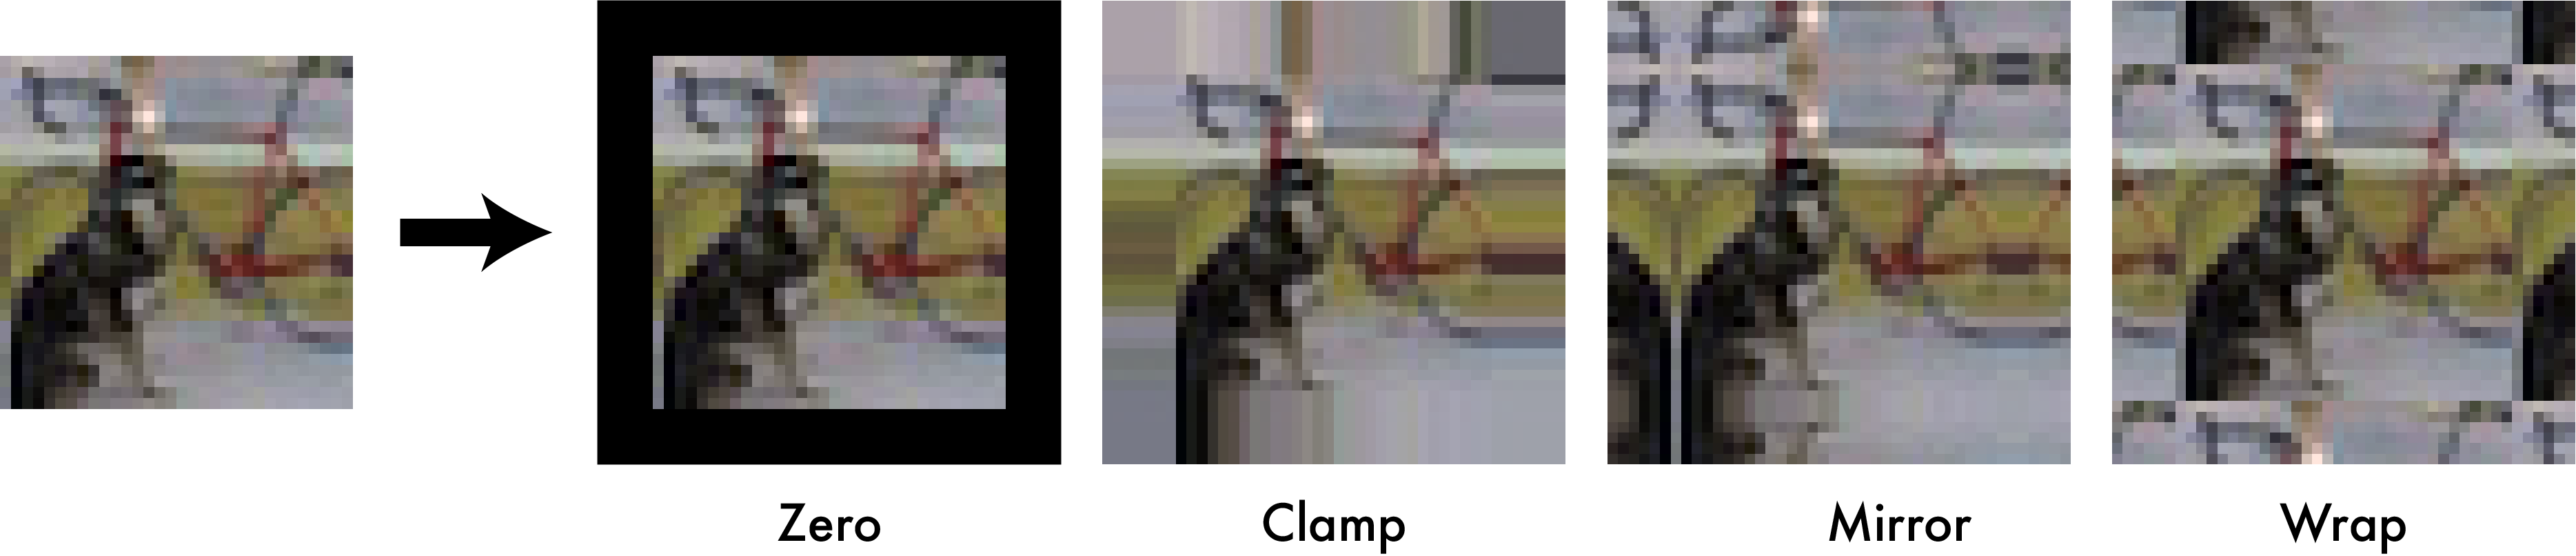


Okay, so let's implement our gaussian filter! We will only use the parameter sigma that defines the standard deviation of our 2d gaussian distribution. But, how big should the filter be then? A Gaussian distribution concentrates 99% of the probability mass within +/- 3 standard deviations from the mean value, so we will make the kernel six times the size of sigma. But also, we want an odd number, so make it be the next highest odd integer from 6x sigma.

Remember that a 2D Gaussian distribution follows the formula:

$G(x,y) = \frac{1}{2πσ^2}\mathrm{e}^{-\frac{x^2 + y^2}{2σ^2}}$


Gaussian is blurring filters. They blur the image by smoothing the pixel values over an area. So, we can configure our gaussian filters as a weighted sum. Furthermore, since we want all the weights to sum to 1, we can "forget" about our filter's first part of the equation. 



In [13]:
img = cv2.imread("Lab1-CV-course-HH/placa.jpg")
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.floor(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filt = np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )
filt = filt/np.sum(filt)



One good thing about gaussian filters over other blurring/smoothing filters like an averaging filter is that gaussian are isotropic, they treat all directions the same. Let's plot our filter

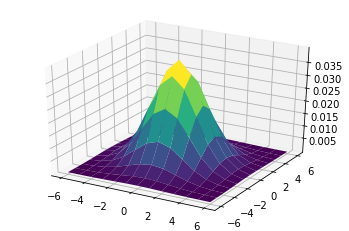

In [14]:
ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filt,cmap='viridis', edgecolor='none')


It looks nice! Now let's convolve our image with our filter. To understand better the frequencies changes, we will be using the grayscale image. High-frequency components are defined as significant pixel value changes in adjacents/close-by pixels. So let's see our output after convolving the original image with our gaussian filter

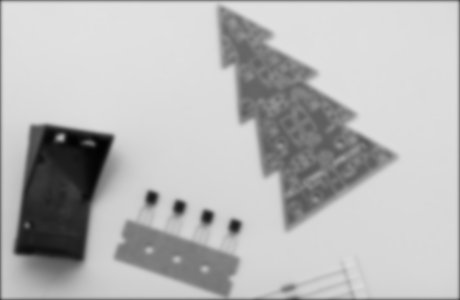

In [15]:
res = cv2.filter2D(img2,-1,filt,borderType=cv2.BORDER_CONSTANT)

cv2_imshow(res)

It does look much blurrier! Since high-frequency areas in images are defined as significant pixel value changes in nearby pixels, and the Gaussian filter smooths out the pixel values in an area, we effectively destroy this information from the image. We can see exactly what information are we removing by plotting the difference between the real image and the gaussian version

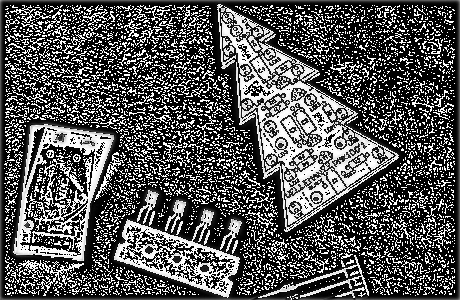

In [16]:
cv2_imshow(img2-res)

We can see that most of the removed information comes from edges, which makes sense since edges show a sudden difference/change between and in objects.

However, here we are using a low-pass filter to subtract from the original image the low-frequency components, effectively keeping the high frequencies, but... is there a more direct way to do so? The answer is yes! using derivative filters

Derivative filters are high-pass filters! They extract the information on how much the neighbor pixels change with respect to the center pixel. We will use Gaussians to create a new derivative filter to extract the high-frequency components from the images.

How? just calculating the derivative of our original gaussian with respect to x and y

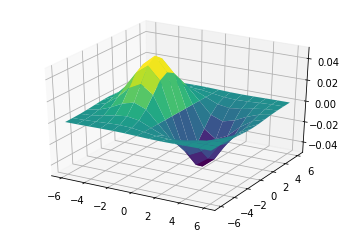

In [17]:
# we define our sigma and create the grid for our filter

sigma = 2
x, y = np.meshgrid(np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1), np.arange(np.ceil(-3*sigma),np.ceil(3*sigma+1),1))

# create the actual filter
filtx = -x*np.exp(-( (x**2+y**2) / ( 2.0 * sigma**2 ) ) )/(2*np.pi*sigma**2)
filty = np.transpose(filtx)

ax = plt.axes(projection='3d')

ax.plot_surface(x, y, filtx,cmap='viridis', edgecolor='none')


Now let's see how our edge detector works

Text(0.5, 1.0, 'all')

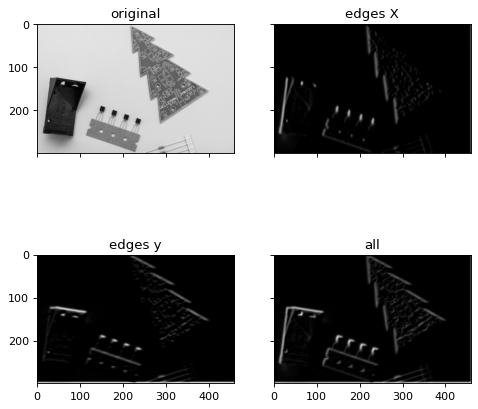

In [18]:
edgex = cv2.filter2D(img2,-1,filtx,borderType=cv2.BORDER_CONSTANT)
edgey = cv2.filter2D(img2,-1,filty,borderType=cv2.BORDER_CONSTANT)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(7, 7), dpi=80, sharex=True, sharey=True)
ax[0,0].imshow(img2,cmap="gray")
ax[0,0].set_title('original')

ax[0,1].imshow(edgex,cmap="gray")
ax[0,1].set_title("edges X")

ax[1,0].imshow(edgey,cmap="gray")
ax[1,0].set_title('edges y')

ax[1,1].imshow(np.abs(edgex+edgey),cmap="gray")
ax[1,1].set_title("all")

The above image shows that our edge-X detector has a high response with vertical lines, meaning a significant change along the x-axis. In the figure edges y, we can see the same behavior but in this case, for horizontal lines/edges, meaning sudden change along the y axis.

The color in these figures shows the direction of the change in pixel value, from white to black (represented with white lines) and from black to white (defined as black lines), while the areas where there are no edges appear as gray.

In the final figure, we show all edges detected in the image together regardless of their direction.

we can use gaussians to also enhanced contrast, see the following example

Text(0.5, 1.0, 'original')

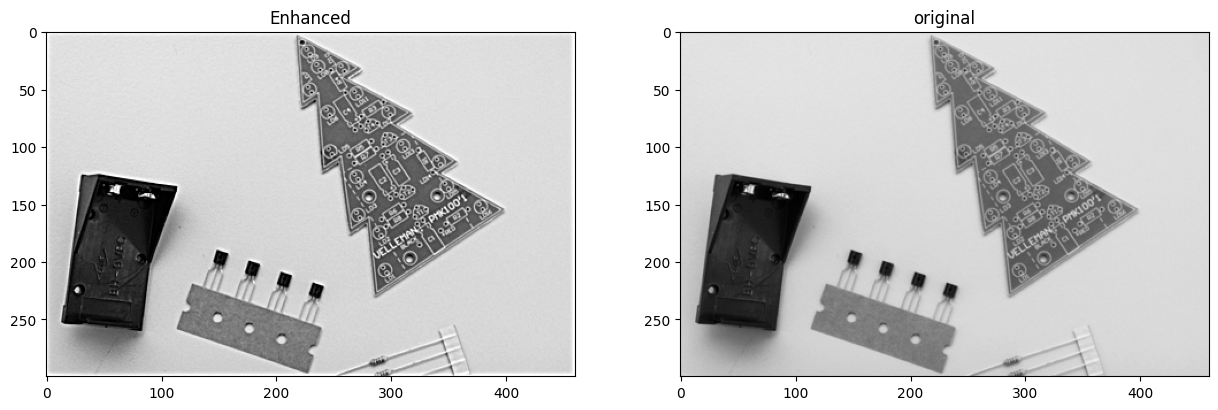

In [19]:
# analyze the next line, why does this enhance the contrast?
enhanced = np.clip(2*img2.astype("float") - res,0,255) # we need to cast img2 to avoid overflow, as well as to clip the values to keep them in the [0,255] range
fig = plt.figure(figsize=(15, 12), dpi=100)
ax = fig.add_subplot(1, 2, 1)
plt.imshow(enhanced,cmap="gray")
ax.set_title('Enhanced')
ax = fig.add_subplot(1,2,2)
plt.imshow(img2,cmap="gray")
ax.set_title("original")

We can clearly see that our enhanced version has a higher contrast respect to the original. 

We have seen a way to enhanced contrast using a low-pass filter. Simply by multiplying the original pixel value and substracting part of the low frequency information, leaving the high frequency components untouched.



### Other commonly used filters
Finally, we can see other well-known filters such as the averaging filter, sobel operator, laplacian operator, and a contrast-enhancing filter. Please pay attention to the structure of each of these filters and their response and try to understand why they get that response.

Text(0.5, 1.0, 'Contrast enhancing')

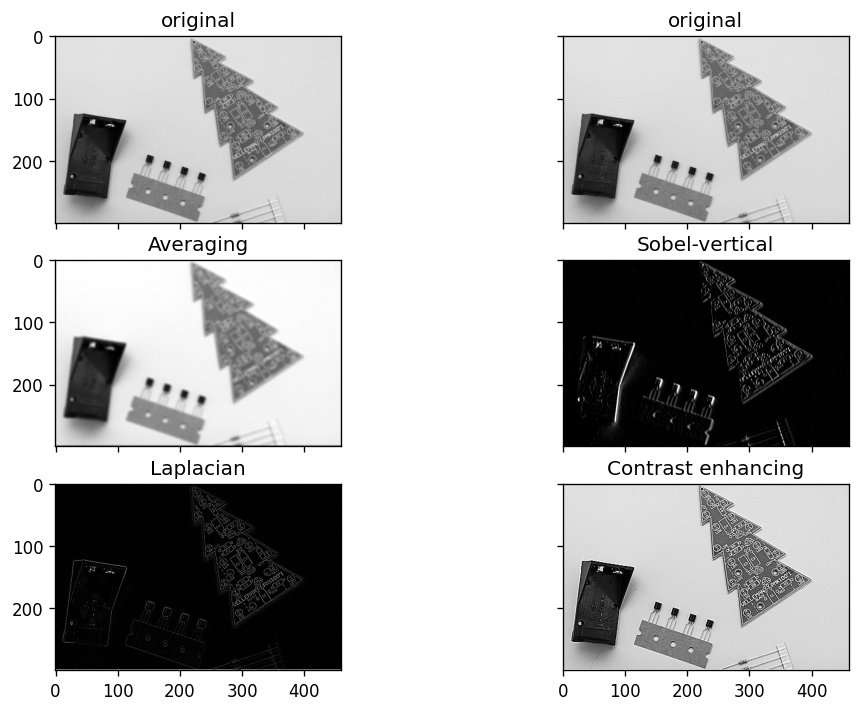

In [20]:
averaging = np.ones((5,5))/25
sobel = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
laplacian = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
contrast = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

res_averaging = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)
res_sobel = cv2.filter2D(img2,-1,sobel,borderType=cv2.BORDER_CONSTANT)
res_lap = cv2.filter2D(img2,-1,laplacian,borderType=cv2.BORDER_CONSTANT)
res_cont = np.clip(cv2.filter2D(img2,-1,contrast,borderType=cv2.BORDER_CONSTANT),0,255)

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(10, 7), dpi=120, sharex=True, sharey=True)
ax[0,0].imshow(img2,cmap="gray")
ax[0,0].set_title('original')

ax[0,1].imshow(img2,cmap="gray")
ax[0,1].set_title('original')

ax[1,0].imshow(res_averaging,cmap="gray")
ax[1,0].set_title("Averaging")

ax[1,1].imshow(res_sobel,cmap="gray")
ax[1,1].set_title('Sobel-vertical')

ax[2,0].imshow(res_lap,cmap="gray")
ax[2,0].set_title("Laplacian")

ax[2,1].imshow(res_cont,cmap="gray")
ax[2,1].set_title("Contrast enhancing")


We can see how we obtain similar responses to our previous experiments with these filters. Each filter has its own pros and cons.

# Homework!

Use the code in the color section to segment out the X color in image Y

Implement a function that does the convolution between an image and a filter. The output of this convolution has to be of the same size as the input image. Use constant padding with value 0, and consider that the images will be in grayscale

create another function similar to the previous one that applies a median filter to the image.

In [21]:
# Segment out all pixels with green color
# Notice that the segmentation do not need to be perfect
# Use image "placa.jpg"
# you can use most of the code from the segmentation of roses from before


img_color = cv2.imread("Lab1-CV-course-HH/placa.jpg")
# TO DO




error between original and blurred with opencv filter function: 3085373
error between original and blurred with my filter function: 0


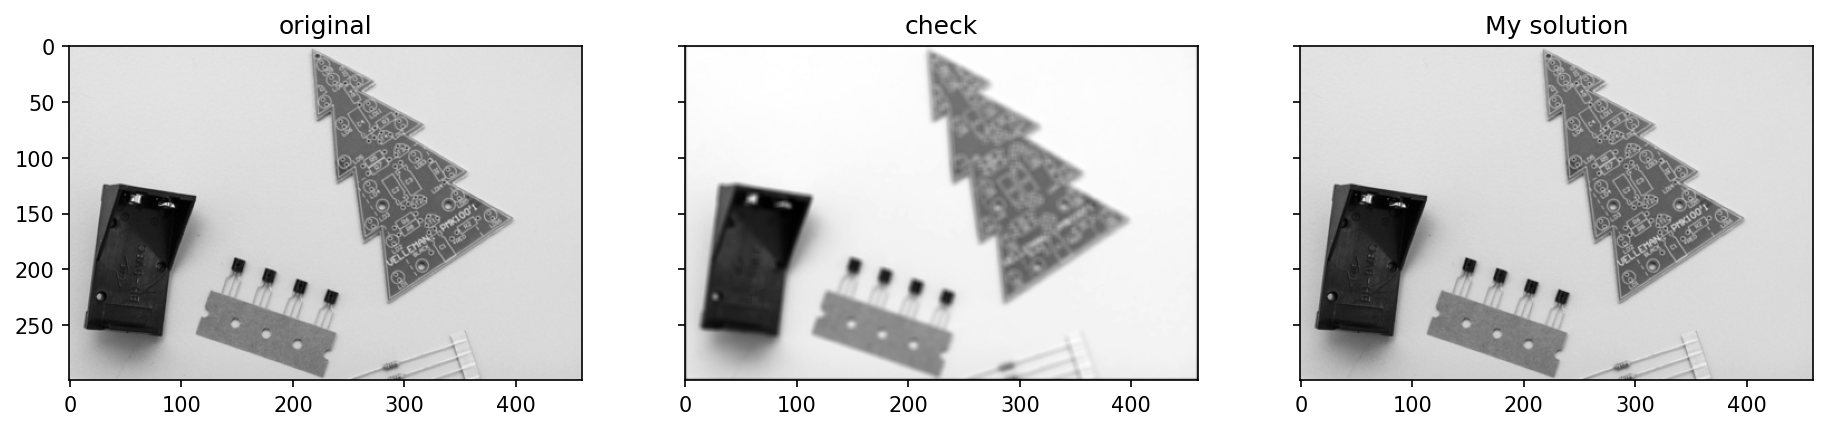

In [22]:
# my convolution function
# input images will be in black and white
# consider constant padding with value 0, you can make use of cv2.copyMakeBorder()

def myconv(img,filt):
  # TO DO
  output = img # change this line!
  return output

# you can check your results with the averaging filter

averaging = np.ones((5,5))/25
out_check = cv2.filter2D(img2,-1,averaging,borderType=cv2.BORDER_CONSTANT)

myout = myconv(img2,averaging)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(img2,cmap="gray")
ax[0].set_title('original')

ax[1].imshow(out_check,cmap="gray")
ax[1].set_title("check")

ax[2].imshow(myout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-out_check)**2)
error2 = np.sum((img2-myout)**2)
print("error between original and blurred with opencv filter function: {}".format(error))
print("error between original and blurred with my filter function: {}".format(error2))

error with opencv median filter: 1702543
error between opencv solution and mine: 5789709


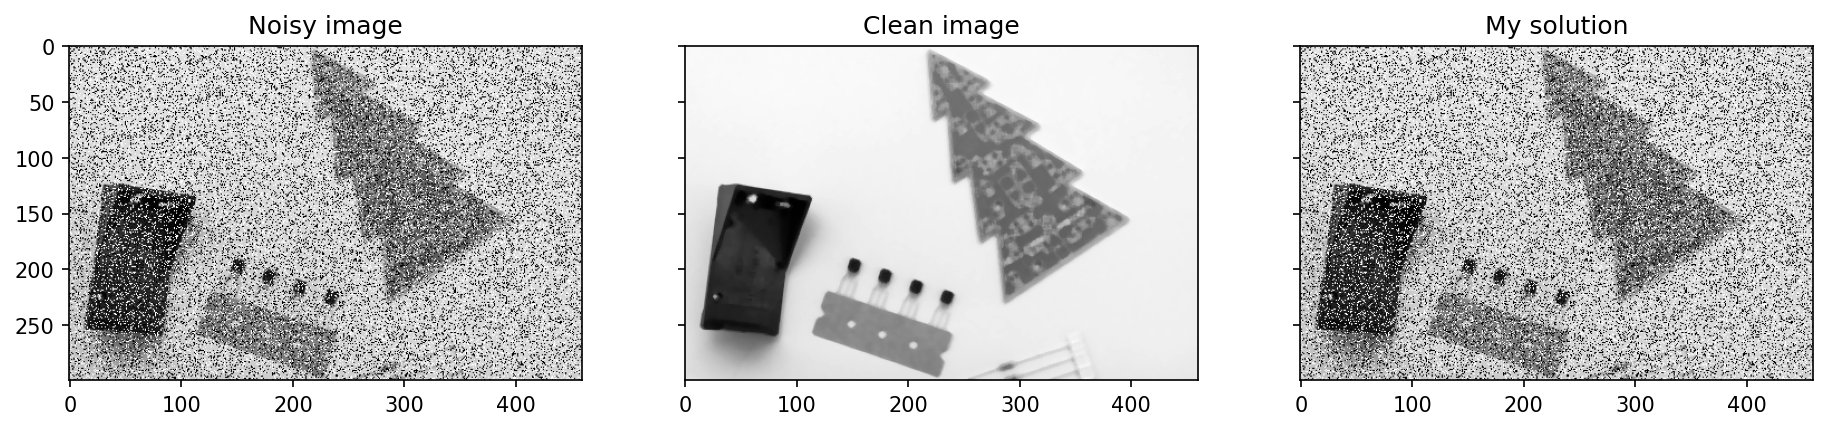

In [23]:
probnoise = 0.30
noise = np.random.rand(img2.shape[0],img2.shape[1])
black = noise <= probnoise/2
white = noise >= 1-probnoise/2

imnoise = img2.copy()
imnoise[black]=0
imnoise[white]=255


def medianfilter(imnoise):
  # TO DO
  output=imnoise #change this line too!
  return output


cleanout = medianfilter(imnoise)

sol_median = cv2.medianBlur(img2,5)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), dpi=150, sharex=True, sharey=True)
ax[0].imshow(imnoise,cmap="gray")
ax[0].set_title('Noisy image')

ax[1].imshow(sol_median,cmap="gray")
ax[1].set_title("Clean image")

ax[2].imshow(cleanout,cmap="gray")
ax[2].set_title("My solution")

#L2-error
error = np.sum((img2-sol_median)**2)
error_dif = np.sum((sol_median-cleanout)**2)
print("error with opencv median filter: {}".format(error))
# why do you think there is still such a high error between the original image and the clean one if it looks good??
print("error between opencv solution and mine: {}".format(error_dif))

# Submission
Once you have finished the tasks, go to "runtime" -> "restart and run all",  download the jupyter notebook by going to File -> download -> download .ipynb and submit the file to blackboard